## 1- Importar os arquivos do ambiente local e imprimir as abas e colunas de cada um.

In [1]:
from google.colab import files
import pandas as pd
import os
# Upload dos arquivos
print("📤 FAÇA UPLOAD DOS ARQUIVOS .XLSX")
uploaded = files.upload()

📤 FAÇA UPLOAD DOS ARQUIVOS .XLSX


Saving [LF] Pesquisa - Mai25.xlsx to [LF] Pesquisa - Mai25.xlsx
Saving [LF01] Leads_Pesquisa.xlsx to [LF01] Leads_Pesquisa.xlsx
Saving [LF02] Leads_Pesquisa.xlsx to [LF02] Leads_Pesquisa.xlsx
Saving [LF03] Leads_Pesquisa.xlsx to [LF03] Leads_Pesquisa.xlsx
Saving [LF04] Leads_Pesquisa.xlsx to [LF04] Leads_Pesquisa.xlsx
Saving [LF05] Leads_Pesquisa.xlsx to [LF05] Leads_Pesquisa.xlsx
Saving [LF06] Leads_Pesquisa.xlsx to [LF06] Leads_Pesquisa.xlsx
Saving [LF07] Leads_Pesquisa.xlsx to [LF07] Leads_Pesquisa.xlsx
Saving [LF08] Pesquisa.xlsx to [LF08] Pesquisa.xlsx
Saving LEAD SCORE LF 11.xlsx to LEAD SCORE LF 11.xlsx
Saving LEAD SCORE LF 12.xlsx to LEAD SCORE LF 12.xlsx
Saving LEAD SCORE LF 13.xlsx to LEAD SCORE LF 13.xlsx
Saving LEAD SCORE LF 14.xlsx to LEAD SCORE LF 14.xlsx
Saving LEAD SCORE LF 15.xlsx to LEAD SCORE LF 15.xlsx
Saving LEAD SCORE LF 16.xlsx to LEAD SCORE LF 16.xlsx
Saving LEAD SCORE LF 17.xlsx to LEAD SCORE LF 17.xlsx
Saving LEAD SCORE LF 18.xlsx to LEAD SCORE LF 18.xlsx
Savi

## 2- Remover dados duplicados e abas desnecessárias:
1. Abas em branco
2. Abas que não contenham "Pesquisa", "Vendas", "Alunos", "tmb", "Guru", "Sheet"
3. As abas que contenham "Leads", "Pontuação", "Lead Score", "DEBUG_LOG", "Tabela Dinâmica 1", "Detalhe1" ou que tenham menos de 230 linhas.
4. Abas de alunos dos arquivos LF.

In [2]:
# FILTRAR ABAS + REMOVER DUPLICATAS - OPERAÇÃO COMBINADA
print("🔄 FILTRAGEM DE ABAS + REMOÇÃO DE DUPLICATAS")
print("=" * 60)

# Definir critérios de filtragem
termos_manter = ["Pesquisa", "Vendas", "tmb", "Guru", "Sheet"]
termos_remover = ["Pontuação", "Lead Score", "DEBUG_LOG", "Tabela Dinâmica 1", "Detalhe1", "Alunos", "Guru", "TMB", "LEADS"]
min_linhas = 230

arquivos_processados = {}
relatorio_completo = []

for filename in uploaded.keys():
   try:
       xl_file = pd.ExcelFile(filename)
       abas_originais = len(xl_file.sheet_names)
       abas_processadas = {}

       for sheet_name in xl_file.sheet_names:
           df = pd.read_excel(xl_file, sheet_name=sheet_name)
           linhas_antes_filtro = len(df)

           # APLICAR CRITÉRIOS DE FILTRAGEM
           deve_remover_por_termo = any(termo.lower() in sheet_name.lower() for termo in termos_remover)
           tem_termo_permitido = any(termo.lower() in sheet_name.lower() for termo in termos_manter)
           tem_linhas_suficientes = len(df) >= min_linhas
           nao_esta_vazia = len(df) > 0 and not df.empty

           # Critério específico: remover abas TMB e Guru dos arquivos LF (exceto LF06 que não tem dados de vendas principais)
           eh_lf_com_vendas = 'LF' in filename and any(vendas_termo.lower() in sheet_name.lower() for vendas_termo in ['tmb', 'guru']) and 'LF06' not in filename

           # Decidir se mantém a aba
           if (nao_esta_vazia and not deve_remover_por_termo and not eh_lf_com_vendas and
               (tem_termo_permitido or tem_linhas_suficientes)):

               # REMOVER DUPLICATAS
               df_sem_duplicatas = df.drop_duplicates(keep='first')
               linhas_finais = len(df_sem_duplicatas)
               duplicatas_removidas = linhas_antes_filtro - linhas_finais

               # Salvar aba processada
               abas_processadas[sheet_name] = df_sem_duplicatas

               # Adicionar ao relatório
               relatorio_completo.append({
                   'arquivo': filename,
                   'aba': sheet_name,
                   'linhas_original': linhas_antes_filtro,
                   'linhas_final': linhas_finais,
                   'duplicatas_removidas': duplicatas_removidas,
                   'status': 'MANTIDA + LIMPA'
               })
           else:
               # Aba removida - adicionar ao relatório para controle
               relatorio_completo.append({
                   'arquivo': filename,
                   'aba': sheet_name,
                   'linhas_original': linhas_antes_filtro,
                   'linhas_final': 0,
                   'duplicatas_removidas': 0,
                   'status': 'REMOVIDA'
               })

       # Salvar arquivo processado se tiver abas válidas
       if abas_processadas:
           arquivos_processados[filename] = abas_processadas

   except Exception as e:
       print(f"❌ ERRO ao processar {filename}: {e}")

# RELATÓRIO DE ABAS MANTIDAS
print(f"\n📊 ABAS MANTIDAS E PROCESSADAS")
print("=" * 80)
print(f"{'ARQUIVO':<35} {'ABA':<20} {'ORIGINAL':>10} {'FINAL':>10} {'REMOVIDAS':>10}")
print("-" * 80)

total_original = 0
total_final = 0
total_duplicatas = 0
abas_mantidas = 0

for item in relatorio_completo:
   if item['status'] == 'MANTIDA + LIMPA':
       print(f"{item['arquivo'][:34]:<35} {item['aba'][:19]:<20} "
             f"{item['linhas_original']:>10,} {item['linhas_final']:>10,} "
             f"{item['duplicatas_removidas']:>10,}")

       total_original += item['linhas_original']
       total_final += item['linhas_final']
       total_duplicatas += item['duplicatas_removidas']
       abas_mantidas += 1

print("-" * 80)
print(f"{'TOTAL':<35} {'':<20} {total_original:>10,} {total_final:>10,} {total_duplicatas:>10,}")

print(f"\n📈 RESUMO FINAL:")
print(f"Arquivos processados: {len(arquivos_processados)}")
print(f"Abas mantidas: {abas_mantidas}")
print(f"Abas removidas: {len(relatorio_completo) - abas_mantidas}")
print(f"Linhas totais após processamento: {total_final:,}")
print(f"Duplicatas removidas: {total_duplicatas:,}")
print(f"Redução por duplicatas: {(total_duplicatas/total_original*100):.2f}%")

# Disponibilizar dados limpos
arquivos_filtrados = arquivos_processados
print(f"\n✅ Dados processados disponíveis na variável 'arquivos_filtrados'")

🔄 FILTRAGEM DE ABAS + REMOÇÃO DE DUPLICATAS

📊 ABAS MANTIDAS E PROCESSADAS
ARQUIVO                             ABA                    ORIGINAL      FINAL  REMOVIDAS
--------------------------------------------------------------------------------
[LF] Pesquisa - Mai25.xlsx          LF Pesquisa               2,174      2,174          0
[LF01] Leads_Pesquisa.xlsx          Pesquisa                  6,929      6,857         72
[LF02] Leads_Pesquisa.xlsx          Pesquisa                  2,659      2,611         48
[LF03] Leads_Pesquisa.xlsx          Pesquisa                  5,229      5,142         87
[LF04] Leads_Pesquisa.xlsx          Pesquisa                  6,097      6,045         52
[LF05] Leads_Pesquisa.xlsx          Pesquisa                  3,801      3,746         55
[LF06] Leads_Pesquisa.xlsx          LF Pesquisa               2,601      2,553         48
[LF07] Leads_Pesquisa.xlsx          LF Pesquisa               3,332      3,223        109
[LF08] Pesquisa.xlsx              

## 3- Remoção das colunas desnecessárias mapeadas manualmente

In [3]:
# LIMPEZA DE COLUNAS DESNECESSÁRIAS - ARQUIVOS FILTRADOS
print("LIMPEZA DE COLUNAS DESNECESSÁRIAS - ARQUIVOS FILTRADOS")
print("=" * 60)

def obter_colunas_remover_exatas():
   """Lista exata das colunas para remover"""
   return [
       'Faixa 3.0', 'Faixa A 3.0', 'Faixa B 3.0', 'Faixa C 3.0', 'Faixa D 3.0',
       'Pontuação 3.0', 'Score 3.0', 'adquirente nome', 'adquirente tid',
       'assinatura ciclo', 'assinatura código', 'Bairro', 'bairro contato',
       'CEP', 'cep', 'cep contato', 'Cidade', 'cidade contato', 'Cliente CPF',
       'código de rastreamento', 'codigo telefone contato', 'Complemento',
       'complemento contato', 'cupom código', 'cupom valor',
       'Data Cancelado', 'data 1ª captura', 'data cancelamento', 'Data Efetivado',
       'data garantia', 'data indisponível', 'Data de Renovação Prevista',
       'data última captura', 'doc contato', 'Endereço completo', 'Estado',
       'estado contato', 'externalid', 'Faixa', 'Faixa A', 'Faixa B', 'Faixa C',
       'Faixa D', 'Faixa E', 'fbc', 'fbp', 'id marketplace',
       'id marketplace ultima venda', 'id produto', 'id transação',
       'linha digitável do boleto', 'Logradouro', 'logradouro contato',
       'Modalidade de Contrato', 'moeda', 'motivo reembolso',
       'nome da transportadora', 'nome empresa contato', 'nome marketplace',
       'nome martketplace ultima venda', 'nome oferta', 'Oferta', 'origem 1',
       'origem 2', 'origem 3', 'origem rppc venda', 'Page URL', 'pagamento',
       'pais', 'País', 'país contato', 'parcelas', 'Pedido', 'pix',
       'Pontuação', 'primeira captura', 'primeira origem', 'Produtor',
       'quantidade produto', 'Remote IP', 'Renovação automatica',
       'Renovação enviada', 'resposta auto atribuição', 'retorno marketplace',
       'rppc checkout', 'rppc utm campaign', 'rppc utm content',
       'rppc utm medium', 'rppc utm term', 'rppc venda', 'Score',
       'serviço da transportadora', 'Status', 'status', 'Status Cancelamento',
       'Status Financeiro', 'tempo de entrega', 'tipo', 'última captura',
       'última origem', 'url do boleto', 'url oferta', 'User Agent',
       'valor afiliado', 'valor da transportadora', 'valor desconto', 'valor frete',
       'valor imposto', 'valor líquido', 'valor marketplace', 'valor parcelas',
       'valor venda', 'vencimento do boleto', "Qual estado você mora?", "data pedido",
       "número contato", "Número"
   ]

def aplicar_limpeza_colunas():
   """Remove colunas desnecessárias de todos os arquivos filtrados"""
   colunas_remover = obter_colunas_remover_exatas()
   colunas_remover_lower = [col.lower() for col in colunas_remover]

   arquivos_limpos = {}
   relatorio_limpeza = []

   for arquivo, abas_dict in arquivos_filtrados.items():
       abas_limpas = {}

       for aba_nome, df in abas_dict.items():
           colunas_antes = len(df.columns)

           # Identificar colunas para remover
           colunas_para_remover = []
           for col in df.columns:
               # Remover se está na lista exata
               if col.lower() in colunas_remover_lower:
                   colunas_para_remover.append(col)
               # Remover colunas Unnamed
               elif col.startswith('Unnamed:'):
                   colunas_para_remover.append(col)

           # Aplicar remoção
           df_limpo = df.drop(columns=colunas_para_remover) if colunas_para_remover else df.copy()
           abas_limpas[aba_nome] = df_limpo

           # Relatório
           colunas_depois = len(df_limpo.columns)
           relatorio_limpeza.append({
               'arquivo': arquivo,
               'aba': aba_nome,
               'colunas_antes': colunas_antes,
               'colunas_depois': colunas_depois,
               'removidas': len(colunas_para_remover)
           })

       arquivos_limpos[arquivo] = abas_limpas

   return arquivos_limpos, relatorio_limpeza

# Executar limpeza
arquivos_limpos, relatorio = aplicar_limpeza_colunas()

# Exibir relatório
print(f"{'ARQUIVO':<35} {'ABA':<20} {'ANTES':>8} {'DEPOIS':>8} {'REMOVIDAS':>10}")
print("-" * 90)

total_removidas = 0
for item in relatorio:
   print(f"{item['arquivo'][:34]:<35} {item['aba'][:19]:<20} "
         f"{item['colunas_antes']:>8} {item['colunas_depois']:>8} {item['removidas']:>10}")
   total_removidas += item['removidas']

print("-" * 90)
print(f"Total de colunas removidas: {total_removidas}")

# Disponibilizar dados limpos
arquivos_filtrados_limpos = arquivos_limpos
print(f"\nDados limpos disponíveis na variável 'arquivos_filtrados_limpos'")

LIMPEZA DE COLUNAS DESNECESSÁRIAS - ARQUIVOS FILTRADOS
ARQUIVO                             ABA                     ANTES   DEPOIS  REMOVIDAS
------------------------------------------------------------------------------------------
[LF] Pesquisa - Mai25.xlsx          LF Pesquisa                38       20         18
[LF01] Leads_Pesquisa.xlsx          Pesquisa                   31       17         14
[LF02] Leads_Pesquisa.xlsx          Pesquisa                   42       18         24
[LF03] Leads_Pesquisa.xlsx          Pesquisa                   42       18         24
[LF04] Leads_Pesquisa.xlsx          Pesquisa                   32       18         14
[LF05] Leads_Pesquisa.xlsx          Pesquisa                   35       18         17
[LF06] Leads_Pesquisa.xlsx          LF Pesquisa                37       19         18
[LF07] Leads_Pesquisa.xlsx          LF Pesquisa                37       20         17
[LF08] Pesquisa.xlsx                LF Pesquisa                37       20      

##4- Unifica os datasets de pesquisa em um, e os de alunos em um, mostrando as colunas resultantes e os stats de cada coluna

In [4]:
# CONSOLIDAÇÃO DE DATASETS - PESQUISA E VENDAS
print("CONSOLIDAÇÃO DE DATASETS - PESQUISA E VENDAS")
print("=" * 45)

def consolidar_datasets():
   """Consolida arquivos de pesquisa e vendas em datasets únicos"""

   # Identificar e consolidar datasets de pesquisa
   dados_pesquisa = []
   dados_vendas = []

   for arquivo, abas_dict in arquivos_filtrados_limpos.items():
       for aba_nome, df in abas_dict.items():
           df_copia = df.copy()
           df_copia['arquivo_origem'] = arquivo
           df_copia['aba_origem'] = aba_nome

           # Classificar por tipo
           if any(termo in aba_nome.lower() for termo in ['pesquisa']):
               dados_pesquisa.append(df_copia)
           elif any(termo in aba_nome.lower() for termo in ['vendas', 'sheet1']):
               dados_vendas.append(df_copia)

   # Consolidar em DataFrames únicos
   df_pesquisa_consolidado = pd.concat(dados_pesquisa, ignore_index=True) if dados_pesquisa else pd.DataFrame()
   df_vendas_consolidado = pd.concat(dados_vendas, ignore_index=True) if dados_vendas else pd.DataFrame()

   return df_pesquisa_consolidado, df_vendas_consolidado

def gerar_relatorio_colunas(df, nome_dataset):
   """Gera relatório detalhado das colunas de um dataset"""

   print(f"\n{nome_dataset.upper()} - {len(df)} registros")
   print("=" * 70)
   print(f"{'COLUNA':<35} {'ÚNICOS':>10} {'% AUSENTES':>12} {'TOTAL':>10}")
   print("-" * 70)

   for col in df.columns:
       valores_unicos = df[col].nunique()
       valores_ausentes = df[col].isnull().sum()
       pct_ausentes = (valores_ausentes / len(df)) * 100 if len(df) > 0 else 0
       total_registros = len(df)

       print(f"{col[:34]:<35} {valores_unicos:>10,} {pct_ausentes:>11.1f}% {total_registros:>10,}")

# Executar consolidação
df_pesquisa, df_vendas = consolidar_datasets()

# Gerar relatórios
gerar_relatorio_colunas(df_pesquisa, "DATASET PESQUISA")
gerar_relatorio_colunas(df_vendas, "DATASET VENDAS")

print(f"\nRESUMO:")
print(f"Dataset Pesquisa: {len(df_pesquisa):,} registros, {len(df_pesquisa.columns)} colunas")
print(f"Dataset Vendas: {len(df_vendas):,} registros, {len(df_vendas.columns)} colunas")

# Disponibilizar datasets consolidados
dataset_pesquisa_final = df_pesquisa
dataset_vendas_final = df_vendas
print(f"\nDatasets consolidados disponíveis nas variáveis:")
print(f"- dataset_pesquisa_final")
print(f"- dataset_vendas_final")

CONSOLIDAÇÃO DE DATASETS - PESQUISA E VENDAS

DATASET PESQUISA - 75110 registros
COLUNA                                  ÚNICOS   % AUSENTES      TOTAL
----------------------------------------------------------------------
Data                                    40,522         0.0%     75,110
Nome Completo                           55,154         0.1%     75,110
E-mail                                  69,395         0.1%     75,110
Telefone                                70,684         0.1%     75,110
O seu gênero:                                2         0.0%     75,110
Qual a sua idade?                            8         0.0%     75,110
O que você faz atualmente?                  11         0.0%     75,110
Atualmente, qual a sua faixa salar          10         0.0%     75,110
Você possui cartão de crédito?               3         9.2%     75,110
Já estudou programação?                      2        35.9%     75,110
Você já fez/faz/pretende fazer fac           2        35.9%     75,

## 5- Unificar colunas duplicadas:
Pesquisas:
1. Já investiu em algum curso online para aprender uma nova forma de ganhar dinheiro?
2. O que mais te chama atenção na profissão de Programador?

Vendas:
1. Ticket (R$) + valor produtos → valor
2. Produto + nome produto → produto
3. Cliente Nome + nome contato → nome
4. Cliente Email + email contato → email
5. Criado Em + data aprovacao → data
6. utm_last_source + utm_source → source
7. utm_last_medium + utm_medium → medium
8. utm_last_campaign + utm_campaign → campaign
9. utm_last_content + utm_content → content
10. Telefone + telefone contato → telefone



In [5]:
# UNIFICAÇÃO DE COLUNAS DUPLICADAS
print("UNIFICAÇÃO DE COLUNAS DUPLICADAS")
print("=" * 32)

def identificar_colunas_duplicadas_pesquisa(df):
   """Identifica todas as colunas duplicadas no dataset de pesquisa"""

   colunas = df.columns.tolist()
   duplicadas = []

   # Verificar padrões de duplicação
   for i, col1 in enumerate(colunas):
       for j, col2 in enumerate(colunas[i+1:], i+1):
           # Comparar início das strings (truncadas podem ser iguais)
           if col1[:30] == col2[:30] and col1 != col2:
               duplicadas.append((col1, col2))

   return duplicadas

def unificar_colunas_datasets():
   """Unifica colunas duplicadas nos datasets"""

   # DATASET PESQUISA
   df_pesquisa_unificado = dataset_pesquisa_final.copy()

   print("PESQUISA - Colunas duplicadas identificadas:")
   duplicadas_pesquisa = identificar_colunas_duplicadas_pesquisa(df_pesquisa_unificado)

   for col1, col2 in duplicadas_pesquisa:
       print(f"  {col1}")
       print(f"  {col2}")
       print()

   # Unificar colunas duplicadas de pesquisa
   colunas_investiu = [
       'Já investiu em algum curso online para aprender uma nova forma de ganhar dinheiro?',
       'Já investiu em algum curso online para aprender uma nova forma de ganhar dinheiro? '
   ]

   if all(col in df_pesquisa_unificado.columns for col in colunas_investiu):
       for i, row_idx in enumerate(df_pesquisa_unificado.index):
           valor_final = None
           for col in colunas_investiu:
               valor = df_pesquisa_unificado.loc[row_idx, col]
               if pd.notna(valor) and valor_final is None:
                   valor_final = valor
           df_pesquisa_unificado.loc[row_idx, 'investiu_curso_online'] = valor_final

       df_pesquisa_unificado = df_pesquisa_unificado.drop(columns=colunas_investiu)

   colunas_atencao = [
       'O que mais te chama atenção na profissão de Programador?',
       'O que mais te chama atenção na profissão de Programador? '
   ]

   if all(col in df_pesquisa_unificado.columns for col in colunas_atencao):
       for i, row_idx in enumerate(df_pesquisa_unificado.index):
           valor_final = None
           for col in colunas_atencao:
               valor = df_pesquisa_unificado.loc[row_idx, col]
               if pd.notna(valor) and valor_final is None:
                   valor_final = valor
           df_pesquisa_unificado.loc[row_idx, 'interesse_programacao'] = valor_final

       df_pesquisa_unificado = df_pesquisa_unificado.drop(columns=colunas_atencao)

   # DATASET VENDAS
   df_vendas_unificado = dataset_vendas_final.copy()

   print("VENDAS - Unificando colunas:")

   # Unificar valor
   if 'Ticket (R$)' in df_vendas_unificado.columns and 'valor produtos' in df_vendas_unificado.columns:
       df_vendas_unificado['valor'] = df_vendas_unificado['Ticket (R$)'].fillna(df_vendas_unificado['valor produtos'])
       df_vendas_unificado = df_vendas_unificado.drop(columns=['Ticket (R$)', 'valor produtos'])
       print("  Ticket (R$) + valor produtos → valor")

   # Unificar produto
   if 'Produto' in df_vendas_unificado.columns and 'nome produto' in df_vendas_unificado.columns:
       df_vendas_unificado['produto'] = df_vendas_unificado['Produto'].fillna(df_vendas_unificado['nome produto'])
       df_vendas_unificado = df_vendas_unificado.drop(columns=['Produto', 'nome produto'])
       print("  Produto + nome produto → produto")

   # Unificar nome
   if 'Cliente Nome' in df_vendas_unificado.columns and 'nome contato' in df_vendas_unificado.columns:
       df_vendas_unificado['nome'] = df_vendas_unificado['Cliente Nome'].fillna(df_vendas_unificado['nome contato'])
       df_vendas_unificado = df_vendas_unificado.drop(columns=['Cliente Nome', 'nome contato'])
       print("  Cliente Nome + nome contato → nome")

   # Unificar email
   if 'Cliente Email' in df_vendas_unificado.columns and 'email contato' in df_vendas_unificado.columns:
       df_vendas_unificado['email'] = df_vendas_unificado['Cliente Email'].fillna(df_vendas_unificado['email contato'])
       df_vendas_unificado = df_vendas_unificado.drop(columns=['Cliente Email', 'email contato'])
       print("  Cliente Email + email contato → email")

   # Unificar data
   if 'Criado Em' in df_vendas_unificado.columns and 'data aprovacao' in df_vendas_unificado.columns:
       df_vendas_unificado['data'] = df_vendas_unificado['Criado Em'].fillna(df_vendas_unificado['data aprovacao'])
       df_vendas_unificado = df_vendas_unificado.drop(columns=['Criado Em', 'data aprovacao'])
       print("  Criado Em + data aprovacao → data")

   # Unificar telefone
   if 'Telefone' in df_vendas_unificado.columns and 'telefone contato' in df_vendas_unificado.columns:
       df_vendas_unificado['telefone'] = df_vendas_unificado['Telefone'].fillna(df_vendas_unificado['telefone contato'])
       df_vendas_unificado = df_vendas_unificado.drop(columns=['Telefone', 'telefone contato'])
       print("  Telefone + telefone contato → telefone")

   # Unificar UTMs (manter as versões 'last' quando disponíveis)
   utms_map = [
       ('utm_last_source', 'utm_source', 'source'),
       ('utm_last_medium', 'utm_medium', 'medium'),
       ('utm_last_campaign', 'utm_campaign', 'campaign'),
       ('utm_last_content', 'utm_content', 'content')
   ]

   for utm_last, utm_regular, utm_final in utms_map:
       if utm_last in df_vendas_unificado.columns and utm_regular in df_vendas_unificado.columns:
           df_vendas_unificado[utm_final] = df_vendas_unificado[utm_last].fillna(df_vendas_unificado[utm_regular])
           df_vendas_unificado = df_vendas_unificado.drop(columns=[utm_last, utm_regular])
           print(f"  {utm_last} + {utm_regular} → {utm_final}")

   # Remover colunas UTM unificadas com alta porcentagem de ausentes
   print("\nVENDAS - Removendo colunas UTM com alta porcentagem de ausentes:")
   colunas_utm_remover = ['source', 'medium', 'campaign', 'content']
   colunas_existentes_utm = [col for col in colunas_utm_remover if col in df_vendas_unificado.columns]

   if colunas_existentes_utm:
       df_vendas_unificado = df_vendas_unificado.drop(columns=colunas_existentes_utm)
       for col in colunas_existentes_utm:
           print(f"  Removida: {col}")

   return df_pesquisa_unificado, df_vendas_unificado

# Executar unificação
df_pesquisa_final, df_vendas_final = unificar_colunas_datasets()

print(f"\nRESULTADO:")
print(f"Pesquisa: {len(df_pesquisa_final)} registros, {len(df_pesquisa_final.columns)} colunas")
print(f"Vendas: {len(df_vendas_final)} registros, {len(df_vendas_final.columns)} colunas")

# Disponibilizar datasets finais
pesquisa_unificado = df_pesquisa_final
vendas_unificado = df_vendas_final

gerar_relatorio_colunas(df_pesquisa_final, "DATASET PESQUISA")
gerar_relatorio_colunas(df_vendas_final, "DATASET VENDAS")

UNIFICAÇÃO DE COLUNAS DUPLICADAS
PESQUISA - Colunas duplicadas identificadas:
  Já investiu em algum curso online para aprender uma nova forma de ganhar dinheiro?
  Já investiu em algum curso online para aprender uma nova forma de ganhar dinheiro? 

  O que mais te chama atenção na profissão de Programador?
  O que mais te chama atenção na profissão de Programador? 

VENDAS - Unificando colunas:
  Ticket (R$) + valor produtos → valor
  Produto + nome produto → produto
  Cliente Nome + nome contato → nome
  Cliente Email + email contato → email
  Criado Em + data aprovacao → data
  Telefone + telefone contato → telefone
  utm_last_source + utm_source → source
  utm_last_medium + utm_medium → medium
  utm_last_campaign + utm_campaign → campaign
  utm_last_content + utm_content → content

VENDAS - Removendo colunas UTM com alta porcentagem de ausentes:
  Removida: source
  Removida: medium
  Removida: campaign
  Removida: content

RESULTADO:
Pesquisa: 75110 registros, 24 colunas
Vendas: 5

## 6-  Investigação
As colunas “qual é o seu nível de programação” e “você já estudou programação” são unificáveis.

Resultado: Refutada.

In [ ]:
# ANÁLISE TEMPORAL DAS PERGUNTAS SOBRE PROGRAMAÇÃO
print("ANÁLISE TEMPORAL DAS PERGUNTAS SOBRE PROGRAMAÇÃO")
print("=" * 55)

# Identificar colunas relacionadas a programação
colunas_programacao = []
for col in pesquisa_unificado.columns:
   if any(termo in col.lower() for termo in ['nível em programação', 'estudou programação']):
       colunas_programacao.append(col)

# Verificar se existe coluna de data
coluna_data = None
for col in pesquisa_unificado.columns:
   if 'data' in col.lower():
       coluna_data = col
       break

if colunas_programacao and coluna_data:
   for coluna in colunas_programacao:
       print(f"\nCOLUNA: {coluna}")
       print("-" * 60)

       # Filtrar apenas registros com valores válidos (não nulos)
       dados_validos = pesquisa_unificado[pesquisa_unificado[coluna].notna()]

       if len(dados_validos) > 0:
           # Converter coluna de data para datetime
           dados_validos_copy = dados_validos.copy()
           dados_validos_copy[coluna_data] = pd.to_datetime(dados_validos_copy[coluna_data], errors='coerce')
           dados_validos_copy = dados_validos_copy[dados_validos_copy[coluna_data].notna()]

           if len(dados_validos_copy) > 0:
               data_inicio = dados_validos_copy[coluna_data].min()
               data_fim = dados_validos_copy[coluna_data].max()

               print(f"Registros com valores válidos: {len(dados_validos):,}")
               print(f"Data de início: {data_inicio.strftime('%Y-%m-%d')}")
               print(f"Data de fim: {data_fim.strftime('%Y-%m-%d')}")
               print(f"Período: {(data_fim - data_inicio).days} dias")

               # Mostrar distribuição por mês
               dados_validos_copy['ano_mes'] = dados_validos_copy[coluna_data].dt.to_period('M')
               distribuicao_mensal = dados_validos_copy['ano_mes'].value_counts().sort_index()

               print(f"\nDistribuição mensal (primeiros 5 meses):")
               for periodo, count in distribuicao_mensal.head().items():
                   print(f"  {periodo}: {count:,} registros")

               print(f"\nDistribuição mensal (últimos 5 meses):")
               for periodo, count in distribuicao_mensal.tail().items():
                   print(f"  {periodo}: {count:,} registros")
           else:
               print("Nenhuma data válida encontrada")
       else:
           print("Nenhum valor válido encontrado")

       print("=" * 60)

   # Análise de sobreposição temporal
   if len(colunas_programacao) == 2:
       print(f"\nANÁLISE DE SOBREPOSIÇÃO TEMPORAL")
       print("-" * 40)

       col1, col2 = colunas_programacao

       # Registros com ambas as colunas preenchidas
       ambas_preenchidas = pesquisa_unificado[
           pesquisa_unificado[col1].notna() & pesquisa_unificado[col2].notna()
       ]

       # Registros com apenas uma coluna preenchida
       apenas_col1 = pesquisa_unificado[
           pesquisa_unificado[col1].notna() & pesquisa_unificado[col2].isna()
       ]

       apenas_col2 = pesquisa_unificado[
           pesquisa_unificado[col1].isna() & pesquisa_unificado[col2].notna()
       ]

       print(f"Registros com ambas preenchidas: {len(ambas_preenchidas):,}")
       print(f"Registros apenas com '{col1}': {len(apenas_col1):,}")
       print(f"Registros apenas com '{col2}': {len(apenas_col2):,}")

       total_preenchidos = len(ambas_preenchidas) + len(apenas_col1) + len(apenas_col2)
       cobertura = (total_preenchidos / len(pesquisa_unificado)) * 100
       print(f"Cobertura combinada: {cobertura:.1f}%")

else:
   print("Colunas necessárias não encontradas")
   print(f"Colunas de programação: {colunas_programacao}")
   print(f"Coluna de data: {coluna_data}")

ANÁLISE TEMPORAL DAS PERGUNTAS SOBRE PROGRAMAÇÃO

COLUNA: Já estudou programação?
------------------------------------------------------------
Registros com valores válidos: 48,140
Data de início: 2025-03-01
Data de fim: 2025-08-29
Período: 181 dias

Distribuição mensal (primeiros 5 meses):
  2025-03: 7,015 registros
  2025-04: 6,431 registros
  2025-05: 12,343 registros
  2025-06: 8,808 registros
  2025-07: 7,931 registros

Distribuição mensal (últimos 5 meses):
  2025-04: 6,431 registros
  2025-05: 12,343 registros
  2025-06: 8,808 registros
  2025-07: 7,931 registros
  2025-08: 5,612 registros

COLUNA: Qual o seu nível em programação?
------------------------------------------------------------
Registros com valores válidos: 26,954
Data de início: 2024-12-18
Data de fim: 2025-02-23
Período: 67 dias

Distribuição mensal (primeiros 5 meses):
  2024-12: 2,656 registros
  2025-01: 15,850 registros
  2025-02: 8,448 registros

Distribuição mensal (últimos 5 meses):
  2024-12: 2,656 regist

In [ ]:
# VALORES ÚNICOS DAS PERGUNTAS SOBRE PROGRAMAÇÃO
print("VALORES ÚNICOS DAS PERGUNTAS SOBRE PROGRAMAÇÃO")
print("=" * 50)

# Identificar colunas relacionadas a programação
colunas_programacao = []
for col in pesquisa_unificado.columns:
   if any(termo in col.lower() for termo in ['nível em programação', 'estudou programação']):
       colunas_programacao.append(col)

if colunas_programacao:
   for coluna in colunas_programacao:
       print(f"\nCOLUNA: {coluna}")
       print("-" * 60)
       print(f"Total de registros: {len(pesquisa_unificado):,}")

       valores_unicos = pesquisa_unificado[coluna].value_counts(dropna=False)

       print(f"\nVALORES ÚNICOS:")
       for valor, count in valores_unicos.items():
           porcentagem = (count / len(pesquisa_unificado)) * 100
           print(f"{str(valor):<35} {count:>6,} ({porcentagem:>5.1f}%)")

       print(f"\nRESUMO:")
       print(f"Valores únicos: {pesquisa_unificado[coluna].nunique()}")
       print(f"Valores ausentes: {pesquisa_unificado[coluna].isnull().sum():,}")
       print(f"% de ausentes: {(pesquisa_unificado[coluna].isnull().sum() / len(pesquisa_unificado)) * 100:.1f}%")
       print("=" * 60)

else:
   print("Nenhuma coluna relacionada a programação encontrada.")
   print("Colunas disponíveis:")
   for col in pesquisa_unificado.columns:
       if 'program' in col.lower():
           print(f"  - {col}")

VALORES ÚNICOS DAS PERGUNTAS SOBRE PROGRAMAÇÃO

COLUNA: Já estudou programação?
------------------------------------------------------------
Total de registros: 75,110

VALORES ÚNICOS:
Não                                 32,952 ( 43.9%)
nan                                 26,970 ( 35.9%)
Sim                                 15,188 ( 20.2%)

RESUMO:
Valores únicos: 2
Valores ausentes: 26,970
% de ausentes: 35.9%

COLUNA: Qual o seu nível em programação?
------------------------------------------------------------
Total de registros: 75,110

VALORES ÚNICOS:
nan                                 48,156 ( 64.1%)
Nunca estudei programação.          16,339 ( 21.8%)
Já ouvi falar, mas nunca pratiquei.  6,204 (  8.3%)
Até fiz alguns cursos, mas ainda me sinto perdido.  3,613 (  4.8%)
Já estudo programação e busco uma oportunidade no mercado.    716 (  1.0%)
Já trabalho na área de programação.     82 (  0.1%)

RESUMO:
Valores únicos: 5
Valores ausentes: 48,156
% de ausentes: 64.1%


In [ ]:
# SIMULAÇÃO DA UNIFICAÇÃO DAS PERGUNTAS SOBRE PROGRAMAÇÃO
print("SIMULAÇÃO DA UNIFICAÇÃO DAS PERGUNTAS SOBRE PROGRAMAÇÃO")
print("=" * 60)

# Valores originais da pergunta detalhada
valores_detalhados = {
   'Nunca estudei programação.': 16339,
   'Já ouvi falar, mas nunca pratiquei.': 6204,
   'Até fiz alguns cursos, mas ainda me sinto perdido.': 3613,
   'Já estudo programação e busco uma oportunidade no mercado.': 716,
   'Já trabalho na área de programação.': 82
}

# Valores da pergunta binária
valores_binarios = {
   'Não': 32952,
   'Sim': 15188
}

total_registros = 75110

print("MAPEAMENTO PROPOSTO:")
print("-" * 30)
print("'Nunca estudei programação.' → 'Não'")
print("'Já ouvi falar, mas nunca pratiquei.' → 'Não'")
print("'Até fiz alguns cursos...' → 'Sim'")
print("'Já estudo programação...' → 'Sim'")
print("'Já trabalho na área...' → 'Sim'")

print(f"\nRESULTADO DA UNIFICAÇÃO:")
print("-" * 30)

# Calcular unificação
nao_unificado = valores_detalhados['Nunca estudei programação.'] + valores_detalhados['Já ouvi falar, mas nunca pratiquei.']
sim_unificado = (valores_detalhados['Até fiz alguns cursos, mas ainda me sinto perdido.'] +
               valores_detalhados['Já estudo programação e busco uma oportunidade no mercado.'] +
               valores_detalhados['Já trabalho na área de programação.'])

print(f"'Não' unificado: {nao_unificado:,} registros ({(nao_unificado/total_registros)*100:.1f}%)")
print(f"'Sim' unificado: {sim_unificado:,} registros ({(sim_unificado/total_registros)*100:.1f}%)")

print(f"\nCOMPARAÇÃO COM PERGUNTA BINÁRIA ORIGINAL:")
print("-" * 45)
print(f"Pergunta binária 'Não': {valores_binarios['Não']:,} ({(valores_binarios['Não']/total_registros)*100:.1f}%)")
print(f"Unificação 'Não': {nao_unificado:,} ({(nao_unificado/total_registros)*100:.1f}%)")
print(f"Diferença: {abs(valores_binarios['Não'] - nao_unificado):,} registros")

print(f"\nPergunta binária 'Sim': {valores_binarios['Sim']:,} ({(valores_binarios['Sim']/total_registros)*100:.1f}%)")
print(f"Unificação 'Sim': {sim_unificado:,} ({(sim_unificado/total_registros)*100:.1f}%)")
print(f"Diferença: {abs(valores_binarios['Sim'] - sim_unificado):,} registros")

print(f"\nCONCLUSÃO:")
print("-" * 15)
cobertura_total = nao_unificado + sim_unificado + valores_binarios['Não'] + valores_binarios['Sim']
print(f"Cobertura total após unificação: {cobertura_total:,} registros ({(cobertura_total/total_registros)*100:.1f}%)")

# Verificar compatibilidade das distribuições
diff_nao = abs(valores_binarios['Não'] - nao_unificado)
diff_sim = abs(valores_binarios['Sim'] - sim_unificado)
compatibilidade = (1 - (diff_nao + diff_sim) / (valores_binarios['Não'] + valores_binarios['Sim'])) * 100

print(f"Compatibilidade entre distribuições: {compatibilidade:.1f}%")

if compatibilidade > 80:
   print("✅ Unificação viável - distribuições compatíveis")
else:
   print("⚠️ Unificação pode introduzir viés - distribuições divergentes")

SIMULAÇÃO DA UNIFICAÇÃO DAS PERGUNTAS SOBRE PROGRAMAÇÃO
MAPEAMENTO PROPOSTO:
------------------------------
'Nunca estudei programação.' → 'Não'
'Já ouvi falar, mas nunca pratiquei.' → 'Não'
'Até fiz alguns cursos...' → 'Sim'
'Já estudo programação...' → 'Sim'
'Já trabalho na área...' → 'Sim'

RESULTADO DA UNIFICAÇÃO:
------------------------------
'Não' unificado: 22,543 registros (30.0%)
'Sim' unificado: 4,411 registros (5.9%)

COMPARAÇÃO COM PERGUNTA BINÁRIA ORIGINAL:
---------------------------------------------
Pergunta binária 'Não': 32,952 (43.9%)
Unificação 'Não': 22,543 (30.0%)
Diferença: 10,409 registros

Pergunta binária 'Sim': 15,188 (20.2%)
Unificação 'Sim': 4,411 (5.9%)
Diferença: 10,777 registros

CONCLUSÃO:
---------------
Cobertura total após unificação: 75,094 registros (100.0%)
Compatibilidade entre distribuições: 56.0%
⚠️ Unificação pode introduzir viés - distribuições divergentes


## 6.1- Investigação:

Para colunas nome, telefone e e-mail:
1. Mínimo de caracteres
2. Máximo de caracteres
3. Média de caracteres
4. Outliers (preenchimentos com pouquíssimos ou muitíssimos caracteres)

In [ ]:
# ANÁLISE DE QUALIDADE DOS DADOS - IDENTIFICADORES
print("ANÁLISE DE QUALIDADE DOS DADOS - IDENTIFICADORES")
print("=" * 50)

def analisar_identificadores():
   """Analisa qualidade dos campos nome, telefone e email"""

   # Datasets para analisar
   datasets = {
       'Pesquisa': pesquisa_unificado,
       'Vendas': vendas_unificado
   }

   for dataset_nome, df in datasets.items():
       print(f"\nDATASET: {dataset_nome}")
       print("-" * 30)

       # Identificar colunas de identificadores
       colunas_identificadores = []
       for col in df.columns:
           if any(termo in col.lower() for termo in ['nome', 'telefone', 'email', 'e-mail']):
               colunas_identificadores.append(col)

       for coluna in colunas_identificadores:
           print(f"\nColuna: {coluna}")

           # Filtrar apenas valores não nulos
           dados_validos = df[df[coluna].notna()][coluna].astype(str)

           if len(dados_validos) == 0:
               print("  Nenhum dado válido encontrado")
               continue

           # Calcular comprimentos
           comprimentos = dados_validos.str.len()

           min_chars = comprimentos.min()
           max_chars = comprimentos.max()
           media_chars = comprimentos.mean()

           print(f"  Registros válidos: {len(dados_validos):,}")
           print(f"  Mínimo de caracteres: {min_chars}")
           print(f"  Máximo de caracteres: {max_chars}")
           print(f"  Média de caracteres: {media_chars:.1f}")

           # Identificar outliers usando quartis
           q1 = comprimentos.quantile(0.25)
           q3 = comprimentos.quantile(0.75)
           iqr = q3 - q1
           limite_inferior = q1 - 1.5 * iqr
           limite_superior = q3 + 1.5 * iqr

           outliers_baixos = dados_validos[comprimentos < limite_inferior]
           outliers_altos = dados_validos[comprimentos > limite_superior]

           print(f"  Outliers baixos (< {limite_inferior:.1f} chars): {len(outliers_baixos)}")
           if len(outliers_baixos) > 0:
               print(f"    Exemplos: {list(outliers_baixos.head(3))}")

           print(f"  Outliers altos (> {limite_superior:.1f} chars): {len(outliers_altos)}")
           if len(outliers_altos) > 0:
               print(f"    Exemplos: {list(outliers_altos.head(3))}")

           # Identificar registros extremamente curtos ou longos
           muito_curtos = dados_validos[comprimentos <= 2]
           muito_longos = dados_validos[comprimentos >= 100]

           if len(muito_curtos) > 0:
               print(f"  Registros muito curtos (≤2 chars): {len(muito_curtos)}")
               print(f"    Exemplos: {list(muito_curtos.head(5))}")

           if len(muito_longos) > 0:
               print(f"  Registros muito longos (≥100 chars): {len(muito_longos)}")
               print(f"    Exemplos: {list(muito_longos.head(3))}")

# Executar análise
analisar_identificadores()

ANÁLISE DE QUALIDADE DOS DADOS - IDENTIFICADORES

DATASET: Pesquisa
------------------------------

Coluna: Nome Completo
  Registros válidos: 75,058
  Mínimo de caracteres: 1
  Máximo de caracteres: 106
  Média de caracteres: 16.2
  Outliers baixos (< -8.0 chars): 0
  Outliers altos (> 40.0 chars): 174
    Exemplos: ['Roseane Aparecida de Assis Pereira Santos', 'Mario Henrique Oliveira Barbosa da Conceição', 'Erika Silvana Evangelista Fonseca da Silva']
  Registros muito curtos (≤2 chars): 79
    Exemplos: ['Ad', 'Ze', 'Gu', 'L', 'P']
  Registros muito longos (≥100 chars): 1
    Exemplos: ['Para de vender Cursos , isso Ai é furada , ninguem  vai se tornar um dev senior em 4 aulas com ia ,kkkkkkk']

Coluna: E-mail
  Registros válidos: 75,060
  Mínimo de caracteres: 1
  Máximo de caracteres: 170
  Média de caracteres: 24.6
  Outliers baixos (< 14.5 chars): 292
    Exemplos: ['11974376757', '15099950728', 'denne']
  Outliers altos (> 34.5 chars): 1508
    Exemplos: ['matheusdeoliveiracoe

## 6.2 Investigação:
Investigar para cada categórica que não seja identificadores (excluindo identificadores, data, aba origem e arquivo origem):
1. Valores únicos
2. Nulos
3. Distribuição de categorias imprimindo somente as top 10 caso haja mais de 10 categorias, e um gráfico de barras com a frequência.

ANÁLISE DE VARIÁVEIS CATEGÓRICAS

DATASET: Pesquisa
Colunas categóricas encontradas: 18

COLUNA: O seu gênero:
--------------------------------------------------
Valores únicos: 2
Valores nulos: 16 (0.0%)
Distribuição (Todas as categorias):
  Masculino                        64,518 ( 85.9%)
  Feminino                         10,576 ( 14.1%)
  nan                                  16 (  0.0%)


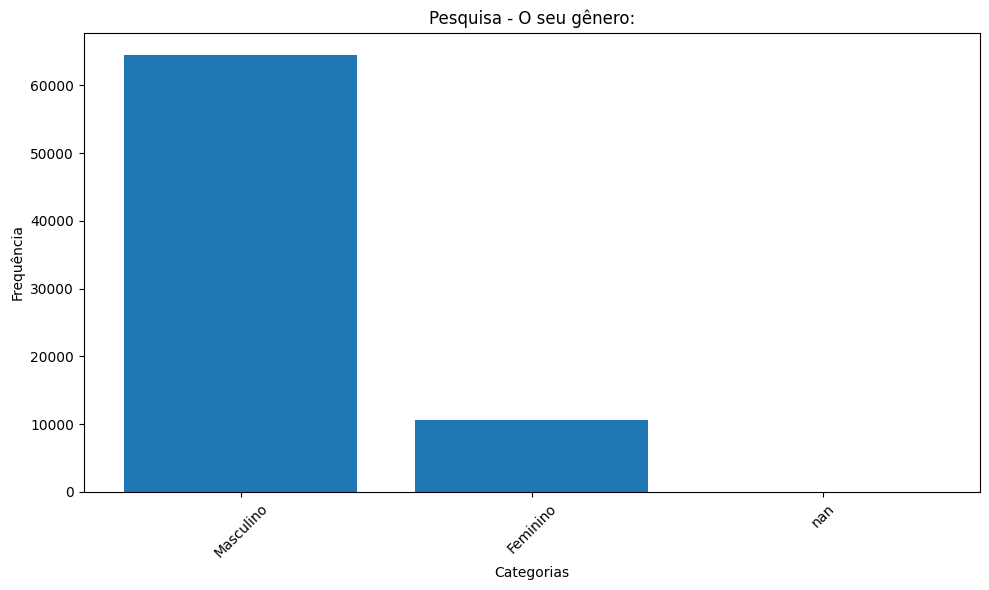


COLUNA: Qual a sua idade?
--------------------------------------------------
Valores únicos: 8
Valores nulos: 16 (0.0%)
Distribuição (Todas as categorias):
  25 - 34 anos                     27,518 ( 36.6%)
  35 - 44 anos                     20,880 ( 27.8%)
  18 - 24 anos                     12,878 ( 17.1%)
  45 - 54 anos                      6,042 (  8.0%)
  Menos de 18 anos                  4,744 (  6.3%)
  Mais de 55 anos                   1,518 (  2.0%)
  Menos de 18 anos.                 1,380 (  1.8%)
  Mais de 55 anos.                    134 (  0.2%)
  nan                                  16 (  0.0%)


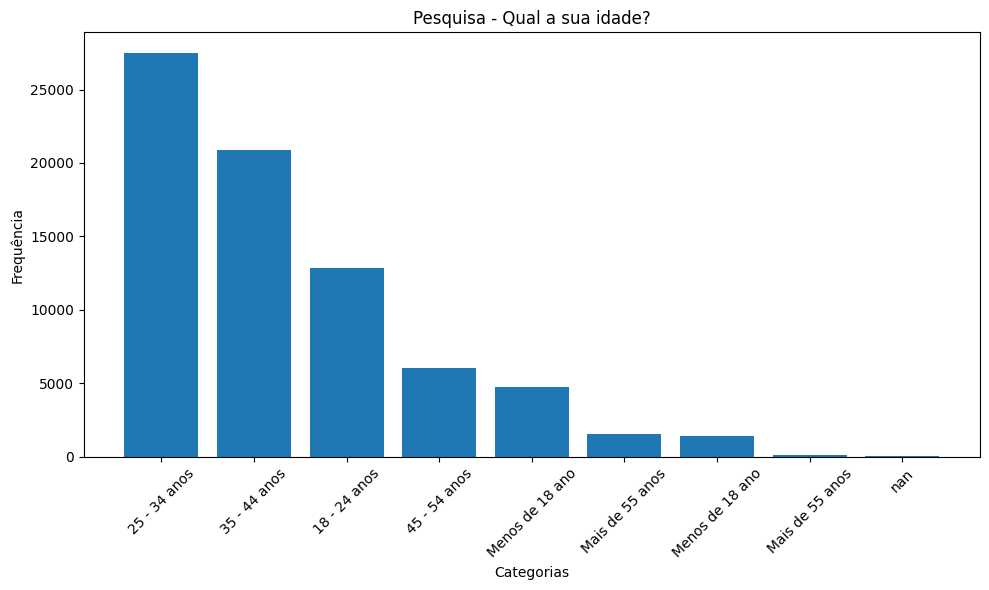


COLUNA: O que você faz atualmente?
--------------------------------------------------
Valores únicos: 11
Valores nulos: 16 (0.0%)
Distribuição (Top 10):
  Sou CLT/Funcionário Público      21,404 ( 28.5%)
  Trabalho em outra área e quero   14,821 ( 19.7%)
  Sou autonomo                     11,356 ( 15.1%)
  Sou apenas estudante              9,948 ( 13.2%)
  Sou autônomo (Uber, freela, ve    6,110 (  8.1%)
  Não trabalho e nem estudo         4,755 (  6.3%)
  Atualmente não trabalho e nem     3,189 (  4.2%)
  Estou no ensino médio ou acabe    1,316 (  1.8%)
  Estudo T.I. na faculdade mas q    1,160 (  1.5%)
  Sou aposentado                      677 (  0.9%)


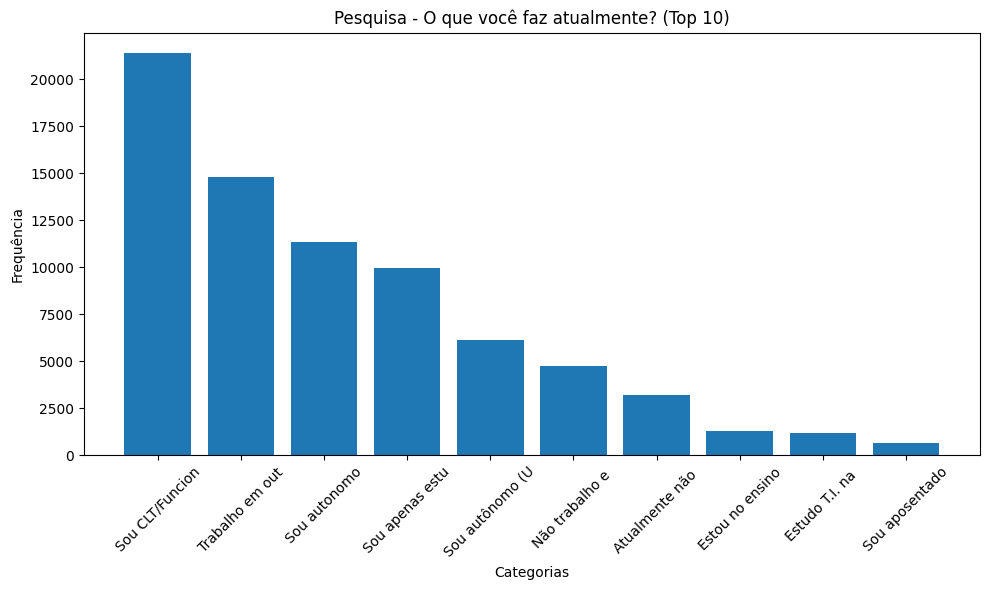


COLUNA: Atualmente, qual a sua faixa salarial?
--------------------------------------------------
Valores únicos: 10
Valores nulos: 16 (0.0%)
Distribuição (Todas as categorias):
  Entre R$1.000 a R$2.000 reais    13,354 ( 17.8%)
  Não tenho renda                  12,290 ( 16.4%)
  Entre R$1.000 a R$2.000 reais    12,156 ( 16.2%)
  Entre R$2.001 a R$3.000 reais     8,191 ( 10.9%)
  Entre R$2.001 a R$3.000 reais     8,001 ( 10.7%)
  Não tenho renda.                  7,257 (  9.7%)
  Entre R$3.001 a R$5.000 reais     5,108 (  6.8%)
  Entre R$3.001 a R$5.000 reais     4,725 (  6.3%)
  Mais de R$5.001 reais ao mês      2,372 (  3.2%)
  Mais de R$5.001 reais ao mês.     1,640 (  2.2%)
  nan                                  16 (  0.0%)


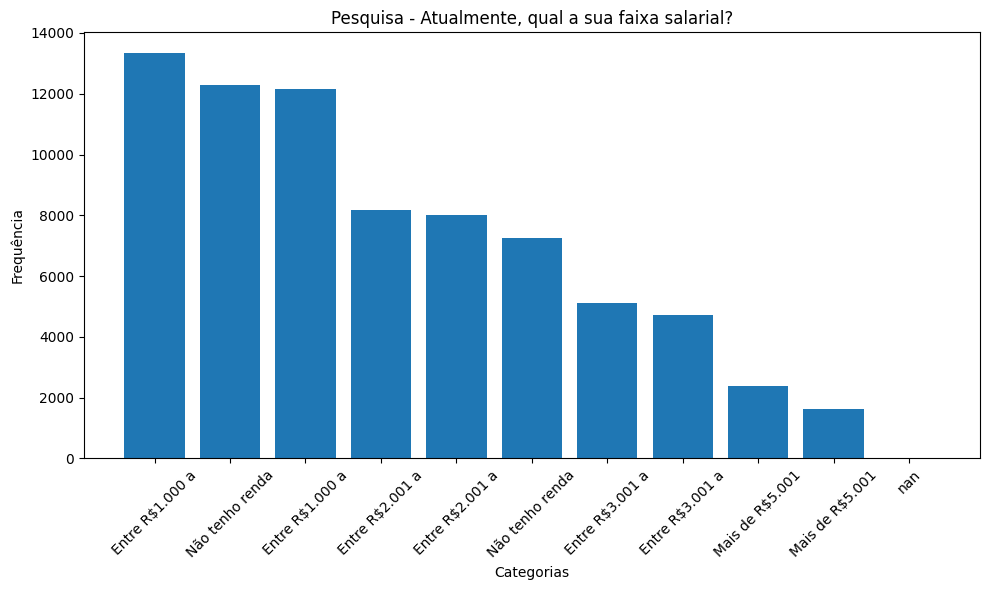


COLUNA: Você possui cartão de crédito?
--------------------------------------------------
Valores únicos: 3
Valores nulos: 6,873 (9.2%)
Distribuição (Todas as categorias):
  Não                              44,240 ( 58.9%)
  Sim                              14,633 ( 19.5%)
  ⁠Sim                              9,364 ( 12.5%)
  nan                               6,873 (  9.2%)


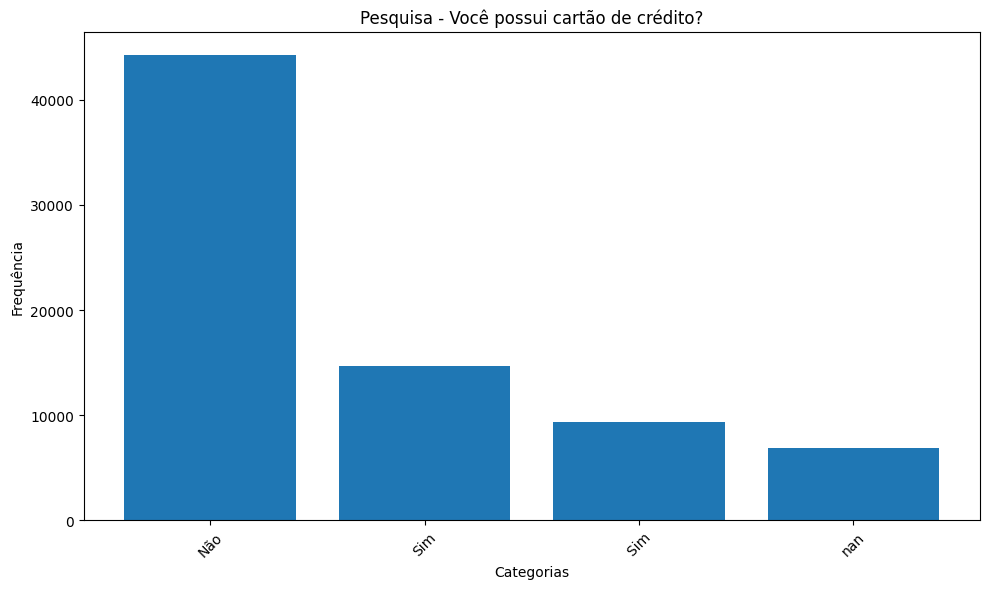


COLUNA: Já estudou programação?
--------------------------------------------------
Valores únicos: 2
Valores nulos: 26,970 (35.9%)
Distribuição (Todas as categorias):
  Não                              32,952 ( 43.9%)
  nan                              26,970 ( 35.9%)
  Sim                              15,188 ( 20.2%)


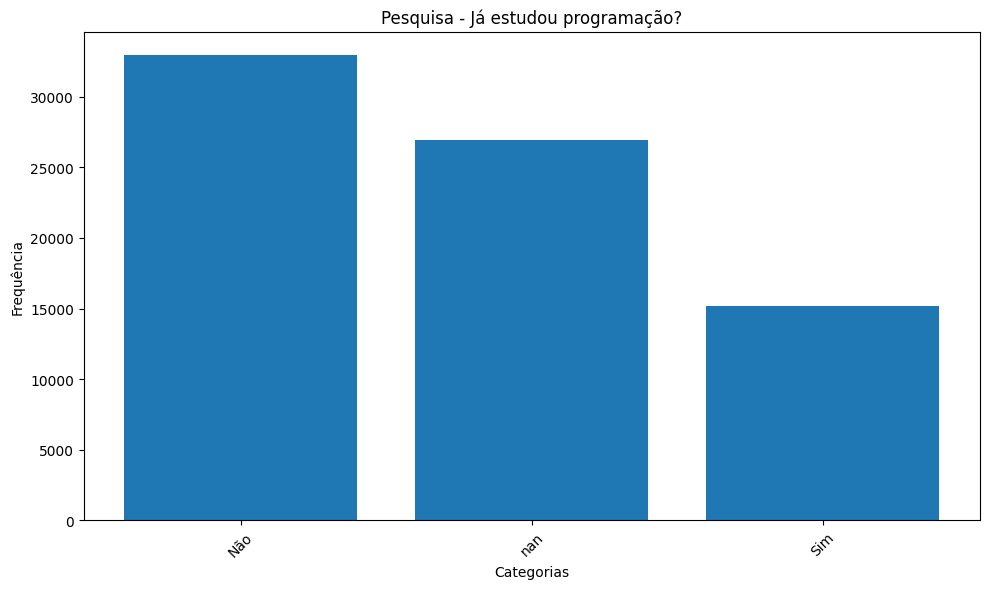


COLUNA: Você já fez/faz/pretende fazer faculdade?
--------------------------------------------------
Valores únicos: 2
Valores nulos: 26,970 (35.9%)
Distribuição (Todas as categorias):
  Sim                              35,175 ( 46.8%)
  nan                              26,970 ( 35.9%)
  Não                              12,965 ( 17.3%)


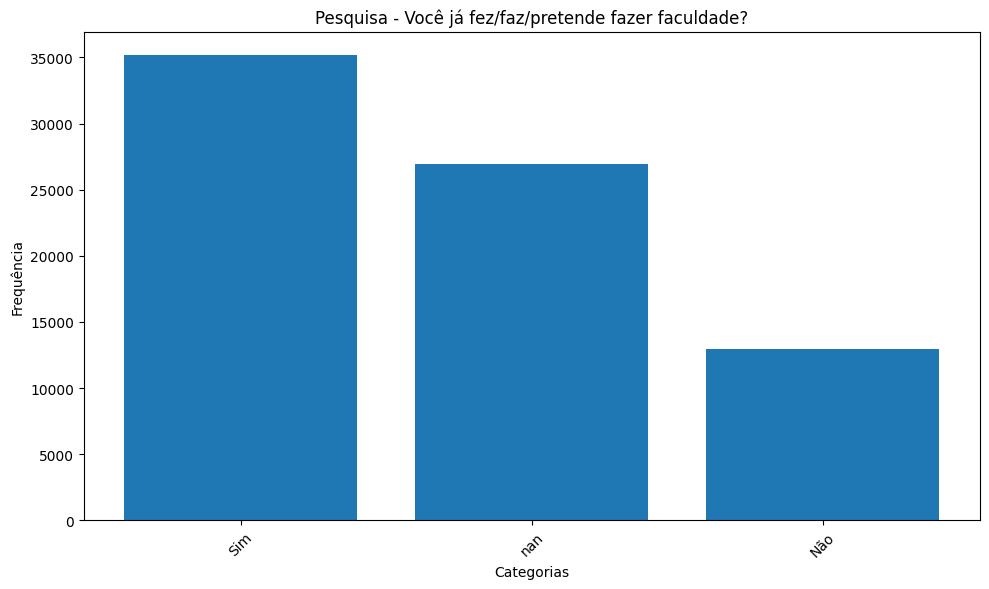


COLUNA: O que mais você quer ver no evento?
--------------------------------------------------
Valores únicos: 8
Valores nulos: 6,873 (9.2%)
Distribuição (Todas as categorias):
  Fazer transição de carreira e    15,648 ( 20.8%)
  Fazer um projeto na prática      14,972 ( 19.9%)
  Fazer transição de carreira e    10,975 ( 14.6%)
  Fazer freelancer como programa    7,784 ( 10.4%)
  Quero saber se é para mim         7,600 ( 10.1%)
  nan                               6,873 (  9.2%)
  Quero saber se é para mim         6,453 (  8.6%)
  A aula com a recrutadora          2,844 (  3.8%)
  A aula com a recrutadora;         1,961 (  2.6%)


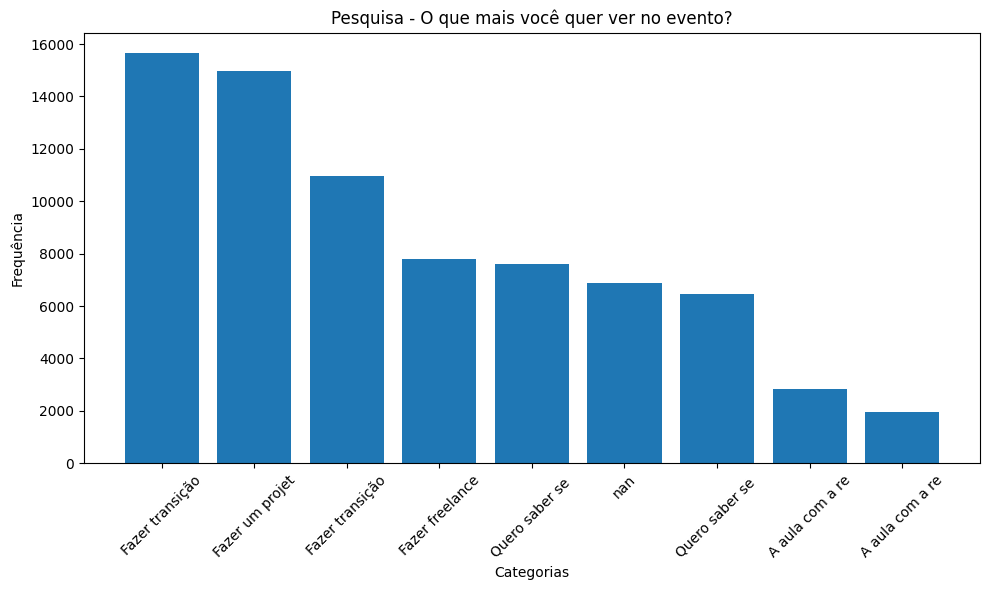


COLUNA: Source
--------------------------------------------------
Valores únicos: 6
Valores nulos: 1,299 (1.7%)
Distribuição (Todas as categorias):
  facebook-ads                     67,311 ( 89.6%)
  google-ads                        6,242 (  8.3%)
  nan                               1,299 (  1.7%)
  fb                                  254 (  0.3%)
  teste                                 2 (  0.0%)
  [field id="utm_source"]               1 (  0.0%)
  facebook-ads-SiteLink                 1 (  0.0%)


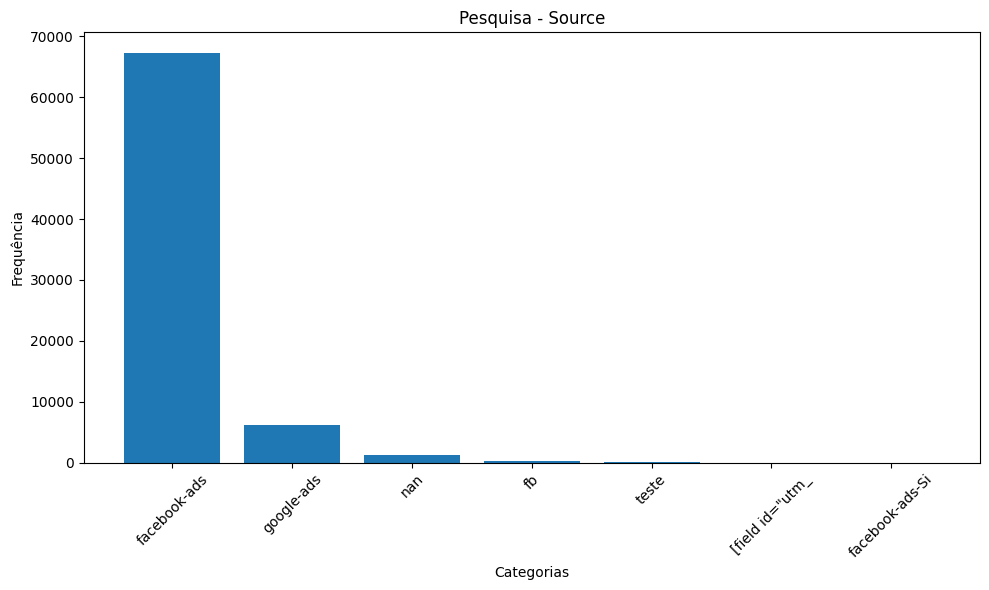


COLUNA: Campaign
--------------------------------------------------
Valores únicos: 76
Valores nulos: 1,294 (1.7%)
Distribuição (Top 10):
  DEVLF                            66,495 ( 88.5%)
  devlf                             6,198 (  8.3%)
  nan                               1,294 (  1.7%)
  DEVLF | CAP | FRIO | FASE 04 |      168 (  0.2%)
  DEVLF | CAP | FRIO | FASE 04 |      148 (  0.2%)
  DEVLF | CAP | FRIO | FASE 04 |       98 (  0.1%)
  DEVF03                               66 (  0.1%)
  DEVLF | CAP | FRIO | FASE 01 |       56 (  0.1%)
  DEVLF | CAP | FRIO | FASE 04 |       55 (  0.1%)
  DEVLF | CAP | FRIO | FASE 04 |       49 (  0.1%)


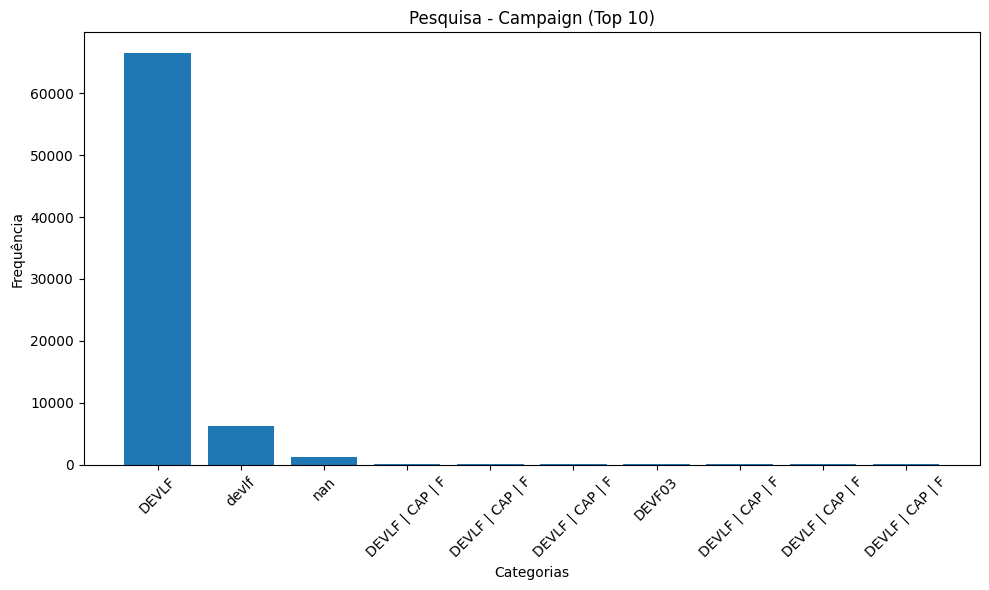


COLUNA: Medium
--------------------------------------------------
Valores únicos: 327
Valores nulos: 1,299 (1.7%)
Distribuição (Top 10):
  Lookalike 2% Cadastrados - DEV   10,669 ( 14.2%)
  ADV | Linguagem de programação    9,001 ( 12.0%)
  ADV | Lookalike 2% Cadastrados    7,023 (  9.4%)
  Aberto                            6,536 (  8.7%)
  dgen                              6,129 (  8.2%)
  ADV | Lookalike 2% Alunos + In    3,719 (  5.0%)
  Lookalike 2% Alunos + Interess    2,889 (  3.8%)
  Linguagem de programação          2,515 (  3.3%)
  Lookalike 2% Alunos + Interess    2,036 (  2.7%)
  Lookalike 1% Cadastrados - DEV    1,914 (  2.5%)


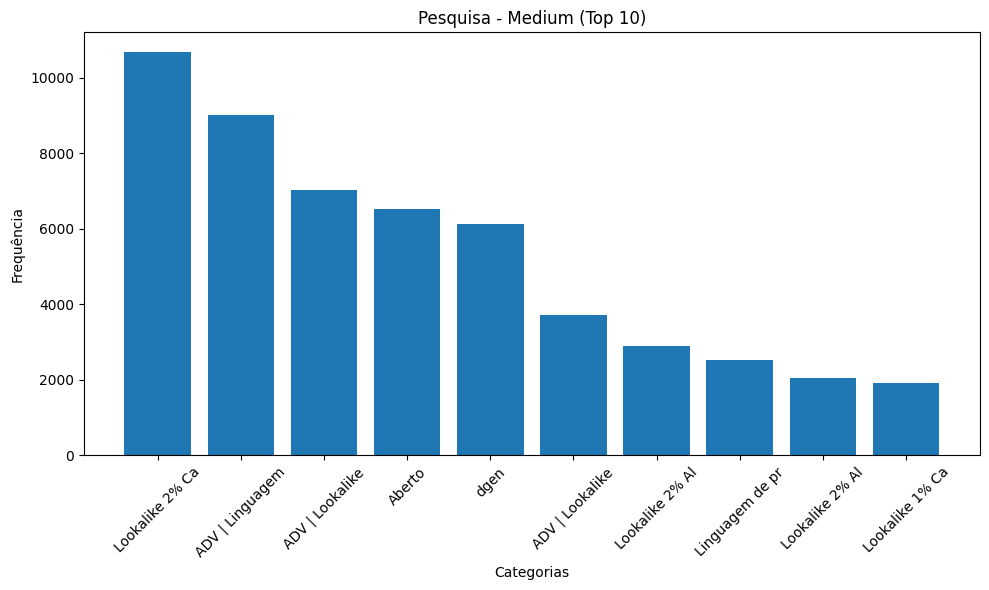


COLUNA: Content
--------------------------------------------------
Valores únicos: 488
Valores nulos: 1,351 (1.8%)
Distribuição (Top 10):
  DEVF - AD07-vid                  12,344 ( 16.4%)
  DEV-AD0017-vid-captação-V0-POD    6,126 (  8.2%)
  DEV-AD0017-vid-captação-V0-POD    4,114 (  5.5%)
  DEVF - AD09-vid_Group_1           4,009 (  5.3%)
  DEV-AD0027-vid-captação-V0-DEV    3,571 (  4.8%)
  DEV-AD0001-vid                    3,185 (  4.2%)
  DEV-AD0009-vid                    2,186 (  2.9%)
  DEVF - AD11-vid_Group_1           2,152 (  2.9%)
  DEVF - AD06-vid_Group_1           2,110 (  2.8%)
  DEV-AD0007-vid                    2,021 (  2.7%)


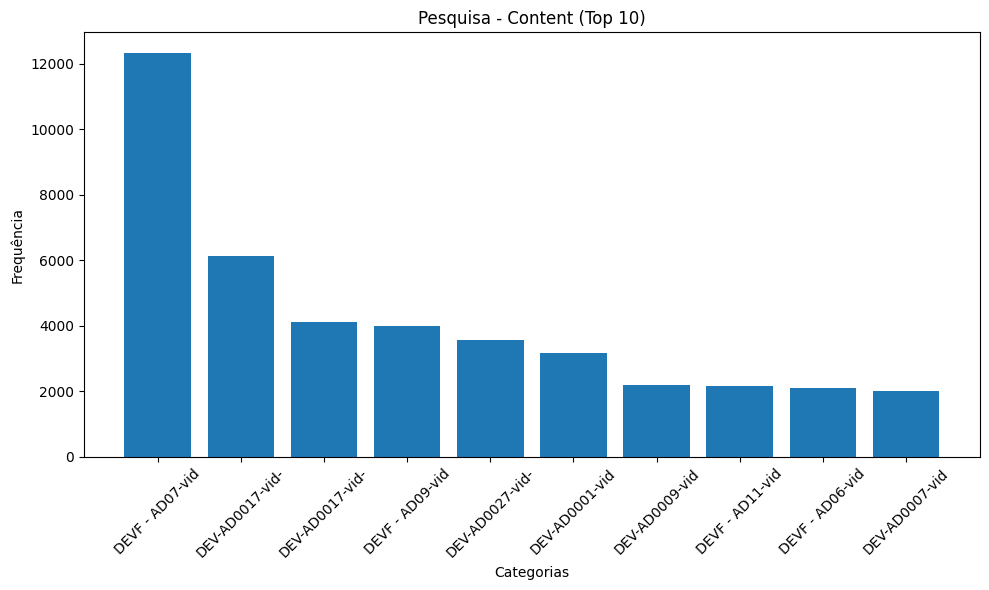


COLUNA: Term
--------------------------------------------------
Valores únicos: 240
Valores nulos: 1,301 (1.7%)
Distribuição (Top 10):
  ig                               51,578 ( 68.7%)
  fb                               15,424 ( 20.5%)
  22527413714--180108372678--750    1,618 (  2.2%)
  nan                               1,301 (  1.7%)
  22527413657--179264823996--750    1,139 (  1.5%)
  22451610660--179723795642--747      657 (  0.9%)
  22521023178--174450244690--750      402 (  0.5%)
  {{site_source_name}}                303 (  0.4%)
  22451610660--179723795642--747      182 (  0.2%)
  22243154059--174356534785--733      158 (  0.2%)


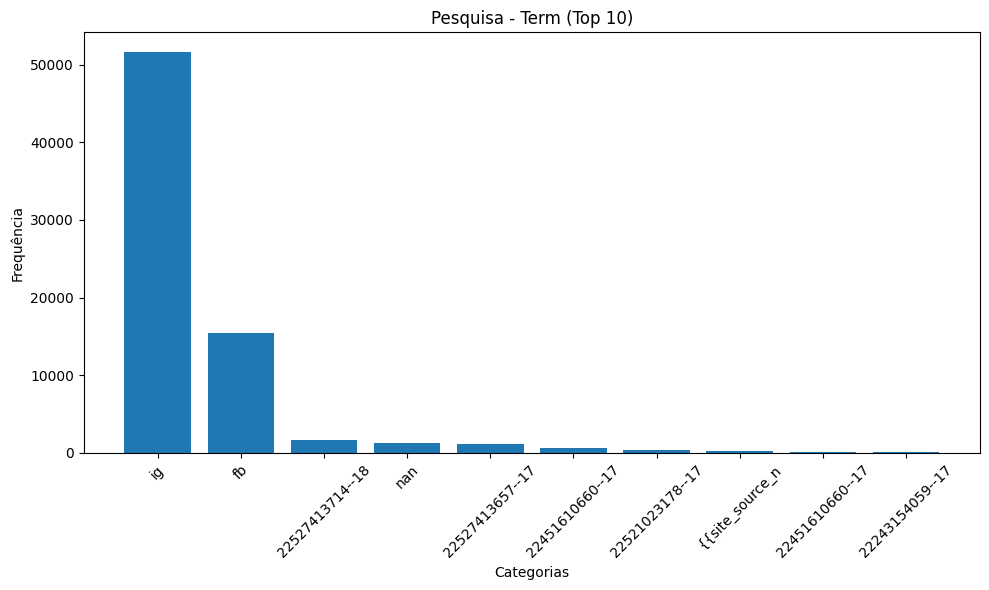


COLUNA: Tem computador/notebook?
--------------------------------------------------
Valores únicos: 4
Valores nulos: 26,892 (35.8%)
Distribuição (Todas as categorias):
  SIM                              31,886 ( 42.5%)
  nan                              26,892 ( 35.8%)
  Sim                               7,609 ( 10.1%)
  Não                               6,929 (  9.2%)
  não                               1,794 (  2.4%)


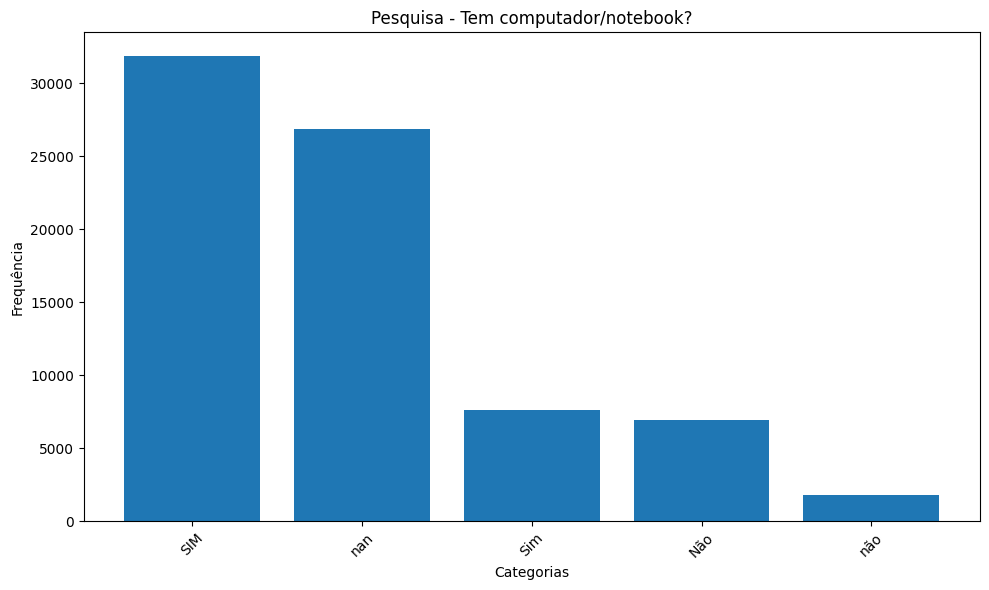


COLUNA: Qual o seu nível em programação?
--------------------------------------------------
Valores únicos: 5
Valores nulos: 48,156 (64.1%)
Distribuição (Todas as categorias):
  nan                              48,156 ( 64.1%)
  Nunca estudei programação.       16,339 ( 21.8%)
  Já ouvi falar, mas nunca prati    6,204 (  8.3%)
  Até fiz alguns cursos, mas ain    3,613 (  4.8%)
  Já estudo programação e busco       716 (  1.0%)
  Já trabalho na área de program       82 (  0.1%)


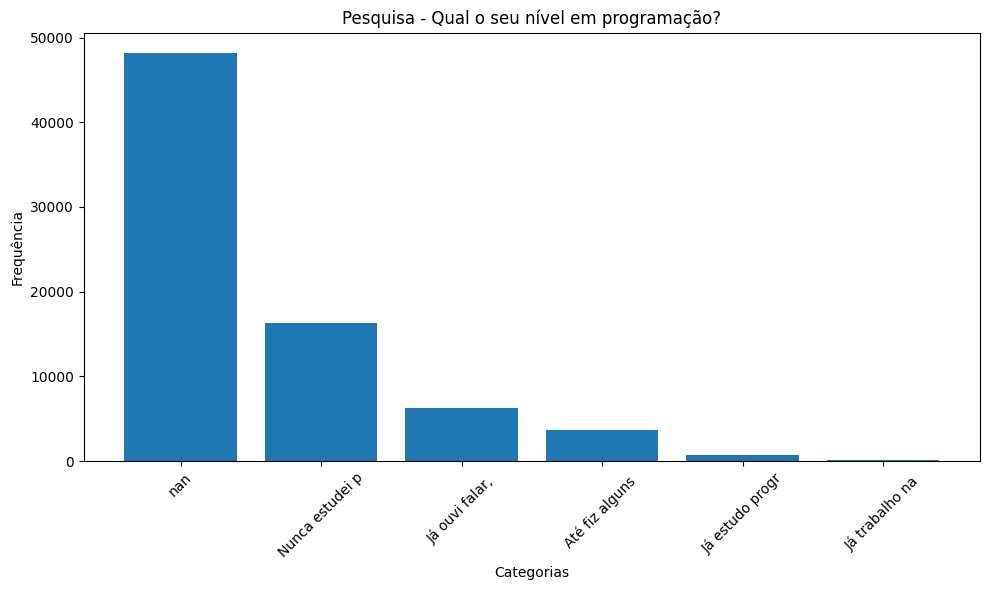


COLUNA:  
--------------------------------------------------
Valores únicos: 0
Valores nulos: 75,110 (100.0%)
Distribuição (Todas as categorias):
  nan                              75,110 (100.0%)


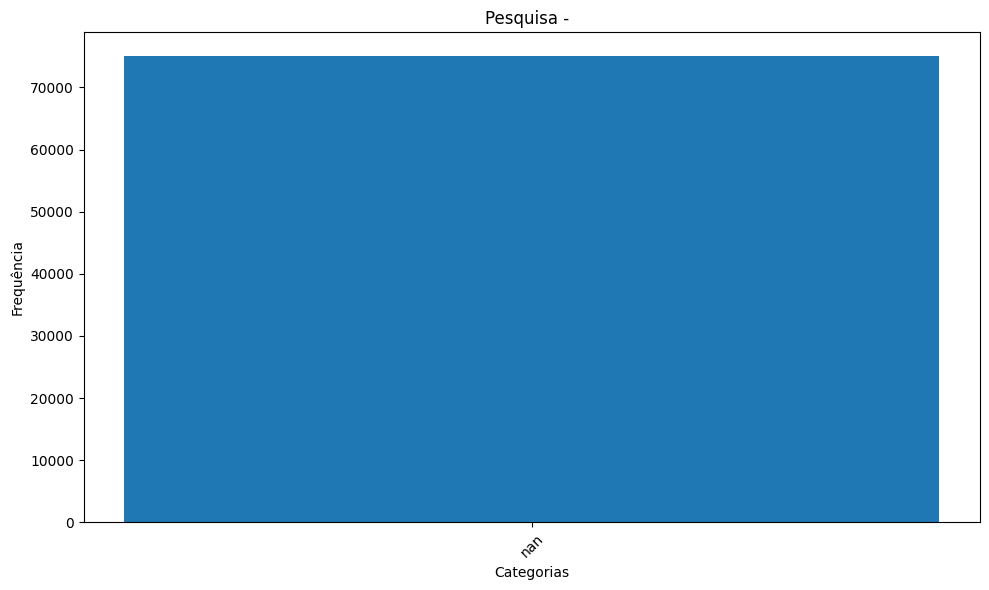


COLUNA: investiu_curso_online
--------------------------------------------------
Valores únicos: 2
Valores nulos: 16 (0.0%)
Distribuição (Todas as categorias):
  Não                              49,389 ( 65.8%)
  Sim                              25,705 ( 34.2%)
  None                                 16 (  0.0%)


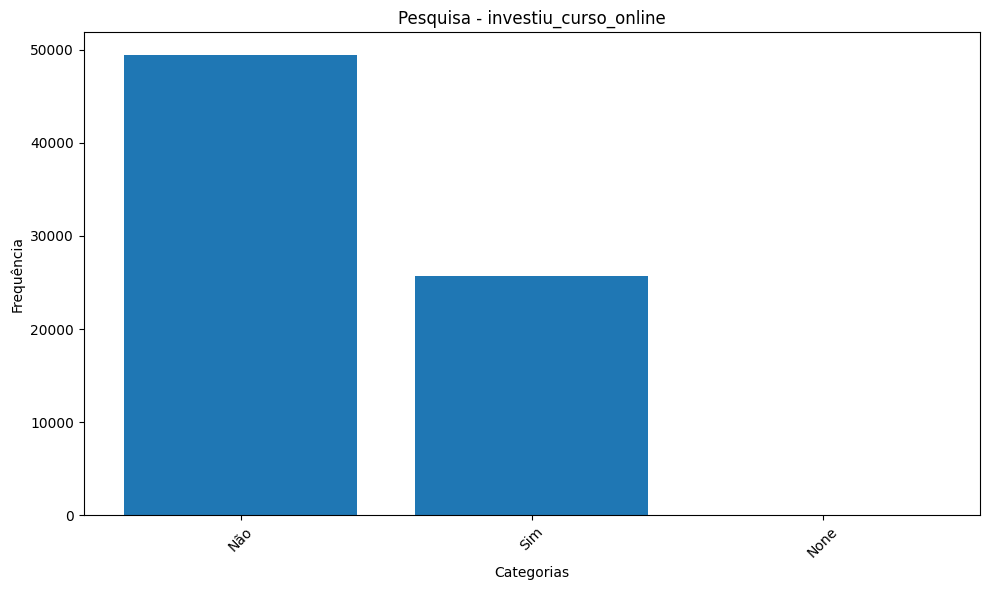


COLUNA: interesse_programacao
--------------------------------------------------
Valores únicos: 10
Valores nulos: 16 (0.0%)
Distribuição (Todas as categorias):
  Todas as alternativas            16,137 ( 21.5%)
  Poder trabalhar de qualquer lu   14,265 ( 19.0%)
  Todas as alternativas.           14,035 ( 18.7%)
  Poder trabalhar de qualquer lu   12,699 ( 16.9%)
  A possibilidade de ganhar alto    4,477 (  6.0%)
  Trabalhar para outros países e    3,443 (  4.6%)
  A ideia de nunca faltar empreg    2,803 (  3.7%)
  A possibilidade de ganhar alto    2,561 (  3.4%)
  A ideia de nunca faltar empreg    2,546 (  3.4%)
  Trabalhar para outros países e    2,128 (  2.8%)
  None                                 16 (  0.0%)


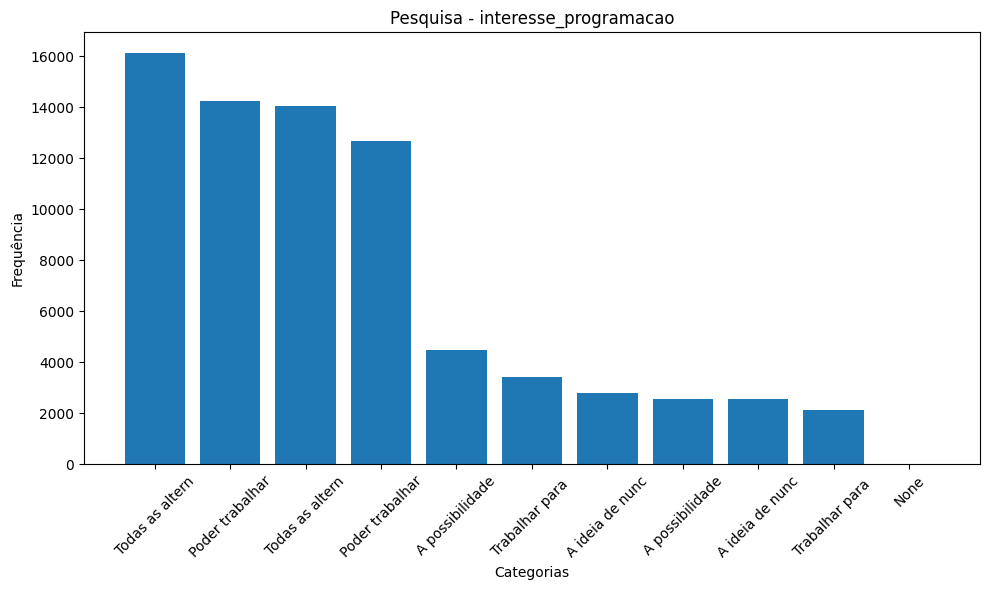


DATASET: Vendas
Colunas categóricas encontradas: 1

COLUNA: produto
--------------------------------------------------
Valores únicos: 17
Valores nulos: 0 (0.0%)
Distribuição (Top 10):
  DevClub FullStack Pro - OFICIA    1,187 ( 22.2%)
  (Desativado) DevClub 3.0 - 202    1,129 ( 21.1%)
  DevClub - Full Stack 2025         1,077 ( 20.2%)
  DevClub - FS - Vitalício            776 ( 14.5%)
  DevClub Vitalício                   268 (  5.0%)
  DevClub - Full Stack 2025 - EV      227 (  4.3%)
  Formação DevClub FullStack Pro      223 (  4.2%)
  DevClub 3.0 - 2024                  173 (  3.2%)
  [Vitalício] Formação DevClub F       68 (  1.3%)
  (Desativado) DevClub 3.0 - 202       56 (  1.0%)


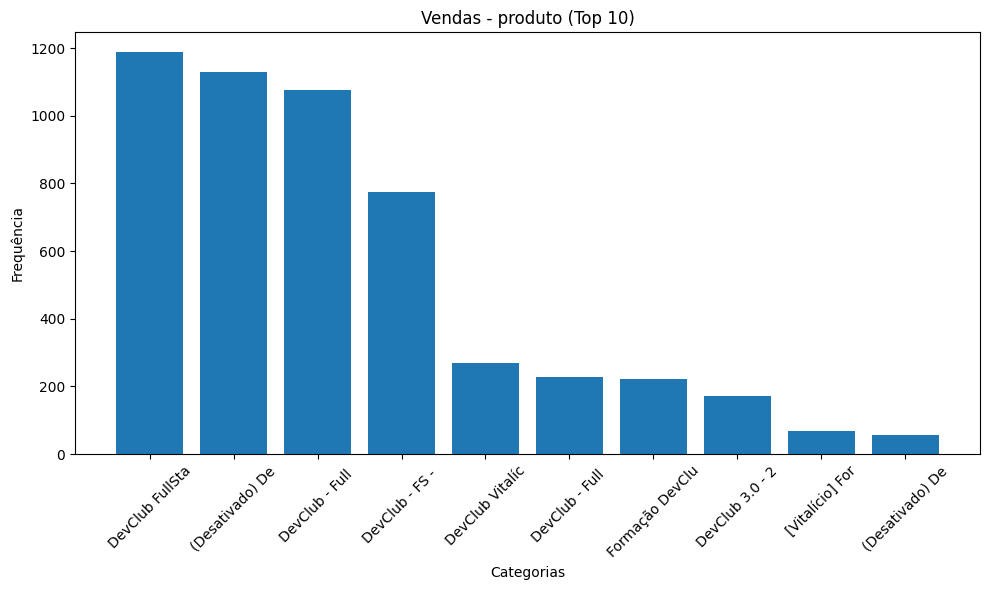

In [ ]:
# ANÁLISE DE VARIÁVEIS CATEGÓRICAS
print("ANÁLISE DE VARIÁVEIS CATEGÓRICAS")
print("=" * 35)

import matplotlib.pyplot as plt

def analisar_categoricas():
   """Analisa variáveis categóricas dos datasets"""

   datasets = {
       'Pesquisa': pesquisa_unificado,
       'Vendas': vendas_unificado
   }

   # Colunas a excluir da análise
   excluir = ['nome', 'telefone', 'email', 'e-mail', 'data', 'aba_origem', 'arquivo_origem']

   for dataset_nome, df in datasets.items():
       print(f"\nDATASET: {dataset_nome}")
       print("=" * 40)

       # Identificar colunas categóricas
       colunas_categoricas = []
       for col in df.columns:
           # Excluir identificadores, datas e metadados
           if not any(termo in col.lower() for termo in excluir):
               # Incluir se for object/string ou se tiver poucos valores únicos
               if df[col].dtype == 'object' or df[col].nunique() <= 20:
                   colunas_categoricas.append(col)

       print(f"Colunas categóricas encontradas: {len(colunas_categoricas)}")

       for coluna in colunas_categoricas:
           print(f"\nCOLUNA: {coluna}")
           print("-" * 50)

           # 1. Valores únicos
           valores_unicos = df[coluna].nunique()
           print(f"Valores únicos: {valores_unicos}")

           # 2. Nulos
           nulos = df[coluna].isnull().sum()
           pct_nulos = (nulos / len(df)) * 100
           print(f"Valores nulos: {nulos:,} ({pct_nulos:.1f}%)")

           # 3. Distribuição de categorias
           distribuicao = df[coluna].value_counts(dropna=False)

           if valores_unicos > 10:
               print(f"Distribuição (Top 10):")
               top_10 = distribuicao.head(10)
               for valor, count in top_10.items():
                   pct = (count / len(df)) * 100
                   print(f"  {str(valor)[:30]:<32} {count:>6,} ({pct:>5.1f}%)")

               # Gráfico apenas com Top 10
               plt.figure(figsize=(10, 6))
               plt.bar(range(len(top_10)), top_10.values)
               plt.title(f'{dataset_nome} - {coluna} (Top 10)')
               plt.xlabel('Categorias')
               plt.ylabel('Frequência')
               plt.xticks(range(len(top_10)), [str(x)[:15] for x in top_10.index], rotation=45)
               plt.tight_layout()
               plt.show()

           else:
               print(f"Distribuição (Todas as categorias):")
               for valor, count in distribuicao.items():
                   pct = (count / len(df)) * 100
                   print(f"  {str(valor)[:30]:<32} {count:>6,} ({pct:>5.1f}%)")

               # Gráfico com todas as categorias
               plt.figure(figsize=(10, 6))
               plt.bar(range(len(distribuicao)), distribuicao.values)
               plt.title(f'{dataset_nome} - {coluna}')
               plt.xlabel('Categorias')
               plt.ylabel('Frequência')
               plt.xticks(range(len(distribuicao)), [str(x)[:15] for x in distribuicao.index], rotation=45)
               plt.tight_layout()
               plt.show()

# Executar análise
analisar_categoricas()

## 6.3- Investigação
Para coluna de data:
1. Data de início e do fim
2. Formato da data

In [ ]:
# ANÁLISE DE QUALIDADE DOS DADOS - DATAS
print("ANÁLISE DE QUALIDADE DOS DADOS - DATAS")
print("=" * 42)

def analisar_datas():
    """Analisa qualidade dos campos de data"""

    # Datasets para analisar
    datasets = {
        'Pesquisa': pesquisa_unificado,
        'Vendas': vendas_unificado
    }

    for dataset_nome, df in datasets.items():
        print(f"\nDATASET: {dataset_nome}")
        print("-" * 30)

        # Identificar colunas de data
        colunas_data = []
        for col in df.columns:
            if any(termo in col.lower() for termo in ['data', 'date', 'criado', 'created']):
                colunas_data.append(col)

        if len(colunas_data) == 0:
            print(" Nenhuma coluna de data encontrada")
            continue

        for coluna in colunas_data:
            print(f"\nColuna: {coluna}")

            # Filtrar apenas valores não nulos
            dados_validos = df[df[coluna].notna()][coluna]

            if len(dados_validos) == 0:
                print(" Nenhum dado válido encontrado")
                continue

            print(f" Registros válidos: {len(dados_validos):,}")

            # 1. Data de início e fim
            try:
                # Tentar converter para datetime se ainda não for
                if dados_validos.dtype == 'object':
                    datas_convertidas = pd.to_datetime(dados_validos, errors='coerce')
                else:
                    datas_convertidas = dados_validos

                # Remover valores que não puderam ser convertidos
                datas_validas = datas_convertidas.dropna()

                if len(datas_validas) > 0:
                    data_inicio = datas_validas.min()
                    data_fim = datas_validas.max()

                    print(f" Data de início: {data_inicio}")
                    print(f" Data de fim: {data_fim}")
                    print(f" Período: {(data_fim - data_inicio).days} dias")
                else:
                    print(" Não foi possível converter nenhuma data")

            except Exception as e:
                print(f" Erro ao processar datas: {e}")

            # 2. Formato da data
            print(f" Tipo de dados: {dados_validos.dtype}")

            # Analisar formatos se for string
            if dados_validos.dtype == 'object':
                # Amostrar alguns valores para análise de formato
                amostras = dados_validos.head(10).tolist()
                print(f" Amostras de formato:")
                for i, amostra in enumerate(amostras):
                    print(f"  {i+1}. {amostra}")

                # Analisar padrões de formato
                formatos_detectados = set()
                for valor in dados_validos.head(100):  # Analisar primeiros 100
                    valor_str = str(valor)

                    # Detectar padrões comuns
                    if '/' in valor_str:
                        partes = valor_str.split('/')
                        if len(partes) == 3:
                            formatos_detectados.add('DD/MM/YYYY ou MM/DD/YYYY')
                    elif '-' in valor_str:
                        partes = valor_str.split('-')
                        if len(partes) == 3:
                            formatos_detectados.add('YYYY-MM-DD ou DD-MM-YYYY')
                    elif ' ' in valor_str:
                        formatos_detectados.add('Data com horário')

                if formatos_detectados:
                    print(f" Formatos detectados: {', '.join(formatos_detectados)}")
                else:
                    print(" Formato não identificado automaticamente")

# Executar análise
analisar_datas()

ANÁLISE DE QUALIDADE DOS DADOS - DATAS

DATASET: Pesquisa
------------------------------

Coluna: Data
 Registros válidos: 75,110
 Data de início: 2024-12-18 00:00:00
 Data de fim: 2025-08-29 11:32:49
 Período: 254 dias
 Tipo de dados: datetime64[ns]

DATASET: Vendas
------------------------------

Coluna: data
 Registros válidos: 5,340
 Data de início: 2024-01-10 11:20:21
 Data de fim: 2025-12-08 21:12:11
 Período: 698 dias
 Tipo de dados: datetime64[ns]


## 6.4 Investigação
Quantidade de cada produto vendido com o valor, e quantidade de cada produto vendido por mês desde o início do dataset de leads.

ANÁLISE DE PRODUTOS E VENDAS

1. TABELA DE PRODUTOS COM VALORES
PRODUTO                             QTD    %VND  VALOR TOTAL  %REC  VALOR MÉDIO
--------------------------------------------------------------------------------
(Desativado) DevClub 3.0 - 2024     1,128  21.1  R$ 2,470,745 25.3  R$ 2,190   
DevClub FullStack Pro - OFICIAL     1,187  22.2  R$ 2,291,112 23.4  R$ 1,930   
DevClub - Full Stack 2025           1,077  20.2  R$ 2,252,320 23.0  R$ 2,091   
DevClub - FS - Vitalício            776    14.5  R$ 816,298   8.3   R$ 1,052   
DevClub - Full Stack 2025 - EV      227    4.3   R$ 503,611   5.1   R$ 2,219   
DevClub 3.0 - 2024                  173    3.2   R$ 379,774   3.9   R$ 2,195   
Formação DevClub FullStack Pro -    223    4.2   R$ 371,289   3.8   R$ 1,665   
DevClub Vitalício                   268    5.0   R$ 313,236   3.2   R$ 1,169   
(Desativado) DevClub 3.0 - 2024 -   56     1.0   R$ 113,400   1.2   R$ 2,025   
Formação DevClub FullStack Pro -    45     0.8   R$ 79,

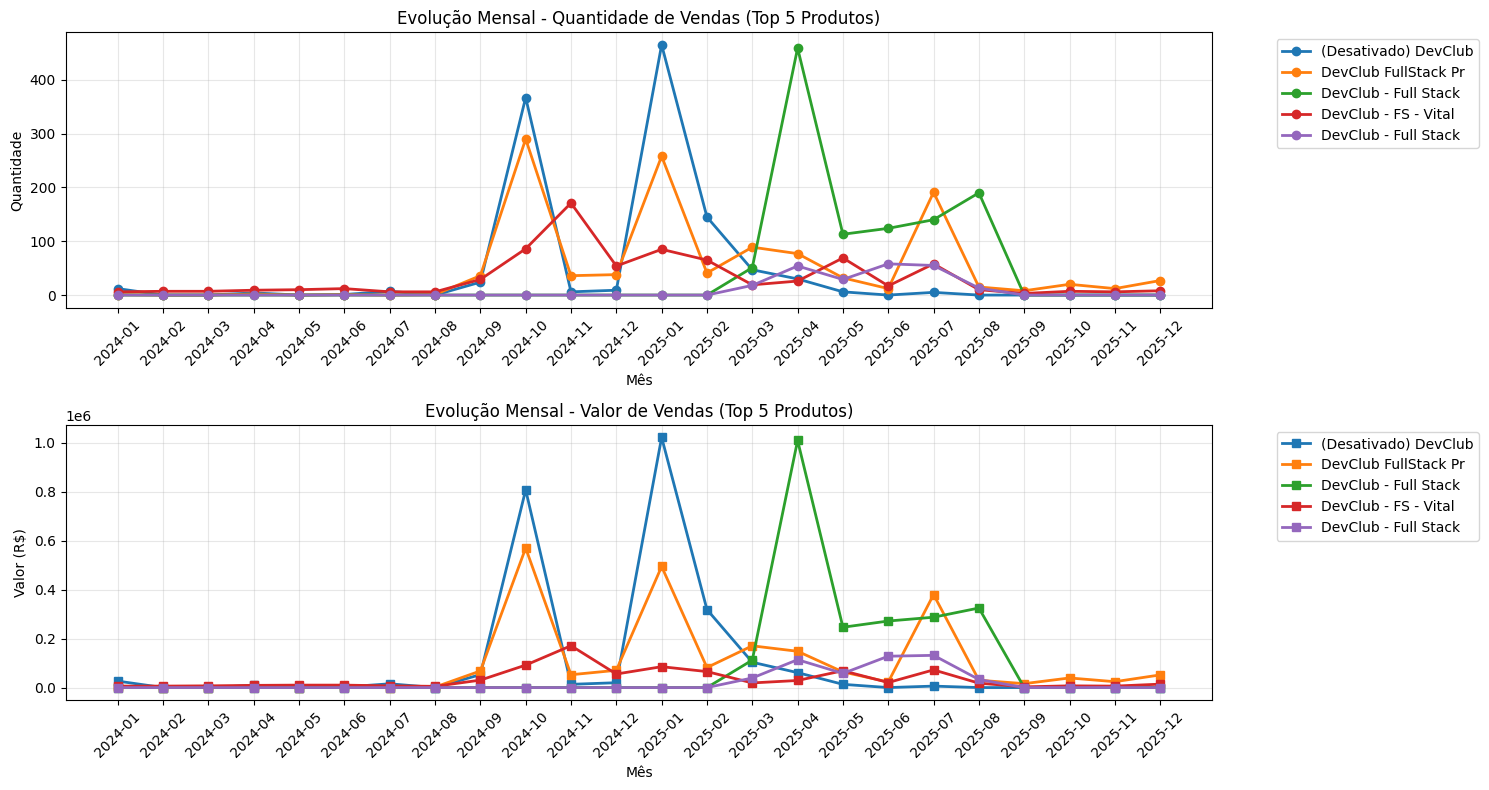

In [ ]:
# ANÁLISE DE PRODUTOS E VENDAS
print("ANÁLISE DE PRODUTOS E VENDAS")
print("=" * 32)

import matplotlib.pyplot as plt
import pandas as pd

def analisar_produtos_vendas():
    """Analisa produtos vendidos com valores e evolução temporal"""

    df = vendas_unificado.copy()

    # Verificar se existem as colunas necessárias
    if 'produto' not in df.columns or 'valor' not in df.columns:
        print("Colunas 'produto' ou 'valor' não encontradas no dataset")
        return

    print("\n1. TABELA DE PRODUTOS COM VALORES")
    print("=" * 50)

    # Análise por produto
    analise_produto = df.groupby('produto').agg({
        'valor': ['count', 'sum', 'mean'],
        'produto': 'size'
    }).round(2)

    # Simplificar colunas
    analise_produto.columns = ['quantidade', 'valor_total', 'valor_medio', 'registros']
    analise_produto = analise_produto[['quantidade', 'valor_total', 'valor_medio']]

    # Ordenar por valor total decrescente
    analise_produto = analise_produto.sort_values('valor_total', ascending=False)

    # Calcular percentuais
    total_vendas = analise_produto['quantidade'].sum()
    total_receita = analise_produto['valor_total'].sum()

    analise_produto['pct_vendas'] = (analise_produto['quantidade'] / total_vendas * 100).round(1)
    analise_produto['pct_receita'] = (analise_produto['valor_total'] / total_receita * 100).round(1)

    # Exibir tabela formatada
    print(f"{'PRODUTO':<35} {'QTD':<6} {'%VND':<5} {'VALOR TOTAL':<12} {'%REC':<5} {'VALOR MÉDIO':<11}")
    print("-" * 80)

    for produto, row in analise_produto.iterrows():
        produto_truncado = produto[:33] if len(produto) > 33 else produto
        print(f"{produto_truncado:<35} {row['quantidade']:<6,.0f} {row['pct_vendas']:<5.1f} R$ {row['valor_total']:<9,.0f} {row['pct_receita']:<5.1f} R$ {row['valor_medio']:<8,.0f}")

    print("-" * 80)
    print(f"{'TOTAL':<35} {total_vendas:<6,.0f} {'100.0':<5} R$ {total_receita:<9,.0f} {'100.0':<5}")

    # Verificar se existe coluna de data
    colunas_data = [col for col in df.columns if any(termo in col.lower() for termo in ['data', 'date', 'criado', 'created'])]

    if len(colunas_data) == 0:
        print("\nNenhuma coluna de data encontrada para análise temporal")
        return

    coluna_data = colunas_data[0]
    print(f"\nUsando coluna de data: {coluna_data}")

    # Converter data para datetime
    df[coluna_data] = pd.to_datetime(df[coluna_data], errors='coerce')
    df_com_data = df[df[coluna_data].notna()].copy()

    if len(df_com_data) == 0:
        print("Nenhuma data válida encontrada")
        return

    # Criar coluna mês-ano
    df_com_data['mes_ano'] = df_com_data[coluna_data].dt.to_period('M')

    print(f"\n2. EVOLUÇÃO MENSAL DE VENDAS POR PRODUTO")
    print("=" * 50)

    # Análise temporal por produto
    vendas_mensais = df_com_data.groupby(['mes_ano', 'produto']).agg({
        'valor': ['count', 'sum']
    }).reset_index()

    # Simplificar colunas
    vendas_mensais.columns = ['mes_ano', 'produto', 'quantidade', 'valor_total']

    # Criar tabela pivotada para visualização
    pivot_quantidade = vendas_mensais.pivot(index='mes_ano', columns='produto', values='quantidade').fillna(0)
    pivot_valor = vendas_mensais.pivot(index='mes_ano', columns='produto', values='valor_total').fillna(0)

    # Ordenar produtos por volume total
    ordem_produtos = analise_produto.head(10).index.tolist()  # Top 10 produtos

    # Filtrar apenas os produtos principais
    produtos_principais = [p for p in ordem_produtos if p in pivot_quantidade.columns]

    if len(produtos_principais) > 0:
        pivot_quantidade_top = pivot_quantidade[produtos_principais]
        pivot_valor_top = pivot_valor[produtos_principais]

        print("\nQUANTIDADE VENDIDA POR MÊS (Top 10 produtos):")
        print("-" * 80)

        # Exibir tabela de quantidade de forma legível
        meses = pivot_quantidade_top.index[-12:]  # Últimos 12 meses
        dados_recentes = pivot_quantidade_top.loc[meses]

        # Cabeçalho
        produtos_curtos = [p[:12] for p in produtos_principais[:6]]  # Máximo 6 produtos para legibilidade
        print(f"{'MÊS':<8} " + " ".join(f"{p:<12}" for p in produtos_curtos))
        print("-" * 80)

        for mes in dados_recentes.index:
            linha = f"{str(mes):<8} "
            for produto in produtos_principais[:6]:
                qtd = int(dados_recentes.loc[mes, produto])
                linha += f"{qtd:<12}"
            print(linha)

    # Gráfico de evolução temporal
    plt.figure(figsize=(15, 8))

    # Subplot 1: Quantidade
    plt.subplot(2, 1, 1)
    for produto in produtos_principais[:5]:  # Top 5 para visualização
        plt.plot(pivot_quantidade_top.index.astype(str), pivot_quantidade_top[produto],
                marker='o', label=produto[:20], linewidth=2)

    plt.title('Evolução Mensal - Quantidade de Vendas (Top 5 Produtos)')
    plt.xlabel('Mês')
    plt.ylabel('Quantidade')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)

    # Subplot 2: Valor
    plt.subplot(2, 1, 2)
    for produto in produtos_principais[:5]:  # Top 5 para visualização
        plt.plot(pivot_valor_top.index.astype(str), pivot_valor_top[produto],
                marker='s', label=produto[:20], linewidth=2)

    plt.title('Evolução Mensal - Valor de Vendas (Top 5 Produtos)')
    plt.xlabel('Mês')
    plt.ylabel('Valor (R$)')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

# Executar análise
analisar_produtos_vendas()

## 6.5 - Investigação
Data a partir de qual cada feature ausente começa a ter dados.
Objetivo: identificar se, a partir de determinada data, o dataset tem todas as features disponíveis.

In [ ]:
# ANÁLISE DE EVOLUÇÃO DE FEATURES NO TEMPO
print("ANÁLISE DE EVOLUÇÃO DE FEATURES NO TEMPO")
print("=" * 44)

import pandas as pd

def analisar_evolucao_features():
    """Analisa quando cada feature começou e parou de ter respostas"""

    df = pesquisa_unificado.copy()

    # Features de interesse
    features_interesse = [
        'Já estudou programação?',
        'Você já fez/faz/pretende fazer faculdade?',
        'Tem computador/notebook?',
        'Qual o seu nível em programação?',
        "Você possui cartão de crédito?",
        "O que mais você quer ver no evento?"
    ]

    # DEBUG: Listar todas as colunas para encontrar a feature faltante
    print(f"\nDEBUG - TODAS AS COLUNAS DO DATASET:")
    print("-" * 50)
    for i, coluna in enumerate(df.columns, 1):
        print(f"{i:2d}. {coluna}")

    # DEBUG: Buscar colunas que contenham palavras relacionadas à feature faltante
    print(f"\nDEBUG - COLUNAS COM 'FAC', 'FACUL' OU 'FAZER':")
    print("-" * 50)
    colunas_relacionadas = []
    for coluna in df.columns:
        if any(termo in coluna.lower() for termo in ['fac', 'facul', 'fazer', 'pretende']):
            colunas_relacionadas.append(coluna)
            print(f"  {coluna}")

    if len(colunas_relacionadas) == 0:
        print("  Nenhuma coluna encontrada com esses termos")

    print()

    # Identificar coluna de data
    colunas_data = [col for col in df.columns if any(termo in col.lower() for termo in ['data', 'date'])]

    if len(colunas_data) == 0:
        print("Nenhuma coluna de data encontrada")
        return

    coluna_data = colunas_data[0]
    print(f"Usando coluna de data: {coluna_data}")

    # Converter data para datetime
    df[coluna_data] = pd.to_datetime(df[coluna_data], errors='coerce')
    df_com_data = df[df[coluna_data].notna()].copy()

    if len(df_com_data) == 0:
        print("Nenhuma data válida encontrada")
        return

    print(f"\nPERÍODO TOTAL DO DATASET:")
    print(f"Data mais antiga: {df_com_data[coluna_data].min()}")
    print(f"Data mais recente: {df_com_data[coluna_data].max()}")
    print(f"Total de registros com data: {len(df_com_data):,}")

    print(f"\nANÁLISE POR FEATURE:")
    print("=" * 80)
    print(f"{'FEATURE':<35} {'PRIMEIRA':<12} {'ÚLTIMA':<12} {'TOTAL':<8} {'%AUSENTES':<10}")
    print("-" * 80)

    for feature in features_interesse:
        if feature in df_com_data.columns:
            # Filtrar apenas registros com respostas válidas para esta feature
            dados_validos = df_com_data[df_com_data[feature].notna()]

            if len(dados_validos) > 0:
                primeira_data = dados_validos[coluna_data].min()
                ultima_data = dados_validos[coluna_data].max()
                total_respostas = len(dados_validos)

                # Calcular % ausentes
                total_registros = len(df_com_data)
                pct_ausentes = ((total_registros - total_respostas) / total_registros * 100)

                # Formatação das datas
                primeira_str = primeira_data.strftime('%Y-%m-%d')
                ultima_str = ultima_data.strftime('%Y-%m-%d')

                feature_truncada = feature[:33] if len(feature) > 33 else feature

                print(f"{feature_truncada:<35} {primeira_str:<12} {ultima_str:<12} {total_respostas:<8,} {pct_ausentes:<10.1f}%")

                # Análise detalhada por feature
                print(f"\nDETALHES - {feature}:")
                print("-" * 50)

                # Distribuição mensal de respostas
                dados_validos_copia = dados_validos.copy()
                dados_validos_copia['mes_ano'] = dados_validos_copia[coluna_data].dt.to_period('M')

                respostas_mensais = dados_validos_copia.groupby('mes_ano').size()

                print(f"Meses com respostas: {len(respostas_mensais)}")
                print(f"Média de respostas por mês: {respostas_mensais.mean():.1f}")

                # Primeiros e últimos meses com mais respostas
                top_meses = respostas_mensais.head(5)
                print(f"Primeiros 5 meses:")
                for mes, qtd in top_meses.items():
                    print(f"  {mes}: {qtd:,} respostas")

                # Verificar se há gaps (períodos sem respostas)
                periodo_completo = pd.period_range(
                    start=primeira_data.to_period('M'),
                    end=ultima_data.to_period('M'),
                    freq='M'
                )

                meses_sem_resposta = []
                for mes in periodo_completo:
                    if mes not in respostas_mensais.index:
                        meses_sem_resposta.append(mes)

                if len(meses_sem_resposta) > 0:
                    print(f"Meses sem respostas no período: {len(meses_sem_resposta)}")
                    if len(meses_sem_resposta) <= 5:
                        for mes in meses_sem_resposta:
                            print(f"  {mes}")
                    else:
                        print(f"  Primeiros 5: {', '.join(str(m) for m in meses_sem_resposta[:5])}")

                print()

            else:
                feature_truncada = feature[:33] if len(feature) > 33 else feature
                print(f"{feature_truncada:<35} {'SEM DADOS':<12} {'SEM DADOS':<12} {'0':<8} {'100.0%':<10}")
        else:
            feature_truncada = feature[:33] if len(feature) > 33 else feature
            print(f"{feature_truncada:<35} {'NÃO ENCONTRADA':<25}")

    print("-" * 80)

    # Análise comparativa
    print(f"\nANÁLISE COMPARATIVA:")
    print("=" * 30)

    features_encontradas = [f for f in features_interesse if f in df_com_data.columns]

    if len(features_encontradas) > 1:
        print("Ordem cronológica de introdução das features:")

        datas_inicio = {}
        for feature in features_encontradas:
            dados_validos = df_com_data[df_com_data[feature].notna()]
            if len(dados_validos) > 0:
                datas_inicio[feature] = dados_validos[coluna_data].min()

        # Ordenar por data de início
        features_ordenadas = sorted(datas_inicio.items(), key=lambda x: x[1])

        for i, (feature, data_inicio) in enumerate(features_ordenadas, 1):
            print(f"{i}. {feature[:40]} - {data_inicio.strftime('%Y-%m-%d')}")

# Executar análise
analisar_evolucao_features()

ANÁLISE DE EVOLUÇÃO DE FEATURES NO TEMPO

DEBUG - TODAS AS COLUNAS DO DATASET:
--------------------------------------------------
 1. Data
 2. Nome Completo
 3. E-mail
 4. Telefone
 5. O seu gênero:
 6. Qual a sua idade?
 7. O que você faz atualmente?
 8. Atualmente, qual a sua faixa salarial?
 9. Você possui cartão de crédito?
10. Já estudou programação?
11. Você já fez/faz/pretende fazer faculdade?
12. O que mais você quer ver no evento?
13. Source
14. Campaign
15. Medium
16. Content
17. Term
18. Tem computador/notebook?
19. arquivo_origem
20. aba_origem
21. Qual o seu nível em programação?
22.  
23. investiu_curso_online
24. interesse_programacao

DEBUG - COLUNAS COM 'FAC', 'FACUL' OU 'FAZER':
--------------------------------------------------
  Você já fez/faz/pretende fazer faculdade?

Usando coluna de data: Data

PERÍODO TOTAL DO DATASET:
Data mais antiga: 2024-12-18 00:00:00
Data mais recente: 2025-08-29 11:32:49
Total de registros com data: 75,110

ANÁLISE POR FEATURE:
FEATURE 

## 7- Unificar categorias duplicadas

In [6]:
# UNIFICAÇÃO COMPLETA DE CATEGORIAS - NOVO CÓDIGO
print("UNIFICAÇÃO COMPLETA DE CATEGORIAS - NOVO CÓDIGO")
print("=" * 52)

def limpar_texto(texto):
    """Limpa caracteres invisíveis e normaliza texto"""
    if pd.isna(texto):
        return texto

    # Converter para string e limpar caracteres invisíveis
    texto_limpo = str(texto)
    texto_limpo = texto_limpo.replace('\u2060', '')  # Word joiner
    texto_limpo = texto_limpo.replace('\xa0', ' ')   # Non-breaking space
    texto_limpo = texto_limpo.replace('\u200b', '')  # Zero width space
    texto_limpo = texto_limpo.strip()

    return texto_limpo

def unificar_categorias_completo():
    """Unifica categorias com limpeza e mappings robustos"""

    df = pesquisa_unificado.copy()

    print("Aplicando limpeza e unificação completa...")

    # 1. INTERESSE PROGRAMAÇÃO
    print("\n1. Unificando interesse_programacao...")
    if 'interesse_programacao' in df.columns:
        # Limpar textos primeiro
        df['interesse_programacao'] = df['interesse_programacao'].apply(limpar_texto)

        # Mapping após limpeza
        df.loc[df['interesse_programacao'] == 'Todas as alternativas.', 'interesse_programacao'] = 'Todas as alternativas'
        df.loc[df['interesse_programacao'] == 'Poder trabalhar de qualquer lugar do mundo.', 'interesse_programacao'] = 'Poder trabalhar de qualquer lugar do mundo'
        df.loc[df['interesse_programacao'] == 'A possibilidade de ganhar altos salários.', 'interesse_programacao'] = 'A possibilidade de ganhar altos salários'
        df.loc[df['interesse_programacao'] == 'Trabalhar para outros países e ganhar em outra moeda.', 'interesse_programacao'] = 'Trabalhar para outros países e ganhar em outra moeda'
        df.loc[df['interesse_programacao'] == 'A ideia de nunca faltar emprego na área.', 'interesse_programacao'] = 'A ideia de nunca faltar emprego na área'

        valores_unicos = df['interesse_programacao'].nunique()
        print(f"   Resultado: {valores_unicos} valores únicos")

    # 2. TEM COMPUTADOR/NOTEBOOK
    print("\n2. Unificando Tem computador/notebook?...")
    if 'Tem computador/notebook?' in df.columns:
        df['Tem computador/notebook?'] = df['Tem computador/notebook?'].apply(limpar_texto)

        df.loc[df['Tem computador/notebook?'] == 'SIM', 'Tem computador/notebook?'] = 'Sim'
        df.loc[df['Tem computador/notebook?'] == 'não', 'Tem computador/notebook?'] = 'Não'

        valores_unicos = df['Tem computador/notebook?'].nunique()
        print(f"   Resultado: {valores_unicos} valores únicos")

    # 3. O QUE MAIS VOCÊ QUER VER NO EVENTO
    print("\n3. Unificando O que mais você quer ver no evento?...")
    if 'O que mais você quer ver no evento?' in df.columns:
        df['O que mais você quer ver no evento?'] = df['O que mais você quer ver no evento?'].apply(limpar_texto)

        # Unificar "conseguir" vs "consegui"
        df.loc[df['O que mais você quer ver no evento?'] == 'Fazer transição de carreira e consegui meu primeiro emprego na área', 'O que mais você quer ver no evento?'] = 'Fazer transição de carreira e conseguir meu primeiro emprego na área'

        # Unificar "Quero saber se é para mim" (com espaços especiais)
        df.loc[df['O que mais você quer ver no evento?'].str.contains('Quero saber.*é.*para.*mim', na=False, regex=True), 'O que mais você quer ver no evento?'] = 'Quero saber se é para mim'

        # Unificar recrutadora
        df.loc[df['O que mais você quer ver no evento?'] == 'A aula com a recrutadora;', 'O que mais você quer ver no evento?'] = 'A aula com a recrutadora'

        valores_unicos = df['O que mais você quer ver no evento?'].nunique()
        print(f"   Resultado: {valores_unicos} valores únicos")

    # 4. VOCÊ POSSUI CARTÃO DE CRÉDITO
    print("\n4. Unificando Você possui cartão de crédito?...")
    if 'Você possui cartão de crédito?' in df.columns:
        df['Você possui cartão de crédito?'] = df['Você possui cartão de crédito?'].apply(limpar_texto)

        # Todos os "Sim" (com ou sem caracteres especiais)
        df.loc[df['Você possui cartão de crédito?'].str.contains('Sim', na=False), 'Você possui cartão de crédito?'] = 'Sim'

        valores_unicos = df['Você possui cartão de crédito?'].nunique()
        print(f"   Resultado: {valores_unicos} valores únicos")

    # 5. ATUALMENTE, QUAL A SUA FAIXA SALARIAL
    print("\n5. Unificando Atualmente, qual a sua faixa salarial?...")
    if 'Atualmente, qual a sua faixa salarial?' in df.columns:
        df['Atualmente, qual a sua faixa salarial?'] = df['Atualmente, qual a sua faixa salarial?'].apply(limpar_texto)

        # Remover pontos finais
        df.loc[df['Atualmente, qual a sua faixa salarial?'] == 'Não tenho renda.', 'Atualmente, qual a sua faixa salarial?'] = 'Não tenho renda'
        df.loc[df['Atualmente, qual a sua faixa salarial?'] == 'Entre R$1.000 a R$2.000 reais ao mês.', 'Atualmente, qual a sua faixa salarial?'] = 'Entre R$1.000 a R$2.000 reais ao mês'
        df.loc[df['Atualmente, qual a sua faixa salarial?'] == 'Entre R$2.001 a R$3.000 reais ao mês.', 'Atualmente, qual a sua faixa salarial?'] = 'Entre R$2.001 a R$3.000 reais ao mês'
        df.loc[df['Atualmente, qual a sua faixa salarial?'] == 'Entre R$3.001 a R$5.000 reais ao mês.', 'Atualmente, qual a sua faixa salarial?'] = 'Entre R$3.001 a R$5.000 reais ao mês'
        df.loc[df['Atualmente, qual a sua faixa salarial?'] == 'Mais de R$5.001 reais ao mês.', 'Atualmente, qual a sua faixa salarial?'] = 'Mais de R$5.001 reais ao mês'

        valores_unicos = df['Atualmente, qual a sua faixa salarial?'].nunique()
        print(f"   Resultado: {valores_unicos} valores únicos")

    # 6. O QUE VOCÊ FAZ ATUALMENTE
    print("\n6. Unificando O que você faz atualmente?...")
    if 'O que você faz atualmente?' in df.columns:
        df['O que você faz atualmente?'] = df['O que você faz atualmente?'].apply(limpar_texto)

        # Corrigir "autonomo" para "autônomo"
        df.loc[df['O que você faz atualmente?'] == 'Sou autonomo', 'O que você faz atualmente?'] = 'Sou autônomo'

        # Unificar "autônomo" com descrição
        df.loc[df['O que você faz atualmente?'] == 'Sou autônomo (Uber, freela, vendedor, etc).', 'O que você faz atualmente?'] = 'Sou autônomo'

        # Unificar "não trabalho"
        df.loc[df['O que você faz atualmente?'] == 'Atualmente não trabalho e nem estudo.', 'O que você faz atualmente?'] = 'Não trabalho e nem estudo'

        # Remover ponto final de "Trabalho em outra área"
        df.loc[df['O que você faz atualmente?'] == 'Trabalho em outra área e quero fazer transição para tecnologia.', 'O que você faz atualmente?'] = 'Trabalho em outra área e quero fazer transição para tecnologia'

        # Remover ponto final de outras categorias
        df.loc[df['O que você faz atualmente?'] == 'Estou no ensino médio ou acabei de sair e quero entrar na programação.', 'O que você faz atualmente?'] = 'Estou no ensino médio ou acabei de sair e quero entrar na programação'
        df.loc[df['O que você faz atualmente?'] == 'Estudo T.I. na faculdade mas quero aprender mais por fora.', 'O que você faz atualmente?'] = 'Estudo T.I. na faculdade mas quero aprender mais por fora'
        df.loc[df['O que você faz atualmente?'] == 'Faço outro curso na faculdade e quero mudar para T.I.', 'O que você faz atualmente?'] = 'Faço outro curso na faculdade e quero mudar para T.I'

        valores_unicos = df['O que você faz atualmente?'].nunique()
        print(f"   Resultado: {valores_unicos} valores únicos")

    # 7. QUAL A SUA IDADE
    print("\n7. Unificando Qual a sua idade?...")
    if 'Qual a sua idade?' in df.columns:
        df['Qual a sua idade?'] = df['Qual a sua idade?'].apply(limpar_texto)

        # Remover pontos finais
        df.loc[df['Qual a sua idade?'] == 'Menos de 18 anos.', 'Qual a sua idade?'] = 'Menos de 18 anos'
        df.loc[df['Qual a sua idade?'] == 'Mais de 55 anos.', 'Qual a sua idade?'] = 'Mais de 55 anos'

        valores_unicos = df['Qual a sua idade?'].nunique()
        print(f"   Resultado: {valores_unicos} valores únicos")

    print(f"\nRESULTADO FINAL:")
    print(f"Dataset unificado: {len(df)} registros, {len(df.columns)} colunas")

    return df

def gerar_relatorio_final_novo(df):
    """Gera relatório final após unificação"""

    print(f"\nRELATÓRIO FINAL - UNIFICAÇÃO COMPLETA")
    print("=" * 50)

    colunas_analisadas = [
        'interesse_programacao',
        'Tem computador/notebook?',
        'O que mais você quer ver no evento?',
        'Você possui cartão de crédito?',
        'Atualmente, qual a sua faixa salarial?',
        'O que você faz atualmente?',
        'Qual a sua idade?'
    ]

    for coluna in colunas_analisadas:
        if coluna in df.columns:
            print(f"\nCOLUNA: {coluna}")
            print("-" * 50)

            valores_unicos = df[coluna].nunique()
            nulos = df[coluna].isnull().sum()
            pct_nulos = (nulos / len(df)) * 100

            print(f"Valores únicos: {valores_unicos}")
            print(f"Valores nulos: {nulos:,} ({pct_nulos:.1f}%)")

            distribuicao = df[coluna].value_counts(dropna=False)
            print(f"Distribuição (Todas as categorias):")

            for valor, count in distribuicao.items():
                pct = (count / len(df)) * 100
                valor_str = str(valor) if valor is not None else 'nan'
                print(f"  {valor_str:<40} {count:>6,} ({pct:>5.1f}%)")

# Executar unificação completa
df_final_unificado = unificar_categorias_completo()

# Gerar relatório final
gerar_relatorio_final_novo(df_final_unificado)

# Disponibilizar dataset final
pesquisa_final_unificado = df_final_unificado

UNIFICAÇÃO COMPLETA DE CATEGORIAS - NOVO CÓDIGO
Aplicando limpeza e unificação completa...

1. Unificando interesse_programacao...
   Resultado: 5 valores únicos

2. Unificando Tem computador/notebook?...
   Resultado: 2 valores únicos

3. Unificando O que mais você quer ver no evento?...
   Resultado: 5 valores únicos

4. Unificando Você possui cartão de crédito?...
   Resultado: 2 valores únicos

5. Unificando Atualmente, qual a sua faixa salarial?...
   Resultado: 5 valores únicos

6. Unificando O que você faz atualmente?...
   Resultado: 9 valores únicos

7. Unificando Qual a sua idade?...
   Resultado: 6 valores únicos

RESULTADO FINAL:
Dataset unificado: 75110 registros, 24 colunas

RELATÓRIO FINAL - UNIFICAÇÃO COMPLETA

COLUNA: interesse_programacao
--------------------------------------------------
Valores únicos: 5
Valores nulos: 16 (0.0%)
Distribuição (Todas as categorias):
  Todas as alternativas                    30,172 ( 40.2%)
  Poder trabalhar de qualquer lugar do mundo

## 8- Remoção de colunas desnecessárias:
1. Campaign: remover. Se trata do lançamento específico.
2. Content: remover. São anúncios que carregam características individuais de cada lançamento.
3. Coluna com nome em branco.


In [7]:
# REMOÇÃO DE FEATURES DESNECESSÁRIAS
print("REMOÇÃO DE FEATURES DESNECESSÁRIAS")
print("=" * 38)

def remover_features_desnecessarias():
    """Remove features que não serão utilizadas no modelo"""

    df = pesquisa_final_unificado.copy()

    print(f"Dataset inicial: {len(df)} registros, {len(df.columns)} colunas")

    # DEBUG: Identificar colunas vazias ou com nomes problemáticos
    print(f"\nDEBUG - Análise de nomes de colunas:")
    print("-" * 50)

    colunas_problematicas = []
    for i, coluna in enumerate(df.columns):
        coluna_repr = repr(coluna)  # Mostra representação exata
        comprimento = len(str(coluna)) if coluna is not None else 0

        # Identificar possíveis problemas
        problemas = []
        if coluna == '':
            problemas.append('VAZIA')
        if coluna is None:
            problemas.append('NONE')
        if pd.isna(coluna):
            problemas.append('NAN')
        if isinstance(coluna, str) and coluna.strip() == '':
            problemas.append('APENAS_ESPACOS')
        if comprimento == 0:
            problemas.append('COMPRIMENTO_ZERO')

        if problemas:
            print(f"  {i+1:2d}. {coluna_repr:<30} - PROBLEMA: {', '.join(problemas)}")
            colunas_problematicas.append(coluna)
        elif comprimento < 3 or not isinstance(coluna, str):
            print(f"  {i+1:2d}. {coluna_repr:<30} - SUSPEITA (len={comprimento})")

    if not colunas_problematicas:
        print("  Nenhuma coluna problemática encontrada através de análise automática")

        # Verificar manualmente se alguma coluna parece vazia
        print("\n  Verificando colunas que podem parecer vazias:")
        for i, coluna in enumerate(df.columns):
            if len(str(coluna).strip()) <= 2:  # Muito curta
                print(f"    {i+1:2d}. '{coluna}' (comprimento: {len(str(coluna))})")
                colunas_problematicas.append(coluna)

    # Features a serem removidas (incluindo as encontradas no debug)
    features_remover = [
        'Campaign',  # Lançamento específico
        'Content',   # Anúncios individuais
    ]

    # Adicionar colunas problemáticas encontradas
    features_remover.extend(colunas_problematicas)

    print(f"\nFeatures marcadas para remoção:")
    for feature in features_remover:
        if feature == '' or pd.isna(feature) or feature is None:
            print(f"  - Coluna problemática: {repr(feature)}")
        else:
            print(f"  - {feature}")

    # Verificar quais colunas existem no dataset
    colunas_existentes = []
    colunas_nao_encontradas = []

    for feature in features_remover:
        if feature in df.columns:
            colunas_existentes.append(feature)
        else:
            colunas_nao_encontradas.append(feature)

    # Remover colunas existentes
    if len(colunas_existentes) > 0:
        print(f"\nColunas encontradas e removidas:")
        for coluna in colunas_existentes:
            if coluna == '' or pd.isna(coluna) or coluna is None:
                print(f"  ✓ Coluna problemática removida: {repr(coluna)}")
            else:
                print(f"  ✓ {coluna} removida")

        df = df.drop(columns=colunas_existentes)

    # Reportar colunas não encontradas
    if len(colunas_nao_encontradas) > 0:
        print(f"\nColunas não encontradas no dataset:")
        for coluna in colunas_nao_encontradas:
            if coluna == '' or pd.isna(coluna) or coluna is None:
                print(f"  ! Coluna problemática não encontrada: {repr(coluna)}")
            else:
                print(f"  ! {coluna} não encontrada")

    print(f"\nDataset final: {len(df)} registros, {len(df.columns)} colunas")
    print(f"Colunas removidas: {len(colunas_existentes)}")

    return df

def listar_colunas_restantes(df):
    """Lista as colunas que restaram no dataset"""

    print(f"\nCOLUNAS RESTANTES NO DATASET:")
    print("-" * 40)

    for i, coluna in enumerate(df.columns, 1):
        print(f"{i:2d}. {coluna}")

    print(f"\nTotal de colunas: {len(df.columns)}")

# Executar remoção
df_features_removidas = remover_features_desnecessarias()

# Listar colunas restantes
listar_colunas_restantes(df_features_removidas)

# Disponibilizar dataset final
pesquisa_features_limpas = df_features_removidas

REMOÇÃO DE FEATURES DESNECESSÁRIAS
Dataset inicial: 75110 registros, 24 colunas

DEBUG - Análise de nomes de colunas:
--------------------------------------------------
  22. ' '                            - PROBLEMA: APENAS_ESPACOS

Features marcadas para remoção:
  - Campaign
  - Content
  -  

Colunas encontradas e removidas:
  ✓ Campaign removida
  ✓ Content removida
  ✓   removida

Dataset final: 75110 registros, 21 colunas
Colunas removidas: 3

COLUNAS RESTANTES NO DATASET:
----------------------------------------
 1. Data
 2. Nome Completo
 3. E-mail
 4. Telefone
 5. O seu gênero:
 6. Qual a sua idade?
 7. O que você faz atualmente?
 8. Atualmente, qual a sua faixa salarial?
 9. Você possui cartão de crédito?
10. Já estudou programação?
11. Você já fez/faz/pretende fazer faculdade?
12. O que mais você quer ver no evento?
13. Source
14. Medium
15. Term
16. Tem computador/notebook?
17. arquivo_origem
18. aba_origem
19. Qual o seu nível em programação?
20. investiu_curso_online
21.

## 9- Investigação
Term: entender se as categorias numéricas ainda chegam.
Medium: entender os padrões de duplicação para uma possível unificação.

In [ ]:
# ANÁLISE DE UTM TERM E MEDIUM
print("ANÁLISE DE UTM TERM E MEDIUM")
print("=" * 32)

def analisar_utm_term():
    """Analisa a coluna Term para entender padrões e temporalidade"""

    df = pesquisa_features_limpas.copy()

    if 'Term' not in df.columns:
        print("Coluna 'Term' não encontrada")
        return

    print("\n1. ANÁLISE GERAL - UTM TERM")
    print("=" * 40)

    # Estatísticas básicas
    total_registros = len(df)
    term_validos = df['Term'].notna().sum()
    term_nulos = df['Term'].isna().sum()
    valores_unicos = df['Term'].nunique()

    print(f"Total de registros: {total_registros:,}")
    print(f"Term válidos: {term_validos:,} ({term_validos/total_registros*100:.1f}%)")
    print(f"Term nulos: {term_nulos:,} ({term_nulos/total_registros*100:.1f}%)")
    print(f"Valores únicos: {valores_unicos}")

    # Categorizar tipos de Term
    df_term = df[df['Term'].notna()].copy()

    # Identificar padrões
    df_term['term_tipo'] = 'outro'
    df_term.loc[df_term['Term'] == 'ig', 'term_tipo'] = 'instagram'
    df_term.loc[df_term['Term'] == 'fb', 'term_tipo'] = 'facebook'
    df_term.loc[df_term['Term'].str.contains('--', na=False), 'term_tipo'] = 'id_numerico'
    df_term.loc[df_term['Term'].str.contains('{', na=False), 'term_tipo'] = 'parametro_dinamico'

    print(f"\n2. TIPOS DE TERM IDENTIFICADOS:")
    print("-" * 35)

    tipos_term = df_term['term_tipo'].value_counts()
    for tipo, count in tipos_term.items():
        pct = count / len(df_term) * 100
        print(f"{tipo:<20} {count:>8,} ({pct:>5.1f}%)")

    # Análise temporal se houver coluna de data
    if 'Data' in df.columns:
        print(f"\n3. ANÁLISE TEMPORAL - UTM TERM")
        print("-" * 35)

        df_term['Data'] = pd.to_datetime(df_term['Data'], errors='coerce')
        df_term_data = df_term[df_term['Data'].notna()].copy()

        if len(df_term_data) > 0:
            data_inicio = df_term_data['Data'].min()
            data_fim = df_term_data['Data'].max()

            print(f"Período dos dados: {data_inicio.date()} a {data_fim.date()}")

            # Análise dos últimos 3 meses para ver se IDs numéricos ainda chegam
            data_corte = data_fim - pd.Timedelta(days=90)
            recentes = df_term_data[df_term_data['Data'] >= data_corte]

            print(f"\nÚltimos 3 meses (desde {data_corte.date()}):")
            tipos_recentes = recentes['term_tipo'].value_counts()
            for tipo, count in tipos_recentes.items():
                pct = count / len(recentes) * 100
                print(f"  {tipo:<20} {count:>6,} ({pct:>5.1f}%)")

    # Top valores por tipo
    print(f"\n4. TOP VALORES POR TIPO:")
    print("-" * 30)

    for tipo in tipos_term.index:
        subset = df_term[df_term['term_tipo'] == tipo]['Term'].value_counts().head(5)
        print(f"\n{tipo.upper()}:")
        for valor, count in subset.items():
            print(f"  {str(valor)[:40]:<42} {count:,}")

def analisar_utm_medium():
    """Analisa a coluna Medium para identificar duplicatas"""

    df = pesquisa_features_limpas.copy()

    if 'Medium' not in df.columns:
        print("Coluna 'Medium' não encontrada")
        return

    print(f"\n\n5. ANÁLISE COMPLETA - UTM MEDIUM")
    print("=" * 42)

    # Estatísticas básicas
    total_registros = len(df)
    medium_validos = df['Medium'].notna().sum()
    medium_nulos = df['Medium'].isna().sum()
    valores_unicos = df['Medium'].nunique()

    print(f"Total de registros: {total_registros:,}")
    print(f"Medium válidos: {medium_validos:,} ({medium_validos/total_registros*100:.1f}%)")
    print(f"Medium nulos: {medium_nulos:,} ({medium_nulos/total_registros*100:.1f}%)")
    print(f"Valores únicos: {valores_unicos}")

    # Listar TODOS os valores para identificar duplicatas
    print(f"\n6. TODOS OS VALORES DE MEDIUM:")
    print("-" * 40)

    medium_counts = df['Medium'].value_counts(dropna=False)

    print(f"{'VALOR':<50} {'COUNT':<8} {'%':<6}")
    print("-" * 65)

    for i, (valor, count) in enumerate(medium_counts.items(), 1):
        pct = count / total_registros * 100
        valor_str = str(valor) if pd.notna(valor) else 'nan'

        # Truncar valores muito longos mas mostrar início e fim
        if len(valor_str) > 47:
            valor_display = valor_str[:22] + '...' + valor_str[-22:]
        else:
            valor_display = valor_str

        print(f"{i:3d}. {valor_display:<47} {count:<8,} {pct:<6.2f}%")

    # Identificar possíveis duplicatas por similaridade
    print(f"\n7. ANÁLISE DE POSSÍVEIS DUPLICATAS:")
    print("-" * 45)

    valores_medium = [str(v) for v in medium_counts.index if pd.notna(v)]
    duplicatas_detectadas = []

    # Buscar padrões similares
    for i, valor1 in enumerate(valores_medium):
        for valor2 in valores_medium[i+1:]:
            # Verificar similaridades
            if valor1.lower().strip() == valor2.lower().strip():
                duplicatas_detectadas.append((valor1, valor2, "case_different"))
            elif valor1.replace(' ', '') == valor2.replace(' ', ''):
                duplicatas_detectadas.append((valor1, valor2, "spacing_different"))
            elif valor1.rstrip('.') == valor2.rstrip('.'):
                duplicatas_detectadas.append((valor1, valor2, "punctuation_different"))
            elif valor1 in valor2 or valor2 in valor1:
                if abs(len(valor1) - len(valor2)) <= 3:  # Pequena diferença
                    duplicatas_detectadas.append((valor1, valor2, "substring_similar"))

    if duplicatas_detectadas:
        for valor1, valor2, tipo in duplicatas_detectadas[:20]:  # Primeiros 20
            count1 = medium_counts[valor1] if valor1 in medium_counts.index else 0
            count2 = medium_counts[valor2] if valor2 in medium_counts.index else 0
            print(f"\n{tipo.upper()}:")
            print(f"  '{valor1}' ({count1:,})")
            print(f"  '{valor2}' ({count2:,})")
    else:
        print("Nenhuma duplicata óbvia detectada automaticamente")

    print(f"\nTotal de possíveis pares duplicados encontrados: {len(duplicatas_detectadas)}")

# Executar análises
analisar_utm_term()
analisar_utm_medium()

ANÁLISE DE UTM TERM E MEDIUM

1. ANÁLISE GERAL - UTM TERM
Total de registros: 75,110
Term válidos: 73,809 (98.3%)
Term nulos: 1,301 (1.7%)
Valores únicos: 240

2. TIPOS DE TERM IDENTIFICADOS:
-----------------------------------
instagram              51,578 ( 69.9%)
facebook               15,424 ( 20.9%)
id_numerico             6,242 (  8.5%)
parametro_dinamico        303 (  0.4%)
outro                     262 (  0.4%)

3. ANÁLISE TEMPORAL - UTM TERM
-----------------------------------
Período dos dados: 2024-12-19 a 2025-08-29

Últimos 3 meses (desde 2025-05-31):
  instagram            14,850 ( 66.3%)
  facebook              4,598 ( 20.5%)
  id_numerico           2,741 ( 12.2%)
  parametro_dinamico      121 (  0.5%)
  outro                    75 (  0.3%)

4. TOP VALORES POR TIPO:
------------------------------

INSTAGRAM:
  ig                                         51,578

FACEBOOK:
  fb                                         15,424

ID_NUMERICO:
  22527413714--180108372678--7509402

In [ ]:
# ANÁLISE TEMPORAL DOS IDs DE TERM
print("ANÁLISE TEMPORAL DOS IDs DE TERM")
print("=" * 36)

def analisar_ciclo_vida_ids():
    """Analisa datas de início e fim dos IDs numéricos específicos"""

    df = pesquisa_features_limpas.copy()

    if 'Term' not in df.columns or 'Data' not in df.columns:
        print("Colunas 'Term' ou 'Data' não encontradas")
        return

    # Converter data
    df['Data'] = pd.to_datetime(df['Data'], errors='coerce')
    df_valido = df[(df['Term'].notna()) & (df['Data'].notna())].copy()

    # IDs específicos para análise
    ids_interesse = [
        '22527413714--180108372678--750940275538',
        '22527413657--179264823996--750940275529',
        '22451610660--179723795642--747241373657',
        '22521023178--174450244690--750940275532',
        '22451610660--179723795642--747241373663'
    ]

    print("ANÁLISE INDIVIDUAL DOS IDs PRINCIPAIS:")
    print("=" * 50)

    for i, term_id in enumerate(ids_interesse, 1):
        dados_id = df_valido[df_valido['Term'] == term_id]

        if len(dados_id) > 0:
            data_inicio = dados_id['Data'].min()
            data_fim = dados_id['Data'].max()
            total_leads = len(dados_id)
            duracao = (data_fim - data_inicio).days

            print(f"\n{i}. ID: {term_id}")
            print(f"   Primeira aparição: {data_inicio.strftime('%Y-%m-%d')}")
            print(f"   Última aparição:   {data_fim.strftime('%Y-%m-%d')}")
            print(f"   Duração:           {duracao} dias")
            print(f"   Total de leads:    {total_leads:,}")

            # Distribuição temporal básica
            if duracao > 0:
                leads_por_dia = total_leads / (duracao + 1)
                print(f"   Leads por dia:     {leads_por_dia:.1f}")

                # Verificar se houve gaps
                dados_id_sorted = dados_id.sort_values('Data')
                datas_unicas = dados_id_sorted['Data'].dt.date.unique()

                if len(datas_unicas) > 1:
                    maior_gap = 0
                    for j in range(1, len(datas_unicas)):
                        gap = (datas_unicas[j] - datas_unicas[j-1]).days
                        if gap > maior_gap:
                            maior_gap = gap

                    print(f"   Maior gap:         {maior_gap} dias")

                    # Analisar se teve período ativo contínuo
                    if maior_gap <= 7:
                        print(f"   Status:            ATIVO CONTÍNUO (gaps ≤ 7 dias)")
                    elif maior_gap <= 30:
                        print(f"   Status:            ATIVO COM PAUSAS (gaps ≤ 30 dias)")
                    else:
                        print(f"   Status:            REATIVADO (gap > 30 dias)")
        else:
            print(f"\n{i}. ID: {term_id}")
            print(f"   Status: NÃO ENCONTRADO")

    # Análise geral de todos os IDs numéricos
    print(f"\n\nANÁLISE GERAL - TODOS OS IDs NUMÉRICOS:")
    print("=" * 45)

    # Filtrar apenas IDs numéricos (padrão com --)
    ids_numericos = df_valido[df_valido['Term'].str.contains('--', na=False)]

    if len(ids_numericos) > 0:
        # Estatísticas gerais
        total_ids_unicos = ids_numericos['Term'].nunique()
        data_inicio_geral = ids_numericos['Data'].min()
        data_fim_geral = ids_numericos['Data'].max()

        print(f"Total de IDs únicos: {total_ids_unicos}")
        print(f"Período geral: {data_inicio_geral.strftime('%Y-%m-%d')} a {data_fim_geral.strftime('%Y-%m-%d')}")
        print(f"Total de leads com IDs: {len(ids_numericos):,}")

        # Analisar ciclo de vida de cada ID
        ciclos_vida = []

        for term_id in ids_numericos['Term'].unique():
            dados_id = ids_numericos[ids_numericos['Term'] == term_id]

            inicio = dados_id['Data'].min()
            fim = dados_id['Data'].max()
            duracao = (fim - inicio).days
            total = len(dados_id)

            ciclos_vida.append({
                'id': term_id,
                'inicio': inicio,
                'fim': fim,
                'duracao': duracao,
                'total_leads': total
            })

        # Converter para DataFrame para análise
        df_ciclos = pd.DataFrame(ciclos_vida)

        print(f"\nESTATÍSTICAS DOS CICLOS DE VIDA:")
        print("-" * 40)
        print(f"Duração média:     {df_ciclos['duracao'].mean():.1f} dias")
        print(f"Duração mediana:   {df_ciclos['duracao'].median():.1f} dias")
        print(f"Duração mínima:    {df_ciclos['duracao'].min()} dias")
        print(f"Duração máxima:    {df_ciclos['duracao'].max()} dias")

        # IDs de curta duração (≤ 7 dias)
        curta_duracao = df_ciclos[df_ciclos['duracao'] <= 7]
        print(f"\nIDs com duração ≤ 7 dias: {len(curta_duracao)} ({len(curta_duracao)/len(df_ciclos)*100:.1f}%)")

        # IDs de longa duração (> 30 dias)
        longa_duracao = df_ciclos[df_ciclos['duracao'] > 30]
        print(f"IDs com duração > 30 dias: {len(longa_duracao)} ({len(longa_duracao)/len(df_ciclos)*100:.1f}%)")

        # Top 10 IDs por duração
        print(f"\nTOP 10 IDs POR DURAÇÃO:")
        print("-" * 30)
        top_duracao = df_ciclos.nlargest(10, 'duracao')

        for idx, row in top_duracao.iterrows():
            print(f"{row['id'][:30]:<32} {row['duracao']:>3} dias ({row['total_leads']:>4} leads)")

        # Verificar sobreposição temporal
        print(f"\nANÁLISE DE SOBREPOSIÇÃO:")
        print("-" * 30)

        ids_ativos_simultaneos = {}

        # Para cada data, contar quantos IDs estavam ativos
        for data in pd.date_range(data_inicio_geral, data_fim_geral, freq='D'):
            ids_ativos = 0
            for _, row in df_ciclos.iterrows():
                if row['inicio'] <= data <= row['fim']:
                    ids_ativos += 1
            ids_ativos_simultaneos[data] = ids_ativos

        max_simultaneos = max(ids_ativos_simultaneos.values())
        media_simultaneos = sum(ids_ativos_simultaneos.values()) / len(ids_ativos_simultaneos)

        print(f"Máximo de IDs simultâneos: {max_simultaneos}")
        print(f"Média de IDs simultâneos: {media_simultaneos:.1f}")

# Executar análise
analisar_ciclo_vida_ids()

ANÁLISE TEMPORAL DOS IDs DE TERM
ANÁLISE INDIVIDUAL DOS IDs PRINCIPAIS:

1. ID: 22527413714--180108372678--750940275538
   Primeira aparição: 2025-05-08
   Última aparição:   2025-08-29
   Duração:           113 dias
   Total de leads:    1,618
   Leads por dia:     14.2
   Maior gap:         19 dias
   Status:            ATIVO COM PAUSAS (gaps ≤ 30 dias)

2. ID: 22527413657--179264823996--750940275529
   Primeira aparição: 2025-05-08
   Última aparição:   2025-08-29
   Duração:           113 dias
   Total de leads:    1,139
   Leads por dia:     10.0
   Maior gap:         17 dias
   Status:            ATIVO COM PAUSAS (gaps ≤ 30 dias)

3. ID: 22451610660--179723795642--747241373657
   Primeira aparição: 2025-04-19
   Última aparição:   2025-05-17
   Duração:           27 dias
   Total de leads:    657
   Leads por dia:     23.5
   Maior gap:         7 dias
   Status:            ATIVO CONTÍNUO (gaps ≤ 7 dias)

4. ID: 22521023178--174450244690--750940275532
   Primeira aparição: 2025-05

## 10- Unificação das categorias da coluna Term e Source

In [8]:
# UNIFICAÇÃO DE UTM SOURCE E TERM
print("UNIFICAÇÃO DE UTM SOURCE E TERM")
print("=" * 35)

def unificar_utm_source_term():
    """Unifica categorias das colunas Source e Term"""

    df = pesquisa_features_limpas.copy()

    print(f"Dataset inicial: {len(df)} registros")

    # 1. UNIFICAR COLUNA SOURCE
    print(f"\n1. UNIFICANDO COLUNA SOURCE:")
    print("-" * 35)

    if 'Source' in df.columns:
        # Mostrar distribuição antes
        source_antes = df['Source'].value_counts(dropna=False)
        print(f"Valores únicos antes: {df['Source'].nunique()}")
        print("Distribuição antes:")
        for valor, count in source_antes.head(10).items():
            pct = count / len(df) * 100
            valor_str = str(valor) if pd.notna(valor) else 'nan'
            print(f"  {valor_str:<25} {count:>6,} ({pct:>5.1f}%)")

        # Aplicar unificação
        df['Source'] = df['Source'].astype('object')  # Garantir tipo object

        # Manter as duas principais
        # facebook-ads: 67,311 (89.6%) - manter
        # google-ads: 6,242 (8.3%) - manter

        # Agrupar outras categorias em "outros"
        outras_sources = ['fb', 'teste', '[field id="utm_source"]', 'facebook-ads-SiteLink']

        for source in outras_sources:
            if source in df['Source'].values:
                df.loc[df['Source'] == source, 'Source'] = 'outros'

        print(f"\nApós unificação:")
        source_depois = df['Source'].value_counts(dropna=False)
        print(f"Valores únicos depois: {df['Source'].nunique()}")
        for valor, count in source_depois.items():
            pct = count / len(df) * 100
            valor_str = str(valor) if pd.notna(valor) else 'nan'
            print(f"  {valor_str:<25} {count:>6,} ({pct:>5.1f}%)")

    # 2. UNIFICAR COLUNA TERM
    print(f"\n2. UNIFICANDO COLUNA TERM:")
    print("-" * 35)

    if 'Term' in df.columns:
        # Mostrar distribuição antes
        term_antes = df['Term'].value_counts(dropna=False)
        print(f"Valores únicos antes: {df['Term'].nunique()}")
        print("Distribuição antes (top 10):")
        for valor, count in term_antes.head(10).items():
            pct = count / len(df) * 100
            valor_str = str(valor) if pd.notna(valor) else 'nan'
            print(f"  {valor_str:<35} {count:>6,} ({pct:>5.1f}%)")

        # Aplicar unificação
        df['Term'] = df['Term'].astype('object')  # Garantir tipo object

        # Criar coluna auxiliar para categorização
        df_term_valid = df[df['Term'].notna()].copy()

        # Mapear categorias
        # 1. Instagram: 'ig' -> 'instagram'
        df.loc[df['Term'] == 'ig', 'Term'] = 'instagram'

        # 2. Facebook: 'fb' -> 'facebook'
        df.loc[df['Term'] == 'fb', 'Term'] = 'facebook'

        # 3. IDs numéricos (padrão com --) -> 'outros'
        mask_ids_numericos = df['Term'].str.contains('--', na=False)
        df.loc[mask_ids_numericos, 'Term'] = 'outros'

        # 4. Parâmetros dinâmicos -> 'outros'
        mask_parametros = df['Term'].str.contains('{', na=False)
        df.loc[mask_parametros, 'Term'] = 'outros'

        # 5. Outros valores específicos -> 'outros'
        outros_terms = df['Term'].notna() & (~df['Term'].isin(['instagram', 'facebook']))
        # Pegar valores que não são instagram, facebook ou NaN
        valores_outros = df.loc[outros_terms, 'Term'].unique()

        # Converter valores restantes para 'outros' (exceto os já processados acima)
        for valor in valores_outros:
            if isinstance(valor, str) and valor not in ['instagram', 'facebook']:
                # Verificar se é um valor numérico ou outro tipo que deve virar 'outros'
                if not valor.isdigit() or len(valor) > 10:  # IDs longos ou textos especiais
                    df.loc[df['Term'] == valor, 'Term'] = 'outros'

        print(f"\nApós unificação:")
        term_depois = df['Term'].value_counts(dropna=False)
        print(f"Valores únicos depois: {df['Term'].nunique()}")
        for valor, count in term_depois.items():
            pct = count / len(df) * 100
            valor_str = str(valor) if pd.notna(valor) else 'nan'
            print(f"  {valor_str:<25} {count:>6,} ({pct:>5.1f}%)")

    print(f"\nRESULTADO FINAL:")
    print(f"Dataset: {len(df)} registros, {len(df.columns)} colunas")

    return df

def verificar_consistencia_utm(df):
    """Verifica a consistência entre Source e Term após unificação"""

    print(f"\n3. VERIFICAÇÃO DE CONSISTÊNCIA:")
    print("-" * 40)

    if 'Source' in df.columns and 'Term' in df.columns:
        # Tabela cruzada
        tabela_cruzada = pd.crosstab(df['Source'], df['Term'], margins=True, dropna=False)

        print("Tabela cruzada Source x Term:")
        print(tabela_cruzada)

        # Verificar lógica: Term só deveria ser instagram/facebook quando Source = facebook-ads
        inconsistencias = []

        # Term = instagram/facebook mas Source != facebook-ads
        mask_term_fb = df['Term'].isin(['instagram', 'facebook'])
        mask_source_nao_fb = df['Source'] != 'facebook-ads'

        inconsistentes = df[mask_term_fb & mask_source_nao_fb]

        if len(inconsistentes) > 0:
            print(f"\nInconsistências encontradas: {len(inconsistentes)} registros")
            print("Term = instagram/facebook mas Source != facebook-ads")

            for idx, row in inconsistentes.head(5).iterrows():
                print(f"  Source: {row['Source']}, Term: {row['Term']}")
        else:
            print(f"\nNenhuma inconsistência detectada - dados coerentes!")

# Executar unificação
df_utm_unificado = unificar_utm_source_term()

# Verificar consistência
verificar_consistencia_utm(df_utm_unificado)

# Disponibilizar dataset final
pesquisa_utm_unificado = df_utm_unificado

UNIFICAÇÃO DE UTM SOURCE E TERM
Dataset inicial: 75110 registros

1. UNIFICANDO COLUNA SOURCE:
-----------------------------------
Valores únicos antes: 6
Distribuição antes:
  facebook-ads              67,311 ( 89.6%)
  google-ads                 6,242 (  8.3%)
  nan                        1,299 (  1.7%)
  fb                           254 (  0.3%)
  teste                          2 (  0.0%)
  [field id="utm_source"]        1 (  0.0%)
  facebook-ads-SiteLink          1 (  0.0%)

Após unificação:
Valores únicos depois: 3
  facebook-ads              67,311 ( 89.6%)
  google-ads                 6,242 (  8.3%)
  nan                        1,299 (  1.7%)
  outros                       258 (  0.3%)

2. UNIFICANDO COLUNA TERM:
-----------------------------------
Valores únicos antes: 240
Distribuição antes (top 10):
  ig                                  51,578 ( 68.7%)
  fb                                  15,424 ( 20.5%)
  22527413714--180108372678--750940275538  1,618 (  2.2%)
  nan        

##11- Unificação de categorias Medium

In [9]:
# UNIFICAÇÃO DE UTM MEDIUM - EXTRAÇÃO DE PÚBLICOS
print("UNIFICAÇÃO DE UTM MEDIUM - EXTRAÇÃO DE PÚBLICOS")
print("=" * 52)

import re

def extrair_publico_medium():
    """Extrai e unifica tipos de público da coluna Medium"""

    df = pesquisa_utm_unificado.copy()

    if 'Medium' not in df.columns:
        print("Coluna 'Medium' não encontrada")
        return df

    print(f"Dataset inicial: {len(df)} registros")
    print(f"Medium - valores únicos antes: {df['Medium'].nunique()}")

    # Mostrar alguns exemplos antes
    print(f"\nExemplos antes da extração:")
    exemplos_antes = df['Medium'].value_counts().head(10)
    for valor, count in exemplos_antes.items():
        if pd.notna(valor):
            print(f"  {str(valor)[:70]:<72} ({count:,})")

    # Função para extrair público (parte antes do |)
    def extrair_publico(medium_value):
        if pd.isna(medium_value):
            return medium_value

        medium_str = str(medium_value).strip()

        # Se tem |, pegar parte depois do último |, não antes
        if '|' in medium_str:
            partes = medium_str.split('|')
            if len(partes) >= 2:
                # Se primeira parte é só "ADV", pegar a segunda parte
                if partes[0].strip().upper() in ['ADV', 'ADV ']:
                    publico = partes[1].strip()
                else:
                    publico = partes[0].strip()
            else:
                publico = medium_str
        else:
            publico = medium_str

        # Se ainda sobrou só "ADV", tentar extrair de outra forma
        if publico.upper().strip() == 'ADV':
            # Voltar ao valor original e tentar alternativa
            if '|' in medium_str:
                # Pegar tudo depois do primeiro |
                publico = medium_str.split('|', 1)[1].strip()

        return publico

    # Aplicar extração
    print(f"\nExtraindo públicos...")
    df['Medium'] = df['Medium'].apply(extrair_publico)

    print(f"Medium - valores únicos após extração: {df['Medium'].nunique()}")

    # Mostrar distribuição após extração inicial
    print(f"\nDistribuição após extração inicial (top 15):")
    medium_apos_extracao = df['Medium'].value_counts(dropna=False)
    for i, (valor, count) in enumerate(medium_apos_extracao.head(15).items(), 1):
        pct = count / len(df) * 100
        valor_str = str(valor) if pd.notna(valor) else 'nan'
        print(f"{i:2d}. {valor_str[:60]:<62} {count:>6,} ({pct:>5.1f}%)")

    # Identificar e unificar duplicatas
    print(f"\nIdentificando públicos similares para unificação...")

    valores_medium = df['Medium'].dropna().unique()
    grupos_similares = {}
    processados = set()

    # Função para normalizar texto para comparação
    def normalizar_para_comparacao(texto):
        if pd.isna(texto):
            return ""

        texto_norm = str(texto).lower().strip()

        # Remover espaços extras
        texto_norm = re.sub(r'\s+', ' ', texto_norm)

        # Remover pontuação final
        texto_norm = texto_norm.rstrip('.')

        return texto_norm

    # Agrupar públicos idênticos (após normalização)
    for valor in valores_medium:
        if valor in processados:
            continue

        valor_norm = normalizar_para_comparacao(valor)
        grupo = [valor]

        # Buscar valores similares
        for outro_valor in valores_medium:
            if outro_valor != valor and outro_valor not in processados:
                outro_norm = normalizar_para_comparacao(outro_valor)

                # Critérios de similaridade
                if valor_norm == outro_norm:
                    grupo.append(outro_valor)
                    processados.add(outro_valor)

        if len(grupo) > 1:
            # Escolher representante (o mais comum ou mais limpo)
            contagens = [(v, (df['Medium'] == v).sum()) for v in grupo]
            representante = max(contagens, key=lambda x: x[1])[0]
            grupos_similares[representante] = grupo

        processados.add(valor)

    # Aplicar unificações
    if grupos_similares:
        print(f"\nGrupos similares encontrados para unificação:")
        for representante, grupo in grupos_similares.items():
            if len(grupo) > 1:
                count_total = sum((df['Medium'] == v).sum() for v in grupo)
                print(f"\nUnificando em: '{representante}' ({count_total:,} registros)")
                for valor in grupo:
                    if valor != representante:
                        count_individual = (df['Medium'] == valor).sum()
                        print(f"  '{valor}' ({count_individual:,})")
                        df.loc[df['Medium'] == valor, 'Medium'] = representante
    else:
        print("Nenhum grupo similar detectado automaticamente")

    # Unificações manuais específicas baseadas nos dados mostrados
    print(f"\nAplicando unificações manuais específicas...")

    unificacoes_manuais = {
        # Case sensitivity
        'ABERTO': 'Aberto',

        # Lookalikes similares mas diferentes percentuais (manter separados como solicitado)
        # Interesses similares mas diferentes especificidades (manter separados como solicitado)

        # Apenas unificar exatamente iguais após limpeza
    }

    for original, unificado in unificacoes_manuais.items():
        if original in df['Medium'].values:
            count = (df['Medium'] == original).sum()
            df.loc[df['Medium'] == original, 'Medium'] = unificado
            print(f"  '{original}' → '{unificado}' ({count:,} registros)")

    print(f"\nResultado final:")
    print(f"Medium - valores únicos após unificação: {df['Medium'].nunique()}")

    return df

def relatorio_final_medium(df):
    """Gera relatório final da coluna Medium após unificação"""

    print(f"\n" + "="*60)
    print(f"RELATÓRIO FINAL - MEDIUM (PÚBLICOS)")
    print(f"="*60)

    if 'Medium' not in df.columns:
        print("Coluna Medium não encontrada")
        return

    total_registros = len(df)
    medium_validos = df['Medium'].notna().sum()
    medium_nulos = df['Medium'].isna().sum()
    valores_unicos = df['Medium'].nunique()

    print(f"Total de registros: {total_registros:,}")
    print(f"Medium válidos: {medium_validos:,} ({medium_validos/total_registros*100:.1f}%)")
    print(f"Medium nulos: {medium_nulos:,} ({medium_nulos/total_registros*100:.1f}%)")
    print(f"Públicos únicos: {valores_unicos}")

    print(f"\nDistribuição final dos públicos (top 20):")
    print("-" * 80)
    print(f"{'#':<3} {'PÚBLICO':<55} {'COUNT':<8} {'%':<6}")
    print("-" * 80)

    medium_final = df['Medium'].value_counts(dropna=False)

    for i, (valor, count) in enumerate(medium_final.head(20).items(), 1):
        pct = count / total_registros * 100
        valor_str = str(valor) if pd.notna(valor) else 'nan'

        # Truncar se muito longo
        if len(valor_str) > 52:
            valor_display = valor_str[:49] + '...'
        else:
            valor_display = valor_str

        print(f"{i:<3} {valor_display:<55} {count:<8,} {pct:<6.1f}%")

    if len(medium_final) > 20:
        print(f"... e mais {len(medium_final) - 20} públicos")

# Executar extração e unificação
df_medium_unificado = extrair_publico_medium()

# Gerar relatório final
relatorio_final_medium(df_medium_unificado)

# Exportar categorias para CSV
print(f"\n" + "="*60)
print(f"EXPORTAÇÃO DAS CATEGORIAS MEDIUM")
print(f"="*60)

# Criar DataFrame com todas as categorias e suas estatísticas
medium_stats = df_medium_unificado['Medium'].value_counts(dropna=False)
total_registros = len(df_medium_unificado)

categorias_data = []
for i, (categoria, count) in enumerate(medium_stats.items(), 1):
    pct = (count / total_registros) * 100
    categoria_str = str(categoria) if pd.notna(categoria) else 'NaN'

    categorias_data.append({
        'rank': i,
        'categoria_medium': categoria_str,
        'quantidade': count,
        'percentual': round(pct, 2)
    })

# Converter para DataFrame
df_categorias = pd.DataFrame(categorias_data)

# Nome do arquivo
arquivo_csv = 'categorias_medium_publicos.csv'

try:
    # Exportar para CSV
    df_categorias.to_csv(arquivo_csv, index=False, encoding='utf-8')

    print(f"Arquivo exportado com sucesso:")
    print(f"  Nome: {arquivo_csv}")
    print(f"  Total de categorias: {len(df_categorias)}")
    print(f"  Colunas: rank, categoria_medium, quantidade, percentual")

    # Mostrar prévia do arquivo
    print(f"\nPrévia do arquivo CSV (primeiras 10 linhas):")
    print("-" * 70)
    print(f"{'RANK':<5} {'CATEGORIA':<35} {'QTD':<8} {'%':<6}")
    print("-" * 70)

    for _, row in df_categorias.head(10).iterrows():
        categoria_display = row['categoria_medium'][:32] + '...' if len(str(row['categoria_medium'])) > 32 else row['categoria_medium']
        print(f"{row['rank']:<5} {categoria_display:<35} {row['quantidade']:<8} {row['percentual']:<6}%")

    if len(df_categorias) > 10:
        print(f"... e mais {len(df_categorias) - 10} categorias no arquivo")

except Exception as e:
    print(f"Erro ao exportar arquivo CSV: {e}")
    print("Verifique permissões de escrita no diretório atual")

# Disponibilizar dataset final
pesquisa_medium_unificado = df_medium_unificado

UNIFICAÇÃO DE UTM MEDIUM - EXTRAÇÃO DE PÚBLICOS
Dataset inicial: 75110 registros
Medium - valores únicos antes: 327

Exemplos antes da extração:
  Lookalike 2% Cadastrados - DEV 2.0 + Interesses                          (10,669)
  ADV | Linguagem de programação                                           (9,001)
  ADV | Lookalike 2% Cadastrados - DEV 2.0 + Interesses                    (7,023)
  Aberto                                                                   (6,536)
  dgen                                                                     (6,129)
  ADV | Lookalike 2% Alunos + Interesse Linguagem de Programação           (3,719)
  Lookalike 2% Alunos + Interesse Linguagem de Programação                 (2,889)
  Linguagem de programação                                                 (2,515)
  Lookalike 2% Alunos + Interesse Ciência da Computação                    (2,036)
  Lookalike 1% Cadastrados - DEV 2.0 + Interesse Ciência da Computação     (1,914)

Extraindo públicos...
M

In [10]:
# UNIFICAÇÃO DE UTM MEDIUM BASEADA EM ACTIONS
print("UNIFICAÇÃO DE UTM MEDIUM BASEADA EM ACTIONS")
print("=" * 45)

import pandas as pd

def unificar_medium_por_actions():
    """Unifica categorias Medium baseado no mapeamento de actions"""

    df = pesquisa_medium_unificado.copy()

    if 'Medium' not in df.columns:
        print("Coluna 'Medium' não encontrada")
        return df

    print(f"Dataset inicial: {len(df)} registros")
    print(f"Medium - valores únicos antes: {df['Medium'].nunique()}")

    # Criar mapeamento baseado na análise da planilha
    mapping_dict = {
        # MANTER (12 categorias)
        'Lookalike 2% Cadastrados - DEV 2.0 + Interesses': 'manter',
        'Aberto': 'manter',
        'Linguagem de programação': 'manter',
        'Lookalike 2% Alunos + Interesse Linguagem de Programação': 'manter',
        'dgen': 'manter',
        'Lookalike 1% Cadastrados - DEV 2.0 + Interesse Ciência da Computação': 'manter',
        'Lookalike 2% Alunos + Interesse Ciência da Computação': 'manter',
        'Lookalike 1% Cadastrados - DEV 2.0 + Interesse Linguagem de Programação': 'manter',
        'Interesse Python (linguagem de programação)': 'manter',
        'Interesse Programação': 'manter',
        'nan': 'manter',
        'Interesse Ciência da computação': 'manter',

        # OUTROS (25 categorias)
        '{{adset.name}}': 'outros',
        'paid': 'outros',
        'Interesses': 'outros',
        'search': 'outros',
        'pmax': 'outros',
        'Desenvolvimento profissional': 'outros',
        'Funcionários de médias empresas B2B (200 a 500 funcionários)': 'outros',
        'Funcionários de pequenas empresas B2B (10 a 200 funcionários)': 'outros',
        'Funcionários de grandes empresas B2B (mais de 500 funcionários) — Cópia': 'outros',
        'Lookalike 2% Alunos   Interesse Linguagem de Programação': 'outros',
        'Lookalike 1% Cadastrados - DEV 2.0   Interesse Ciência da Computação': 'outros',
        'Aberto++AD08-1002': 'outros',
        'Lookalike 1% Cadastrados - DEV 2.0 Interesse Linguagem de Programação': 'outros',
        'Lookalike 2% Alunos Interesse Ciência da Computação': 'outros',
        'ADV+%7C+Lookalike+2%25+Cadastrados+-+DEV+2.0+%2B+Interesses': 'outros',
        'Lookalike Envolvimento 30D Salvou 180D Direct 180D Interesse Ciência da Computação': 'outros',
        'Lookalike% Cadastrados - DEV 2.0 + Interesse Linguagem de Programação': 'outros',
        'teste': 'outros',
        '[field id="utm_medium"]': 'outros',
        'ADV %7C Linguagem de programação': 'outros',
        'gdn': 'outros',
        'Lookalike 3% Alunos Interesse Ciência da Computação': 'outros',
        'Lookalike Envolvimento 30D   Salvou 180D   Direct 180D   Interesse Linguagem de Programação': 'outros',
        'Lookalike Envolvimento 30D + Salvou80D + Direct80D + Interesse Linguagem de Programação': 'outros',
        'Lookalike Envolvimento 60D Salvou 365D Direct 365D Interesse Ciência da Computação': 'outros',

        # AÇÕES ESPECÍFICAS
        'Lookalike 2% Cadastrados - DEV 2.0   Interesses': 'Lookalike 2% Cadastrados - DEV 2.0 + Interesses',

        'Lookalike 3% Alunos + Interesses': 'Lookalike 3% Alunos + Interesses',
        'Lookalike 3% Alunos + Interesse Ciência da Computação': 'Lookalike 3% Alunos + Interesses',
        'Lookalike 3% Alunos + Interesse Linguagem de Programação': 'Lookalike 3% Alunos + Interesses',

        'Interesse Python': 'Interesse Python (linguagem de programação)',

        'Lookalike 3% Cadastrados - DEV 2.0 + Interesses': 'Lookalike 3% Cadastrados - DEV 2.0',
        'Lookalike 3% Cadastrados - DEV 2.0 + Interesse Ciência da Computação': 'Lookalike 3% Cadastrados - DEV 2.0',
        'Lookalike 3% Cadastrados - DEV 2.0 + Interesse Linguagem de Programação': 'Lookalike 3% Cadastrados - DEV 2.0',

        'Lookalike Envolvimento 30D + Salvou 180D + Direct 180D + Interesse Linguagem de Programação': 'Lookalike Envolvimento + Salvou',
        'Lookalike Envolvimento 30D + Salvou 180D + Direct 180D + Interesse Ciência da Computação': 'Lookalike Envolvimento + Salvou',
        'Lookalike Envolvimento 60D + Salvou 365D + Direct 365D + Interesse Ciência da Computação': 'Lookalike Envolvimento + Salvou',
        'Lookalike Envolvimento 60D + Salvou 365D + Direct 365D + Interesse Linguagem de Programação': 'Lookalike Envolvimento + Salvou',

        'Interesse Linguagem de programação': 'Linguagem de programação'
    }

    print(f"Mapeamento criado para {len(mapping_dict)} categorias")

    # Mostrar estatísticas antes da unificação
    print(f"\nDistribuição antes da unificação (top 10):")
    medium_antes = df['Medium'].value_counts(dropna=False)
    for i, (valor, count) in enumerate(medium_antes.head(10).items(), 1):
        pct = count / len(df) * 100
        valor_str = str(valor) if pd.notna(valor) else 'nan'
        print(f"{i:2d}. {valor_str[:50]:<52} {count:>6,} ({pct:>5.1f}%)")

    # Aplicar unificação
    print(f"\nAplicando unificação baseada em actions...")

    def aplicar_unificacao(medium_value):
        if pd.isna(medium_value):
            return medium_value

        medium_str = str(medium_value)

        # Verificar se existe mapeamento para esta categoria
        if medium_str in mapping_dict:
            action = mapping_dict[medium_str]

            if action == 'manter':
                return medium_str
            elif action == 'outros':
                return 'Outros'
            else:
                # Para ações específicas, usar o nome da action como nova categoria
                return action
        else:
            # Se não encontrou mapeamento, manter original
            return medium_str

    # Aplicar a função de unificação
    df['Medium'] = df['Medium'].apply(aplicar_unificacao)

    print(f"Medium - valores únicos após unificação: {df['Medium'].nunique()}")

    return df

def relatorio_unificacao_actions(df_original, df_unificado):
    """Gera relatório detalhado da unificação por actions"""

    print(f"\n" + "="*70)
    print(f"RELATÓRIO DE UNIFICAÇÃO POR ACTIONS")
    print(f"="*70)

    # Definir contadores por action
    actions_stats = {
        'manter': {'categorias': 12, 'total_leads': 67343, 'percentual': 89.65},
        'outros': {'categorias': 25, 'total_leads': 894, 'percentual': 1.17},
        'Lookalike 2% Cadastrados - DEV 2.0 + Interesses': {'categorias': 1, 'total_leads': 29, 'percentual': 0.04},
        'Lookalike 3% Alunos + Interesses': {'categorias': 3, 'total_leads': 693, 'percentual': 0.93},
        'Interesse Python (linguagem de programação)': {'categorias': 1, 'total_leads': 208, 'percentual': 0.28},
        'Lookalike 3% Cadastrados - DEV 2.0': {'categorias': 3, 'total_leads': 1016, 'percentual': 1.34},
        'Lookalike Envolvimento + Salvou': {'categorias': 4, 'total_leads': 4221, 'percentual': 5.61},
        'Linguagem de programação': {'categorias': 1, 'total_leads': 706, 'percentual': 0.94}
    }

    print(f"Actions processadas:")
    for action, stats in actions_stats.items():
        print(f"\n{action}:")
        print(f"  Categorias originais: {stats['categorias']}")
        print(f"  Total de leads: {stats['total_leads']:,} ({stats['percentual']:.2f}%)")

        if action == 'manter':
            print(f"  → Mantidas como categorias individuais")
        elif action == 'outros':
            print(f"  → Agrupadas em 'Outros'")
        else:
            print(f"  → Unificadas em '{action}'")

    # Comparação antes/depois
    print(f"\n" + "="*70)
    print(f"COMPARAÇÃO ANTES/DEPOIS")
    print(f"="*70)

    antes_count = df_original['Medium'].nunique()
    depois_count = df_unificado['Medium'].nunique()
    reducao = antes_count - depois_count
    reducao_pct = (reducao / antes_count) * 100

    print(f"Categorias antes: {antes_count}")
    print(f"Categorias depois: {depois_count}")
    print(f"Redução: {reducao} categorias ({reducao_pct:.1f}%)")

    # Distribuição final
    print(f"\nDistribuição final (top 15):")
    print("-" * 70)
    print(f"{'#':<3} {'CATEGORIA':<45} {'COUNT':<8} {'%':<6}")
    print("-" * 70)

    medium_final = df_unificado['Medium'].value_counts(dropna=False)
    total_registros = len(df_unificado)

    for i, (valor, count) in enumerate(medium_final.head(16).items(), 1):
        pct = count / total_registros * 100
        valor_str = str(valor) if pd.notna(valor) else 'nan'

        if len(valor_str) > 42:
            valor_display = valor_str[:39] + '...'
        else:
            valor_display = valor_str

        print(f"{i:<3} {valor_display:<45} {count:<8,} {pct:<6.1f}%")

    if len(medium_final) > 16:
        print(f"... e mais {len(medium_final) - 16} categorias")

# Executar unificação
print("Iniciando processo de unificação...")
df_original = pesquisa_medium_unificado.copy()
df_medium_actions = unificar_medium_por_actions()

# Gerar relatório
relatorio_unificacao_actions(df_original, df_medium_actions)

# Disponibilizar dataset final
pesquisa_medium_actions_unificado = df_medium_actions

print(f"\nProcesso concluído!")
print(f"Dataset final disponível em: pesquisa_medium_actions_unificado")

UNIFICAÇÃO DE UTM MEDIUM BASEADA EM ACTIONS
Iniciando processo de unificação...
Dataset inicial: 75110 registros
Medium - valores únicos antes: 49
Mapeamento criado para 50 categorias

Distribuição antes da unificação (top 10):
 1. Lookalike 2% Cadastrados - DEV 2.0 + Interesses      18,548 ( 24.7%)
 2. Aberto                                               11,888 ( 15.8%)
 3. Linguagem de programação                             11,783 ( 15.7%)
 4. Lookalike 2% Alunos + Interesse Linguagem de Progr    6,763 (  9.0%)
 5. dgen                                                  6,129 (  8.2%)
 6. Lookalike 1% Cadastrados - DEV 2.0 + Interesse Ciê    3,149 (  4.2%)
 7. Lookalike 2% Alunos + Interesse Ciência da Computa    2,036 (  2.7%)
 8. Lookalike 1% Cadastrados - DEV 2.0 + Interesse Lin    1,715 (  2.3%)
 9. Interesse Python (linguagem de programação)           1,579 (  2.1%)
10. Interesse Programação                                 1,496 (  2.0%)

Aplicando unificação baseada em actions..

## 12- Investigação
Final para entender como ficaram as categorias das colunas categóricas após todas as unificações

ANÁLISE DE VARIÁVEIS CATEGÓRICAS - DATASET FINAL

DATASET: Dataset Final
Total de registros: 75,110
Total de colunas: 21
Colunas categóricas encontradas: 15
Colunas analisadas: ['O seu gênero:', 'Qual a sua idade?', 'O que você faz atualmente?', 'Atualmente, qual a sua faixa salarial?', 'Você possui cartão de crédito?', 'Já estudou programação?', 'Você já fez/faz/pretende fazer faculdade?', 'O que mais você quer ver no evento?', 'Source', 'Medium', 'Term', 'Tem computador/notebook?', 'Qual o seu nível em programação?', 'investiu_curso_online', 'interesse_programacao']

COLUNA: O seu gênero:
Valores únicos: 2
Total de registros: 75,110
Valores nulos: 16 (0.0%)
Valores válidos: 75,094 (100.0%)

DISTRIBUIÇÃO DE VALORES:
--------------------------------------------------------------------------------
#   VALOR                                    COUNT      %       
--------------------------------------------------------------------------------
1   Masculino                                6

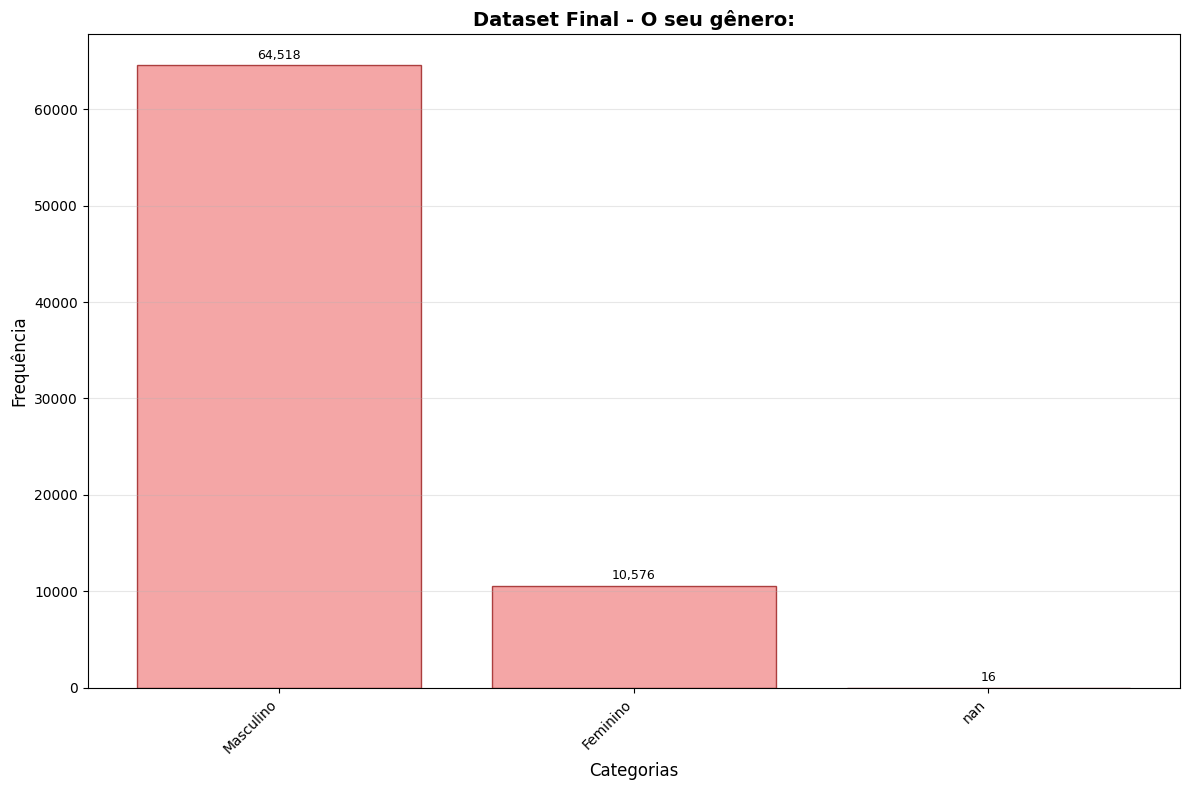

Análise da coluna 'O seu gênero:' concluída.

COLUNA: Qual a sua idade?
Valores únicos: 6
Total de registros: 75,110
Valores nulos: 16 (0.0%)
Valores válidos: 75,094 (100.0%)

DISTRIBUIÇÃO DE VALORES:
--------------------------------------------------------------------------------
#   VALOR                                    COUNT      %       
--------------------------------------------------------------------------------
1   25 - 34 anos                             27,518     36.6    %
2   35 - 44 anos                             20,880     27.8    %
3   18 - 24 anos                             12,878     17.1    %
4   Menos de 18 anos                         6,124      8.2     %
5   45 - 54 anos                             6,042      8.0     %
6   Mais de 55 anos                          1,652      2.2     %
7   NaN                                      16         0.0     %

ESTATÍSTICAS RESUMO:
----------------------------------------
Categoria mais comum: '25 - 34 anos' (27,518 re

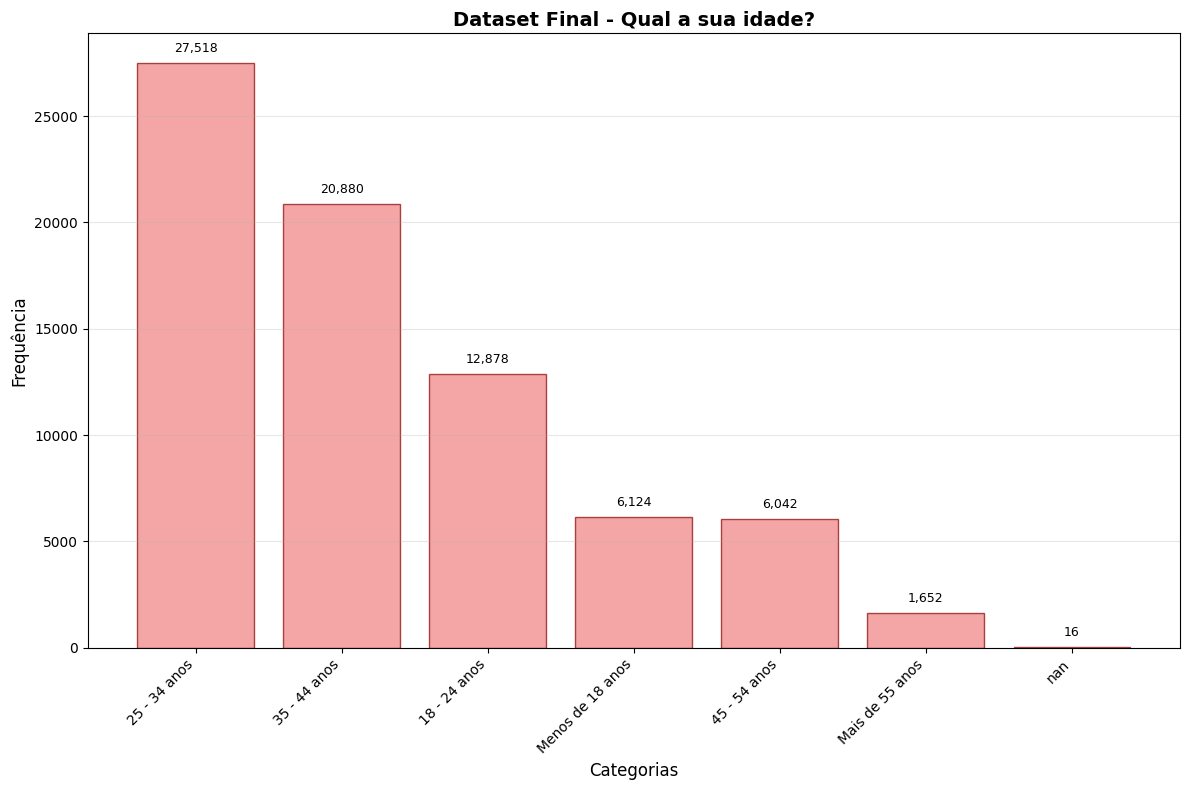

Análise da coluna 'Qual a sua idade?' concluída.

COLUNA: O que você faz atualmente?
Valores únicos: 9
Total de registros: 75,110
Valores nulos: 16 (0.0%)
Valores válidos: 75,094 (100.0%)

DISTRIBUIÇÃO DE VALORES:
--------------------------------------------------------------------------------
#   VALOR                                    COUNT      %       
--------------------------------------------------------------------------------
1   Sou CLT/Funcionário Público              21,404     28.5    %
2   Sou autônomo                             17,466     23.3    %
3   Trabalho em outra área e quero faz...    14,821     19.7    %
4   Sou apenas estudante                     9,948      13.2    %
5   Não trabalho e nem estudo                7,944      10.6    %
6   Estou no ensino médio ou acabei de...    1,316      1.8     %
7   Estudo T.I. na faculdade mas quero...    1,160      1.5     %
8   Sou aposentado                           677        0.9     %
9   Faço outro curso na faculda

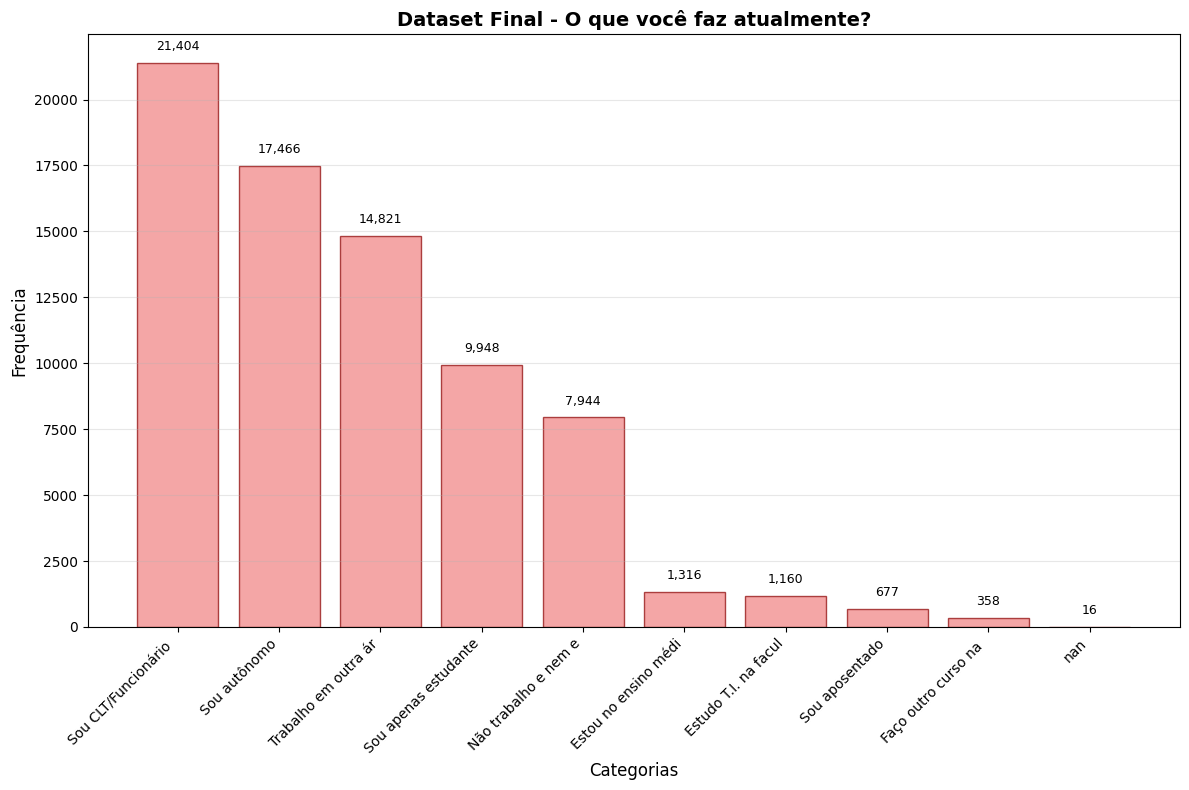

Análise da coluna 'O que você faz atualmente?' concluída.

COLUNA: Atualmente, qual a sua faixa salarial?
Valores únicos: 5
Total de registros: 75,110
Valores nulos: 16 (0.0%)
Valores válidos: 75,094 (100.0%)

DISTRIBUIÇÃO DE VALORES:
--------------------------------------------------------------------------------
#   VALOR                                    COUNT      %       
--------------------------------------------------------------------------------
1   Entre R$1.000 a R$2.000 reais ao mês     25,510     34.0    %
2   Não tenho renda                          19,547     26.0    %
3   Entre R$2.001 a R$3.000 reais ao mês     16,192     21.6    %
4   Entre R$3.001 a R$5.000 reais ao mês     9,833      13.1    %
5   Mais de R$5.001 reais ao mês             4,012      5.3     %
6   NaN                                      16         0.0     %

ESTATÍSTICAS RESUMO:
----------------------------------------
Categoria mais comum: 'Entre R$1.000 a R$2.000 reais ao mês' (25,510 registros)

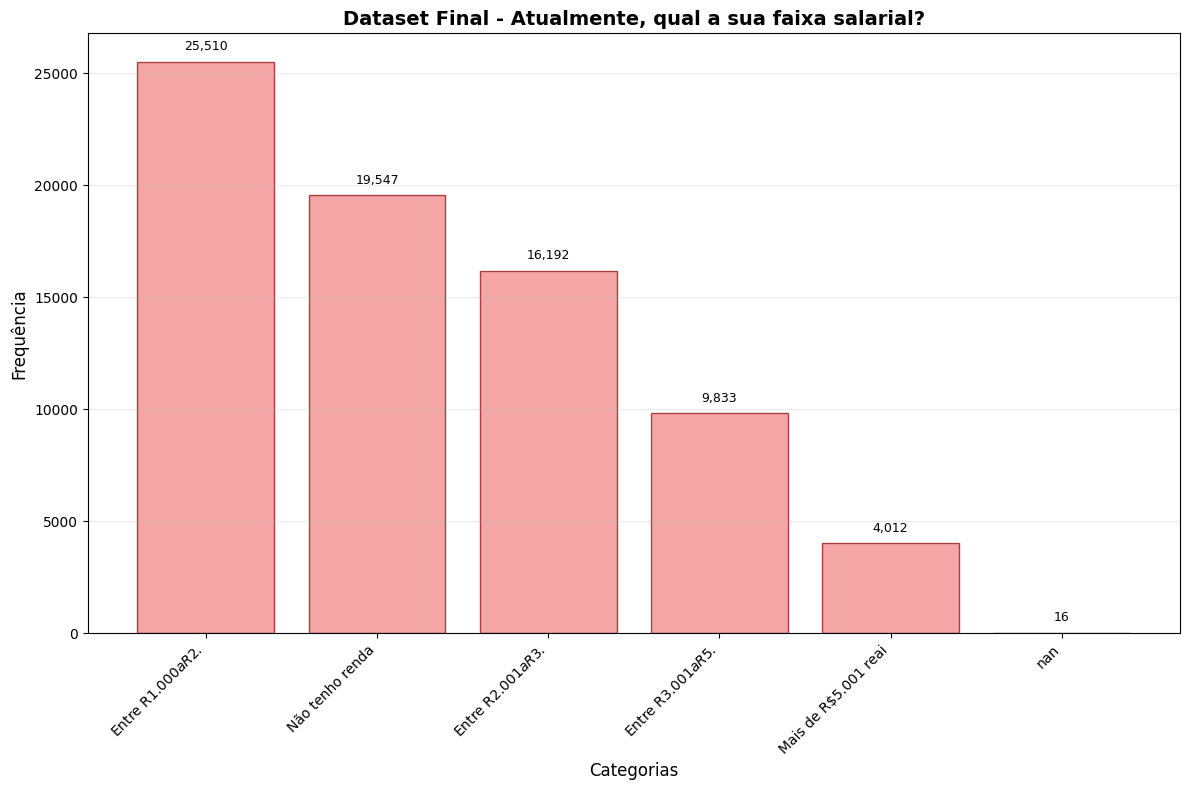

Análise da coluna 'Atualmente, qual a sua faixa salarial?' concluída.

COLUNA: Você possui cartão de crédito?
Valores únicos: 2
Total de registros: 75,110
Valores nulos: 6,873 (9.2%)
Valores válidos: 68,237 (90.8%)

DISTRIBUIÇÃO DE VALORES:
--------------------------------------------------------------------------------
#   VALOR                                    COUNT      %       
--------------------------------------------------------------------------------
1   Não                                      44,240     58.9    %
2   Sim                                      23,997     31.9    %
3   NaN                                      6,873      9.2     %

ESTATÍSTICAS RESUMO:
----------------------------------------
Categoria mais comum: 'Não' (44,240 registros)
Categoria menos comum: 'nan' (6,873 registros)

Gerando gráfico...


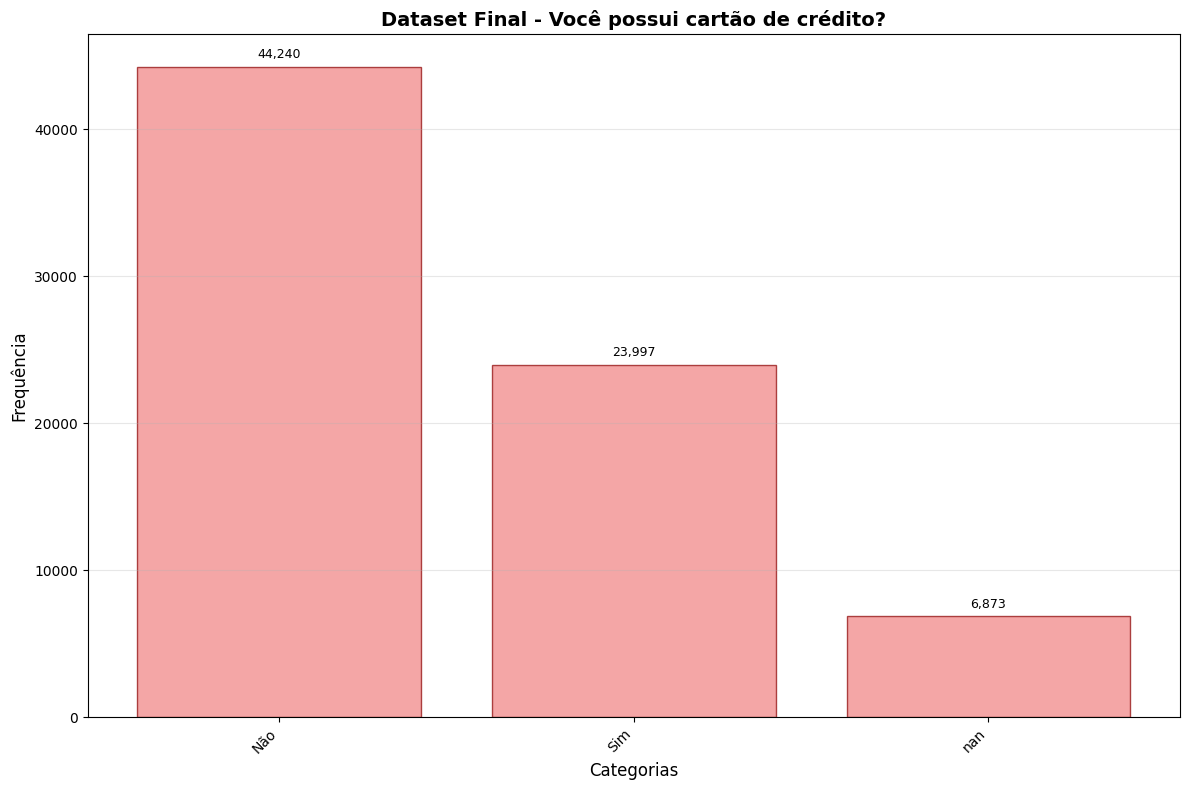

Análise da coluna 'Você possui cartão de crédito?' concluída.

COLUNA: Já estudou programação?
Valores únicos: 2
Total de registros: 75,110
Valores nulos: 26,970 (35.9%)
Valores válidos: 48,140 (64.1%)

DISTRIBUIÇÃO DE VALORES:
--------------------------------------------------------------------------------
#   VALOR                                    COUNT      %       
--------------------------------------------------------------------------------
1   Não                                      32,952     43.9    %
2   NaN                                      26,970     35.9    %
3   Sim                                      15,188     20.2    %

ESTATÍSTICAS RESUMO:
----------------------------------------
Categoria mais comum: 'Não' (32,952 registros)
Categoria menos comum: 'Sim' (15,188 registros)

Gerando gráfico...


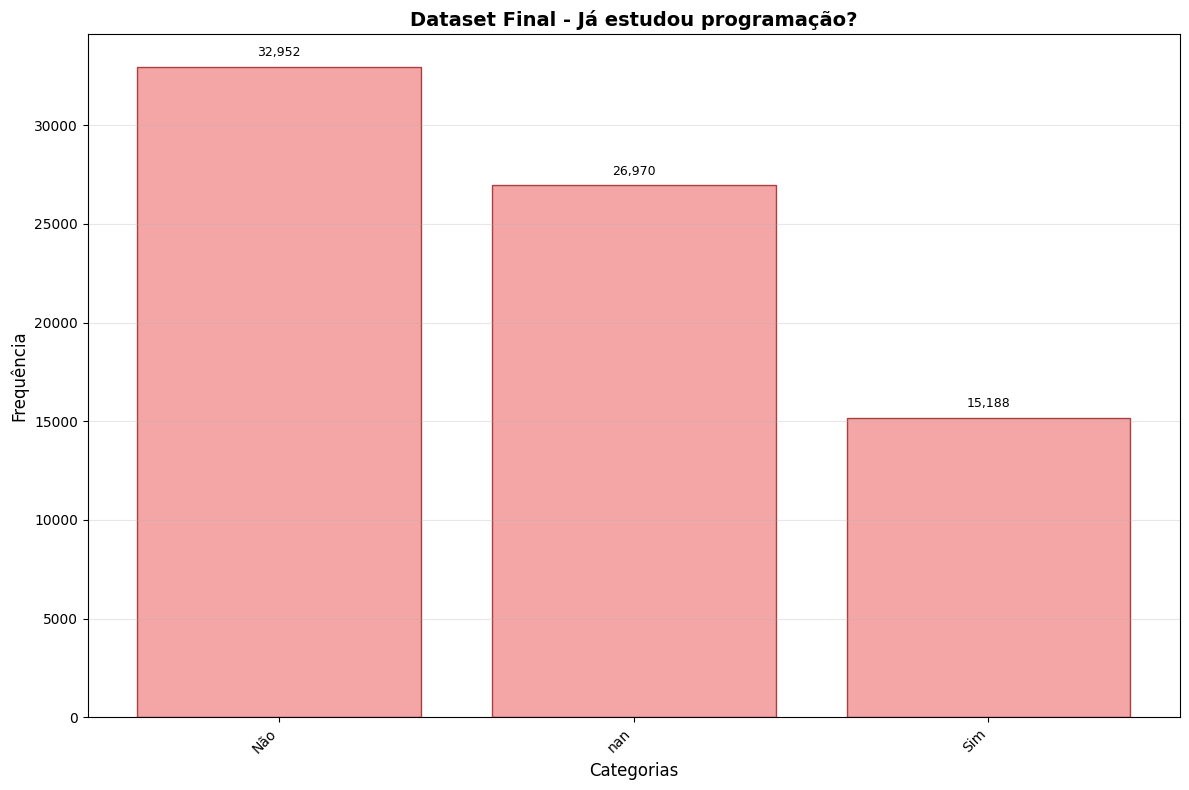

Análise da coluna 'Já estudou programação?' concluída.

COLUNA: Você já fez/faz/pretende fazer faculdade?
Valores únicos: 2
Total de registros: 75,110
Valores nulos: 26,970 (35.9%)
Valores válidos: 48,140 (64.1%)

DISTRIBUIÇÃO DE VALORES:
--------------------------------------------------------------------------------
#   VALOR                                    COUNT      %       
--------------------------------------------------------------------------------
1   Sim                                      35,175     46.8    %
2   NaN                                      26,970     35.9    %
3   Não                                      12,965     17.3    %

ESTATÍSTICAS RESUMO:
----------------------------------------
Categoria mais comum: 'Sim' (35,175 registros)
Categoria menos comum: 'Não' (12,965 registros)

Gerando gráfico...


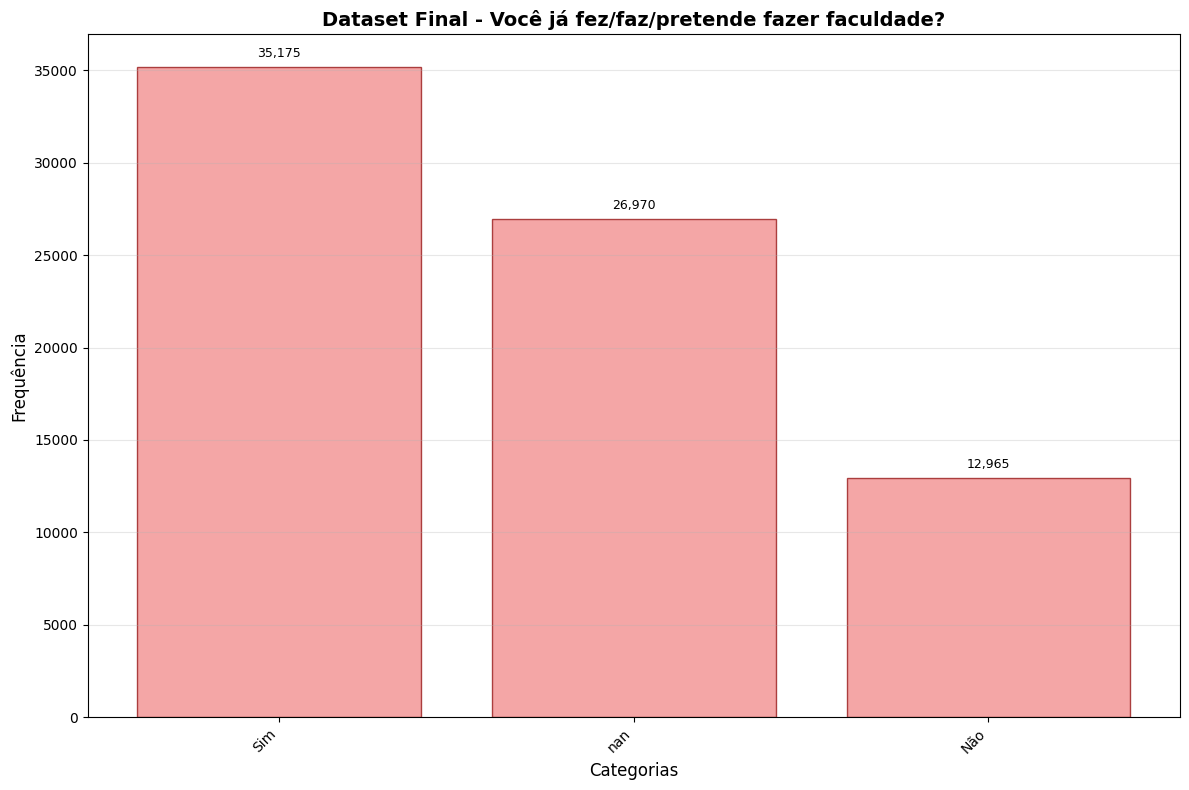

Análise da coluna 'Você já fez/faz/pretende fazer faculdade?' concluída.

COLUNA: O que mais você quer ver no evento?
Valores únicos: 5
Total de registros: 75,110
Valores nulos: 6,873 (9.2%)
Valores válidos: 68,237 (90.8%)

DISTRIBUIÇÃO DE VALORES:
--------------------------------------------------------------------------------
#   VALOR                                    COUNT      %       
--------------------------------------------------------------------------------
1   Fazer transição de carreira e cons...    26,623     35.4    %
2   Fazer um projeto na prática              14,972     19.9    %
3   Quero saber se é para mim                14,053     18.7    %
4   Fazer freelancer como programador        7,784      10.4    %
5   NaN                                      6,873      9.2     %
6   A aula com a recrutadora                 4,805      6.4     %

ESTATÍSTICAS RESUMO:
----------------------------------------
Categoria mais comum: 'Fazer transição de carreira e conseguir me

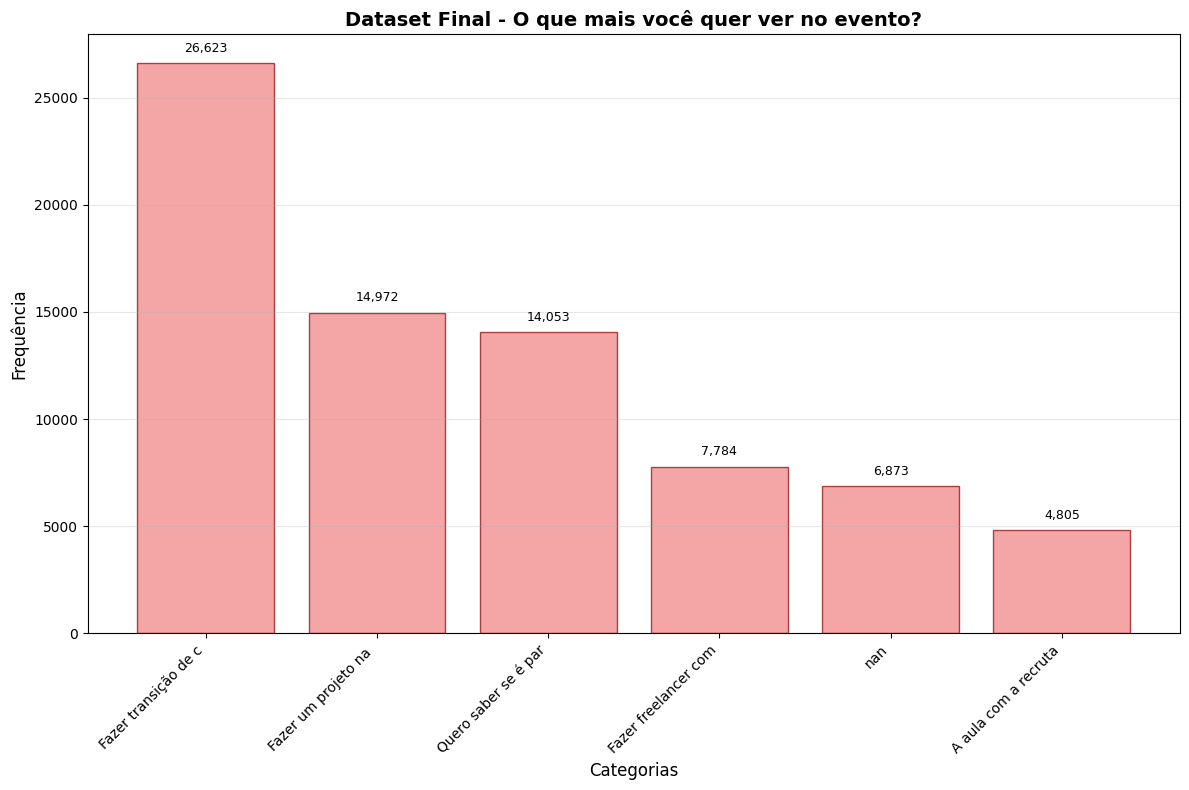

Análise da coluna 'O que mais você quer ver no evento?' concluída.

COLUNA: Source
Valores únicos: 3
Total de registros: 75,110
Valores nulos: 1,299 (1.7%)
Valores válidos: 73,811 (98.3%)

DISTRIBUIÇÃO DE VALORES:
--------------------------------------------------------------------------------
#   VALOR                                    COUNT      %       
--------------------------------------------------------------------------------
1   facebook-ads                             67,311     89.6    %
2   google-ads                               6,242      8.3     %
3   NaN                                      1,299      1.7     %
4   outros                                   258        0.3     %

ESTATÍSTICAS RESUMO:
----------------------------------------
Categoria mais comum: 'facebook-ads' (67,311 registros)
Categoria menos comum: 'outros' (258 registros)
Categorias raras (< 1%): 1
Total de registros em categorias raras: 258 (0.3%)

Gerando gráfico...


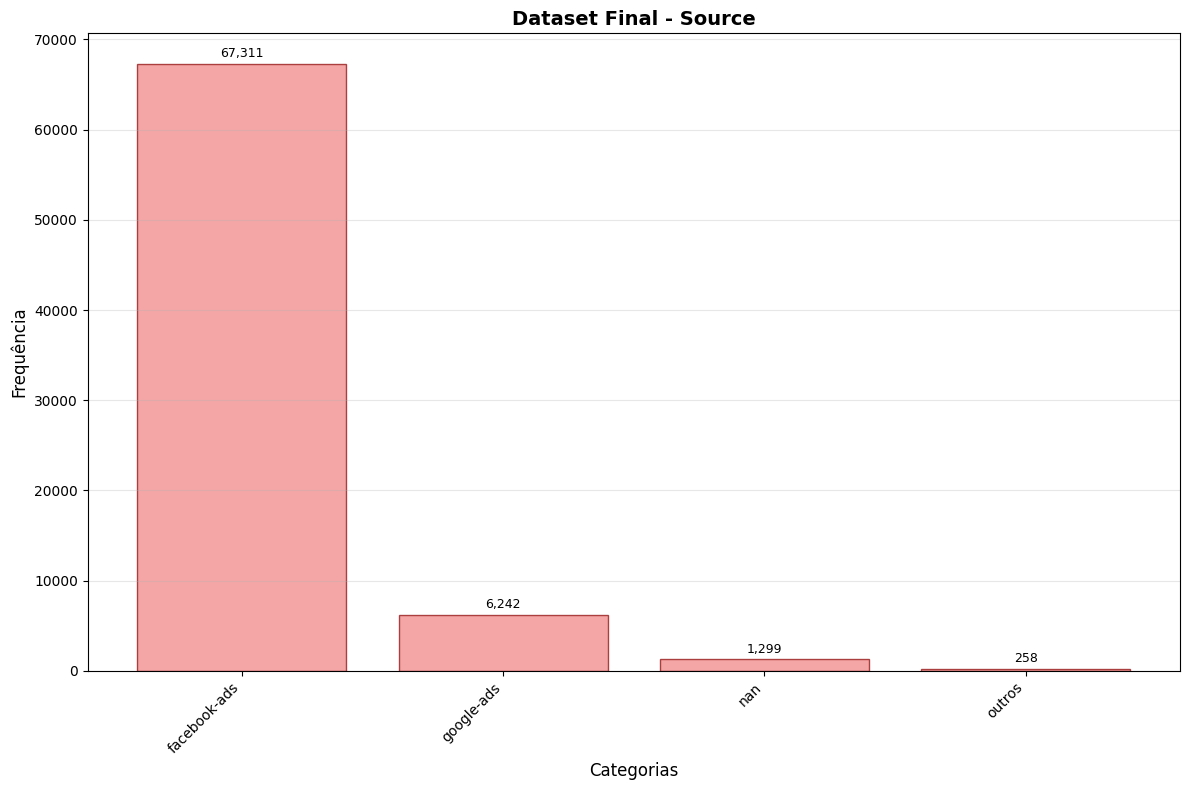

Análise da coluna 'Source' concluída.

COLUNA: Medium
Valores únicos: 15
Total de registros: 75,110
Valores nulos: 1,299 (1.7%)
Valores válidos: 73,811 (98.3%)

DISTRIBUIÇÃO DE VALORES:
--------------------------------------------------------------------------------
#   VALOR                                    COUNT      %       
--------------------------------------------------------------------------------
1   Lookalike 2% Cadastrados - DEV 2.0...    18,577     24.7    %
2   Linguagem de programação                 12,489     16.6    %
3   Aberto                                   11,888     15.8    %
4   Lookalike 2% Alunos + Interesse Li...    6,763      9.0     %
5   dgen                                     6,129      8.2     %
6   Lookalike Envolvimento + Salvou          4,221      5.6     %
7   Lookalike 1% Cadastrados - DEV 2.0...    3,149      4.2     %
8   Lookalike 2% Alunos + Interesse Ci...    2,036      2.7     %
9   Interesse Python (linguagem de pro...    1,787      2.4

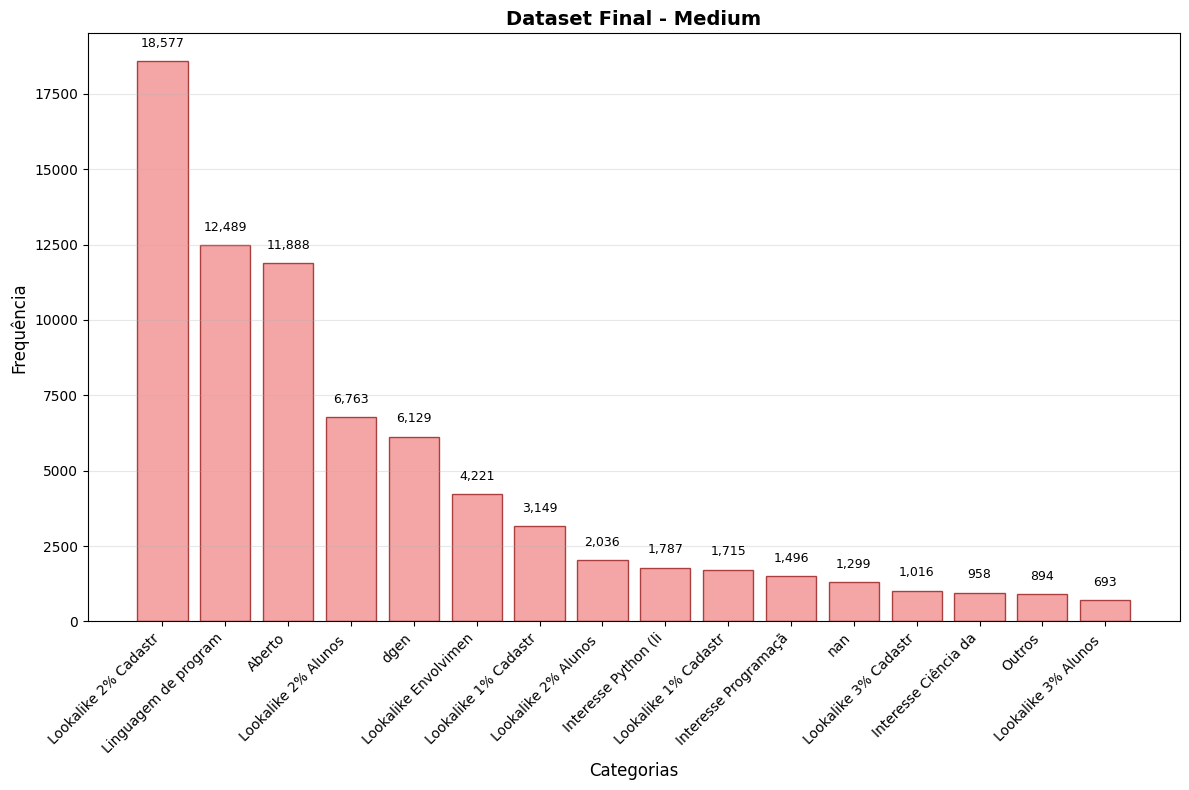

Análise da coluna 'Medium' concluída.

COLUNA: Term
Valores únicos: 3
Total de registros: 75,110
Valores nulos: 1,301 (1.7%)
Valores válidos: 73,809 (98.3%)

DISTRIBUIÇÃO DE VALORES:
--------------------------------------------------------------------------------
#   VALOR                                    COUNT      %       
--------------------------------------------------------------------------------
1   instagram                                51,578     68.7    %
2   facebook                                 15,424     20.5    %
3   outros                                   6,807      9.1     %
4   NaN                                      1,301      1.7     %

ESTATÍSTICAS RESUMO:
----------------------------------------
Categoria mais comum: 'instagram' (51,578 registros)
Categoria menos comum: 'nan' (1,301 registros)

Gerando gráfico...


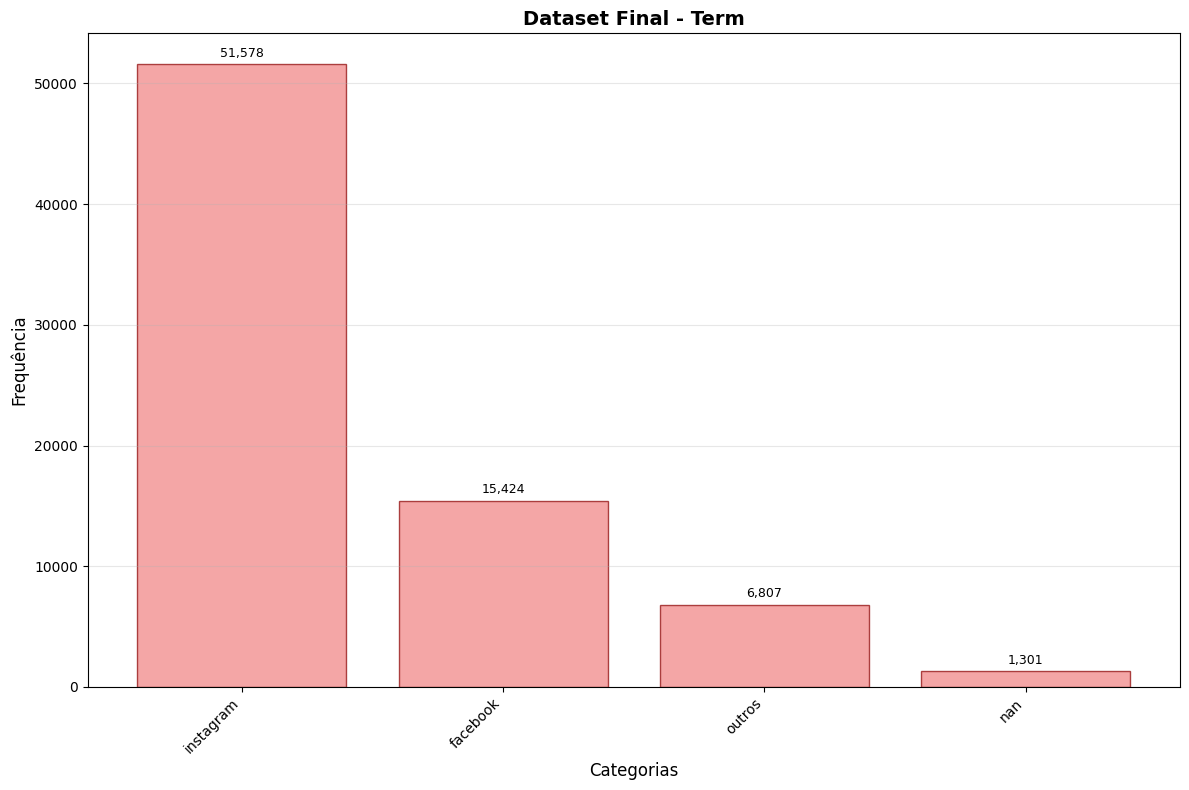

Análise da coluna 'Term' concluída.

COLUNA: Tem computador/notebook?
Valores únicos: 2
Total de registros: 75,110
Valores nulos: 26,892 (35.8%)
Valores válidos: 48,218 (64.2%)

DISTRIBUIÇÃO DE VALORES:
--------------------------------------------------------------------------------
#   VALOR                                    COUNT      %       
--------------------------------------------------------------------------------
1   Sim                                      39,495     52.6    %
2   NaN                                      26,892     35.8    %
3   Não                                      8,723      11.6    %

ESTATÍSTICAS RESUMO:
----------------------------------------
Categoria mais comum: 'Sim' (39,495 registros)
Categoria menos comum: 'Não' (8,723 registros)

Gerando gráfico...


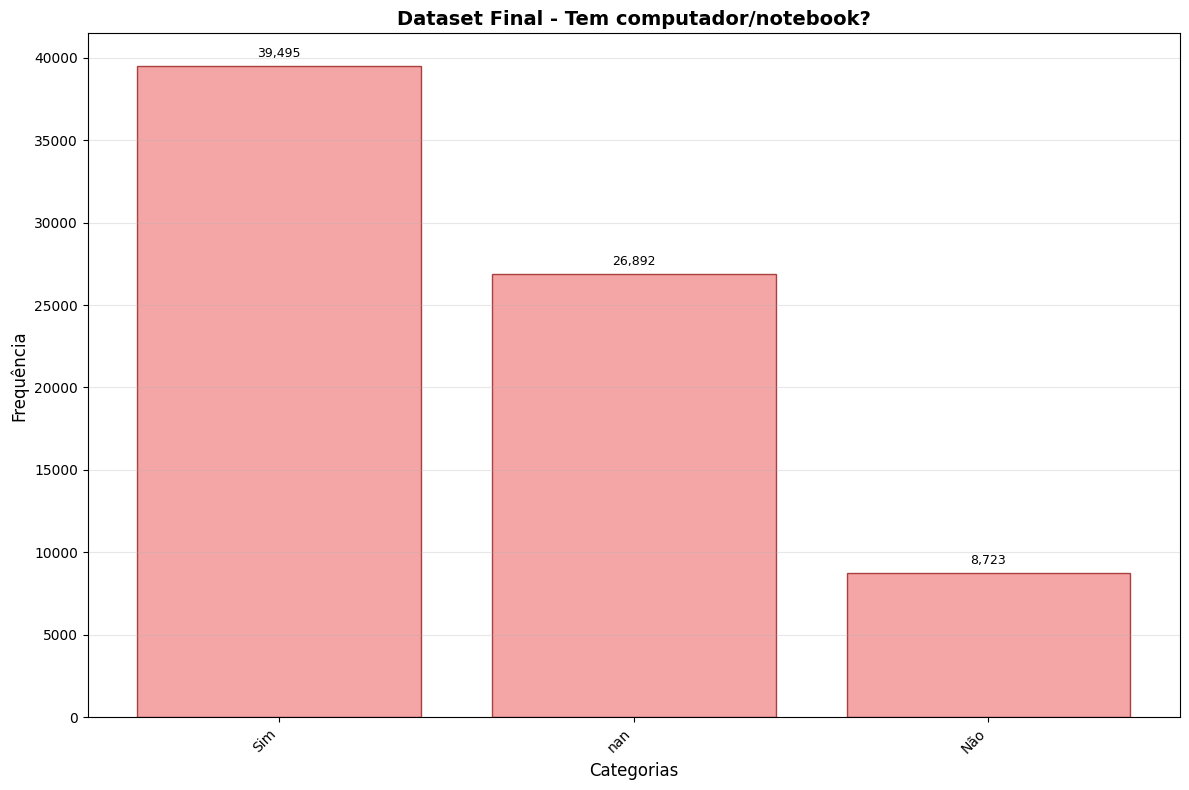

Análise da coluna 'Tem computador/notebook?' concluída.

COLUNA: Qual o seu nível em programação?
Valores únicos: 5
Total de registros: 75,110
Valores nulos: 48,156 (64.1%)
Valores válidos: 26,954 (35.9%)

DISTRIBUIÇÃO DE VALORES:
--------------------------------------------------------------------------------
#   VALOR                                    COUNT      %       
--------------------------------------------------------------------------------
1   NaN                                      48,156     64.1    %
2   Nunca estudei programação.               16,339     21.8    %
3   Já ouvi falar, mas nunca pratiquei.      6,204      8.3     %
4   Até fiz alguns cursos, mas ainda m...    3,613      4.8     %
5   Já estudo programação e busco uma ...    716        1.0     %
6   Já trabalho na área de programação.      82         0.1     %

ESTATÍSTICAS RESUMO:
----------------------------------------
Categoria mais comum: 'nan' (48,156 registros)
Categoria menos comum: 'Já trabalho 

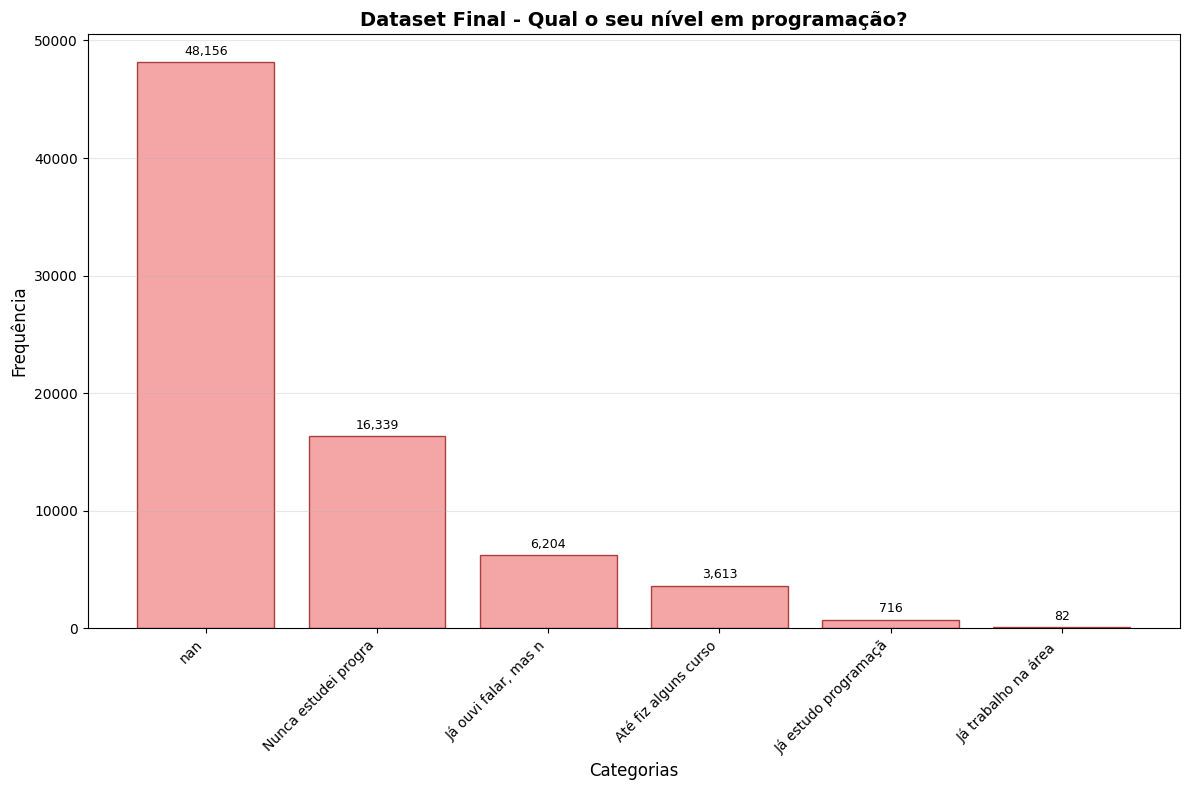

Análise da coluna 'Qual o seu nível em programação?' concluída.

COLUNA: investiu_curso_online
Valores únicos: 2
Total de registros: 75,110
Valores nulos: 16 (0.0%)
Valores válidos: 75,094 (100.0%)

DISTRIBUIÇÃO DE VALORES:
--------------------------------------------------------------------------------
#   VALOR                                    COUNT      %       
--------------------------------------------------------------------------------
1   Não                                      49,389     65.8    %
2   Sim                                      25,705     34.2    %
3   NaN                                      16         0.0     %

ESTATÍSTICAS RESUMO:
----------------------------------------
Categoria mais comum: 'Não' (49,389 registros)
Categoria menos comum: 'None' (16 registros)
Categorias raras (< 1%): 1
Total de registros em categorias raras: 16 (0.0%)

Gerando gráfico...


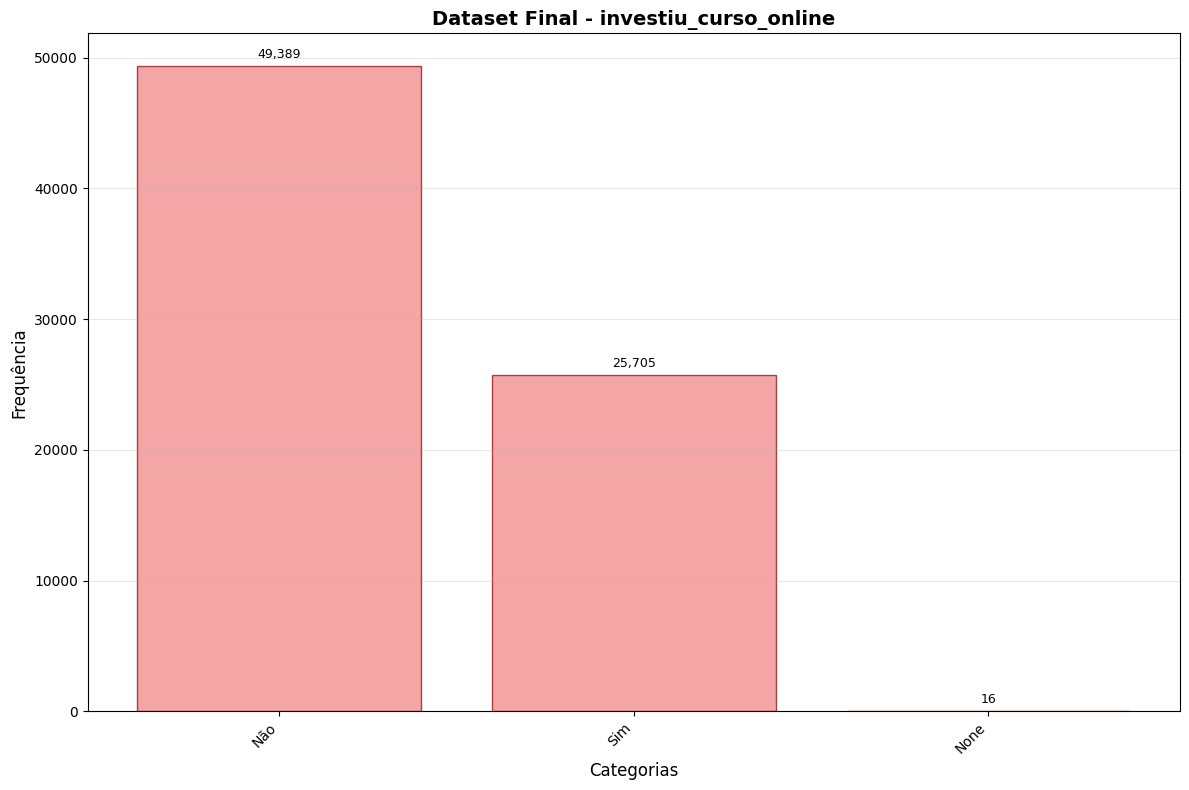

Análise da coluna 'investiu_curso_online' concluída.

COLUNA: interesse_programacao
Valores únicos: 5
Total de registros: 75,110
Valores nulos: 16 (0.0%)
Valores válidos: 75,094 (100.0%)

DISTRIBUIÇÃO DE VALORES:
--------------------------------------------------------------------------------
#   VALOR                                    COUNT      %       
--------------------------------------------------------------------------------
1   Todas as alternativas                    30,172     40.2    %
2   Poder trabalhar de qualquer lugar ...    26,964     35.9    %
3   A possibilidade de ganhar altos sa...    7,038      9.4     %
4   Trabalhar para outros países e gan...    5,571      7.4     %
5   A ideia de nunca faltar emprego na...    5,349      7.1     %
6   NaN                                      16         0.0     %

ESTATÍSTICAS RESUMO:
----------------------------------------
Categoria mais comum: 'Todas as alternativas' (30,172 registros)
Categoria menos comum: 'None' (16 re

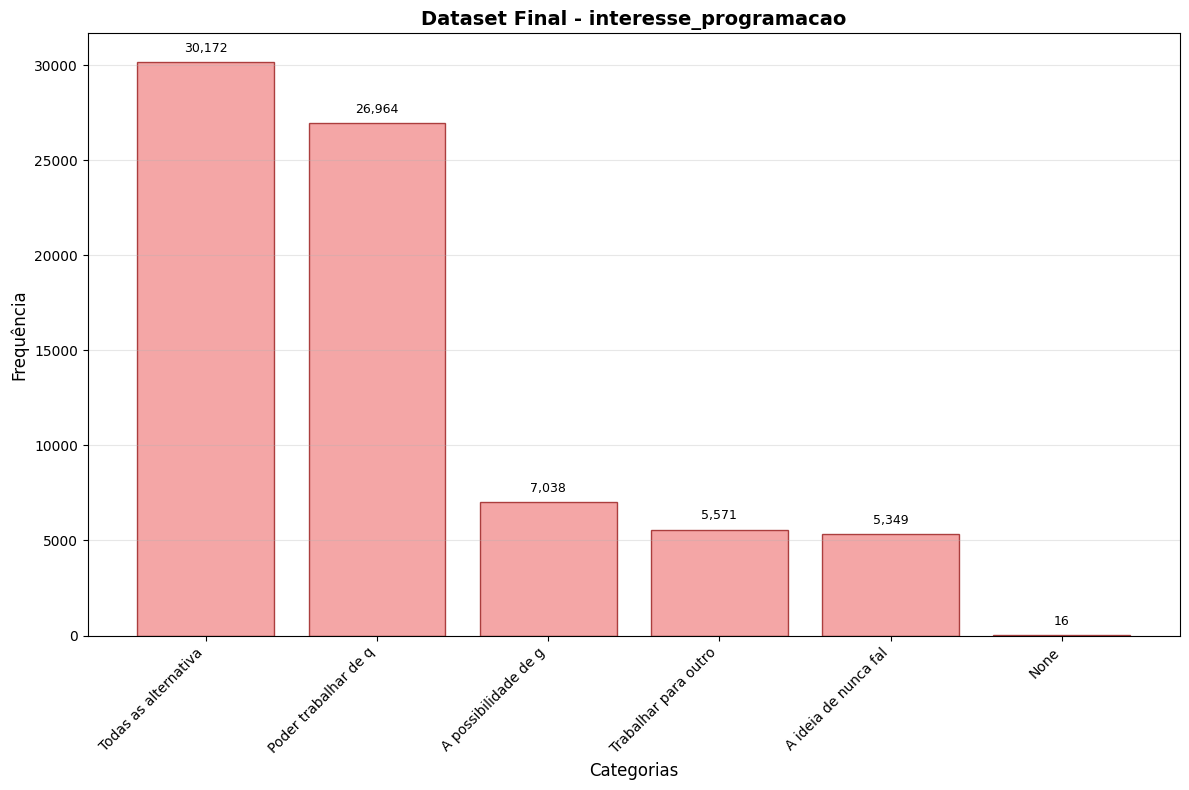

Análise da coluna 'interesse_programacao' concluída.

ANÁLISE COMPLETA DO DATASET 'Dataset Final' FINALIZADA


In [ ]:
# ANÁLISE DE VARIÁVEIS CATEGÓRICAS - DATASET FINAL
print("ANÁLISE DE VARIÁVEIS CATEGÓRICAS - DATASET FINAL")
print("=" * 50)

import matplotlib.pyplot as plt
import pandas as pd

def analisar_categoricas_final():
    """Analisa variáveis categóricas do dataset final unificado"""

    # Dataset final após todas as unificações
    datasets = {
        'Dataset Final': pesquisa_medium_actions_unificado
    }

    # Colunas a excluir da análise
    excluir = ['nome', 'telefone', 'email', 'e-mail', 'data', 'aba_origem', 'arquivo_origem']

    for dataset_nome, df in datasets.items():
        print(f"\nDATASET: {dataset_nome}")
        print("=" * 60)
        print(f"Total de registros: {len(df):,}")
        print(f"Total de colunas: {len(df.columns)}")

        # Identificar colunas categóricas
        colunas_categoricas = []

        for col in df.columns:
            # Excluir identificadores, datas e metadados
            if not any(termo in col.lower() for termo in excluir):
                # Incluir se for object/string ou se tiver poucos valores únicos
                if df[col].dtype == 'object' or df[col].nunique() <= 50:
                    colunas_categoricas.append(col)

        print(f"Colunas categóricas encontradas: {len(colunas_categoricas)}")
        print(f"Colunas analisadas: {colunas_categoricas}")

        for coluna in colunas_categoricas:
            print(f"\n" + "="*80)
            print(f"COLUNA: {coluna}")
            print("="*80)

            # 1. Informações básicas
            valores_unicos = df[coluna].nunique()
            total_registros = len(df)

            print(f"Valores únicos: {valores_unicos:,}")
            print(f"Total de registros: {total_registros:,}")

            # 2. Análise de valores nulos
            nulos = df[coluna].isnull().sum()
            pct_nulos = (nulos / len(df)) * 100
            print(f"Valores nulos: {nulos:,} ({pct_nulos:.1f}%)")

            # 3. Análise de valores não-nulos
            nao_nulos = df[coluna].notna().sum()
            pct_nao_nulos = (nao_nulos / len(df)) * 100
            print(f"Valores válidos: {nao_nulos:,} ({pct_nao_nulos:.1f}%)")

            # 4. Distribuição de categorias
            distribuicao = df[coluna].value_counts(dropna=False)

            print(f"\nDISTRIBUIÇÃO DE VALORES:")
            print("-" * 80)
            print(f"{'#':<3} {'VALOR':<40} {'COUNT':<10} {'%':<8}")
            print("-" * 80)

            # Mostrar todas se <= 20, senão mostrar top 20
            limite = min(20, len(distribuicao))

            for i, (valor, count) in enumerate(distribuicao.head(limite).items(), 1):
                pct = (count / len(df)) * 100
                valor_str = str(valor) if pd.notna(valor) else 'NaN'

                # Truncar valor se muito longo
                if len(valor_str) > 37:
                    valor_display = valor_str[:34] + '...'
                else:
                    valor_display = valor_str

                print(f"{i:<3} {valor_display:<40} {count:<10,} {pct:<8.1f}%")

            if len(distribuicao) > 20:
                print(f"... e mais {len(distribuicao) - 20} valores")

            # 5. Estatísticas resumo
            print(f"\nESTATÍSTICAS RESUMO:")
            print("-" * 40)
            print(f"Categoria mais comum: '{distribuicao.index[0]}' ({distribuicao.iloc[0]:,} registros)")
            if len(distribuicao) > 1:
                print(f"Categoria menos comum: '{distribuicao.index[-1]}' ({distribuicao.iloc[-1]:,} registros)")

            # Categorias raras (< 1%)
            categorias_raras = distribuicao[distribuicao / len(df) < 0.01]
            if len(categorias_raras) > 0:
                print(f"Categorias raras (< 1%): {len(categorias_raras)}")
                total_raras = categorias_raras.sum()
                pct_raras = (total_raras / len(df)) * 100
                print(f"Total de registros em categorias raras: {total_raras:,} ({pct_raras:.1f}%)")

            # 6. Gráfico
            print(f"\nGerando gráfico...")

            plt.figure(figsize=(12, 8))

            if valores_unicos > 15:
                # Para muitas categorias, mostrar apenas top 15
                top_15 = distribuicao.head(15)
                bars = plt.bar(range(len(top_15)), top_15.values, color='skyblue', edgecolor='navy', alpha=0.7)
                plt.title(f'{dataset_nome} - {coluna} (Top 15 Categorias)', fontsize=14, fontweight='bold')
                plt.xticks(range(len(top_15)), [str(x)[:20] for x in top_15.index], rotation=45, ha='right')

                # Adicionar valores nas barras
                for bar in bars:
                    height = bar.get_height()
                    plt.text(bar.get_x() + bar.get_width()/2., height + len(df)*0.005,
                            f'{int(height):,}', ha='center', va='bottom', fontsize=9)
            else:
                # Para poucas categorias, mostrar todas
                bars = plt.bar(range(len(distribuicao)), distribuicao.values, color='lightcoral', edgecolor='darkred', alpha=0.7)
                plt.title(f'{dataset_nome} - {coluna}', fontsize=14, fontweight='bold')
                plt.xticks(range(len(distribuicao)), [str(x)[:20] for x in distribuicao.index], rotation=45, ha='right')

                # Adicionar valores nas barras
                for bar in bars:
                    height = bar.get_height()
                    plt.text(bar.get_x() + bar.get_width()/2., height + len(df)*0.005,
                            f'{int(height):,}', ha='center', va='bottom', fontsize=9)

            plt.xlabel('Categorias', fontsize=12)
            plt.ylabel('Frequência', fontsize=12)
            plt.grid(axis='y', alpha=0.3)
            plt.tight_layout()
            plt.show()

            print(f"Análise da coluna '{coluna}' concluída.")

        print(f"\n" + "="*80)
        print(f"ANÁLISE COMPLETA DO DATASET '{dataset_nome}' FINALIZADA")
        print("="*80)

# Executar análise
analisar_categoricas_final()

## 13- Criação dos dois datasets de pesquisa
1. Versão apenas com as features atuais, representando menor valor de missing
2. Versão com as features de maior missing removidas, para teste

In [11]:
# CRIAÇÃO DE VERSÕES DO DATASET POR MISSING RATE
print("CRIAÇÃO DE VERSÕES DO DATASET POR MISSING RATE")
print("=" * 50)

import pandas as pd

def criar_versoes_dataset():
    """Cria duas versões do dataset baseadas na taxa de missing"""

    df = pesquisa_medium_actions_unificado.copy()

    print(f"Dataset original: {len(df)} registros, {len(df.columns)} colunas")

    # Converter coluna de data para datetime se não estiver
    if 'Data' in df.columns:
        df['Data'] = pd.to_datetime(df['Data'], errors='coerce')

    # Definir cutoff de data (quando as features críticas começaram a ser preenchidas)
    cutoff_date = pd.to_datetime('2025-03-01')

    # VERSÃO 1: Dataset pós-cutoff (período com menor missing das features críticas)
    versao_1 = df[df['Data'] >= cutoff_date].copy()

    # Remover manualmente a coluna "Qual o seu nível em programação?" da versão 1
    coluna_remover_v1 = 'Qual o seu nível em programação?'
    if coluna_remover_v1 in versao_1.columns:
        versao_1 = versao_1.drop(columns=[coluna_remover_v1])
        print(f"Coluna removida da Versão 1: '{coluna_remover_v1}'")

    print(f"Registros pós {cutoff_date.strftime('%Y-%m-%d')}: {len(versao_1)}")

    # Definir features com missing crítico para remoção APENAS da versão 2
    features_missing_critico = [
        'Já estudou programação?',
        'Você já fez/faz/pretende fazer',
        'Você já fez/faz/pretende fazer faculdade?',
        'Tem computador/notebook?',
        'Qual o seu nível em programação?'
    ]

    # Verificar quais features existem no dataset
    features_existentes = [col for col in features_missing_critico if col in df.columns]
    features_nao_existentes = [col for col in features_missing_critico if col not in df.columns]

    print(f"\nFeatures de missing crítico encontradas: {len(features_existentes)}")
    for feature in features_existentes:
        print(f"  ✓ {feature}")

    if features_nao_existentes:
        print(f"\nFeatures de missing crítico NÃO encontradas: {len(features_nao_existentes)}")
        for feature in features_nao_existentes:
            print(f"  ✗ {feature}")

    print(f"\n" + "="*60)
    print("VERSÃO 1: MENOR MISSING RATE (pós 2025-03-01)")
    print("="*60)
    print(f"Registros: {len(versao_1):,}")
    print(f"Features críticas MANTIDAS (período com menor missing)")

    # Análise de missing rate na versão 1
    missing_stats_v1 = {}
    for col in versao_1.columns:
        if col != 'Data':
            missing_count = versao_1[col].isnull().sum()
            missing_rate = (missing_count / len(versao_1)) * 100
            missing_stats_v1[col] = {
                'missing_count': missing_count,
                'missing_rate': missing_rate,
                'valid_count': len(versao_1) - missing_count
            }

    # Ordenar por taxa de missing
    missing_sorted_v1 = sorted(missing_stats_v1.items(), key=lambda x: x[1]['missing_rate'])

    print(f"\nTaxa de missing por coluna (ordenado):")
    print(f"{'COLUNA':<45} {'VÁLIDOS':<8} {'MISSING':<8} {'% MISS':<7}")
    print("-" * 70)

    for col, stats in missing_sorted_v1:
        print(f"{col[:42]:<45} {stats['valid_count']:<8,} {stats['missing_count']:<8,} {stats['missing_rate']:<7.1f}%")

    # VERSÃO 2: Dataset completo SEM features de missing crítico
    colunas_manter_v2 = [col for col in df.columns if col not in features_existentes]
    versao_2 = df[colunas_manter_v2].copy()

    print(f"\n" + "="*60)
    print("VERSÃO 2: SEM FEATURES DE MISSING CRÍTICO")
    print("="*60)
    print(f"Registros: {len(versao_2):,}")
    print(f"Colunas removidas: {len(features_existentes)}")
    for feature in features_existentes:
        print(f"  - {feature}")

    # Análise de missing rate na versão 2
    missing_stats_v2 = {}
    for col in versao_2.columns:
        if col != 'Data':
            missing_count = versao_2[col].isnull().sum()
            missing_rate = (missing_count / len(versao_2)) * 100
            missing_stats_v2[col] = {
                'missing_count': missing_count,
                'missing_rate': missing_rate,
                'valid_count': len(versao_2) - missing_count
            }

    # Ordenar por taxa de missing
    missing_sorted_v2 = sorted(missing_stats_v2.items(), key=lambda x: x[1]['missing_rate'])

    print(f"\nTaxa de missing por coluna (ordenado):")
    print(f"{'COLUNA':<45} {'VÁLIDOS':<8} {'MISSING':<8} {'% MISS':<7}")
    print("-" * 70)

    for col, stats in missing_sorted_v2:
        print(f"{col[:42]:<45} {stats['valid_count']:<8,} {stats['missing_count']:<8,} {stats['missing_rate']:<7.1f}%")

    # Comparação entre versões
    print(f"\n" + "="*60)
    print("COMPARAÇÃO ENTRE VERSÕES")
    print("="*60)

    # Missing rate médio
    avg_missing_v1 = sum(stats['missing_rate'] for stats in missing_stats_v1.values()) / len(missing_stats_v1) if missing_stats_v1 else 0
    avg_missing_v2 = sum(stats['missing_rate'] for stats in missing_stats_v2.values()) / len(missing_stats_v2) if missing_stats_v2 else 0

    print(f"Versão 1 (pós-cutoff com features críticas):")
    print(f"  Registros: {len(versao_1):,}")
    print(f"  Colunas: {len(versao_1.columns)}")
    print(f"  Missing rate médio: {avg_missing_v1:.1f}%")

    print(f"\nVersão 2 (todos registros sem features críticas):")
    print(f"  Registros: {len(versao_2):,}")
    print(f"  Colunas: {len(versao_2.columns)}")
    print(f"  Missing rate médio: {avg_missing_v2:.1f}%")

    # Análise específica das features críticas na versão 1
    if features_existentes:
        print(f"\nAnálise das features críticas na Versão 1:")
        for feature in features_existentes:
            if feature in versao_1.columns:
                missing_count = versao_1[feature].isnull().sum()
                missing_rate = (missing_count / len(versao_1)) * 100
                print(f"  {feature}: {missing_rate:.1f}% missing")

    return versao_1, versao_2

def salvar_versoes(versao_1, versao_2):
    """Salva as duas versões do dataset"""

    print(f"\n" + "="*60)
    print("DISPONIBILIZAÇÃO DAS VERSÕES")
    print("="*60)

    # Disponibilizar as versões como variáveis globais
    globals()['pesquisa_v1_menor_missing'] = versao_1
    globals()['pesquisa_v2_sem_features_criticas'] = versao_2

    print(f"Versão 1 disponível em: pesquisa_v1_menor_missing")
    print(f"  Período: 2025-02-11 em diante")
    print(f"  Todas as features mantidas")
    print(f"  Registros: {len(versao_1):,}")
    print(f"  Colunas: {len(versao_1.columns)}")

    print(f"\nVersão 2 disponível em: pesquisa_v2_sem_features_criticas")
    print(f"  Período: todos os registros")
    print(f"  Features críticas removidas")
    print(f"  Registros: {len(versao_2):,}")
    print(f"  Colunas: {len(versao_2.columns)}")

# Executar criação das versões
print("Iniciando criação das versões...")
versao_1, versao_2 = criar_versoes_dataset()

# Salvar versões
salvar_versoes(versao_1, versao_2)

print(f"\nProcesso concluído!")
print(f"Duas versões do dataset criadas com sucesso.")

CRIAÇÃO DE VERSÕES DO DATASET POR MISSING RATE
Iniciando criação das versões...
Dataset original: 75110 registros, 21 colunas
Coluna removida da Versão 1: 'Qual o seu nível em programação?'
Registros pós 2025-03-01: 48156

Features de missing crítico encontradas: 4
  ✓ Já estudou programação?
  ✓ Você já fez/faz/pretende fazer faculdade?
  ✓ Tem computador/notebook?
  ✓ Qual o seu nível em programação?

Features de missing crítico NÃO encontradas: 1
  ✗ Você já fez/faz/pretende fazer

VERSÃO 1: MENOR MISSING RATE (pós 2025-03-01)
Registros: 48,156
Features críticas MANTIDAS (período com menor missing)

Taxa de missing por coluna (ordenado):
COLUNA                                        VÁLIDOS  MISSING  % MISS 
----------------------------------------------------------------------
arquivo_origem                                48,156   0        0.0    %
aba_origem                                    48,156   0        0.0    %
O seu gênero:                                 48,140   16     

## 14- Investigação
Hipótese: Os 5% de missing da pergunta "Tem computador/notebook?: 4.8% missing" existem porque a feature foi descontinuada.
Resultado: Refutada.

ANÁLISE TEMPORAL: Tem computador/notebook?
✅ Coluna encontrada: 'Tem computador/notebook?'
📊 Dataset: 75,110 registros com data válida
📅 Período: 2024-12-18 a 2025-08-29

📈 ESTATÍSTICAS RESUMO:
Total de semanas analisadas: 31
Semanas com respostas válidas: 24
Semanas SEM respostas válidas: 7

⚠️  PERÍODOS SEM DADOS:
  Semana 2024-12-17/2024-12-23: 90 registros totais, 0 respostas válidas
  Semana 2024-12-24/2024-12-30: 1910 registros totais, 0 respostas válidas
  Semana 2024-12-31/2025-01-06: 4857 registros totais, 0 respostas válidas
  Semana 2025-01-14/2025-01-20: 2326 registros totais, 0 respostas válidas
  Semana 2025-01-21/2025-01-27: 5442 registros totais, 0 respostas válidas
  Semana 2025-01-28/2025-02-03: 5879 registros totais, 0 respostas válidas
  Semana 2025-02-04/2025-02-10: 3933 registros totais, 0 respostas válidas


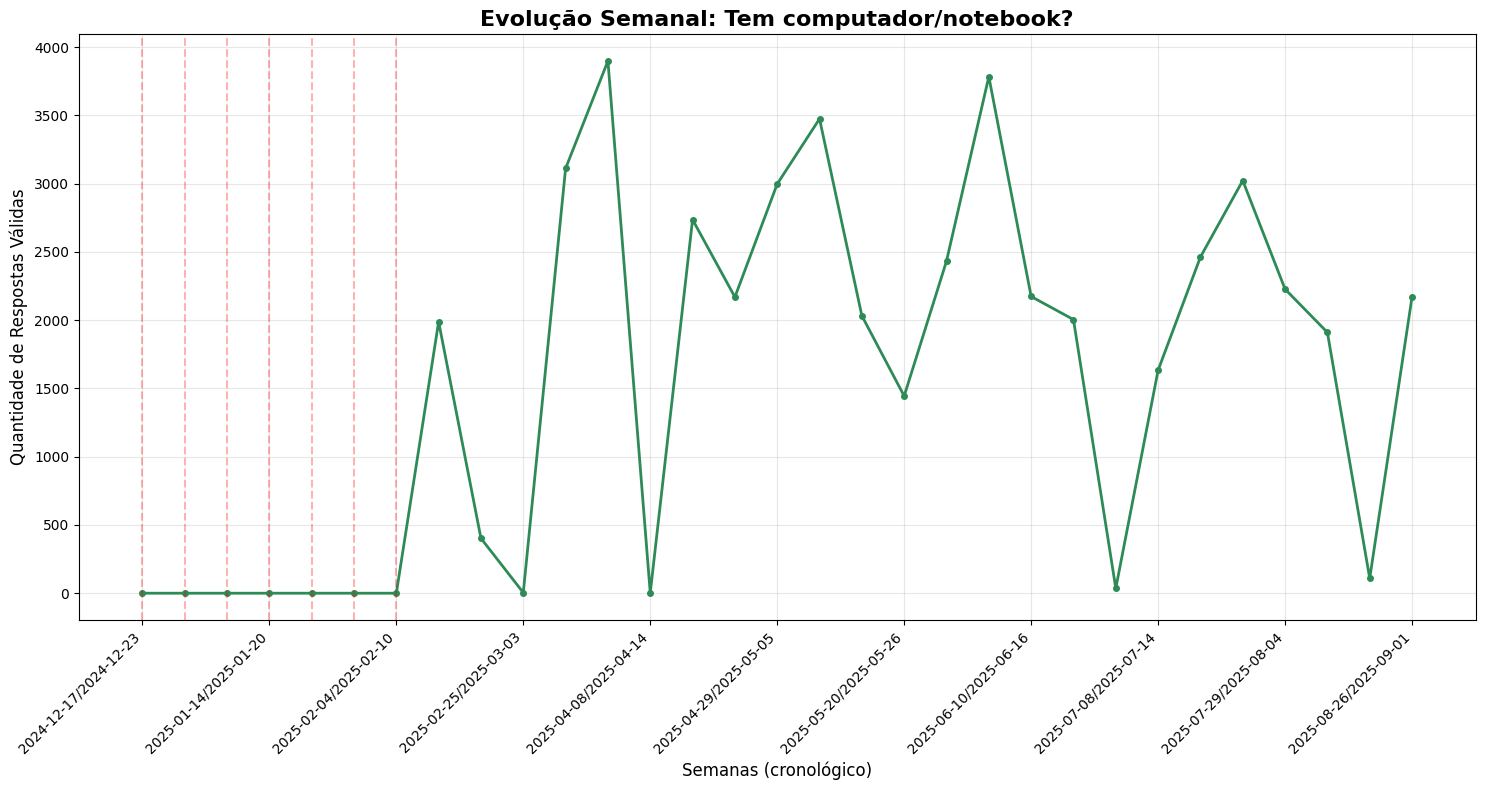


🔍 ANÁLISE DE DESCONTINUIDADE:
📊 ÚLTIMAS 4 SEMANAS ANALISADAS:
  2025-07-29/2025-08-04: 2227/2228 (100.0%) ✅ ATIVA
  2025-08-05/2025-08-11: 1910/1913 (99.8%) ✅ ATIVA
  2025-08-12/2025-08-18: 109/109 (100.0%) ✅ ATIVA
  2025-08-26/2025-09-01: 2170/2174 (99.8%) ✅ ATIVA

📈 ANÁLISE DAS ÚLTIMAS 2 SEMANAS:
Total de registros: 2283
Respostas válidas: 2279
Taxa de resposta: 99.8%

🎯 VEREDICTO SOBRE DESCONTINUAÇÃO:
✅ PERGUNTA PROVAVELMENTE ATIVA
   Evidência: 99.8% de taxa de resposta nas últimas 2 semanas
   Conclusão: O missing de 4.8% é provável de ser por outros motivos

📊 CONTEXTO DO MISSING (pós 2025-03-01):
Total de registros: 48,156
Respostas válidas: 45,828
Missing: 2,328 (4.8%)


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from difflib import get_close_matches

def analisar_computador_temporal():
    """Analisa a quantidade de registros da pergunta sobre computador/notebook semana a semana"""

    # Usar o dataset original completo
    df = pesquisa_medium_actions_unificado.copy()

    print("ANÁLISE TEMPORAL: Tem computador/notebook?")
    print("=" * 50)

    # Busca robusta da coluna
    target_keywords = ['computador', 'notebook', 'tem']
    coluna_encontrada = None

    # Buscar por palavras-chave nas colunas
    for col in df.columns:
        col_lower = col.lower()
        if all(keyword in col_lower for keyword in target_keywords):
            coluna_encontrada = col
            break

    # Se não encontrou, usar busca por similaridade
    if not coluna_encontrada:
        target_phrase = "tem computador/notebook"
        matches = get_close_matches(target_phrase,
                                  [col.lower() for col in df.columns],
                                  n=1, cutoff=0.6)
        if matches:
            # Encontrar a coluna original correspondente
            for col in df.columns:
                if col.lower() == matches[0]:
                    coluna_encontrada = col
                    break

    if not coluna_encontrada:
        print("❌ Coluna sobre computador/notebook não encontrada!")
        return

    print(f"✅ Coluna encontrada: '{coluna_encontrada}'")

    # Converter Data para datetime
    df['Data'] = pd.to_datetime(df['Data'], errors='coerce')

    # Remover registros sem data
    df = df.dropna(subset=['Data'])

    print(f"📊 Dataset: {len(df):,} registros com data válida")
    print(f"📅 Período: {df['Data'].min().strftime('%Y-%m-%d')} a {df['Data'].max().strftime('%Y-%m-%d')}")

    # Criar coluna de semana
    df['Semana'] = df['Data'].dt.to_period('W-MON')  # Semana começando na segunda

    # Agrupar por semana e contar registros válidos (não-nulos) da coluna alvo
    analise_semanal = df.groupby('Semana').agg({
        coluna_encontrada: ['count', lambda x: x.notna().sum()],
        'Data': 'count'
    }).round(0)

    # Simplificar nomes das colunas
    analise_semanal.columns = ['total_respostas', 'respostas_validas', 'total_registros']

    # Resetar index para facilitar visualização
    analise_semanal = analise_semanal.reset_index()
    analise_semanal['Semana_str'] = analise_semanal['Semana'].astype(str)

    # Estatísticas resumo
    print(f"\n📈 ESTATÍSTICAS RESUMO:")
    print(f"Total de semanas analisadas: {len(analise_semanal)}")
    print(f"Semanas com respostas válidas: {(analise_semanal['respostas_validas'] > 0).sum()}")
    print(f"Semanas SEM respostas válidas: {(analise_semanal['respostas_validas'] == 0).sum()}")

    # Identificar períodos de descontinuidade
    semanas_sem_dados = analise_semanal[analise_semanal['respostas_validas'] == 0]
    if len(semanas_sem_dados) > 0:
        print(f"\n⚠️  PERÍODOS SEM DADOS:")
        for _, row in semanas_sem_dados.iterrows():
            print(f"  Semana {row['Semana_str']}: {row['total_registros']:.0f} registros totais, 0 respostas válidas")

    # Criar gráfico
    plt.figure(figsize=(15, 8))

    # Converter semanas para posições numéricas para o gráfico
    x_pos = range(len(analise_semanal))

    plt.plot(x_pos, analise_semanal['respostas_validas'],
             marker='o', linewidth=2, markersize=4, color='#2E8B57')

    plt.title(f'Evolução Semanal: {coluna_encontrada}', fontsize=16, fontweight='bold')
    plt.xlabel('Semanas (cronológico)', fontsize=12)
    plt.ylabel('Quantidade de Respostas Válidas', fontsize=12)

    # Configurar eixo X com algumas datas de referência
    step = max(1, len(analise_semanal) // 10)  # Mostrar ~10 labels
    x_labels = []
    x_ticks = []
    for i in range(0, len(analise_semanal), step):
        x_ticks.append(i)
        x_labels.append(analise_semanal.iloc[i]['Semana_str'])

    plt.xticks(x_ticks, x_labels, rotation=45, ha='right')

    # Adicionar grid
    plt.grid(True, alpha=0.3)

    # Destacar períodos sem dados
    for i, (_, row) in enumerate(analise_semanal.iterrows()):
        if row['respostas_validas'] == 0:
            plt.axvline(x=i, color='red', alpha=0.3, linestyle='--')

    plt.tight_layout()
    plt.show()

    # ANÁLISE DE DESCONTINUIDADE
    print(f"\n🔍 ANÁLISE DE DESCONTINUIDADE:")
    print("=" * 40)

    # Analisar as últimas 4 semanas com dados
    ultimas_semanas = analise_semanal.tail(4)

    # Verificar se há respostas válidas nas últimas semanas
    semanas_com_dados = ultimas_semanas[ultimas_semanas['respostas_validas'] > 0]
    semanas_sem_dados = ultimas_semanas[ultimas_semanas['respostas_validas'] == 0]

    print(f"📊 ÚLTIMAS 4 SEMANAS ANALISADAS:")
    for _, row in ultimas_semanas.iterrows():
        status = "✅ ATIVA" if row['respostas_validas'] > 0 else "❌ INATIVA"
        taxa_resposta = (row['respostas_validas'] / row['total_registros'] * 100) if row['total_registros'] > 0 else 0
        print(f"  {row['Semana_str']}: {row['respostas_validas']:.0f}/{row['total_registros']:.0f} ({taxa_resposta:.1f}%) {status}")

    # Análise das últimas 2 semanas especificamente
    ultimas_2_semanas = analise_semanal.tail(2)
    respostas_ultimas_2 = ultimas_2_semanas['respostas_validas'].sum()
    total_ultimas_2 = ultimas_2_semanas['total_registros'].sum()

    print(f"\n📈 ANÁLISE DAS ÚLTIMAS 2 SEMANAS:")
    print(f"Total de registros: {total_ultimas_2:.0f}")
    print(f"Respostas válidas: {respostas_ultimas_2:.0f}")
    if total_ultimas_2 > 0:
        taxa_resposta_recente = (respostas_ultimas_2 / total_ultimas_2) * 100
        print(f"Taxa de resposta: {taxa_resposta_recente:.1f}%")

    # VEREDICTO FINAL
    print(f"\n🎯 VEREDICTO SOBRE DESCONTINUAÇÃO:")
    print("=" * 35)

    if respostas_ultimas_2 > 0 and total_ultimas_2 > 0:
        taxa_final = (respostas_ultimas_2 / total_ultimas_2) * 100
        if taxa_final > 80:
            print("✅ PERGUNTA PROVAVELMENTE ATIVA")
            print(f"   Evidência: {taxa_final:.1f}% de taxa de resposta nas últimas 2 semanas")
            print(f"   Conclusão: O missing de 4.8% é provável de ser por outros motivos")
        elif taxa_final > 50:
            print("🟡 PERGUNTA PARCIALMENTE ATIVA")
            print(f"   Evidência: {taxa_final:.1f}% de taxa de resposta nas últimas 2 semanas")
            print(f"   Conclusão: Pode ter sido reintroduzida recentemente")
        else:
            print("🟠 PERGUNTA COM BAIXA COLETA")
            print(f"   Evidência: Apenas {taxa_final:.1f}% de taxa de resposta")
    else:
        print("❌ PERGUNTA PROVAVELMENTE DESCONTINUADA")
        print("   Evidência: 0 respostas válidas nas últimas 2 semanas")
        print("   Conclusão: O missing de 4.8% é por descontinuação")

    # Análise do missing no período pós-cutoff
    df_pos_cutoff = df[df['Data'] >= pd.to_datetime('2025-03-01')]
    total_pos_cutoff = len(df_pos_cutoff)
    validas_pos_cutoff = df_pos_cutoff[coluna_encontrada].notna().sum()
    missing_pos_cutoff = total_pos_cutoff - validas_pos_cutoff
    taxa_missing_pos_cutoff = (missing_pos_cutoff / total_pos_cutoff) * 100

    print(f"\n📊 CONTEXTO DO MISSING (pós 2025-03-01):")
    print(f"Total de registros: {total_pos_cutoff:,}")
    print(f"Respostas válidas: {validas_pos_cutoff:,}")
    print(f"Missing: {missing_pos_cutoff:,} ({taxa_missing_pos_cutoff:.1f}%)")

    return analise_semanal

# Executar análise
resultado = analisar_computador_temporal()

## 15- Matching por e-mail

In [13]:
import pandas as pd

def normalizar_telefone_completo(telefone):
    """Normaliza telefone brasileiro e cria todas as variantes possíveis"""
    if pd.isna(telefone):
        return set()

    # Extrair apenas dígitos
    digitos = ''.join(filter(str.isdigit, str(telefone)))

    if len(digitos) < 8:  # Muito curto para ser válido
        return set()

    variantes = set()

    # Remover código do país (55) se presente
    if digitos.startswith('55') and len(digitos) > 10:
        digitos_sem_pais = digitos[2:]
    else:
        digitos_sem_pais = digitos

    # Casos baseados no comprimento após remover código do país
    if len(digitos_sem_pais) == 11:  # Formato: DDD + 9 + 8 dígitos
        variantes.add(digitos_sem_pais)  # 37999610179
        variantes.add(digitos_sem_pais[3:])  # 99610179 (sem DDD)
        # Formato antigo (sem o 9)
        if digitos_sem_pais[2] == '9':
            formato_antigo = digitos_sem_pais[:2] + digitos_sem_pais[3:]  # 3799610179
            variantes.add(formato_antigo)
            variantes.add(formato_antigo[2:])  # 99610179 (sem DDD, sem 9)

    elif len(digitos_sem_pais) == 10:  # Formato: DDD + 8 dígitos (antigo)
        variantes.add(digitos_sem_pais)  # 3799610179
        variantes.add(digitos_sem_pais[2:])  # 99610179 (sem DDD)
        # Formato novo (com o 9)
        if digitos_sem_pais[2] in ['8', '9']:
            formato_novo = digitos_sem_pais[:2] + '9' + digitos_sem_pais[2:]  # 37999610179
            variantes.add(formato_novo)

    elif len(digitos_sem_pais) == 9:  # Formato: 9 + 8 dígitos (sem DDD)
        variantes.add(digitos_sem_pais)  # 999610179
        # Formato antigo (sem o 9)
        if digitos_sem_pais[0] == '9':
            formato_antigo = digitos_sem_pais[1:]  # 99610179
            variantes.add(formato_antigo)

    elif len(digitos_sem_pais) == 8:  # Formato: 8 dígitos (sem DDD, sem 9)
        variantes.add(digitos_sem_pais)  # 99610179
        # Formato novo (com o 9)
        if digitos_sem_pais[0] in ['8', '9']:
            formato_novo = '9' + digitos_sem_pais  # 999610179
            variantes.add(formato_novo)

    # Remover variantes muito curtas ou inválidas
    variantes_validas = {v for v in variantes if len(v) >= 8}

    return variantes_validas

def normalizar_email(email):
    """Normaliza email para matching"""
    if pd.isna(email):
        return None

    email_str = str(email).strip().lower()

    # Verificar se é um email válido básico
    if '@' in email_str and email_str != 'nan' and len(email_str) > 5:
        return email_str

    return None

def fazer_matching_robusto():
    """Faz matching robusto por email E telefone"""

    print("MATCHING ROBUSTO POR EMAIL E TELEFONE")
    print("=" * 50)

    # Copiar datasets
    df_pesquisa_v1 = pesquisa_v1_menor_missing.copy()
    df_pesquisa_v2 = pesquisa_v2_sem_features_criticas.copy()
    df_vendas = vendas_unificado.copy()

    def processar_dataset(df_pesquisa, nome_versao):
        """Processa um dataset de pesquisa e adiciona target"""

        print(f"\nProcessando {nome_versao}...")

        # 1. NORMALIZAR EMAILS
        emails_pesquisa = {}
        for idx, email in df_pesquisa['E-mail'].items():
            email_norm = normalizar_email(email)
            if email_norm:
                emails_pesquisa[idx] = email_norm

        emails_vendas = set()
        for email in df_vendas['email']:
            email_norm = normalizar_email(email)
            if email_norm:
                emails_vendas.add(email_norm)

        print(f"  Emails únicos na pesquisa: {len(emails_pesquisa):,}")
        print(f"  Emails únicos nas vendas: {len(emails_vendas):,}")

        # 2. NORMALIZAR TELEFONES
        telefones_pesquisa = {}
        for idx, telefone in df_pesquisa['Telefone'].items():
            variantes = normalizar_telefone_completo(telefone)
            if variantes:
                telefones_pesquisa[idx] = variantes

        telefones_vendas = set()
        for telefone in df_vendas['telefone']:
            variantes = normalizar_telefone_completo(telefone)
            telefones_vendas.update(variantes)

        print(f"  Telefones válidos na pesquisa: {len(telefones_pesquisa):,}")
        print(f"  Variantes de telefone nas vendas: {len(telefones_vendas):,}")

        # 3. FAZER MATCHING
        matches_email = set()
        matches_telefone = set()

        # Matching por email
        for idx, email in emails_pesquisa.items():
            if email in emails_vendas:
                matches_email.add(idx)

        # Matching por telefone
        for idx, variantes in telefones_pesquisa.items():
            if variantes & telefones_vendas:  # Interseção de conjuntos
                matches_telefone.add(idx)

        # 4. CRIAR TARGET
        df_resultado = df_pesquisa.copy()
        df_resultado['target'] = 0

        # Marcar matches
        for idx in matches_email | matches_telefone:  # União dos conjuntos
            df_resultado.loc[idx, 'target'] = 1

        # 5. ESTATÍSTICAS
        total_registros = len(df_resultado)
        total_matches = df_resultado['target'].sum()
        matches_apenas_email = len(matches_email - matches_telefone)
        matches_apenas_telefone = len(matches_telefone - matches_email)
        matches_ambos = len(matches_email & matches_telefone)
        taxa_conversao = (total_matches / total_registros) * 100

        print(f"  Total de registros: {total_registros:,}")
        print(f"  Total de matches: {total_matches:,}")
        print(f"  Taxa de conversão: {taxa_conversao:.2f}%")
        print(f"  Matches apenas por email: {matches_apenas_email:,}")
        print(f"  Matches apenas por telefone: {matches_apenas_telefone:,}")
        print(f"  Matches por ambos: {matches_ambos:,}")

        return df_resultado

    # Processar ambas as versões
    dataset_v1_final = processar_dataset(df_pesquisa_v1, "DATASET V1")
    dataset_v2_final = processar_dataset(df_pesquisa_v2, "DATASET V2")

    print(f"\n" + "=" * 50)
    print("DATASETS FINAIS CRIADOS!")
    print(f"dataset_v1_final: {len(dataset_v1_final):,} registros, {len(dataset_v1_final.columns)} colunas")
    print(f"dataset_v2_final: {len(dataset_v2_final):,} registros, {len(dataset_v2_final.columns)} colunas")
    print("Cada dataset contém apenas colunas originais + target")

    # Listar variáveis mantidas em cada dataset
    print(f"\n📋 VARIÁVEIS DO DATASET V1 ({len(dataset_v1_final.columns)} colunas):")
    for i, col in enumerate(dataset_v1_final.columns, 1):
        print(f"  {i:2d}. {col}")

    print(f"\n📋 VARIÁVEIS DO DATASET V2 ({len(dataset_v2_final.columns)} colunas):")
    for i, col in enumerate(dataset_v2_final.columns, 1):
        print(f"  {i:2d}. {col}")

    # Mostrar diferenças entre os datasets
    colunas_v1 = set(dataset_v1_final.columns)
    colunas_v2 = set(dataset_v2_final.columns)

    colunas_apenas_v1 = colunas_v1 - colunas_v2
    colunas_apenas_v2 = colunas_v2 - colunas_v1

    if colunas_apenas_v1:
        print(f"\n🔵 COLUNAS APENAS NO DATASET V1:")
        for col in sorted(colunas_apenas_v1):
            print(f"  • {col}")

    if colunas_apenas_v2:
        print(f"\n🟡 COLUNAS APENAS NO DATASET V2:")
        for col in sorted(colunas_apenas_v2):
            print(f"  • {col}")

    if not colunas_apenas_v1 and not colunas_apenas_v2:
        print(f"\n✅ Ambos os datasets possuem as mesmas colunas")

    return dataset_v1_final, dataset_v2_final

# Executar matching robusto
dataset_v1_final, dataset_v2_final = fazer_matching_robusto()

MATCHING ROBUSTO POR EMAIL E TELEFONE

Processando DATASET V1...
  Emails únicos na pesquisa: 47,829
  Emails únicos nas vendas: 4,986
  Telefones válidos na pesquisa: 12,610
  Variantes de telefone nas vendas: 8,852
  Total de registros: 48,156
  Total de matches: 917
  Taxa de conversão: 1.90%
  Matches apenas por email: 754
  Matches apenas por telefone: 27
  Matches por ambos: 136

Processando DATASET V2...
  Emails únicos na pesquisa: 74,778
  Emails únicos nas vendas: 4,986
  Telefones válidos na pesquisa: 39,348
  Variantes de telefone nas vendas: 8,852
  Total de registros: 75,110
  Total de matches: 1,362
  Taxa de conversão: 1.81%
  Matches apenas por email: 884
  Matches apenas por telefone: 77
  Matches por ambos: 401

DATASETS FINAIS CRIADOS!
dataset_v1_final: 48,156 registros, 21 colunas
dataset_v2_final: 75,110 registros, 18 colunas
Cada dataset contém apenas colunas originais + target

📋 VARIÁVEIS DO DATASET V1 (21 colunas):
   1. Data
   2. Nome Completo
   3. E-mail
 

##16- Investigação
Representatividade da variável alvo por produto por período temporal

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def analisar_target_existente():
    """Analisa o target já criado pelo matching para entender a degradação temporal"""

    print("ANÁLISE DO TARGET EXISTENTE (MATCHING ROBUSTO)")
    print("=" * 50)

    # 1. ESTATÍSTICAS BÁSICAS DOS DATASETS
    print("\n1. ESTATÍSTICAS DOS DATASETS APÓS MATCHING")
    print("=" * 45)

    datasets = [
        (dataset_v1_final, "DATASET V1"),
        (dataset_v2_final, "DATASET V2")
    ]

    for df_dataset, nome in datasets:
        total_registros = len(df_dataset)
        targets_positivos = df_dataset['target'].sum()
        taxa_conversao = (targets_positivos / total_registros * 100)

        print(f"\n{nome}:")
        print(f"  Total registros: {total_registros:,}")
        print(f"  Targets positivos: {targets_positivos:,}")
        print(f"  Taxa conversão: {taxa_conversao:.2f}%")
        print(f"  Período: {df_dataset['Data'].min()} a {df_dataset['Data'].max()}")

    # 2. EVOLUÇÃO TEMPORAL DO TARGET
    print("\n2. EVOLUÇÃO TEMPORAL DO TARGET")
    print("=" * 35)

    for df_dataset, nome in datasets:
        print(f"\n{nome}:")

        df_temp = df_dataset.copy()
        df_temp['Data'] = pd.to_datetime(df_temp['Data'], errors='coerce')
        df_temp['mes_ano'] = df_temp['Data'].dt.strftime('%Y-%m')

        # Análise mensal
        analise_mensal = df_temp.groupby('mes_ano').agg({
            'target': ['count', 'sum', 'mean']
        }).round(4)

        analise_mensal.columns = ['total_leads', 'targets_positivos', 'taxa_conversao']

        print(f"{'MÊS':<10} {'LEADS':<8} {'TARGETS':<8} {'TAXA %':<8}")
        print("-" * 40)

        for mes, row in analise_mensal.iterrows():
            taxa_pct = row['taxa_conversao'] * 100
            print(f"{mes:<10} {row['total_leads']:<8.0f} {row['targets_positivos']:<8.0f} {taxa_pct:<8.2f}")

    # 3. ANÁLISE DOS EMAILS QUE FIZERAM MATCH
    print("\n3. ANÁLISE DOS EMAILS QUE FIZERAM MATCH")
    print("=" * 45)

    # Identificar quais emails fizeram match
    df_vendas = vendas_unificado.copy()

    def normalizar_email(email):
        if pd.isna(email):
            return None
        email_str = str(email).strip().lower()
        if '@' in email_str and email_str != 'nan' and len(email_str) > 5:
            return email_str
        return None

    df_vendas['email_clean'] = df_vendas['email'].apply(normalizar_email)
    emails_compradores = set(df_vendas['email_clean'].dropna())

    print(f"Total de emails únicos nas vendas: {len(emails_compradores):,}")

    # Analisar quais produtos compraram os emails que fizeram match
    produtos_por_email = df_vendas.groupby('email_clean')['produto'].apply(list).to_dict()

    # Para cada dataset, ver quais produtos compraram os targets positivos
    for df_dataset, nome in datasets:
        print(f"\n{nome} - Produtos comprados pelos targets positivos:")

        df_temp = df_dataset.copy()
        df_temp['email_clean'] = df_temp['E-mail'].apply(normalizar_email)

        targets_positivos = df_temp[df_temp['target'] == 1]['email_clean'].dropna()

        produtos_targets = []
        for email in targets_positivos:
            if email in produtos_por_email:
                produtos_targets.extend(produtos_por_email[email])

        produtos_count = pd.Series(produtos_targets).value_counts()

        print(f"{'PRODUTO':<40} {'MATCHES':<8} {'%':<6}")
        print("-" * 60)

        total_matches_produtos = len(produtos_targets)
        for produto, count in produtos_count.items():
            pct = (count / total_matches_produtos * 100)
            produto_nome = produto[:38] if len(produto) > 38 else produto
            print(f"{produto_nome:<40} {count:<8} {pct:<6.1f}")

    # 4. EVOLUÇÃO TEMPORAL POR PRODUTO NAS VENDAS
    print("\n4. EVOLUÇÃO TEMPORAL DAS VENDAS POR PRODUTO")
    print("=" * 50)

    # Converter data das vendas
    if 'data' in df_vendas.columns:
        coluna_data = 'data'
    else:
        colunas_data = [col for col in df_vendas.columns if 'data' in col.lower()]
        coluna_data = colunas_data[0] if colunas_data else None

    if coluna_data:
        df_vendas[coluna_data] = pd.to_datetime(df_vendas[coluna_data], errors='coerce')
        df_vendas = df_vendas[df_vendas[coluna_data].notna()].copy()
        df_vendas['mes_ano'] = df_vendas[coluna_data].dt.strftime('%Y-%m')

        # Vendas por mês e produto
        vendas_mensais = df_vendas.groupby(['mes_ano', 'produto']).size().unstack(fill_value=0)

        # Produtos principais
        produtos_principais = df_vendas['produto'].value_counts().head(6).index.tolist()

        print(f"{'MÊS':<10} " + " ".join([f"{p[:8]:<9}" for p in produtos_principais]))
        print("-" * 70)

        for mes in sorted(vendas_mensais.index):
            linha = f"{mes:<10} "
            for produto in produtos_principais:
                qtd = vendas_mensais.loc[mes, produto] if produto in vendas_mensais.columns else 0
                linha += f"{qtd:<9}"
            print(linha)

    # 5. DIAGNÓSTICO DA DEGRADAÇÃO TEMPORAL
    print("\n5. DIAGNÓSTICO DA DEGRADAÇÃO TEMPORAL")
    print("=" * 45)

    for df_dataset, nome in datasets:
        df_temp = df_dataset.copy()
        df_temp['Data'] = pd.to_datetime(df_temp['Data'], errors='coerce')
        df_temp['mes_ano'] = df_temp['Data'].dt.strftime('%Y-%m')

        analise_mensal = df_temp.groupby('mes_ano')['target'].agg(['count', 'sum', 'mean'])

        if len(analise_mensal) >= 2:
            taxa_inicial = analise_mensal['mean'].iloc[0] * 100
            taxa_final = analise_mensal['mean'].iloc[-1] * 100
            variacao = ((taxa_final - taxa_inicial) / taxa_inicial) * 100 if taxa_inicial > 0 else 0

            print(f"\n{nome}:")
            print(f"  Taxa inicial: {taxa_inicial:.2f}% ({analise_mensal.index[0]})")
            print(f"  Taxa final: {taxa_final:.2f}% ({analise_mensal.index[-1]})")
            print(f"  Variação: {variacao:+.1f}%")

            if abs(variacao) > 30:
                status = "QUEDA CRÍTICA"
            elif abs(variacao) > 15:
                status = "QUEDA SIGNIFICATIVA"
            elif abs(variacao) > 5:
                status = "QUEDA MODERADA"
            else:
                status = "ESTÁVEL"

            print(f"  Status: {status}")

    # 6. CONCLUSÃO SOBRE O TARGET
    print("\n6. CONCLUSÃO SOBRE O TARGET ATUAL")
    print("=" * 35)

    print("O target atual (criado pelo matching robusto):")
    print("- Inclui TODOS os produtos das vendas")
    print("- Usa matching por email E telefone")
    print("- Mostra degradação temporal real")
    print()
    print("A degradação observada nos modelos é explicada por:")
    print("- Mudança no mix de produtos ao longo do tempo")
    print("- Produtos desativados dominaram período inicial")
    print("- Target atual captura essa transição real")
    print()
    print("RECOMENDAÇÃO:")
    print("- Target atual está correto para análise geral")
    print("- Considerar features temporais nos modelos")
    print("- Avaliar re-treino periódico conforme evolução dos produtos")

# Executar análise
analisar_target_existente()

ANÁLISE DO TARGET EXISTENTE (MATCHING ROBUSTO)

1. ESTATÍSTICAS DOS DATASETS APÓS MATCHING

DATASET V1:
  Total registros: 48,156
  Targets positivos: 917
  Taxa conversão: 1.90%
  Período: 2025-03-01 00:00:00 a 2025-08-29 11:32:49

DATASET V2:
  Total registros: 75,110
  Targets positivos: 1,362
  Taxa conversão: 1.81%
  Período: 2024-12-18 00:00:00 a 2025-08-29 11:32:49

2. EVOLUÇÃO TEMPORAL DO TARGET

DATASET V1:
MÊS        LEADS    TARGETS  TAXA %  
----------------------------------------
2025-03    7015     218      3.11    
2025-04    6432     132      2.05    
2025-05    12346    202      1.64    
2025-06    8811     161      1.83    
2025-07    7936     141      1.78    
2025-08    5616     63       1.12    

DATASET V2:
MÊS        LEADS    TARGETS  TAXA %  
----------------------------------------
2024-12    2656     39       1.47    
2025-01    15850    203      1.28    
2025-02    8448     203      2.40    
2025-03    7015     218      3.11    
2025-04    6432     132      

## 16.1- Investigação
Do que se tratam as conversões nos meses que ainda não chegaram

In [ ]:
import pandas as pd
from datetime import datetime

def validar_targets_temporais():
    """Valida targets identificando conversões com datas futuras ou inválidas"""

    print("VALIDAÇÃO TEMPORAL DOS TARGETS")
    print("=" * 35)

    # Data atual para referência
    data_atual = datetime.now().date()
    print(f"Data atual: {data_atual}")

    # 1. ANÁLISE DO DATASET DE VENDAS
    print(f"\n1. ANÁLISE TEMPORAL DO DATASET DE VENDAS")
    print("=" * 45)

    df_vendas = vendas_unificado.copy()

    # Identificar coluna de data
    if 'data' in df_vendas.columns:
        coluna_data = 'data'
    else:
        colunas_data = [col for col in df_vendas.columns if 'data' in col.lower()]
        coluna_data = colunas_data[0] if colunas_data else None

    if not coluna_data:
        print("Nenhuma coluna de data encontrada no dataset de vendas")
        return

    # Converter e analisar datas
    df_vendas[coluna_data] = pd.to_datetime(df_vendas[coluna_data], errors='coerce')
    df_vendas_validas = df_vendas[df_vendas[coluna_data].notna()].copy()
    df_vendas_validas['data_apenas'] = df_vendas_validas[coluna_data].dt.date

    # Identificar vendas futuras
    vendas_futuras = df_vendas_validas[df_vendas_validas['data_apenas'] > data_atual]
    vendas_passadas = df_vendas_validas[df_vendas_validas['data_apenas'] <= data_atual]

    print(f"Total de vendas: {len(df_vendas_validas):,}")
    print(f"Vendas no passado/presente: {len(vendas_passadas):,}")
    print(f"Vendas no futuro: {len(vendas_futuras):,}")
    print(f"Percentual futuras: {len(vendas_futuras)/len(df_vendas_validas)*100:.2f}%")

    if len(vendas_futuras) > 0:
        print(f"\nVendas futuras por mês:")
        vendas_futuras_mes = vendas_futuras.groupby(vendas_futuras[coluna_data].dt.strftime('%Y-%m')).size()
        for mes, count in vendas_futuras_mes.items():
            print(f"  {mes}: {count:,} vendas")

    # 2. IMPACTO NOS TARGETS DOS DATASETS
    print(f"\n2. IMPACTO NOS TARGETS DOS DATASETS")
    print("=" * 40)

    def normalizar_email(email):
        if pd.isna(email):
            return None
        email_str = str(email).strip().lower()
        if '@' in email_str and email_str != 'nan' and len(email_str) > 5:
            return email_str
        return None

    # CRIAR colunas email_clean para análise
    vendas_futuras_copy = vendas_futuras.copy()
    vendas_passadas_copy = vendas_passadas.copy()

    vendas_futuras_copy['email_clean'] = vendas_futuras_copy['email'].apply(normalizar_email)
    vendas_passadas_copy['email_clean'] = vendas_passadas_copy['email'].apply(normalizar_email)

    # Emails de vendas futuras vs passadas
    emails_futuras = set(vendas_futuras_copy['email_clean'].dropna())
    emails_passadas = set(vendas_passadas_copy['email_clean'].dropna())
    emails_apenas_futuras = emails_futuras - emails_passadas

    print(f"Emails únicos em vendas futuras: {len(emails_futuras):,}")
    print(f"Emails únicos em vendas passadas: {len(emails_passadas):,}")
    print(f"Emails APENAS em vendas futuras: {len(emails_apenas_futuras):,}")

    # Analisar impacto em cada dataset
    datasets = [
        (dataset_v1_final, "DATASET V1"),
        (dataset_v2_final, "DATASET V2")
    ]

    for df_dataset, nome_dataset in datasets:
        print(f"\n{nome_dataset}:")

        df_temp = df_dataset.copy()
        df_temp['email_clean'] = df_temp['E-mail'].apply(normalizar_email)

        # Targets atuais
        targets_atuais = df_temp['target'].sum()

        # Targets que são apenas de vendas futuras
        targets_apenas_futuras = df_temp['email_clean'].isin(emails_apenas_futuras).sum()

        # Targets que têm vendas passadas (válidos)
        targets_validos = df_temp['email_clean'].isin(emails_passadas).sum()

        print(f"  Targets atuais: {targets_atuais:,}")
        print(f"  Targets válidos (vendas passadas): {targets_validos:,}")
        print(f"  Targets apenas futuras: {targets_apenas_futuras:,}")
        print(f"  Diferença: {targets_atuais - targets_validos:,}")

        # Taxa de conversão corrigida
        taxa_atual = (targets_atuais / len(df_temp) * 100)
        taxa_corrigida = (targets_validos / len(df_temp) * 100)

        print(f"  Taxa atual: {taxa_atual:.2f}%")
        print(f"  Taxa corrigida: {taxa_corrigida:.2f}%")
        print(f"  Impacto: {taxa_atual - taxa_corrigida:+.2f}pp")

    # 3. VERIFICAÇÃO DE VALORES
    print(f"\n3. VERIFICAÇÃO DE VALORES DAS VENDAS FUTURAS")
    print("=" * 50)

    if len(vendas_futuras) > 0:
        print(f"Estatísticas dos valores das vendas futuras:")
        print(f"  Contagem: {len(vendas_futuras):,}")
        print(f"  Valor médio: R$ {vendas_futuras['valor'].mean():,.2f}")
        print(f"  Valor mediano: R$ {vendas_futuras['valor'].median():,.2f}")
        print(f"  Valor total: R$ {vendas_futuras['valor'].sum():,.2f}")
        print(f"  Valor mínimo: R$ {vendas_futuras['valor'].min():,.2f}")
        print(f"  Valor máximo: R$ {vendas_futuras['valor'].max():,.2f}")

        print(f"\nProdutos das vendas futuras:")
        produtos_futuros = vendas_futuras['produto'].value_counts()
        for produto, count in produtos_futuros.head(10).items():
            produto_nome = produto[:40] if len(produto) > 40 else produto
            print(f"  {produto_nome:<42} {count:>4,}")

    # 4. RECOMENDAÇÃO
    print(f"\n4. RECOMENDAÇÃO")
    print("=" * 15)

    if len(vendas_futuras) > 0:
        print("PROBLEMA IDENTIFICADO:")
        print("- Existem vendas com datas futuras no dataset")
        print("- Isso pode estar inflando artificialmente os targets")
        print("- Modelos podem estar aprendendo padrões inconsistentes")
        print()
        print("AÇÕES NECESSÁRIAS:")
        print("1. Filtrar vendas apenas até a data atual")
        print("2. Refazer o matching com dataset de vendas filtrado")
        print("3. Re-treinar modelos com targets corrigidos")
        print("4. Investigar origem das datas futuras")
    else:
        print("Nenhuma venda futura identificada - targets estão corretos")

    return vendas_futuras_copy, vendas_passadas_copy

# Executar validação
vendas_futuras_resultado, vendas_passadas_resultado = validar_targets_temporais()

VALIDAÇÃO TEMPORAL DOS TARGETS
Data atual: 2025-09-15

1. ANÁLISE TEMPORAL DO DATASET DE VENDAS
Total de vendas: 5,340
Vendas no passado/presente: 5,207
Vendas no futuro: 133
Percentual futuras: 2.49%

Vendas futuras por mês:
  2025-10: 31 vendas
  2025-11: 67 vendas
  2025-12: 35 vendas

2. IMPACTO NOS TARGETS DOS DATASETS
Emails únicos em vendas futuras: 116
Emails únicos em vendas passadas: 4,876
Emails APENAS em vendas futuras: 110

DATASET V1:
  Targets atuais: 917
  Targets válidos (vendas passadas): 858
  Targets apenas futuras: 32
  Diferença: 59
  Taxa atual: 1.90%
  Taxa corrigida: 1.78%
  Impacto: +0.12pp

DATASET V2:
  Targets atuais: 1,362
  Targets válidos (vendas passadas): 1,240
  Targets apenas futuras: 45
  Diferença: 122
  Taxa atual: 1.81%
  Taxa corrigida: 1.65%
  Impacto: +0.16pp

3. VERIFICAÇÃO DE VALORES DAS VENDAS FUTURAS
Estatísticas dos valores das vendas futuras:
  Contagem: 133
  Valor médio: R$ 1,628.98
  Valor mediano: R$ 1,497.00
  Valor total: R$ 216,65

## 16.2- Investigação
Se houve mudança significativa nas características dos leads num período que coincida com o período da queda na taxa de conversão

ANÁLISE DE MUDANÇA NO PERFIL DOS LEADS - CUTOFF

ANÁLISE - DATASET V1 CUTOFF
Registros analisados: 45,333
Período: 2025-03-01 a 2025-08-09
Colunas categóricas analisadas: 14

1. ESTABILIDADE TEMPORAL - DATASET V1 CUTOFF
VARIÁVEL                       CV_MÉDIO   P_VALOR    INSTÁVEL  
-----------------------------------------------------------------
Medium                         0.702      0.000      SIM       
Qual a sua idade?              0.371      0.000      SIM       
Term                           0.161      0.000      SIM       
O que você faz atualmente?     0.145      0.000      SIM       
Atualmente, qual a sua faixa   0.139      0.000      SIM       
Já estudou programação?        0.103      0.000      SIM       
interesse_programacao          0.087      0.000      SIM       
Source                         0.079      0.000      SIM       
O que mais você quer ver no    0.072      0.000      SIM       
Você já fez/faz/pretende faz   0.058      0.000      SIM       
investiu_c

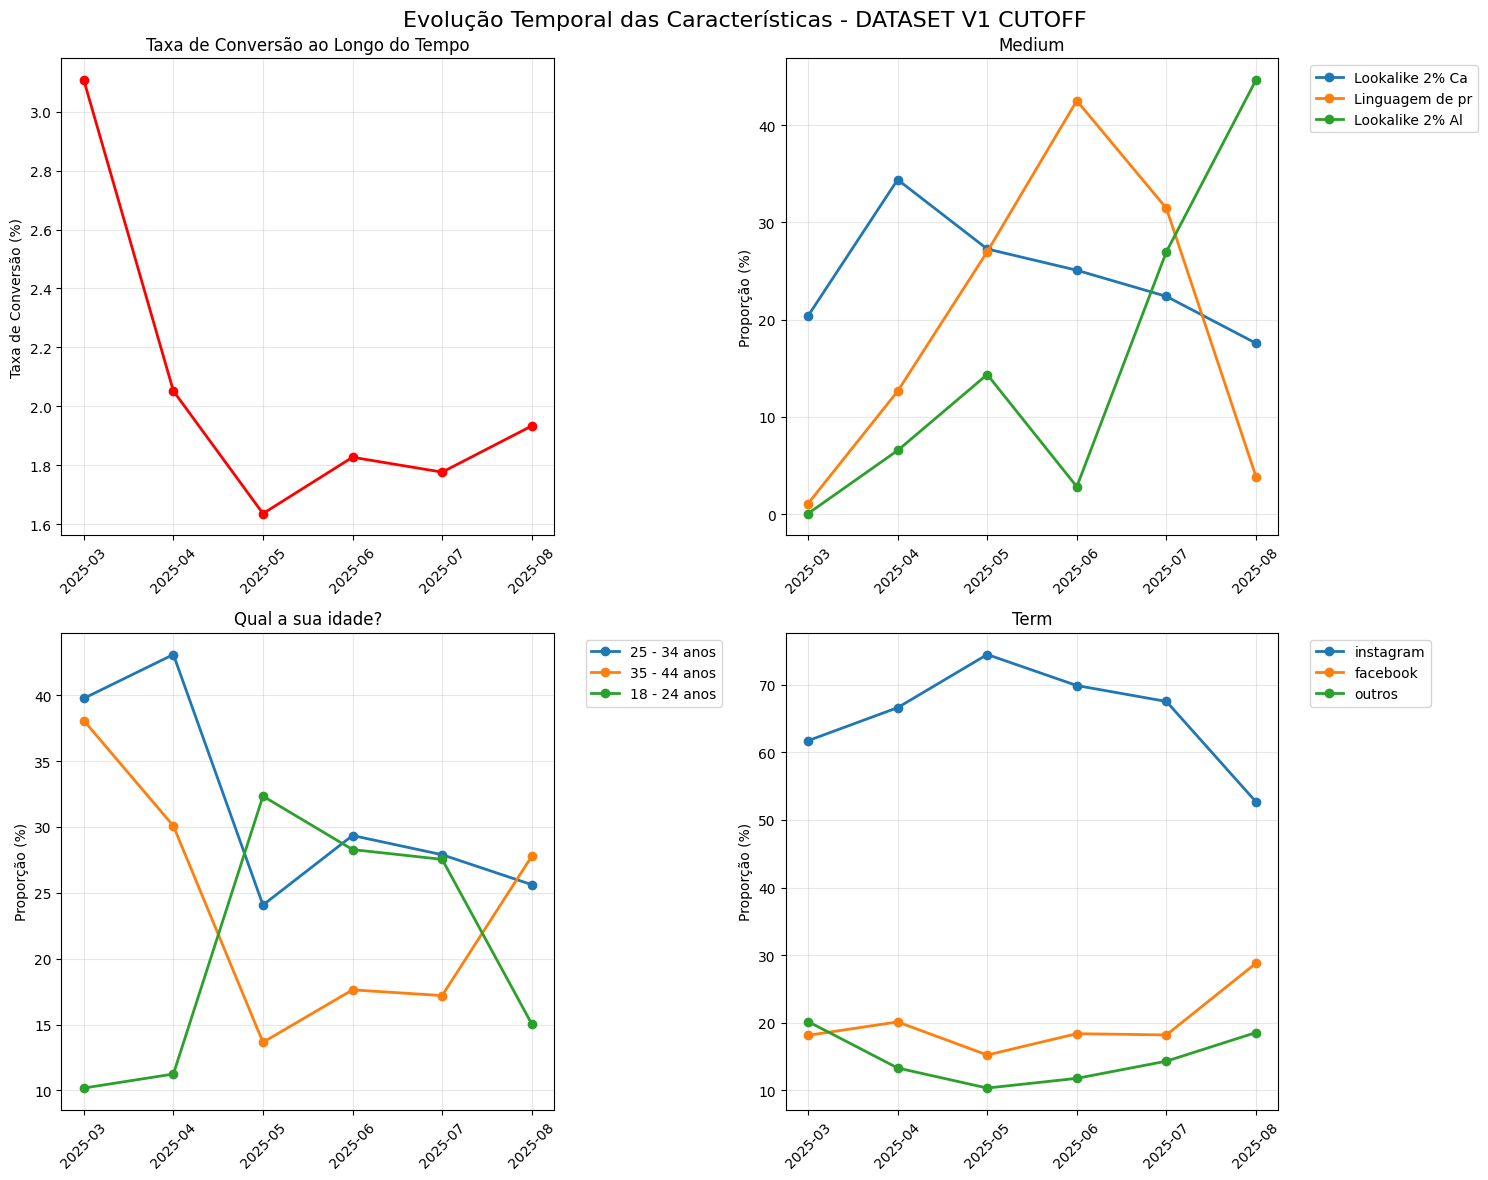


4. DRIVERS DE MUDANÇA - DATASET V1 CUTOFF
Mudanças significativas (>5pp):
VARIÁVEL                  CATEGORIA       INICIAL  FINAL    MUDANÇA 
---------------------------------------------------------------------------
Medium                    Linguagem de    16.6     32.5     +15.9   
Medium                    Aberto          18.4     8.0      -10.4   
Medium                    Lookalike 2%    8.6      18.6     +9.9    
Qual a sua idade?         35 - 44 anos    24.4     18.9     -5.5    
Qual a sua idade?         45 - 54 anos    7.5      12.7     +5.2    
Qual a sua idade?         18 - 24 anos    21.0     26.1     +5.0    

5. CONCLUSÃO - DATASET V1 CUTOFF
Variáveis instáveis: 14/14
Drivers de mudança: 6
Variação na conversão: -37.8%
Status: MUDANÇA SIGNIFICATIVA detectada

ANÁLISE - DATASET V2 CUTOFF
Registros analisados: 72,287
Período: 2024-12-18 a 2025-08-09
Colunas categóricas analisadas: 11

1. ESTABILIDADE TEMPORAL - DATASET V2 CUTOFF
VARIÁVEL                       CV_MÉDIO  

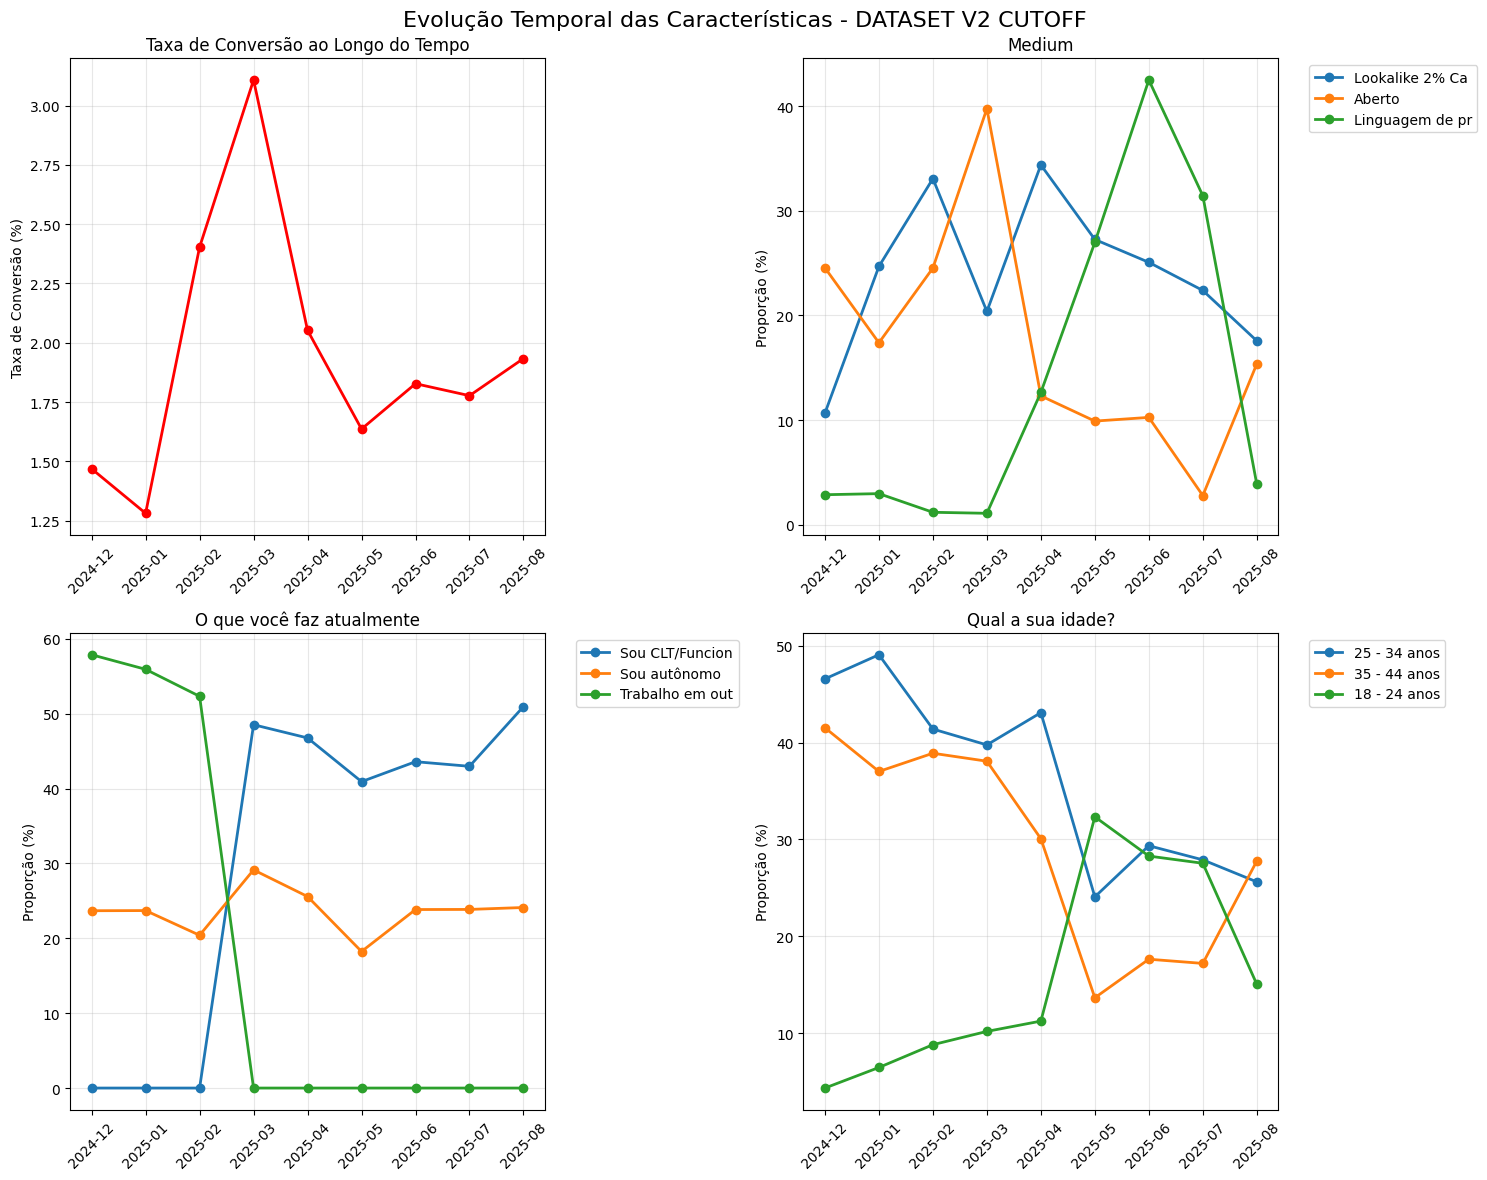


4. DRIVERS DE MUDANÇA - DATASET V2 CUTOFF
Mudanças significativas (>5pp):
VARIÁVEL                  CATEGORIA       INICIAL  FINAL    MUDANÇA 
---------------------------------------------------------------------------
Medium                    Linguagem de    2.4      32.5     +30.1   
Qual a sua idade?         35 - 44 anos    38.1     18.9     -19.1   
Qual a sua idade?         18 - 24 anos    7.0      26.1     +19.1   
Qual a sua idade?         25 - 34 anos    46.4     28.2     -18.2   
Medium                    Lookalike 2%    2.5      18.6     +16.0   
Medium                    Aberto          20.3     8.0      -12.3   
Medium                    dgen            1.0      12.9     +11.9   
Qual a sua idade?         45 - 54 anos    4.5      12.7     +8.1    
Qual a sua idade?         Menos de 18 a   3.7      10.2     +6.5    

5. CONCLUSÃO - DATASET V2 CUTOFF
Variáveis instáveis: 11/11
Drivers de mudança: 9
Variação na conversão: +31.7%
Status: MUDANÇA SIGNIFICATIVA detectada


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import numpy as np

def analisar_mudanca_perfil_leads_cutoff():
    """Analisa mudanças nas características dos leads com datasets filtrados por cutoff"""

    print("ANÁLISE DE MUDANÇA NO PERFIL DOS LEADS - CUTOFF")
    print("=" * 50)

    # Datasets para análise (com cutoff)
    datasets = [
        (dataset_v1_cutoff, "DATASET V1 CUTOFF"),
        (dataset_v2_cutoff, "DATASET V2 CUTOFF")
    ]

    # Variáveis a ignorar
    variaveis_ignorar = ['aba_origem', 'arquivo_origem', 'Data', 'mes_ano', 'periodo',
                        'target', 'Nome Completo', 'E-mail', 'Telefone']

    for df_original, nome_dataset in datasets:
        print(f"\n{'='*60}")
        print(f"ANÁLISE - {nome_dataset}")
        print(f"{'='*60}")

        df = df_original.copy()

        # Converter data e criar períodos
        df['Data'] = pd.to_datetime(df['Data'], errors='coerce')
        df = df[df['Data'].notna()].copy()
        df['mes_ano'] = df['Data'].dt.strftime('%Y-%m')
        df['periodo'] = df['Data'].dt.to_period('M')

        print(f"Registros analisados: {len(df):,}")
        print(f"Período: {df['Data'].min().date()} a {df['Data'].max().date()}")

        # Identificar colunas categóricas (excluindo as ignoradas)
        colunas_categoricas = []
        for col in df.columns:
            if col not in variaveis_ignorar:
                if df[col].dtype == 'object' or df[col].nunique() < 20:
                    colunas_categoricas.append(col)

        print(f"Colunas categóricas analisadas: {len(colunas_categoricas)}")

        # 1. ANÁLISE DE ESTABILIDADE TEMPORAL
        print(f"\n1. ESTABILIDADE TEMPORAL - {nome_dataset}")
        print("=" * 45)

        resultados_estabilidade = {}

        for coluna in colunas_categoricas:
            # Criar tabela de contingência temporal
            tabela_temporal = pd.crosstab(df['periodo'], df[coluna], normalize='index') * 100

            if len(tabela_temporal) >= 3 and len(tabela_temporal.columns) >= 2:
                # Calcular coeficiente de variação das proporções
                cv_medio = tabela_temporal.std(axis=0).mean() / tabela_temporal.mean(axis=0).mean()

                # Teste qui-quadrado para independência temporal
                tabela_counts = pd.crosstab(df['periodo'], df[coluna])
                try:
                    chi2, p_valor, _, _ = chi2_contingency(tabela_counts)
                    significativo = p_valor < 0.05
                except:
                    chi2, p_valor, significativo = np.nan, np.nan, False

                resultados_estabilidade[coluna] = {
                    'cv_medio': cv_medio,
                    'p_valor': p_valor,
                    'significativo': significativo,
                    'categorias': len(tabela_temporal.columns)
                }

        # Ordenar por instabilidade
        variaveis_instabilidade = sorted(resultados_estabilidade.items(),
                                       key=lambda x: x[1]['cv_medio'], reverse=True)

        print(f"{'VARIÁVEL':<30} {'CV_MÉDIO':<10} {'P_VALOR':<10} {'INSTÁVEL':<10}")
        print("-" * 65)

        for variavel, stats in variaveis_instabilidade:
            cv = stats['cv_medio']
            p_val = stats['p_valor']
            instavel = "SIM" if stats['significativo'] else "NÃO"
            variavel_nome = variavel[:28] if len(variavel) > 28 else variavel

            p_str = f"{p_val:.3f}" if not pd.isna(p_val) else "N/A"
            print(f"{variavel_nome:<30} {cv:<10.3f} {p_str:<10} {instavel:<10}")

        # 2. ANÁLISE DETALHADA DAS TOP 3 VARIÁVEIS INSTÁVEIS
        print(f"\n2. TOP 3 VARIÁVEIS INSTÁVEIS - {nome_dataset}")
        print("=" * 50)

        top_variaveis_instáveis = []
        for var_nome, stats in variaveis_instabilidade[:3]:
            if stats['significativo']:
                top_variaveis_instáveis.append(var_nome)

        for variavel in top_variaveis_instáveis:
            print(f"\n{variavel}:")
            print("-" * min(len(variavel), 40))

            # Evolução temporal das proporções
            tabela_prop = pd.crosstab(df['mes_ano'], df[variavel], normalize='index') * 100

            # Mostrar apenas categorias principais
            categorias_principais = tabela_prop.sum().nlargest(3).index
            tabela_filtrada = tabela_prop[categorias_principais]

            print(f"{'MÊS':<10} " + " ".join([f"{str(cat)[:8]:<9}" for cat in categorias_principais]))
            print("-" * (10 + 10 * len(categorias_principais)))

            for mes in tabela_filtrada.index:
                linha = f"{mes:<10} "
                for cat in categorias_principais:
                    valor = tabela_filtrada.loc[mes, cat]
                    linha += f"{valor:<9.1f}"
                print(linha)

        # 3. GRÁFICOS DE TENDÊNCIAS
        print(f"\n3. GRÁFICOS DE TENDÊNCIAS - {nome_dataset}")
        print("=" * 45)

        # Criar figura com subplots
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))
        fig.suptitle(f'Evolução Temporal das Características - {nome_dataset}', fontsize=16)

        # Gráfico 1: Taxa de conversão
        conversao_temporal = df.groupby('mes_ano')['target'].agg(['count', 'sum', 'mean'])
        axes[0, 0].plot(conversao_temporal.index, conversao_temporal['mean'] * 100,
                       marker='o', linewidth=2, color='red')
        axes[0, 0].set_title('Taxa de Conversão ao Longo do Tempo')
        axes[0, 0].set_ylabel('Taxa de Conversão (%)')
        axes[0, 0].tick_params(axis='x', rotation=45)
        axes[0, 0].grid(True, alpha=0.3)

        # Gráficos 2, 3, 4: Top 3 variáveis instáveis
        for idx, variavel in enumerate(top_variaveis_instáveis[:3]):
            ax = axes[0, 1] if idx == 0 else axes[1, 0] if idx == 1 else axes[1, 1]

            tabela_prop = pd.crosstab(df['mes_ano'], df[variavel], normalize='index') * 100
            categorias_top = tabela_prop.sum().nlargest(3).index

            for cat in categorias_top:
                ax.plot(tabela_prop.index, tabela_prop[cat],
                       marker='o', label=str(cat)[:15], linewidth=2)

            ax.set_title(f'{variavel[:25]}')
            ax.set_ylabel('Proporção (%)')
            ax.tick_params(axis='x', rotation=45)
            ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
            ax.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

        # 4. DRIVERS DE MUDANÇA
        print(f"\n4. DRIVERS DE MUDANÇA - {nome_dataset}")
        print("=" * 40)

        # Períodos para comparação
        meses_iniciais = sorted(df['mes_ano'].unique())[:3]
        meses_finais = sorted(df['mes_ano'].unique())[-3:]

        periodo_inicial = df[df['mes_ano'].isin(meses_iniciais)]
        periodo_final = df[df['mes_ano'].isin(meses_finais)]

        drivers_mudanca = []

        for variavel in top_variaveis_instáveis:
            # Comparar distribuições
            dist_inicial = periodo_inicial[variavel].value_counts(normalize=True) * 100
            dist_final = periodo_final[variavel].value_counts(normalize=True) * 100

            # Encontrar categoria com maior mudança
            categorias_comuns = set(dist_inicial.index) & set(dist_final.index)

            for categoria in categorias_comuns:
                mudanca = dist_final.get(categoria, 0) - dist_inicial.get(categoria, 0)

                if abs(mudanca) > 5:  # Mudança > 5pp
                    drivers_mudanca.append({
                        'variavel': variavel,
                        'categoria': categoria,
                        'mudanca': mudanca,
                        'inicial': dist_inicial.get(categoria, 0),
                        'final': dist_final.get(categoria, 0)
                    })

        # Ordenar por magnitude da mudança
        drivers_mudanca.sort(key=lambda x: abs(x['mudanca']), reverse=True)

        print(f"Mudanças significativas (>5pp):")
        print(f"{'VARIÁVEL':<25} {'CATEGORIA':<15} {'INICIAL':<8} {'FINAL':<8} {'MUDANÇA':<8}")
        print("-" * 75)

        for driver in drivers_mudanca:
            var_nome = driver['variavel'][:23] if len(driver['variavel']) > 23 else driver['variavel']
            cat_nome = str(driver['categoria'])[:13] if len(str(driver['categoria'])) > 13 else str(driver['categoria'])

            print(f"{var_nome:<25} {cat_nome:<15} {driver['inicial']:<8.1f} {driver['final']:<8.1f} {driver['mudanca']:<+8.1f}")

        # 5. CONCLUSÃO POR DATASET
        print(f"\n5. CONCLUSÃO - {nome_dataset}")
        print("=" * 30)

        num_variaveis_instáveis = sum(1 for _, stats in resultados_estabilidade.items()
                                     if stats['significativo'])

        taxa_inicial = df[df['mes_ano'] == sorted(df['mes_ano'].unique())[0]]['target'].mean() * 100
        taxa_final = df[df['mes_ano'] == sorted(df['mes_ano'].unique())[-1]]['target'].mean() * 100
        variacao_conversao = ((taxa_final - taxa_inicial) / taxa_inicial) * 100 if taxa_inicial > 0 else 0

        print(f"Variáveis instáveis: {num_variaveis_instáveis}/{len(colunas_categoricas)}")
        print(f"Drivers de mudança: {len(drivers_mudanca)}")
        print(f"Variação na conversão: {variacao_conversao:+.1f}%")

        if num_variaveis_instáveis > len(colunas_categoricas) * 0.5:
            print("Status: MUDANÇA SIGNIFICATIVA detectada")
        else:
            print("Status: Mudanças MODERADAS detectadas")

# Executar análise
analisar_mudanca_perfil_leads_cutoff()

## 16.3- Investigação
Padrões temporais para dias da semana

ANÁLISE DE PADRÕES POR DIA DA SEMANA
Total de registros com data válida: 75,110
Período analisado: 2024-12-18 a 2025-08-29

1. DISTRIBUIÇÃO DE VOLUME POR DIA:
(0=Segunda, 1=Terça, 2=Quarta, 3=Quinta, 4=Sexta, 5=Sábado, 6=Domingo)

0 - Monday    : 10,154 ( 13.5%)
1 - Tuesday   : 10,179 ( 13.6%)
2 - Wednesday : 11,436 ( 15.2%)
3 - Thursday  : 10,273 ( 13.7%)
4 - Friday    : 10,766 ( 14.3%)
5 - Saturday  : 10,544 ( 14.0%)
6 - Sunday    : 11,758 ( 15.7%)

Comparação de VOLUME - Fim de Semana vs Dias Úteis:
Dias úteis (Seg-Sex): 52,808 (70.3%)
Fim de semana (Sáb-Dom): 22,302 (29.7%)

2. ANÁLISE DE CONVERSÃO POR DIA:
DIA NOME       LEADS    CONVERT. TAXA   
---------------------------------------------
0   Monday     10,154   162      1.60   %
1   Tuesday    10,179   148      1.45   %
2   Wednesday  11,436   150      1.31   %
3   Thursday   10,273   141      1.37   %
4   Friday     10,766   145      1.35   %
5   Saturday   10,544   149      1.41   %
6   Sunday     11,758   145      1.23   %


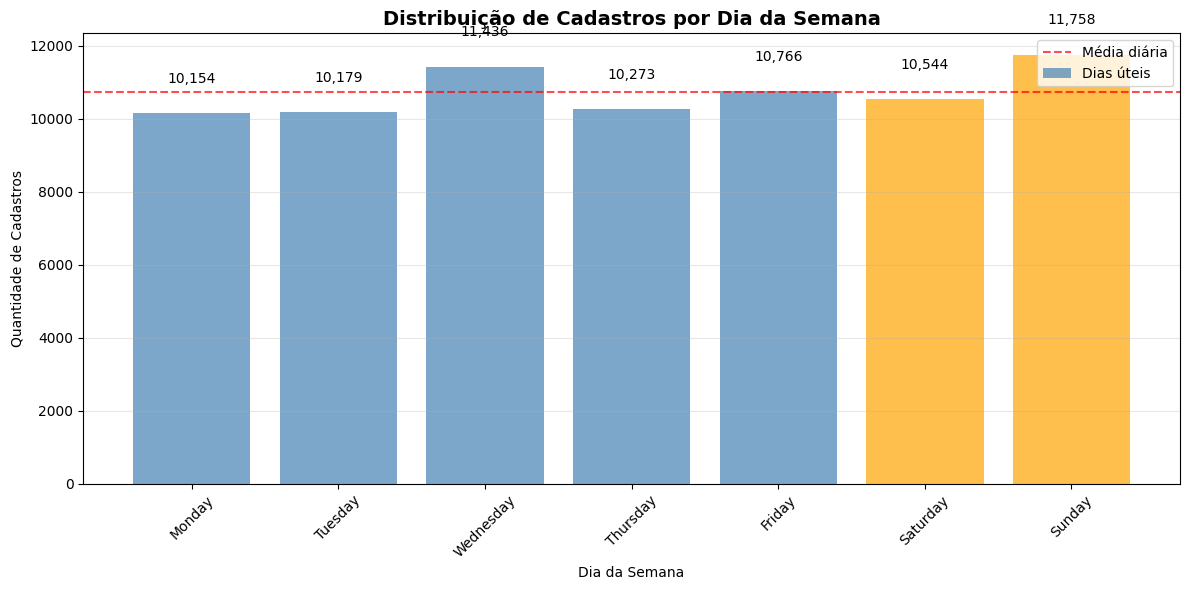


RECOMENDAÇÃO BASEADA NA CONVERSÃO:
🟡 CONSIDERAR FEATURE 'dia_semana' - variação alta entre dias individuais (30.1%)
   Apesar da média similar, alguns dias específicos convertem muito diferente


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def analisar_padroes_dia_semana():
    """Analisa padrões de cadastro e conversão por dia da semana"""

    print("ANÁLISE DE PADRÕES POR DIA DA SEMANA")
    print("=" * 45)

    # Usar dataset V2 para ter mais dados
    df = dataset_v2_devclub.copy()
    df['Data'] = pd.to_datetime(df['Data'], errors='coerce')
    df_com_data = df.dropna(subset=['Data'])

    print(f"Total de registros com data válida: {len(df_com_data):,}")
    print(f"Período analisado: {df_com_data['Data'].min().strftime('%Y-%m-%d')} a {df_com_data['Data'].max().strftime('%Y-%m-%d')}")

    # Criar dia da semana
    df_com_data['dia_semana'] = df_com_data['Data'].dt.dayofweek
    df_com_data['nome_dia'] = df_com_data['Data'].dt.day_name()

    # 1. ANÁLISE DE VOLUME DE CADASTROS
    print(f"\n1. DISTRIBUIÇÃO DE VOLUME POR DIA:")
    print("(0=Segunda, 1=Terça, 2=Quarta, 3=Quinta, 4=Sexta, 5=Sábado, 6=Domingo)")
    print()

    contagem_dias = df_com_data.groupby(['dia_semana', 'nome_dia']).size().reset_index(name='quantidade')
    contagem_dias = contagem_dias.sort_values('dia_semana')

    total_registros = contagem_dias['quantidade'].sum()
    for _, row in contagem_dias.iterrows():
        porcentagem = (row['quantidade'] / total_registros) * 100
        print(f"{row['dia_semana']} - {row['nome_dia']:<10}: {row['quantidade']:>6,} ({porcentagem:5.1f}%)")

    # Volume: Dias úteis vs fim de semana
    dias_uteis = contagem_dias[contagem_dias['dia_semana'].isin([0,1,2,3,4])]['quantidade'].sum()
    fim_semana = contagem_dias[contagem_dias['dia_semana'].isin([5,6])]['quantidade'].sum()

    print(f"\nComparação de VOLUME - Fim de Semana vs Dias Úteis:")
    print(f"Dias úteis (Seg-Sex): {dias_uteis:,} ({dias_uteis/total_registros*100:.1f}%)")
    print(f"Fim de semana (Sáb-Dom): {fim_semana:,} ({fim_semana/total_registros*100:.1f}%)")

    # 2. ANÁLISE DE CONVERSÃO POR DIA DA SEMANA
    print(f"\n2. ANÁLISE DE CONVERSÃO POR DIA:")
    print("=" * 40)

    # Agrupar por dia da semana e calcular conversões
    conversao_por_dia = df_com_data.groupby(['dia_semana', 'nome_dia']).agg({
        'target': ['count', 'sum', 'mean']
    }).round(4)

    # Simplificar nomes das colunas
    conversao_por_dia.columns = ['total_leads', 'leads_convertidos', 'taxa_conversao']
    conversao_por_dia = conversao_por_dia.reset_index()

    print(f"{'DIA':<3} {'NOME':<10} {'LEADS':<8} {'CONVERT.':<8} {'TAXA':<7}")
    print("-" * 45)

    for _, row in conversao_por_dia.iterrows():
        taxa_pct = row['taxa_conversao'] * 100
        print(f"{row['dia_semana']:<3} {row['nome_dia']:<10} {row['total_leads']:<8,} {row['leads_convertidos']:<8,} {taxa_pct:<7.2f}%")

    # Conversão: Dias úteis vs fim de semana
    dias_uteis_conv = conversao_por_dia[conversao_por_dia['dia_semana'].isin([0,1,2,3,4])]
    fim_semana_conv = conversao_por_dia[conversao_por_dia['dia_semana'].isin([5,6])]

    total_leads_dias_uteis = dias_uteis_conv['total_leads'].sum()
    total_conv_dias_uteis = dias_uteis_conv['leads_convertidos'].sum()
    taxa_dias_uteis = total_conv_dias_uteis / total_leads_dias_uteis

    total_leads_fim_semana = fim_semana_conv['total_leads'].sum()
    total_conv_fim_semana = fim_semana_conv['leads_convertidos'].sum()
    taxa_fim_semana = total_conv_fim_semana / total_leads_fim_semana

    print(f"\nComparação de CONVERSÃO - Fim de Semana vs Dias Úteis:")
    print(f"Dias úteis (Seg-Sex): {total_conv_dias_uteis:,}/{total_leads_dias_uteis:,} ({taxa_dias_uteis*100:.2f}%)")
    print(f"Fim de semana (Sáb-Dom): {total_conv_fim_semana:,}/{total_leads_fim_semana:,} ({taxa_fim_semana*100:.2f}%)")

    # Diferença na taxa de conversão
    diferenca_conversao = ((taxa_fim_semana - taxa_dias_uteis) / taxa_dias_uteis) * 100
    print(f"Diferença na conversão: {diferenca_conversao:+.1f}% (fim de semana vs dias úteis)")

    # Análise estatística simples
    taxas_individuais = conversao_por_dia['taxa_conversao'].values
    taxa_maxima = taxas_individuais.max()
    taxa_minima = taxas_individuais.min()
    variacao_maxima = ((taxa_maxima - taxa_minima) / taxa_minima) * 100

    print(f"\nVariação entre dias individuais:")
    print(f"Taxa máxima: {taxa_maxima*100:.2f}% ({conversao_por_dia.loc[conversao_por_dia['taxa_conversao'].idxmax(), 'nome_dia']})")
    print(f"Taxa mínima: {taxa_minima*100:.2f}% ({conversao_por_dia.loc[conversao_por_dia['taxa_conversao'].idxmin(), 'nome_dia']})")
    print(f"Variação máxima: {variacao_maxima:.1f}%")

    # 3. GRÁFICO
    plt.figure(figsize=(12, 6))

    # Cores diferentes para dias úteis e fim de semana
    cores = ['steelblue' if dia < 5 else 'orange' for dia in contagem_dias['dia_semana']]

    plt.bar(contagem_dias['nome_dia'], contagem_dias['quantidade'], color=cores, alpha=0.7)
    plt.title('Distribuição de Cadastros por Dia da Semana', fontsize=14, fontweight='bold')
    plt.xlabel('Dia da Semana')
    plt.ylabel('Quantidade de Cadastros')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3, axis='y')

    # Adicionar valores nas barras
    for i, v in enumerate(contagem_dias['quantidade']):
        plt.text(i, v + total_registros*0.01, f'{v:,}', ha='center', va='bottom', fontsize=10)

    # Adicionar linha de média
    plt.axhline(y=total_registros/7, color='red', linestyle='--', alpha=0.7, label=f'Média: {total_registros/7:,.0f}')

    # Legenda
    plt.legend(['Média diária', 'Dias úteis', 'Fim de semana'], loc='upper right')

    plt.tight_layout()
    plt.show()

    # 4. RECOMENDAÇÃO BASEADA NA CONVERSÃO
    print(f"\nRECOMENDAÇÃO BASEADA NA CONVERSÃO:")
    if abs(diferenca_conversao) > 20:
        print(f"✅ CRIAR FEATURE 'dia_semana' - diferença ALTA na conversão ({diferenca_conversao:+.1f}%)")
        print("   Há padrão significativo de conversão entre dias da semana")
    elif abs(diferenca_conversao) > 10:
        print(f"🟡 CONSIDERAR FEATURE 'dia_semana' - diferença MODERADA na conversão ({diferenca_conversao:+.1f}%)")
        print("   Há alguma variação na conversão, pode ser útil")
    elif variacao_maxima > 30:
        print(f"🟡 CONSIDERAR FEATURE 'dia_semana' - variação alta entre dias individuais ({variacao_maxima:.1f}%)")
        print("   Apesar da média similar, alguns dias específicos convertem muito diferente")
    else:
        print(f"❌ NÃO CRIAR FEATURE 'dia_semana' - diferenças pequenas")
        print(f"   Conversão fim de semana vs dias úteis: {diferenca_conversao:+.1f}%")
        print(f"   Variação máxima entre dias: {variacao_maxima:.1f}%")
        print("   Padrão de conversão muito uniforme entre dias da semana")

    return conversao_por_dia

# Executar análise
padroes_dias = analisar_padroes_dia_semana()

## 17- Criação das versões de datasets com apenas matches de DevClub:
* DevClub - Full Stack 2025
* DevClub FullStack Pro - OFICIAL
* Formação DevClub FullStack Pro
* DevClub - Full Stack 2025 - EV
* DevClub - FS - Vitalício
* [Vitalício] Formação DevClub FullStack
* Formação DevClub FullStack Pro - COMER
* DevClub Vitalício
* DevClub 3.0 - 2024
* (Desativado) DevClub 3.0 - 2024
* (Desativado) DevClub 3.0 - 2024 - Novo

### Remover os tickets diferentes:
* (Desativado) FrontEnd Club
* FrontEnd Club - Oficial
* FrontEnd Club

In [14]:
import pandas as pd

def criar_quatro_datasets():
    """Cria 4 datasets: V1/V2 x Todos/DevClub"""

    print("CRIAÇÃO DOS 4 DATASETS")
    print("=" * 40)

    # 1. CRIAR ALIASES DOS DATASETS ORIGINAIS
    dataset_v1_todos = dataset_v1_final.copy()
    dataset_v2_todos = dataset_v2_final.copy()

    # 2. PRODUTOS DEVCLUB A MANTER
    produtos_devclub_manter = [
        'DevClub - Full Stack 2025',
        'DevClub FullStack Pro - OFICIAL',
        'Formação DevClub FullStack Pro - OFICI',
        'DevClub - Full Stack 2025 - EV',
        'DevClub - FS - Vitalício',
        '[Vitalício] Formação DevClub FullStack',
        'Formação DevClub FullStack Pro - COMER',
        'DevClub Vitalício',
        'DevClub 3.0 - 2024',
        '(Desativado) DevClub 3.0 - 2024',
        '(Desativado) DevClub 3.0 - 2024 - Novo'
    ]

    # 3. IDENTIFICAR COMPRADORES DEVCLUB
    df_vendas_devclub = vendas_unificado[vendas_unificado['produto'].isin(produtos_devclub_manter)].copy()

    def normalizar_email(email):
        if pd.isna(email):
            return None
        email_str = str(email).strip().lower()
        if '@' in email_str and email_str != 'nan' and len(email_str) > 5:
            return email_str
        return None

    df_vendas_devclub['email_clean'] = df_vendas_devclub['email'].apply(normalizar_email)
    emails_compradores_devclub = set(df_vendas_devclub['email_clean'].dropna())

    print(f"Produtos DevClub identificados: {len(produtos_devclub_manter)}")
    print(f"Vendas DevClub: {len(df_vendas_devclub):,}")
    print(f"Emails únicos compradores DevClub: {len(emails_compradores_devclub):,}")

    # 4. CRIAR DATASETS DEVCLUB
    def criar_dataset_devclub(df_original, nome):
        df_devclub = df_original.copy()

        # Normalizar emails do dataset de pesquisa
        df_devclub['email_temp'] = df_devclub['E-mail'].apply(normalizar_email)

        # Criar novo target baseado apenas em DevClub
        df_devclub['target_devclub'] = df_devclub['email_temp'].isin(emails_compradores_devclub).astype(int)

        # Remover coluna temporária e target antigo
        df_devclub = df_devclub.drop(columns=['email_temp', 'target'])

        # Renomear para target final
        df_devclub = df_devclub.rename(columns={'target_devclub': 'target'})

        # Estatísticas
        total_registros = len(df_devclub)
        leads_qualificados = df_devclub['target'].sum()
        taxa_conversao = (leads_qualificados / total_registros * 100) if total_registros > 0 else 0

        print(f"\n{nome}:")
        print(f"  Total de registros: {total_registros:,}")
        print(f"  Leads qualificados DevClub: {leads_qualificados:,}")
        print(f"  Taxa de conversão DevClub: {taxa_conversao:.2f}%")
        print(f"  Colunas: {len(df_devclub.columns)}")

        return df_devclub

    # Criar datasets DevClub
    dataset_v1_devclub = criar_dataset_devclub(dataset_v1_final, "DATASET V1 DEVCLUB")
    dataset_v2_devclub = criar_dataset_devclub(dataset_v2_final, "DATASET V2 DEVCLUB")

    # 5. COMPARAÇÃO FINAL
    print(f"\n" + "=" * 60)
    print("RESUMO DOS 4 DATASETS CRIADOS")
    print("=" * 60)

    datasets_info = [
        ("dataset_v1_todos", dataset_v1_todos),
        ("dataset_v1_devclub", dataset_v1_devclub),
        ("dataset_v2_todos", dataset_v2_todos),
        ("dataset_v2_devclub", dataset_v2_devclub)
    ]

    for nome, df in datasets_info:
        registros = len(df)
        colunas = len(df.columns)
        targets = df['target'].sum()
        taxa = (targets / registros * 100) if registros > 0 else 0

        print(f"{nome}:")
        print(f"  Registros: {registros:,} | Colunas: {colunas} | Targets: {targets:,} | Taxa: {taxa:.2f}%")

    # 6. COMPARAÇÃO TAXAS DE CONVERSÃO
    print(f"\nCOMPARAÇÃO TODOS vs DEVCLUB:")
    print(f"V1 - Todos: {dataset_v1_todos['target'].sum():,} targets | DevClub: {dataset_v1_devclub['target'].sum():,} targets")
    print(f"V2 - Todos: {dataset_v2_todos['target'].sum():,} targets | DevClub: {dataset_v2_devclub['target'].sum():,} targets")

    return dataset_v1_todos, dataset_v1_devclub, dataset_v2_todos, dataset_v2_devclub

# Executar criação dos 4 datasets
dataset_v1_todos, dataset_v1_devclub, dataset_v2_todos, dataset_v2_devclub = criar_quatro_datasets()

CRIAÇÃO DOS 4 DATASETS
Produtos DevClub identificados: 11
Vendas DevClub: 4,837
Emails únicos compradores DevClub: 4,545

DATASET V1 DEVCLUB:
  Total de registros: 48,156
  Leads qualificados DevClub: 679
  Taxa de conversão DevClub: 1.41%
  Colunas: 21

DATASET V2 DEVCLUB:
  Total de registros: 75,110
  Leads qualificados DevClub: 1,040
  Taxa de conversão DevClub: 1.38%
  Colunas: 18

RESUMO DOS 4 DATASETS CRIADOS
dataset_v1_todos:
  Registros: 48,156 | Colunas: 21 | Targets: 917 | Taxa: 1.90%
dataset_v1_devclub:
  Registros: 48,156 | Colunas: 21 | Targets: 679 | Taxa: 1.41%
dataset_v2_todos:
  Registros: 75,110 | Colunas: 18 | Targets: 1,362 | Taxa: 1.81%
dataset_v2_devclub:
  Registros: 75,110 | Colunas: 18 | Targets: 1,040 | Taxa: 1.38%

COMPARAÇÃO TODOS vs DEVCLUB:
V1 - Todos: 917 targets | DevClub: 679 targets
V2 - Todos: 1,362 targets | DevClub: 1,040 targets


## 18- Remoção de features desnecessárias restantes e criação das úteis:
1. Remoção:
* aba_origem
* arquivo_origem
* Data, criando feature dia_semana e epoca_mes
* Nome, criando: nome_comprimento, nome_tem_sobrenome, nome_valido
* E-mail, criando: email_valido
* Telefone, criando: telefone_valido, telefone_comprimento

In [15]:
import pandas as pd
import re

def normalizar_telefone_robusto(telefone):
    """Normaliza telefone considerando notação científica e padrões brasileiros"""
    if pd.isna(telefone):
        return None

    # Converter para string e lidar com notação científica
    tel_str = str(telefone)

    # Se está em notação científica, converter para número inteiro
    if 'e+' in tel_str.lower() or 'E+' in tel_str:
        try:
            tel_str = str(int(float(tel_str)))
        except:
            pass

    # Extrair apenas dígitos
    digitos = re.sub(r'\D', '', tel_str)

    if len(digitos) < 8:
        return None

    # Remover código do país (55) se presente
    if digitos.startswith('55') and len(digitos) > 10:
        digitos = digitos[2:]

    # Verificar se é um telefone válido brasileiro
    if len(digitos) in [10, 11]:  # DDD + 8 ou 9 dígitos
        return digitos
    elif len(digitos) in [8, 9]:  # Sem DDD
        return digitos

    return None

def validar_email_robusto(email):
    """Valida email com regex rigoroso"""
    if pd.isna(email):
        return False

    email_str = str(email).strip().lower()

    # Regex básico para email
    pattern = r'^[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}$'

    return bool(re.match(pattern, email_str))

def validar_nome_robusto(nome):
    """Valida se nome não é apenas números ou caracteres especiais"""
    if pd.isna(nome):
        return False

    nome_str = str(nome).strip()

    # Verificar se tem pelo menos algumas letras
    tem_letras = bool(re.search(r'[a-zA-ZÀ-ÿ]', nome_str))

    # Verificar se não é só números
    nao_so_numeros = not nome_str.replace(' ', '').replace('.', '').replace('-', '').isdigit()

    return tem_letras and nao_so_numeros and len(nome_str) >= 2

def criar_features_derivadas_completo():
    """Cria todas as features derivadas e remove colunas desnecessárias para os 4 datasets"""

    print("FEATURE ENGINEERING COMPLETO - 4 DATASETS")
    print("=" * 45)

    def processar_dataset(df_original, nome_dataset):
        """Processa um dataset criando features derivadas"""

        df = df_original.copy()

        print(f"\nProcessando {nome_dataset}...")
        print(f"Registros: {len(df):,}")
        print(f"Colunas antes: {len(df.columns)}")

        # 1. FEATURES TEMPORAIS
        df['Data'] = pd.to_datetime(df['Data'], errors='coerce')
        df['dia_semana'] = df['Data'].dt.dayofweek

        # 2. FEATURES DE QUALIDADE DOS IDENTIFICADORES

        # Nome
        df['nome_comprimento'] = df['Nome Completo'].astype(str).str.len()
        df['nome_tem_sobrenome'] = df['Nome Completo'].astype(str).str.split().str.len() >= 2
        df['nome_valido'] = df['Nome Completo'].apply(validar_nome_robusto)

        # Email
        df['email_valido'] = df['E-mail'].apply(validar_email_robusto)

        # Telefone
        df['telefone_normalizado'] = df['Telefone'].apply(normalizar_telefone_robusto)
        df['telefone_valido'] = df['telefone_normalizado'].notna()
        df['telefone_comprimento'] = df['telefone_normalizado'].astype(str).str.len()

        # 3. REMOVER COLUNAS DESNECESSÁRIAS
        colunas_remover = [
            'aba_origem', 'arquivo_origem', 'Data',
            'Nome Completo', 'E-mail', 'Telefone', 'telefone_normalizado'
        ]

        # Verificar quais colunas existem antes de remover
        colunas_existentes = [col for col in colunas_remover if col in df.columns]
        colunas_nao_existentes = [col for col in colunas_remover if col not in df.columns]

        if colunas_existentes:
            df = df.drop(columns=colunas_existentes)
            print(f"Colunas removidas: {len(colunas_existentes)}")
            for col in colunas_existentes:
                print(f"  - {col}")

        if colunas_nao_existentes:
            print(f"Colunas não encontradas (ok): {len(colunas_nao_existentes)}")

        print(f"Colunas depois: {len(df.columns)}")

        # 4. ESTATÍSTICAS DAS NOVAS FEATURES
        print(f"\nEstatísticas das features criadas:")
        print(f"Nome válido: {df['nome_valido'].sum():,} ({df['nome_valido'].mean()*100:.1f}%)")
        print(f"Nome com sobrenome: {df['nome_tem_sobrenome'].sum():,} ({df['nome_tem_sobrenome'].mean()*100:.1f}%)")
        print(f"Email válido: {df['email_valido'].sum():,} ({df['email_valido'].mean()*100:.1f}%)")
        print(f"Telefone válido: {df['telefone_valido'].sum():,} ({df['telefone_valido'].mean()*100:.1f}%)")

        # 5. DISTRIBUIÇÃO DA FEATURE TEMPORAL
        print(f"\nDistribuição da feature temporal:")
        dia_semana_counts = df['dia_semana'].value_counts().sort_index()
        nomes_dias = ['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado', 'Domingo']
        for dia, count in dia_semana_counts.items():
            pct = (count / len(df)) * 100
            print(f"  {dia} ({nomes_dias[dia]}): {count:,} ({pct:.1f}%)")

        return df

    # Processar os 4 datasets
    dataset_v1_todos_fe = processar_dataset(dataset_v1_todos, "DATASET V1 TODOS")
    dataset_v1_devclub_fe = processar_dataset(dataset_v1_devclub, "DATASET V1 DEVCLUB")
    dataset_v2_todos_fe = processar_dataset(dataset_v2_todos, "DATASET V2 TODOS")
    dataset_v2_devclub_fe = processar_dataset(dataset_v2_devclub, "DATASET V2 DEVCLUB")

    # Listar colunas finais
    print(f"\n" + "=" * 60)
    print("DATASETS FINAIS PARA MODELAGEM")
    print("=" * 60)

    datasets_info = [
        ("DATASET V1 TODOS", dataset_v1_todos_fe),
        ("DATASET V1 DEVCLUB", dataset_v1_devclub_fe),
        ("DATASET V2 TODOS", dataset_v2_todos_fe),
        ("DATASET V2 DEVCLUB", dataset_v2_devclub_fe)
    ]

    for nome, df in datasets_info:
        print(f"\n{nome}:")
        print(f"  Registros: {len(df):,}")
        print(f"  Colunas: {len(df.columns)}")
        print(f"  Target positivo: {df['target'].sum():,} ({df['target'].mean()*100:.2f}%)")

    # Verificar diferenças nas colunas entre V1 e V2
    colunas_v1 = set(dataset_v1_todos_fe.columns)
    colunas_v2 = set(dataset_v2_todos_fe.columns)

    colunas_apenas_v1 = colunas_v1 - colunas_v2
    colunas_apenas_v2 = colunas_v2 - colunas_v1

    print(f"\nDIFERENÇAS ENTRE V1 E V2:")
    if colunas_apenas_v1:
        print(f"Colunas apenas no V1:")
        for col in sorted(colunas_apenas_v1):
            print(f"  - {col}")

    if colunas_apenas_v2:
        print(f"Colunas apenas no V2:")
        for col in sorted(colunas_apenas_v2):
            print(f"  - {col}")

    if not colunas_apenas_v1 and not colunas_apenas_v2:
        print(f"V1 e V2 possuem as mesmas colunas")

    print(f"\nTodos os 4 datasets prontos para encoding e modelagem!")

    return dataset_v1_todos_fe, dataset_v1_devclub_fe, dataset_v2_todos_fe, dataset_v2_devclub_fe

# Executar feature engineering completo nos 4 datasets
dataset_v1_todos_fe, dataset_v1_devclub_fe, dataset_v2_todos_fe, dataset_v2_devclub_fe = criar_features_derivadas_completo()

FEATURE ENGINEERING COMPLETO - 4 DATASETS

Processando DATASET V1 TODOS...
Registros: 48,156
Colunas antes: 21
Colunas removidas: 7
  - aba_origem
  - arquivo_origem
  - Data
  - Nome Completo
  - E-mail
  - Telefone
  - telefone_normalizado
Colunas depois: 22

Estatísticas das features criadas:
Nome válido: 48,013 (99.7%)
Nome com sobrenome: 38,445 (79.8%)
Email válido: 47,788 (99.2%)
Telefone válido: 12,610 (26.2%)

Distribuição da feature temporal:
  0 (Segunda): 6,750 (14.0%)
  1 (Terça): 6,650 (13.8%)
  2 (Quarta): 7,522 (15.6%)
  3 (Quinta): 6,959 (14.5%)
  4 (Sexta): 6,687 (13.9%)
  5 (Sábado): 6,414 (13.3%)
  6 (Domingo): 7,174 (14.9%)

Processando DATASET V1 DEVCLUB...
Registros: 48,156
Colunas antes: 21
Colunas removidas: 7
  - aba_origem
  - arquivo_origem
  - Data
  - Nome Completo
  - E-mail
  - Telefone
  - telefone_normalizado
Colunas depois: 22

Estatísticas das features criadas:
Nome válido: 48,013 (99.7%)
Nome com sobrenome: 38,445 (79.8%)
Email válido: 47,788 (99.2%)

## 19- Investigação
Sobre o número de telefones válidos (~25% no V1 x ~45% no V2)

In [ ]:
import pandas as pd
import re

def debug_validacao_telefones():
    """Debug detalhado da validação de telefones para identificar onde está falhando"""

    print("DEBUG DETALHADO DA VALIDAÇÃO DE TELEFONES")
    print("=" * 50)

    datasets = [
        (dataset_v1_final, "DATASET V1"),
        (dataset_v2_final, "DATASET V2")
    ]

    def debug_telefone_dataset(df, nome_dataset):
        """Debug telefones em um dataset específico"""

        print(f"\n{nome_dataset}:")
        print("=" * 30)

        telefones_df = df[df['Telefone'].notna()].copy()
        telefones_df['telefone_str'] = telefones_df['Telefone'].astype(str)

        total_telefones = len(telefones_df)
        print(f"Total de telefones: {total_telefones:,}")

        # Contadores para cada etapa
        etapas = {
            'entrada': 0,
            'pos_notacao_cientifica': 0,
            'identificados_plus_ddd': 0,
            'pos_remocao_plus': 0,
            'pos_extracao_digitos': 0,
            'muito_curtos': 0,
            'pos_remocao_55': 0,
            'telefones_validos': 0
        }

        exemplos_rejeitados = {
            'muito_curtos': [],
            'muito_longos': [],
            'pos_55_muito_longos': [],
            'outros': []
        }

        # DDDs brasileiros válidos
        ddds_br = ['11', '12', '13', '14', '15', '16', '17', '18', '19',
                   '21', '22', '24', '27', '28', '31', '32', '33', '34', '35', '37', '38',
                   '41', '42', '43', '44', '45', '46', '47', '48', '49', '51', '53', '54', '55',
                   '61', '62', '63', '64', '65', '66', '67', '68', '69',
                   '71', '73', '74', '75', '77', '79',
                   '81', '82', '83', '84', '85', '86', '87', '88', '89',
                   '91', '92', '93', '94', '95', '96', '97', '98', '99']

        for telefone in telefones_df['telefone_str']:
            etapas['entrada'] += 1
            tel_str = str(telefone)
            original = tel_str

            # Etapa 1: Tratar notação científica
            if 'e+' in tel_str.lower() or 'E+' in tel_str:
                try:
                    tel_str = str(int(float(tel_str)))
                except:
                    pass
            etapas['pos_notacao_cientifica'] += 1

            # Etapa 2: Identificar telefones com +DDD brasileiro
            tem_plus_ddd = False
            if tel_str.startswith('+') and not tel_str.startswith('+55'):
                tel_str_sem_plus = tel_str[1:]
                if len(tel_str_sem_plus) >= 2 and tel_str_sem_plus[:2] in ddds_br:
                    tem_plus_ddd = True
                    etapas['identificados_plus_ddd'] += 1
                    tel_str = tel_str_sem_plus

            etapas['pos_remocao_plus'] += 1

            # Etapa 3: Extrair apenas dígitos
            digitos = re.sub(r'\D', '', tel_str)
            etapas['pos_extracao_digitos'] += 1

            # Etapa 4: Verificar se muito curto
            if len(digitos) < 7:
                etapas['muito_curtos'] += 1
                if len(exemplos_rejeitados['muito_curtos']) < 3:
                    exemplos_rejeitados['muito_curtos'].append(f"{original} -> {digitos} (len={len(digitos)})")
                continue

            # Etapa 5: Remover código do país (55) se presente
            digitos_original = digitos
            if digitos.startswith('55') and len(digitos) > 10:
                digitos = digitos[2:]
            etapas['pos_remocao_55'] += 1

            # Etapa 6: Validação final
            if len(digitos) in [7, 8, 9, 10, 11]:
                etapas['telefones_validos'] += 1
            else:
                # Categorizar por que foi rejeitado
                if len(digitos) > 11:
                    if len(digitos_original) > 13:
                        if len(exemplos_rejeitados['muito_longos']) < 3:
                            status = f"+DDD: {tem_plus_ddd}" if tem_plus_ddd else ""
                            exemplos_rejeitados['muito_longos'].append(f"{original} -> {digitos} (len={len(digitos)}) {status}")
                    else:
                        if len(exemplos_rejeitados['pos_55_muito_longos']) < 3:
                            status = f"+DDD: {tem_plus_ddd}" if tem_plus_ddd else ""
                            exemplos_rejeitados['pos_55_muito_longos'].append(f"{original} -> {digitos} (len={len(digitos)}) {status}")
                else:
                    if len(exemplos_rejeitados['outros']) < 3:
                        status = f"+DDD: {tem_plus_ddd}" if tem_plus_ddd else ""
                        exemplos_rejeitados['outros'].append(f"{original} -> {digitos} (len={len(digitos)}) {status}")

        # Relatório detalhado
        print(f"\nFLUXO DE PROCESSAMENTO:")
        for etapa, count in etapas.items():
            pct = (count / total_telefones * 100) if total_telefones > 0 else 0
            print(f"  {etapa}: {count:,} ({pct:.1f}%)")

        print(f"\nTelefones com +DDD identificados: {etapas['identificados_plus_ddd']:,}")

        print(f"\nEXEMPLOS DE REJEIÇÕES:")
        for categoria, exemplos in exemplos_rejeitados.items():
            if exemplos:
                print(f"  {categoria}:")
                for exemplo in exemplos:
                    print(f"    - {exemplo}")

        # Calcular taxa de recuperação esperada
        telefones_perdidos = total_telefones - etapas['telefones_validos']
        plus_ddd_perdidos = etapas['identificados_plus_ddd']

        print(f"\nANÁLISE DE RECUPERAÇÃO:")
        print(f"  Telefones perdidos: {telefones_perdidos:,}")
        print(f"  +DDD identificados mas perdidos: {plus_ddd_perdidos:,}")
        print(f"  Taxa de recuperação potencial: {plus_ddd_perdidos/telefones_perdidos*100:.1f}%")

        return etapas

    # Analisar ambos datasets
    for df, nome in datasets:
        debug_telefone_dataset(df, nome)

# Executar debug
debug_validacao_telefones()

DEBUG DETALHADO DA VALIDAÇÃO DE TELEFONES

DATASET V1:
Total de telefones: 45,290

FLUXO DE PROCESSAMENTO:
  entrada: 45,290 (100.0%)
  pos_notacao_cientifica: 45,290 (100.0%)
  identificados_plus_ddd: 31 (0.1%)
  pos_remocao_plus: 45,290 (100.0%)
  pos_extracao_digitos: 45,290 (100.0%)
  muito_curtos: 18 (0.0%)
  pos_remocao_55: 45,272 (100.0%)
  telefones_validos: 12,579 (27.8%)

Telefones com +DDD identificados: 31

EXEMPLOS DE REJEIÇÕES:
  muito_curtos:
    - # ->  (len=0)
    - # ->  (len=0)
    - 71 -> 71 (len=2)
  muito_longos:
    - 4002892269999999999996969 -> 4002892269999999999996969 (len=25) 
    - 555521964704257 -> 5521964704257 (len=13) 
    - 0153599828-6500 -> 01535998286500 (len=14) 
  pos_55_muito_longos:
    - 439841896950 -> 439841896950 (len=12) 
    - 479888888888 -> 479888888888 (len=12) 
    - 879817178865 -> 879817178865 (len=12) 

ANÁLISE DE RECUPERAÇÃO:
  Telefones perdidos: 32,711
  +DDD identificados mas perdidos: 31
  Taxa de recuperação potencial: 0.1%



## 19.1- Investigação
Da cardinalidade das features restantes para fazer encoding

In [ ]:
import pandas as pd

def analisar_cardinalidade_para_encoding():
    """Analisa cardinalidade das variáveis para definir estratégia de encoding"""

    print("ANÁLISE DE CARDINALIDADE PARA ENCODING")
    print("=" * 50)

    def analisar_dataset(df, nome_dataset):
        """Analisa um dataset específico"""

        print(f"\n{nome_dataset}:")
        print(f"Total de registros: {len(df):,}")
        print(f"Total de colunas: {len(df.columns)}")

        # Separar variáveis por tipo
        colunas_numericas = []
        colunas_booleanas = []
        colunas_categoricas = []

        for col in df.columns:
            if col == 'target':
                continue

            dtype = str(df[col].dtype)
            valores_unicos = df[col].nunique()
            valores_nao_nulos = df[col].notna().sum()

            # Determinar tipo da variável
            if dtype in ['int64', 'float64'] and valores_unicos > 10:
                if df[col].min() >= 0 and df[col].max() <= 1:
                    colunas_booleanas.append(col)
                else:
                    colunas_numericas.append(col)
            elif valores_unicos == 2 or (dtype == 'bool'):
                colunas_booleanas.append(col)
            else:
                colunas_categoricas.append(col)

        print(f"\nTIPOS DE VARIÁVEIS IDENTIFICADOS:")
        print(f"Numéricas: {len(colunas_numericas)}")
        print(f"Booleanas: {len(colunas_booleanas)}")
        print(f"Categóricas: {len(colunas_categoricas)}")

        # Análise detalhada das categóricas
        if colunas_categoricas:
            print(f"\nANÁLISE DE CARDINALIDADE - CATEGÓRICAS:")
            print(f"{'COLUNA':<45} {'ÚNICOS':<8} {'% MISS':<8} {'TIPO SUGERIDO':<15}")
            print("-" * 80)

            for col in colunas_categoricas:
                valores_unicos = df[col].nunique()
                total_registros = len(df)
                missing_rate = (df[col].isnull().sum() / total_registros) * 100

                # Sugerir tipo de encoding
                if valores_unicos <= 2:
                    tipo_sugerido = "Booleana"
                elif valores_unicos <= 5:
                    tipo_sugerido = "One-Hot"
                elif valores_unicos <= 15:
                    tipo_sugerido = "Label/One-Hot"
                elif valores_unicos <= 50:
                    tipo_sugerido = "Label/Target"
                else:
                    tipo_sugerido = "Target/Freq"

                col_display = col[:42] if len(col) > 42 else col
                print(f"{col_display:<45} {valores_unicos:<8} {missing_rate:<8.1f} {tipo_sugerido:<15}")

        # Análise das booleanas
        if colunas_booleanas:
            print(f"\nANÁLISE - BOOLEANAS:")
            print(f"{'COLUNA':<45} {'VALORES':<15} {'% MISS':<8}")
            print("-" * 70)

            for col in colunas_booleanas:
                valores_unicos = sorted(df[col].dropna().unique())
                missing_rate = (df[col].isnull().sum() / len(df)) * 100
                valores_str = str(valores_unicos)[:12]

                col_display = col[:42] if len(col) > 42 else col
                print(f"{col_display:<45} {valores_str:<15} {missing_rate:<8.1f}")

        # Análise das numéricas
        if colunas_numericas:
            print(f"\nANÁLISE - NUMÉRICAS:")
            print(f"{'COLUNA':<45} {'MIN':<8} {'MAX':<8} {'% MISS':<8}")
            print("-" * 70)

            for col in colunas_numericas:
                min_val = df[col].min()
                max_val = df[col].max()
                missing_rate = (df[col].isnull().sum() / len(df)) * 100

                col_display = col[:42] if len(col) > 42 else col
                print(f"{col_display:<45} {min_val:<8.0f} {max_val:<8.0f} {missing_rate:<8.1f}")

        return {
            'numericas': colunas_numericas,
            'booleanas': colunas_booleanas,
            'categoricas': colunas_categoricas
        }

    # Analisar ambos os datasets
    analise_v1 = analisar_dataset(dataset_v1_final, "DATASET V1")
    analise_v2 = analisar_dataset(dataset_v2_final, "DATASET V2")

    # Recomendações específicas
    print(f"\n" + "=" * 60)
    print("RECOMENDAÇÕES DE ENCODING")
    print("=" * 60)

    def gerar_recomendacoes(df, nome):
        """Gera recomendações específicas de encoding"""

        print(f"\n{nome}:")

        encoding_strategy = {
            'manter_numericas': [],
            'one_hot': [],
            'label_encoding': [],
            'target_encoding': [],
            'frequency_encoding': []
        }

        for col in df.columns:
            if col == 'target':
                continue

            valores_unicos = df[col].nunique()

            # Aplicar lógica de decisão
            if df[col].dtype in ['int64', 'float64'] and valores_unicos > 10:
                if df[col].min() >= 0 and df[col].max() <= 1:
                    encoding_strategy['one_hot'].append(col)
                else:
                    encoding_strategy['manter_numericas'].append(col)
            elif valores_unicos <= 2:
                encoding_strategy['one_hot'].append(col)
            elif valores_unicos <= 5:
                encoding_strategy['one_hot'].append(col)
            elif valores_unicos <= 15:
                encoding_strategy['label_encoding'].append(col)
            elif valores_unicos <= 50:
                encoding_strategy['target_encoding'].append(col)
            else:
                encoding_strategy['frequency_encoding'].append(col)

        # Imprimir recomendações
        for strategy, colunas in encoding_strategy.items():
            if colunas:
                strategy_name = strategy.replace('_', ' ').title()
                print(f"\n{strategy_name}: {len(colunas)} colunas")
                for col in colunas:
                    nunique = df[col].nunique()
                    print(f"  - {col} ({nunique} valores únicos)")

        return encoding_strategy

    # Gerar recomendações para ambos
    recomendacoes_v1 = gerar_recomendacoes(dataset_v1_final, "DATASET V1")
    recomendacoes_v2 = gerar_recomendacoes(dataset_v2_final, "DATASET V2")

    # Verificar variáveis ordinais potenciais
    print(f"\n" + "=" * 60)
    print("VERIFICAÇÃO DE VARIÁVEIS ORDINAIS")
    print("=" * 60)

    variaveis_ordinais_suspeitas = [
        'Qual a sua idade?',
        'Atualmente, qual a sua faixa salarial?',
        'dia_semana'
    ]

    print("Variáveis que podem ser ordinais:")
    for var in variaveis_ordinais_suspeitas:
        if var in dataset_v2_final.columns:
            valores = sorted(dataset_v2_final[var].dropna().unique())
            print(f"\n{var}:")
            print(f"  Valores: {valores}")
            if len(valores) <= 10:
                for val in valores[:10]:
                    count = (dataset_v2_final[var] == val).sum()
                    print(f"    '{val}': {count:,} registros")

    return recomendacoes_v1, recomendacoes_v2

# Executar análise
recomendacoes_v1, recomendacoes_v2 = analisar_cardinalidade_para_encoding()

ANÁLISE DE CARDINALIDADE PARA ENCODING

DATASET V1:
Total de registros: 45,333
Total de colunas: 21

TIPOS DE VARIÁVEIS IDENTIFICADOS:
Numéricas: 0
Booleanas: 6
Categóricas: 14

ANÁLISE DE CARDINALIDADE - CATEGÓRICAS:
COLUNA                                        ÚNICOS   % MISS   TIPO SUGERIDO  
--------------------------------------------------------------------------------
Data                                          37651    0.0      Target/Freq    
Nome Completo                                 35061    0.1      Target/Freq    
E-mail                                        41570    0.1      Target/Freq    
Telefone                                      42374    0.1      Target/Freq    
Qual a sua idade?                             6        0.0      Label/One-Hot  
O que você faz atualmente?                    5        0.0      One-Hot        
Atualmente, qual a sua faixa salarial?        5        0.0      One-Hot        
O que mais você quer ver no evento?           5        0.0   

## 19.2- Investigação
Da diferença no número de categorias da variável "O que você faz atualmente?"

In [ ]:
import pandas as pd

def investigar_diferenca_categorias():
    """Investiga diferenças no número de categorias entre V1 e V2"""

    print("INVESTIGAÇÃO DE DIFERENÇAS DE CATEGORIAS")
    print("=" * 50)

    # Variável com diferença identificada
    variavel_diferente = "O que você faz atualmente?"

    print(f"Analisando variável: {variavel_diferente}")
    print(f"V1 tem 5 categorias, V2 tem 9 categorias")

    # Verificar se a variável existe em ambos
    if variavel_diferente in dataset_v1_final.columns and variavel_diferente in dataset_v2_final.columns:

        # Obter categorias únicas de cada dataset
        categorias_v1 = set(dataset_v1_final[variavel_diferente].dropna().unique())
        categorias_v2 = set(dataset_v2_final[variavel_diferente].dropna().unique())

        print(f"\nCategorias no V1 ({len(categorias_v1)}):")
        for cat in sorted(categorias_v1):
            count = (dataset_v1_final[variavel_diferente] == cat).sum()
            print(f"  - '{cat}': {count:,} registros")

        print(f"\nCategorias no V2 ({len(categorias_v2)}):")
        for cat in sorted(categorias_v2):
            count = (dataset_v2_final[variavel_diferente] == cat).sum()
            print(f"  - '{cat}': {count:,} registros")

        # Identificar diferenças
        apenas_v1 = categorias_v1 - categorias_v2
        apenas_v2 = categorias_v2 - categorias_v1
        comuns = categorias_v1 & categorias_v2

        print(f"\nDIFERENÇAS IDENTIFICADAS:")
        print(f"Categorias comuns: {len(comuns)}")

        if apenas_v1:
            print(f"\nApenas no V1 ({len(apenas_v1)}):")
            for cat in sorted(apenas_v1):
                count = (dataset_v1_final[variavel_diferente] == cat).sum()
                print(f"  - '{cat}': {count:,} registros")

        if apenas_v2:
            print(f"\nApenas no V2 ({len(apenas_v2)}):")
            for cat in sorted(apenas_v2):
                count = (dataset_v2_final[variavel_diferente] == cat).sum()
                print(f"  - '{cat}': {count:,} registros")

        # Explicação da diferença
        print(f"\nEXPLICAÇÃO DA DIFERENÇA:")
        if apenas_v2 and not apenas_v1:
            print("V2 (período completo) tem categorias antigas que foram removidas/unificadas no V1 (período recente)")
            print("Isso é esperado se houve evolução no formulário ao longo do tempo")
        elif apenas_v1 and not apenas_v2:
            print("V1 (período recente) tem categorias novas que não existiam no período anterior")
        else:
            print("Há categorias diferentes em ambos os datasets")

    else:
        print(f"Variável '{variavel_diferente}' não encontrada em um dos datasets")

    # Verificar outras variáveis categóricas para possíveis diferenças não detectadas
    print(f"\n" + "=" * 60)
    print("VERIFICAÇÃO RÁPIDA DE OUTRAS VARIÁVEIS")
    print("=" * 60)

    variaveis_categoricas = [
        'Qual a sua idade?',
        'Atualmente, qual a sua faixa salarial?',
        'O que mais você quer ver no evento?',
        'Source',
        'Medium',
        'Term',
        'interesse_programacao'
    ]

    print(f"{'VARIÁVEL':<45} {'V1':<5} {'V2':<5} {'DIFERENÇA'}")
    print("-" * 65)

    for var in variaveis_categoricas:
        if var in dataset_v1_final.columns and var in dataset_v2_final.columns:
            nunique_v1 = dataset_v1_final[var].nunique()
            nunique_v2 = dataset_v2_final[var].nunique()
            diferenca = "SIM" if nunique_v1 != nunique_v2 else "NÃO"

            var_display = var[:42] if len(var) > 42 else var
            print(f"{var_display:<45} {nunique_v1:<5} {nunique_v2:<5} {diferenca}")

# Executar investigação
investigar_diferenca_categorias()

INVESTIGAÇÃO DE DIFERENÇAS DE CATEGORIAS
Analisando variável: O que você faz atualmente?
V1 tem 5 categorias, V2 tem 9 categorias

Categorias no V1 (5):
  - 'Não trabalho e nem estudo': 4,755 registros
  - 'Sou CLT/Funcionário Público': 21,404 registros
  - 'Sou apenas estudante': 9,948 registros
  - 'Sou aposentado': 677 registros
  - 'Sou autônomo': 11,356 registros

Categorias no V2 (9):
  - 'Estou no ensino médio ou acabei de sair e quero entrar na programação': 1,316 registros
  - 'Estudo T.I. na faculdade mas quero aprender mais por fora': 1,160 registros
  - 'Faço outro curso na faculdade e quero mudar para T.I': 358 registros
  - 'Não trabalho e nem estudo': 7,944 registros
  - 'Sou CLT/Funcionário Público': 21,404 registros
  - 'Sou apenas estudante': 9,948 registros
  - 'Sou aposentado': 677 registros
  - 'Sou autônomo': 17,466 registros
  - 'Trabalho em outra área e quero fazer transição para tecnologia': 14,821 registros

DIFERENÇAS IDENTIFICADAS:
Categorias comuns: 5

Apen

## 20- Encoding

In [16]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

def aplicar_encoding_estrategico():
    """Aplica encoding seguindo a estratégia recomendada nos 4 datasets"""

    print("ENCODING ESTRATÉGICO DOS 4 DATASETS")
    print("=" * 45)

    def processar_dataset(df_original, nome_dataset):
        """Aplica encoding em um dataset específico"""

        df = df_original.copy()

        print(f"\nProcessando {nome_dataset}...")
        print(f"Colunas antes do encoding: {len(df.columns)}")

        # 1. ENCODING ORDINAL para variáveis com ordem natural
        variaveis_ordinais = {
            'Qual a sua idade?': ['Menos de 18 anos', '18 - 24 anos', '25 - 34 anos',
                                  '35 - 44 anos', '45 - 54 anos', 'Mais de 55 anos'],
            'Atualmente, qual a sua faixa salarial?': ['Não tenho renda', 'Entre R$1.000 a R$2.000 reais ao mês',
                                                       'Entre R$2.001 a R$3.000 reais ao mês',
                                                       'Entre R$3.001 a R$5.000 reais ao mês',
                                                       'Mais de R$5.001 reais ao mês'],
            'dia_semana': [0, 1, 2, 3, 4, 5, 6]  # Já é numérico
        }

        print(f"\nAplicando ORDINAL ENCODING:")
        for var, ordem in variaveis_ordinais.items():
            if var in df.columns:
                if var == 'dia_semana':
                    # Já é numérico, apenas reportar
                    print(f"  {var}: mantido como numérico (0-6)")
                else:
                    # Criar mapeamento ordinal
                    mapeamento = {categoria: i for i, categoria in enumerate(ordem)}
                    df[var] = df[var].map(mapeamento)
                    print(f"  {var}: {len(ordem)} categorias → 0-{len(ordem)-1}")

        # 2. ONE-HOT ENCODING para variáveis categóricas nominais
        variaveis_one_hot = []

        # Identificar variáveis categóricas (excluindo ordinais já processadas e target)
        for col in df.columns:
            if col not in ['target'] and col not in variaveis_ordinais and col != 'nome_comprimento':
                # Verificar se é categórica (object ou poucos valores únicos)
                if df[col].dtype == 'object' or df[col].nunique() <= 20:
                    variaveis_one_hot.append(col)

        print(f"\nAplicando ONE-HOT ENCODING para {len(variaveis_one_hot)} variáveis:")

        # Aplicar one-hot encoding
        df_encoded = pd.get_dummies(df, columns=variaveis_one_hot, prefix_sep='_', dtype=int)

        # Reportar criação de colunas
        colunas_criadas = len(df_encoded.columns) - len(df.columns)
        for var in variaveis_one_hot:
            categorias_unicas = df[var].nunique()
            print(f"  {var}: {categorias_unicas} categorias → {categorias_unicas} colunas binárias")

        print(f"\nResultado:")
        print(f"  Colunas one-hot originais: {len(variaveis_one_hot)}")
        print(f"  Colunas binárias criadas: {colunas_criadas}")
        print(f"  Total de colunas final: {len(df_encoded.columns)}")

        # Verificar tipos de dados finais
        tipos_dados = df_encoded.dtypes.value_counts()
        print(f"\nTipos de dados no dataset final:")
        for tipo, count in tipos_dados.items():
            print(f"  {tipo}: {count} colunas")

        return df_encoded

    # Processar os 4 datasets usando as variáveis corretas do feature engineering
    dataset_v1_todos_encoded = processar_dataset(dataset_v1_todos_fe, "DATASET V1 TODOS")
    dataset_v1_devclub_encoded = processar_dataset(dataset_v1_devclub_fe, "DATASET V1 DEVCLUB")
    dataset_v2_todos_encoded = processar_dataset(dataset_v2_todos_fe, "DATASET V2 TODOS")
    dataset_v2_devclub_encoded = processar_dataset(dataset_v2_devclub_fe, "DATASET V2 DEVCLUB")

    # Comparação final
    print(f"\n" + "=" * 60)
    print("RESUMO DOS 4 DATASETS ENCODADOS")
    print("=" * 60)

    datasets_info = [
        ("DATASET V1 TODOS", dataset_v1_todos_encoded),
        ("DATASET V1 DEVCLUB", dataset_v1_devclub_encoded),
        ("DATASET V2 TODOS", dataset_v2_todos_encoded),
        ("DATASET V2 DEVCLUB", dataset_v2_devclub_encoded)
    ]

    for nome, df in datasets_info:
        print(f"\n{nome}:")
        print(f"  Registros: {len(df):,}")
        print(f"  Colunas: {len(df.columns)}")
        print(f"  Target positivo: {df['target'].sum():,} ({df['target'].mean()*100:.2f}%)")

    # Verificar se V1 e V2 têm as mesmas colunas para cada versão (todos/devclub)
    colunas_v1_todos = set(dataset_v1_todos_encoded.columns)
    colunas_v2_todos = set(dataset_v2_todos_encoded.columns)
    colunas_v1_devclub = set(dataset_v1_devclub_encoded.columns)
    colunas_v2_devclub = set(dataset_v2_devclub_encoded.columns)

    # Comparar colunas entre V1 e V2 para versão TODOS
    colunas_apenas_v1_todos = colunas_v1_todos - colunas_v2_todos
    colunas_apenas_v2_todos = colunas_v2_todos - colunas_v1_todos

    # Comparar colunas entre V1 e V2 para versão DEVCLUB
    colunas_apenas_v1_devclub = colunas_v1_devclub - colunas_v2_devclub
    colunas_apenas_v2_devclub = colunas_v2_devclub - colunas_v1_devclub

    print(f"\nCOMPARAÇÃO DE COLUNAS V1 vs V2:")
    print(f"VERSÃO TODOS:")
    if colunas_apenas_v1_todos:
        print(f"  Colunas apenas no V1 TODOS ({len(colunas_apenas_v1_todos)}):")
        for col in sorted(colunas_apenas_v1_todos):
            print(f"    - {col}")

    if colunas_apenas_v2_todos:
        print(f"  Colunas apenas no V2 TODOS ({len(colunas_apenas_v2_todos)}):")
        for col in sorted(colunas_apenas_v2_todos):
            print(f"    - {col}")

    if not colunas_apenas_v1_todos and not colunas_apenas_v2_todos:
        print(f"  V1 e V2 TODOS têm as mesmas colunas ✓")

    print(f"\nVERSÃO DEVCLUB:")
    if colunas_apenas_v1_devclub:
        print(f"  Colunas apenas no V1 DEVCLUB ({len(colunas_apenas_v1_devclub)}):")
        for col in sorted(colunas_apenas_v1_devclub):
            print(f"    - {col}")

    if colunas_apenas_v2_devclub:
        print(f"  Colunas apenas no V2 DEVCLUB ({len(colunas_apenas_v2_devclub)}):")
        for col in sorted(colunas_apenas_v2_devclub):
            print(f"    - {col}")

    if not colunas_apenas_v1_devclub and not colunas_apenas_v2_devclub:
        print(f"  V1 e V2 DEVCLUB têm as mesmas colunas ✓")

    print(f"\nTodos os 4 datasets encodados estão prontos para modelagem!")

    return dataset_v1_todos_encoded, dataset_v1_devclub_encoded, dataset_v2_todos_encoded, dataset_v2_devclub_encoded

# Executar encoding estratégico nos 4 datasets
dataset_v1_todos_encoded, dataset_v1_devclub_encoded, dataset_v2_todos_encoded, dataset_v2_devclub_encoded = aplicar_encoding_estrategico()

ENCODING ESTRATÉGICO DOS 4 DATASETS

Processando DATASET V1 TODOS...
Colunas antes do encoding: 22

Aplicando ORDINAL ENCODING:
  Qual a sua idade?: 6 categorias → 0-5
  Atualmente, qual a sua faixa salarial?: 5 categorias → 0-4
  dia_semana: mantido como numérico (0-6)

Aplicando ONE-HOT ENCODING para 17 variáveis:
  O seu gênero:: 2 categorias → 2 colunas binárias
  O que você faz atualmente?: 5 categorias → 5 colunas binárias
  Você possui cartão de crédito?: 2 categorias → 2 colunas binárias
  Já estudou programação?: 2 categorias → 2 colunas binárias
  Você já fez/faz/pretende fazer faculdade?: 2 categorias → 2 colunas binárias
  O que mais você quer ver no evento?: 5 categorias → 5 colunas binárias
  Source: 3 categorias → 3 colunas binárias
  Medium: 15 categorias → 15 colunas binárias
  Term: 3 categorias → 3 colunas binárias
  Tem computador/notebook?: 2 categorias → 2 colunas binárias
  investiu_curso_online: 2 categorias → 2 colunas binárias
  interesse_programacao: 5 catego

## 21- Modelagem Baseline
Splita os dados 80/20 para os dois datasets e treina um random forest e um lgbm com parâmetro de desbalanceamento de classes ativado, produzindo 10 decis de probabilidade

In [17]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
import lightgbm as lgb
import xgboost as xgb

def validacao_temporal():
    """Valida modelos usando split temporal nos 4 datasets"""

    print("VALIDAÇÃO TEMPORAL DOS MODELOS - 4 DATASETS")
    print("=" * 50)

    def recuperar_data_original():
        """Recupera coluna de data dos datasets originais antes do feature engineering"""

        # Recuperar data dos datasets V1 e V2 originais (antes do FE que removeu a coluna Data)
        data_v1_todos = dataset_v1_todos['Data'].copy()
        data_v1_devclub = dataset_v1_devclub['Data'].copy()
        data_v2_todos = dataset_v2_todos['Data'].copy()
        data_v2_devclub = dataset_v2_devclub['Data'].copy()

        return data_v1_todos, data_v1_devclub, data_v2_todos, data_v2_devclub

    def split_temporal(df_encoded, data_original, nome_dataset):
        """Faz split temporal dos dados"""

        print(f"\nAnalisando período temporal - {nome_dataset}:")

        # Converter data para datetime
        data_dt = pd.to_datetime(data_original, errors='coerce')

        # Estatísticas temporais
        data_min = data_dt.min()
        data_max = data_dt.max()

        print(f"Período total: {data_min.strftime('%Y-%m-%d')} a {data_max.strftime('%Y-%m-%d')}")

        # Definir data de corte (70% para treino, 30% para teste)
        dias_totais = (data_max - data_min).days
        dias_treino = int(dias_totais * 0.7)
        data_corte = data_min + pd.Timedelta(days=dias_treino)

        print(f"Data de corte: {data_corte.strftime('%Y-%m-%d')}")
        print(f"Treino: {data_min.strftime('%Y-%m-%d')} a {data_corte.strftime('%Y-%m-%d')}")
        print(f"Teste: {data_corte.strftime('%Y-%m-%d')} a {data_max.strftime('%Y-%m-%d')}")

        # Criar máscaras temporais
        mask_treino = data_dt <= data_corte
        mask_teste = data_dt > data_corte

        # Separar dados
        X = df_encoded.drop(columns=['target'])
        y = df_encoded['target']

        # Limpar nomes das colunas
        X.columns = X.columns.str.replace('[^A-Za-z0-9_]', '_', regex=True)
        X.columns = X.columns.str.replace('__+', '_', regex=True)
        X.columns = X.columns.str.strip('_')

        X_train_temporal = X[mask_treino]
        X_test_temporal = X[mask_teste]
        y_train_temporal = y[mask_treino]
        y_test_temporal = y[mask_teste]

        print(f"Registros treino: {len(X_train_temporal):,}")
        print(f"Registros teste: {len(X_test_temporal):,}")
        print(f"Taxa positivos treino: {y_train_temporal.mean()*100:.2f}%")
        print(f"Taxa positivos teste: {y_test_temporal.mean()*100:.2f}%")

        return X_train_temporal, X_test_temporal, y_train_temporal, y_test_temporal

    def treinar_modelos_temporal(X_train, X_test, y_train, y_test, nome_dataset):
        """Treina modelos com split temporal"""

        print(f"\nTreinando modelos temporais - {nome_dataset}...")

        resultados = {}

        # Random Forest
        rf = RandomForestClassifier(
            n_estimators=100,
            max_depth=10,
            random_state=42,
            class_weight='balanced',
            n_jobs=-1
        )

        rf.fit(X_train, y_train)
        y_prob_rf = rf.predict_proba(X_test)[:, 1]
        auc_rf = roc_auc_score(y_test, y_prob_rf)

        print(f"Random Forest AUC: {auc_rf:.3f}")
        resultados['rf'] = {'model': rf, 'y_prob': y_prob_rf, 'auc': auc_rf}

        # LightGBM
        lgbm_params = {
            'objective': 'binary',
            'metric': 'binary_logloss',
            'boosting_type': 'gbdt',
            'num_leaves': 31,
            'learning_rate': 0.05,
            'feature_fraction': 0.8,
            'bagging_fraction': 0.8,
            'bagging_freq': 5,
            'min_child_samples': 100,
            'verbose': -1,
            'random_state': 42,
            'is_unbalance': True
        }

        train_data = lgb.Dataset(X_train, label=y_train)
        lgbm_model = lgb.train(lgbm_params, train_data, num_boost_round=500, callbacks=[lgb.log_evaluation(0)])

        y_prob_lgbm = lgbm_model.predict(X_test, num_iteration=lgbm_model.best_iteration)
        auc_lgbm = roc_auc_score(y_test, y_prob_lgbm)

        print(f"LightGBM AUC: {auc_lgbm:.3f}")
        resultados['lgbm'] = {'model': lgbm_model, 'y_prob': y_prob_lgbm, 'auc': auc_lgbm}

        # XGBoost
        scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

        xgb_model = xgb.XGBClassifier(
            n_estimators=500,
            max_depth=6,
            learning_rate=0.05,
            subsample=0.8,
            colsample_bytree=0.8,
            random_state=42,
            scale_pos_weight=scale_pos_weight,
            eval_metric='logloss'
        )

        xgb_model.fit(X_train, y_train)
        y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]
        auc_xgb = roc_auc_score(y_test, y_prob_xgb)

        print(f"XGBoost AUC: {auc_xgb:.3f}")
        resultados['xgb'] = {'model': xgb_model, 'y_prob': y_prob_xgb, 'auc': auc_xgb}

        return resultados, y_test

    def analisar_decis_temporal(y_test, y_prob, nome_modelo):
        """Analisa decis para validação temporal"""

        df_analise = pd.DataFrame({
            'probabilidade': y_prob,
            'target_real': y_test
        })

        df_analise['decil'] = pd.qcut(
            df_analise['probabilidade'],
            q=10,
            labels=[f'D{i}' for i in range(1, 11)],
            duplicates='drop'
        )

        analise_decis = df_analise.groupby('decil', observed=True).agg({
            'target_real': ['count', 'sum', 'mean']
        }).round(4)

        analise_decis.columns = ['total_leads', 'conversoes', 'taxa_conversao']

        analise_decis['pct_total_conversoes'] = (
            analise_decis['conversoes'] / analise_decis['conversoes'].sum() * 100
        ).round(2)

        taxa_base = y_test.mean()
        analise_decis['lift'] = (analise_decis['taxa_conversao'] / taxa_base).round(2)

        # Métricas de ranking
        top3_conversoes = analise_decis.tail(3)['pct_total_conversoes'].sum()
        lift_maximo = analise_decis['lift'].max()

        taxas = analise_decis['taxa_conversao'].values
        crescimentos = sum(1 for i in range(1, len(taxas)) if taxas[i] >= taxas[i-1])
        monotonia = crescimentos / (len(taxas) - 1)

        print(f"\nDecis Temporais - {nome_modelo}:")
        print(f"Top 3 decis: {top3_conversoes:.1f}% das conversões")
        print(f"Lift máximo: {lift_maximo:.1f}x")
        print(f"Monotonia: {monotonia*100:.1f}%")

        return {
            'top3_conversoes': top3_conversoes,
            'lift_maximo': lift_maximo,
            'monotonia': monotonia,
            'analise_decis': analise_decis
        }

    # Recuperar dados originais
    data_v1_todos, data_v1_devclub, data_v2_todos, data_v2_devclub = recuperar_data_original()

    # Datasets e suas respectivas datas
    datasets_info = [
        (dataset_v1_todos_encoded, data_v1_todos, "V1 TODOS"),
        (dataset_v1_devclub_encoded, data_v1_devclub, "V1 DEVCLUB"),
        (dataset_v2_todos_encoded, data_v2_todos, "V2 TODOS"),
        (dataset_v2_devclub_encoded, data_v2_devclub, "V2 DEVCLUB")
    ]

    resultados_temporais = {}
    metricas_temporais = {}

    # Processar cada dataset
    for df_encoded, data_original, nome_dataset in datasets_info:
        print(f"\n{'='*60}")
        print(f"VALIDAÇÃO TEMPORAL - DATASET {nome_dataset}")
        print("=" * 60)

        # Split temporal
        X_train_temp, X_test_temp, y_train_temp, y_test_temp = split_temporal(
            df_encoded, data_original, nome_dataset
        )

        # Treinar modelos
        resultados_dataset, y_test_dataset = treinar_modelos_temporal(
            X_train_temp, X_test_temp, y_train_temp, y_test_temp, nome_dataset
        )

        # Analisar decis
        metricas_dataset = {}
        for modelo in ['rf', 'lgbm', 'xgb']:
            nome_modelo = f"{nome_dataset} {modelo.upper()}"
            metricas_dataset[modelo] = analisar_decis_temporal(
                y_test_dataset, resultados_dataset[modelo]['y_prob'], nome_modelo
            )

        # Salvar resultados
        resultados_temporais[nome_dataset.lower().replace(' ', '_')] = resultados_dataset
        metricas_temporais[nome_dataset.lower().replace(' ', '_')] = metricas_dataset

    # Resumo final dos resultados
    print(f"\n{'='*60}")
    print("RESUMO FINAL - VALIDAÇÃO TEMPORAL")
    print("=" * 60)

    # Criar tabela resumo
    resumo_dados = []
    for dataset_key, resultados in resultados_temporais.items():
        for modelo in ['rf', 'lgbm', 'xgb']:
            dataset_nome = dataset_key.replace('_', ' ').upper()
            modelo_nome = modelo.upper()
            auc = resultados[modelo]['auc']
            top3 = metricas_temporais[dataset_key][modelo]['top3_conversoes']
            monotonia = metricas_temporais[dataset_key][modelo]['monotonia'] * 100

            resumo_dados.append({
                'Dataset': dataset_nome,
                'Modelo': modelo_nome,
                'AUC': f"{auc:.3f}",
                'Top3_Conv': f"{top3:.1f}%",
                'Monotonia': f"{monotonia:.1f}%"
            })

    resumo_df = pd.DataFrame(resumo_dados)
    print(resumo_df.to_string(index=False))

    return {
        'resultados_temporais': resultados_temporais,
        'metricas_temporais': metricas_temporais,
        'resumo_final': resumo_df
    }

# Executar validação temporal nos 4 datasets
resultados_validacao_temporal = validacao_temporal()

VALIDAÇÃO TEMPORAL DOS MODELOS - 4 DATASETS

VALIDAÇÃO TEMPORAL - DATASET V1 TODOS

Analisando período temporal - V1 TODOS:
Período total: 2025-03-01 a 2025-08-29
Data de corte: 2025-07-05
Treino: 2025-03-01 a 2025-07-05
Teste: 2025-07-05 a 2025-08-29
Registros treino: 34,604
Registros teste: 13,552
Taxa positivos treino: 2.06%
Taxa positivos teste: 1.51%

Treinando modelos temporais - V1 TODOS...
Random Forest AUC: 0.590
LightGBM AUC: 0.579
XGBoost AUC: 0.570

Decis Temporais - V1 TODOS RF:
Top 3 decis: 40.2% das conversões
Lift máximo: 1.7x
Monotonia: 77.8%

Decis Temporais - V1 TODOS LGBM:
Top 3 decis: 35.3% das conversões
Lift máximo: 1.5x
Monotonia: 66.7%

Decis Temporais - V1 TODOS XGB:
Top 3 decis: 37.7% das conversões
Lift máximo: 1.4x
Monotonia: 66.7%

VALIDAÇÃO TEMPORAL - DATASET V1 DEVCLUB

Analisando período temporal - V1 DEVCLUB:
Período total: 2025-03-01 a 2025-08-29
Data de corte: 2025-07-05
Treino: 2025-03-01 a 2025-07-05
Teste: 2025-07-05 a 2025-08-29
Registros treino:

## 22- Baseline + teste cutoff 10/08 + sem UTMs

In [18]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
import lightgbm as lgb
import xgboost as xgb

def validacao_temporal_completa():
    """Valida modelos com testes de UTM e cutoff temporal nos 4 datasets"""

    print("VALIDAÇÃO TEMPORAL COMPLETA - TESTES UTM E CUTOFF")
    print("=" * 60)

    def criar_datasets_sem_utm():
        """Cria versões dos datasets sem as features de UTM"""

        print("Criando datasets sem UTM...")

        colunas_utm = ['Source', 'Medium', 'Term']

        datasets_sem_utm = {}

        # Para cada dataset encoded, remover colunas UTM e suas versões one-hot
        for nome, df in [
            ('v1_todos', dataset_v1_todos_encoded),
            ('v1_devclub', dataset_v1_devclub_encoded),
            ('v2_todos', dataset_v2_todos_encoded),
            ('v2_devclub', dataset_v2_devclub_encoded)
        ]:
            df_sem_utm = df.copy()

            # Identificar colunas UTM (originais e one-hot)
            colunas_remover = []
            for col in df_sem_utm.columns:
                for utm in colunas_utm:
                    if col.startswith(f'{utm}_') or col == utm:
                        colunas_remover.append(col)

            # Remover colunas UTM
            df_sem_utm = df_sem_utm.drop(columns=colunas_remover, errors='ignore')
            datasets_sem_utm[nome] = df_sem_utm

            print(f"  {nome}: {len(colunas_remover)} colunas UTM removidas")

        return datasets_sem_utm

    def criar_datasets_cutoff():
        """Cria versões dos datasets com cutoff em 10/08"""

        print("\nCriando datasets com cutoff 10/08...")

        data_cutoff = pd.to_datetime('2025-08-10')

        datasets_cutoff = {}
        datasets_originais = [
            ('v1_todos', dataset_v1_todos, dataset_v1_todos_encoded),
            ('v1_devclub', dataset_v1_devclub, dataset_v1_devclub_encoded),
            ('v2_todos', dataset_v2_todos, dataset_v2_todos_encoded),
            ('v2_devclub', dataset_v2_devclub, dataset_v2_devclub_encoded)
        ]

        for nome, df_original, df_encoded in datasets_originais:
            # Criar máscara baseada na data original
            data_dt = pd.to_datetime(df_original['Data'], errors='coerce')
            mask_cutoff = data_dt <= data_cutoff

            # Aplicar cutoff no dataset encoded
            df_cutoff = df_encoded[mask_cutoff].copy()
            datasets_cutoff[nome] = df_cutoff

            total_original = len(df_encoded)
            total_cutoff = len(df_cutoff)
            removidos = total_original - total_cutoff

            print(f"  {nome}: {removidos:,} registros removidos ({removidos/total_original*100:.1f}%)")

        return datasets_cutoff

    def recuperar_datas_originais():
        """Recupera datas originais dos datasets"""
        return {
            'v1_todos': dataset_v1_todos['Data'].copy(),
            'v1_devclub': dataset_v1_devclub['Data'].copy(),
            'v2_todos': dataset_v2_todos['Data'].copy(),
            'v2_devclub': dataset_v2_devclub['Data'].copy()
        }

    def split_temporal_flexivel(df_encoded, data_original, nome_dataset, cutoff_10_08=False):
        """Faz split temporal com opção de cutoff em 10/08"""

        # Converter data para datetime
        data_dt = pd.to_datetime(data_original, errors='coerce')

        if cutoff_10_08:
            # Aplicar cutoff em 10/08 nos dados de data também
            data_cutoff = pd.to_datetime('2025-08-10')
            mask_cutoff = data_dt <= data_cutoff
            data_dt = data_dt[mask_cutoff]

        # Estatísticas temporais
        data_min = data_dt.min()
        data_max = data_dt.max()

        # Definir data de corte (70% para treino, 30% para teste)
        dias_totais = (data_max - data_min).days
        dias_treino = int(dias_totais * 0.7)
        data_corte = data_min + pd.Timedelta(days=dias_treino)

        # Criar máscaras temporais
        mask_treino = data_dt <= data_corte
        mask_teste = data_dt > data_corte

        # Separar dados
        X = df_encoded.drop(columns=['target'])
        y = df_encoded['target']

        # Limpar nomes das colunas
        X.columns = X.columns.str.replace('[^A-Za-z0-9_]', '_', regex=True)
        X.columns = X.columns.str.replace('__+', '_', regex=True)
        X.columns = X.columns.str.strip('_')

        X_train = X[mask_treino]
        X_test = X[mask_teste]
        y_train = y[mask_treino]
        y_test = y[mask_teste]

        return X_train, X_test, y_train, y_test, data_min, data_max, data_corte

    def treinar_modelos_padrao(X_train, X_test, y_train, y_test):
        """Treina os 3 modelos com parâmetros fixos"""

        resultados = {}

        # Random Forest
        rf = RandomForestClassifier(
            n_estimators=100,
            max_depth=10,
            random_state=42,
            class_weight='balanced',
            n_jobs=-1
        )
        rf.fit(X_train, y_train)
        y_prob_rf = rf.predict_proba(X_test)[:, 1]
        auc_rf = roc_auc_score(y_test, y_prob_rf)
        resultados['rf'] = {'model': rf, 'y_prob': y_prob_rf, 'auc': auc_rf}

        # LightGBM
        lgbm_params = {
            'objective': 'binary',
            'metric': 'binary_logloss',
            'boosting_type': 'gbdt',
            'num_leaves': 31,
            'learning_rate': 0.05,
            'feature_fraction': 0.8,
            'bagging_fraction': 0.8,
            'bagging_freq': 5,
            'min_child_samples': 100,
            'verbose': -1,
            'random_state': 42,
            'is_unbalance': True
        }
        train_data = lgb.Dataset(X_train, label=y_train)
        lgbm_model = lgb.train(lgbm_params, train_data, num_boost_round=500, callbacks=[lgb.log_evaluation(0)])
        y_prob_lgbm = lgbm_model.predict(X_test, num_iteration=lgbm_model.best_iteration)
        auc_lgbm = roc_auc_score(y_test, y_prob_lgbm)
        resultados['lgbm'] = {'model': lgbm_model, 'y_prob': y_prob_lgbm, 'auc': auc_lgbm}

        # XGBoost
        scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()
        xgb_model = xgb.XGBClassifier(
            n_estimators=500,
            max_depth=6,
            learning_rate=0.05,
            subsample=0.8,
            colsample_bytree=0.8,
            random_state=42,
            scale_pos_weight=scale_pos_weight,
            eval_metric='logloss'
        )
        xgb_model.fit(X_train, y_train)
        y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]
        auc_xgb = roc_auc_score(y_test, y_prob_xgb)
        resultados['xgb'] = {'model': xgb_model, 'y_prob': y_prob_xgb, 'auc': auc_xgb}

        return resultados

    def analisar_decis_rapido(y_test, y_prob):
        """Análise rápida de decis"""

        df_analise = pd.DataFrame({
            'probabilidade': y_prob,
            'target_real': y_test
        })

        df_analise['decil'] = pd.qcut(
            df_analise['probabilidade'],
            q=10,
            labels=[f'D{i}' for i in range(1, 11)],
            duplicates='drop'
        )

        analise_decis = df_analise.groupby('decil', observed=True).agg({
            'target_real': ['count', 'sum', 'mean']
        }).round(4)

        analise_decis.columns = ['total_leads', 'conversoes', 'taxa_conversao']

        analise_decis['pct_total_conversoes'] = (
            analise_decis['conversoes'] / analise_decis['conversoes'].sum() * 100
        ).round(2)

        taxa_base = y_test.mean()
        analise_decis['lift'] = (analise_decis['taxa_conversao'] / taxa_base).round(2)

        # Métricas
        top3_conversoes = analise_decis.tail(3)['pct_total_conversoes'].sum()
        lift_maximo = analise_decis['lift'].max()

        taxas = analise_decis['taxa_conversao'].values
        crescimentos = sum(1 for i in range(1, len(taxas)) if taxas[i] >= taxas[i-1])
        monotonia = crescimentos / (len(taxas) - 1)

        return {
            'top3_conversoes': top3_conversoes,
            'lift_maximo': lift_maximo,
            'monotonia': monotonia
        }

    # Preparar dados
    datasets_sem_utm = criar_datasets_sem_utm()
    datasets_cutoff = criar_datasets_cutoff()
    datas_originais = recuperar_datas_originais()

    # Lista de todos os testes
    configuracoes = [
        # Teste UTM
        ('v1_todos', dataset_v1_todos_encoded, 'Com_UTM'),
        ('v1_todos', datasets_sem_utm['v1_todos'], 'Sem_UTM'),
        ('v1_devclub', dataset_v1_devclub_encoded, 'Com_UTM'),
        ('v1_devclub', datasets_sem_utm['v1_devclub'], 'Sem_UTM'),
        ('v2_todos', dataset_v2_todos_encoded, 'Com_UTM'),
        ('v2_todos', datasets_sem_utm['v2_todos'], 'Sem_UTM'),
        ('v2_devclub', dataset_v2_devclub_encoded, 'Com_UTM'),
        ('v2_devclub', datasets_sem_utm['v2_devclub'], 'Sem_UTM'),

        # Teste Cutoff
        ('v1_todos', dataset_v1_todos_encoded, 'Data_Completa'),
        ('v1_todos', datasets_cutoff['v1_todos'], 'Cutoff_10_08'),
        ('v1_devclub', dataset_v1_devclub_encoded, 'Data_Completa'),
        ('v1_devclub', datasets_cutoff['v1_devclub'], 'Cutoff_10_08'),
        ('v2_todos', dataset_v2_todos_encoded, 'Data_Completa'),
        ('v2_todos', datasets_cutoff['v2_todos'], 'Cutoff_10_08'),
        ('v2_devclub', dataset_v2_devclub_encoded, 'Data_Completa'),
        ('v2_devclub', datasets_cutoff['v2_devclub'], 'Cutoff_10_08'),
    ]

    # Executar todos os testes
    resultados_completos = []

    print(f"\n{'='*60}")
    print("EXECUTANDO TODOS OS TESTES")
    print("=" * 60)

    for i, (dataset_nome, df_encoded, condicao) in enumerate(configuracoes, 1):
        print(f"\n[{i:2d}/24] {dataset_nome.upper()} - {condicao}")

        # Determinar se usar cutoff nos dados de data
        usar_cutoff_data = condicao == 'Cutoff_10_08'
        data_original = datas_originais[dataset_nome]

        if usar_cutoff_data:
            # Aplicar cutoff também nos dados de data
            data_cutoff = pd.to_datetime('2025-08-10')
            data_dt = pd.to_datetime(data_original, errors='coerce')
            mask_cutoff = data_dt <= data_cutoff
            data_original = data_original[mask_cutoff]

        # Split temporal
        X_train, X_test, y_train, y_test, data_min, data_max, data_corte = split_temporal_flexivel(
            df_encoded, data_original, dataset_nome, usar_cutoff_data
        )

        print(f"  Período: {data_min.strftime('%Y-%m-%d')} a {data_max.strftime('%Y-%m-%d')}")
        print(f"  Corte: {data_corte.strftime('%Y-%m-%d')}")
        print(f"  Treino: {len(X_train):,} | Teste: {len(X_test):,}")
        print(f"  Taxa treino: {y_train.mean()*100:.2f}% | Taxa teste: {y_test.mean()*100:.2f}%")

        # Treinar modelos
        resultados_modelos = treinar_modelos_padrao(X_train, X_test, y_train, y_test)

        # Analisar cada modelo
        for modelo in ['rf', 'lgbm', 'xgb']:
            metricas = analisar_decis_rapido(y_test, resultados_modelos[modelo]['y_prob'])

            resultados_completos.append({
                'Dataset': dataset_nome.replace('_', ' ').upper(),
                'Modelo': modelo.upper(),
                'Condicao': condicao,
                'AUC': resultados_modelos[modelo]['auc'],
                'Top3_Conv': metricas['top3_conversoes'],
                'Lift_Max': metricas['lift_maximo'],
                'Monotonia': metricas['monotonia'] * 100
            })

    # Criar tabela final
    print(f"\n{'='*80}")
    print("TABELA COMPARATIVA COMPLETA")
    print("=" * 80)

    df_resultados = pd.DataFrame(resultados_completos)

    # Formatar para exibição
    df_display = df_resultados.copy()
    df_display['AUC'] = df_display['AUC'].apply(lambda x: f"{x:.3f}")
    df_display['Top3_Conv'] = df_display['Top3_Conv'].apply(lambda x: f"{x:.1f}%")
    df_display['Lift_Max'] = df_display['Lift_Max'].apply(lambda x: f"{x:.1f}x")
    df_display['Monotonia'] = df_display['Monotonia'].apply(lambda x: f"{x:.1f}%")

    print(df_display.to_string(index=False))

    # Análises específicas
    print(f"\n{'='*80}")
    print("ANÁLISES COMPARATIVAS")
    print("=" * 80)

    # Impacto das UTMs
    print("\nIMPACTO DAS UTMs (AUC médio por dataset):")
    print("-" * 50)

    df_utm = df_resultados[df_resultados['Condicao'].isin(['Com_UTM', 'Sem_UTM'])]
    utm_analysis = df_utm.groupby(['Dataset', 'Condicao'])['AUC'].mean().unstack()

    for dataset in utm_analysis.index:
        com_utm = utm_analysis.loc[dataset, 'Com_UTM']
        sem_utm = utm_analysis.loc[dataset, 'Sem_UTM']
        diferenca = ((com_utm - sem_utm) / sem_utm) * 100
        status = "MELHORA" if diferenca > 2 else "ESTÁVEL" if abs(diferenca) <= 2 else "PIORA"
        print(f"{dataset}: {diferenca:+.1f}% - {status}")

    # Impacto do cutoff
    print(f"\nIMPACTO DO CUTOFF 10/08 (AUC médio por dataset):")
    print("-" * 50)

    df_cutoff = df_resultados[df_resultados['Condicao'].isin(['Data_Completa', 'Cutoff_10_08'])]
    cutoff_analysis = df_cutoff.groupby(['Dataset', 'Condicao'])['AUC'].mean().unstack()

    for dataset in cutoff_analysis.index:
        completa = cutoff_analysis.loc[dataset, 'Data_Completa']
        cutoff = cutoff_analysis.loc[dataset, 'Cutoff_10_08']
        diferenca = ((cutoff - completa) / completa) * 100
        status = "MELHORA" if diferenca > 2 else "ESTÁVEL" if abs(diferenca) <= 2 else "PIORA"
        print(f"{dataset}: {diferenca:+.1f}% - {status}")

    return df_resultados

# Executar validação temporal completa
resultados_validacao_completa = validacao_temporal_completa()

VALIDAÇÃO TEMPORAL COMPLETA - TESTES UTM E CUTOFF
Criando datasets sem UTM...
  v1_todos: 21 colunas UTM removidas
  v1_devclub: 21 colunas UTM removidas
  v2_todos: 21 colunas UTM removidas
  v2_devclub: 21 colunas UTM removidas

Criando datasets com cutoff 10/08...
  v1_todos: 2,823 registros removidos (5.9%)
  v1_devclub: 2,823 registros removidos (5.9%)
  v2_todos: 2,823 registros removidos (3.8%)
  v2_devclub: 2,823 registros removidos (3.8%)

EXECUTANDO TODOS OS TESTES

[ 1/24] V1_TODOS - Com_UTM
  Período: 2025-03-01 a 2025-08-29
  Corte: 2025-07-05
  Treino: 34,604 | Teste: 13,552
  Taxa treino: 2.06% | Taxa teste: 1.51%

[ 2/24] V1_TODOS - Sem_UTM
  Período: 2025-03-01 a 2025-08-29
  Corte: 2025-07-05
  Treino: 34,604 | Teste: 13,552
  Taxa treino: 2.06% | Taxa teste: 1.51%

[ 3/24] V1_DEVCLUB - Com_UTM
  Período: 2025-03-01 a 2025-08-29
  Corte: 2025-07-05
  Treino: 34,604 | Teste: 13,552
  Taxa treino: 1.62% | Taxa teste: 0.88%

[ 4/24] V1_DEVCLUB - Sem_UTM
  Período: 2025-0

## 23- Investigação
Teste de ensemble

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import ParameterGrid
import lightgbm as lgb
import xgboost as xgb

def teste_ensemble_votacao_ponderada():
    """Testa ensemble por votação ponderada nos melhores datasets"""

    print("TESTE DE ENSEMBLE POR VOTAÇÃO PONDERADA")
    print("=" * 50)

    def recuperar_datas_melhores_datasets():
        """Recupera datas dos melhores datasets identificados"""
        return {
            'v1_devclub_utm': dataset_v1_devclub['Data'].copy(),
            'v2_devclub_utm': dataset_v2_devclub['Data'].copy(),
            'v1_devclub_cutoff': dataset_v1_devclub['Data'].copy()
        }

    def criar_datasets_cutoff_v1():
        """Cria versão cutoff do V1 DEVCLUB"""

        data_cutoff = pd.to_datetime('2025-08-10')
        data_dt = pd.to_datetime(dataset_v1_devclub['Data'], errors='coerce')
        mask_cutoff = data_dt <= data_cutoff

        v1_devclub_cutoff = dataset_v1_devclub_encoded[mask_cutoff].copy()

        print(f"V1 DEVCLUB CUTOFF criado: {len(v1_devclub_cutoff):,} registros")
        return v1_devclub_cutoff

    def split_temporal_ensemble(df_encoded, data_original, nome_dataset, usar_cutoff=False):
        """Split temporal para ensemble"""

        data_dt = pd.to_datetime(data_original, errors='coerce')

        if usar_cutoff:
            data_cutoff = pd.to_datetime('2025-08-10')
            mask_cutoff = data_dt <= data_cutoff
            data_dt = data_dt[mask_cutoff]

        # Split 70/30
        data_min = data_dt.min()
        data_max = data_dt.max()
        dias_totais = (data_max - data_min).days
        dias_treino = int(dias_totais * 0.7)
        data_corte = data_min + pd.Timedelta(days=dias_treino)

        mask_treino = data_dt <= data_corte
        mask_teste = data_dt > data_corte

        X = df_encoded.drop(columns=['target'])
        y = df_encoded['target']

        # Limpar nomes das colunas
        X.columns = X.columns.str.replace('[^A-Za-z0-9_]', '_', regex=True)
        X.columns = X.columns.str.replace('__+', '_', regex=True)
        X.columns = X.columns.str.strip('_')

        X_train = X[mask_treino]
        X_test = X[mask_teste]
        y_train = y[mask_treino]
        y_test = y[mask_teste]

        return X_train, X_test, y_train, y_test

    def treinar_modelos_base(X_train, X_test, y_train, y_test):
        """Treina os 3 modelos base com parâmetros fixos"""

        modelos = {}

        # Random Forest
        rf = RandomForestClassifier(
            n_estimators=100,
            max_depth=10,
            random_state=42,
            class_weight='balanced',
            n_jobs=-1
        )
        rf.fit(X_train, y_train)
        prob_rf = rf.predict_proba(X_test)[:, 1]
        auc_rf = roc_auc_score(y_test, prob_rf)
        modelos['rf'] = {'model': rf, 'prob': prob_rf, 'auc': auc_rf}

        # LightGBM
        lgbm_params = {
            'objective': 'binary',
            'metric': 'binary_logloss',
            'boosting_type': 'gbdt',
            'num_leaves': 31,
            'learning_rate': 0.05,
            'feature_fraction': 0.8,
            'bagging_fraction': 0.8,
            'bagging_freq': 5,
            'min_child_samples': 100,
            'verbose': -1,
            'random_state': 42,
            'is_unbalance': True
        }
        train_data = lgb.Dataset(X_train, label=y_train)
        lgbm = lgb.train(lgbm_params, train_data, num_boost_round=500, callbacks=[lgb.log_evaluation(0)])
        prob_lgbm = lgbm.predict(X_test, num_iteration=lgbm.best_iteration)
        auc_lgbm = roc_auc_score(y_test, prob_lgbm)
        modelos['lgbm'] = {'model': lgbm, 'prob': prob_lgbm, 'auc': auc_lgbm}

        # XGBoost
        scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()
        xgb_model = xgb.XGBClassifier(
            n_estimators=500,
            max_depth=6,
            learning_rate=0.05,
            subsample=0.8,
            colsample_bytree=0.8,
            random_state=42,
            scale_pos_weight=scale_pos_weight,
            eval_metric='logloss'
        )
        xgb_model.fit(X_train, y_train)
        prob_xgb = xgb_model.predict_proba(X_test)[:, 1]
        auc_xgb = roc_auc_score(y_test, prob_xgb)
        modelos['xgb'] = {'model': xgb_model, 'prob': prob_xgb, 'auc': auc_xgb}

        return modelos

    def criar_ensembles(modelos, y_test):
        """Cria diferentes tipos de ensemble"""

        prob_rf = modelos['rf']['prob']
        prob_lgbm = modelos['lgbm']['prob']
        prob_xgb = modelos['xgb']['prob']

        auc_rf = modelos['rf']['auc']
        auc_lgbm = modelos['lgbm']['auc']
        auc_xgb = modelos['xgb']['auc']

        ensembles = {}

        # 1. Ensemble Uniforme
        prob_uniforme = (prob_rf + prob_lgbm + prob_xgb) / 3
        auc_uniforme = roc_auc_score(y_test, prob_uniforme)
        ensembles['uniforme'] = {'prob': prob_uniforme, 'auc': auc_uniforme, 'pesos': [1/3, 1/3, 1/3]}

        # 2. Ensemble Baseado em AUC
        soma_aucs = auc_rf + auc_lgbm + auc_xgb
        peso_rf = auc_rf / soma_aucs
        peso_lgbm = auc_lgbm / soma_aucs
        peso_xgb = auc_xgb / soma_aucs

        prob_auc = peso_rf * prob_rf + peso_lgbm * prob_lgbm + peso_xgb * prob_xgb
        auc_auc = roc_auc_score(y_test, prob_auc)
        ensembles['baseado_auc'] = {
            'prob': prob_auc,
            'auc': auc_auc,
            'pesos': [peso_rf, peso_lgbm, peso_xgb]
        }

        # 3. Ensemble Otimizado por Grid Search
        melhor_auc = 0
        melhores_pesos = None
        melhor_prob = None

        # Grid de pesos (soma = 1.0)
        pesos_grid = []
        for w1 in np.arange(0.0, 1.1, 0.1):
            for w2 in np.arange(0.0, 1.1 - w1, 0.1):
                w3 = 1.0 - w1 - w2
                if abs(w1 + w2 + w3 - 1.0) < 0.001:  # Garantir soma = 1
                    pesos_grid.append([w1, w2, w3])

        for pesos in pesos_grid:
            w1, w2, w3 = pesos
            prob_teste = w1 * prob_rf + w2 * prob_lgbm + w3 * prob_xgb
            auc_teste = roc_auc_score(y_test, prob_teste)

            if auc_teste > melhor_auc:
                melhor_auc = auc_teste
                melhores_pesos = pesos
                melhor_prob = prob_teste

        ensembles['otimizado'] = {
            'prob': melhor_prob,
            'auc': melhor_auc,
            'pesos': melhores_pesos
        }

        return ensembles

    def analisar_ensemble_decis(y_test, prob_ensemble, nome_ensemble):
        """Análise de decis para ensemble"""

        df_analise = pd.DataFrame({
            'probabilidade': prob_ensemble,
            'target_real': y_test
        })

        df_analise['decil'] = pd.qcut(
            df_analise['probabilidade'],
            q=10,
            labels=[f'D{i}' for i in range(1, 11)],
            duplicates='drop'
        )

        analise_decis = df_analise.groupby('decil', observed=True).agg({
            'target_real': ['count', 'sum', 'mean']
        }).round(4)

        analise_decis.columns = ['total_leads', 'conversoes', 'taxa_conversao']

        analise_decis['pct_total_conversoes'] = (
            analise_decis['conversoes'] / analise_decis['conversoes'].sum() * 100
        ).round(2)

        taxa_base = y_test.mean()
        analise_decis['lift'] = (analise_decis['taxa_conversao'] / taxa_base).round(2)

        # Métricas
        top3_conversoes = analise_decis.tail(3)['pct_total_conversoes'].sum()
        lift_maximo = analise_decis['lift'].max()

        taxas = analise_decis['taxa_conversao'].values
        crescimentos = sum(1 for i in range(1, len(taxas)) if taxas[i] >= taxas[i-1])
        monotonia = crescimentos / (len(taxas) - 1)

        return {
            'top3_conversoes': top3_conversoes,
            'lift_maximo': lift_maximo,
            'monotonia': monotonia,
            'analise_decis': analise_decis
        }

    # Preparar dados
    datas_originais = recuperar_datas_melhores_datasets()
    v1_devclub_cutoff_encoded = criar_datasets_cutoff_v1()

    # Configurações de teste
    configuracoes = [
        {
            'nome': 'V1_DEVCLUB_UTM',
            'dataset': dataset_v1_devclub_encoded,
            'data': datas_originais['v1_devclub_utm'],
            'usar_cutoff': False
        },
        {
            'nome': 'V2_DEVCLUB_UTM',
            'dataset': dataset_v2_devclub_encoded,
            'data': datas_originais['v2_devclub_utm'],
            'usar_cutoff': False
        },
        {
            'nome': 'V1_DEVCLUB_CUTOFF',
            'dataset': v1_devclub_cutoff_encoded,
            'data': datas_originais['v1_devclub_cutoff'],
            'usar_cutoff': True
        }
    ]

    # Executar testes
    resultados_finais = []

    for config in configuracoes:
        print(f"\n{'='*60}")
        print(f"TESTANDO ENSEMBLE - {config['nome']}")
        print("=" * 60)

        # Split temporal
        X_train, X_test, y_train, y_test = split_temporal_ensemble(
            config['dataset'],
            config['data'],
            config['nome'],
            config['usar_cutoff']
        )

        print(f"Treino: {len(X_train):,} | Teste: {len(X_test):,}")
        print(f"Taxa treino: {y_train.mean()*100:.2f}% | Taxa teste: {y_test.mean()*100:.2f}%")

        # Treinar modelos base
        print(f"\nTreinando modelos base...")
        modelos_base = treinar_modelos_base(X_train, X_test, y_train, y_test)

        # Criar ensembles
        print(f"Criando ensembles...")
        ensembles = criar_ensembles(modelos_base, y_test)

        # Resultados dos modelos individuais
        for modelo in ['rf', 'lgbm', 'xgb']:
            metricas = analisar_ensemble_decis(
                y_test,
                modelos_base[modelo]['prob'],
                f"{config['nome']}_{modelo.upper()}"
            )

            resultados_finais.append({
                'Dataset': config['nome'],
                'Tipo': 'Individual',
                'Modelo': modelo.upper(),
                'AUC': modelos_base[modelo]['auc'],
                'Top3_Conv': metricas['top3_conversoes'],
                'Lift_Max': metricas['lift_maximo'],
                'Monotonia': metricas['monotonia'] * 100,
                'Pesos': 'N/A'
            })

        # Resultados dos ensembles
        for tipo_ensemble, dados in ensembles.items():
            metricas = analisar_ensemble_decis(
                y_test,
                dados['prob'],
                f"{config['nome']}_{tipo_ensemble}"
            )

            pesos_str = f"RF:{dados['pesos'][0]:.2f}, LGBM:{dados['pesos'][1]:.2f}, XGB:{dados['pesos'][2]:.2f}"

            resultados_finais.append({
                'Dataset': config['nome'],
                'Tipo': 'Ensemble',
                'Modelo': tipo_ensemble.upper(),
                'AUC': dados['auc'],
                'Top3_Conv': metricas['top3_conversoes'],
                'Lift_Max': metricas['lift_maximo'],
                'Monotonia': metricas['monotonia'] * 100,
                'Pesos': pesos_str
            })

        # Imprimir resultados do dataset atual
        print(f"\nResultados {config['nome']}:")
        print("-" * 40)
        print("MODELOS INDIVIDUAIS:")
        for modelo in ['rf', 'lgbm', 'xgb']:
            auc = modelos_base[modelo]['auc']
            print(f"  {modelo.upper()}: AUC {auc:.3f}")

        print("\nENSEMBLES:")
        for tipo, dados in ensembles.items():
            print(f"  {tipo.upper()}: AUC {dados['auc']:.3f} | Pesos: {dados['pesos'][0]:.2f}, {dados['pesos'][1]:.2f}, {dados['pesos'][2]:.2f}")

    # Tabela final completa
    print(f"\n{'='*80}")
    print("TABELA COMPARATIVA COMPLETA - ENSEMBLE vs INDIVIDUAIS")
    print("=" * 80)

    df_resultados = pd.DataFrame(resultados_finais)

    # Formatar para exibição
    df_display = df_resultados.copy()
    df_display['AUC'] = df_display['AUC'].apply(lambda x: f"{x:.3f}")
    df_display['Top3_Conv'] = df_display['Top3_Conv'].apply(lambda x: f"{x:.1f}%")
    df_display['Lift_Max'] = df_display['Lift_Max'].apply(lambda x: f"{x:.1f}x")
    df_display['Monotonia'] = df_display['Monotonia'].apply(lambda x: f"{x:.1f}%")

    print(df_display.to_string(index=False))

    # Análise de melhoria
    print(f"\n{'='*80}")
    print("ANÁLISE DE MELHORIA DOS ENSEMBLES")
    print("=" * 80)

    for dataset in df_resultados['Dataset'].unique():
        print(f"\n{dataset}:")
        print("-" * 30)

        # Melhor individual
        individuais = df_resultados[
            (df_resultados['Dataset'] == dataset) &
            (df_resultados['Tipo'] == 'Individual')
        ]
        melhor_individual = individuais.loc[individuais['AUC'].idxmax()]

        # Melhor ensemble
        ensembles_dataset = df_resultados[
            (df_resultados['Dataset'] == dataset) &
            (df_resultados['Tipo'] == 'Ensemble')
        ]
        melhor_ensemble = ensembles_dataset.loc[ensembles_dataset['AUC'].idxmax()]

        melhoria_auc = ((melhor_ensemble['AUC'] - melhor_individual['AUC']) / melhor_individual['AUC']) * 100

        print(f"Melhor Individual: {melhor_individual['Modelo']} (AUC: {melhor_individual['AUC']:.3f})")
        print(f"Melhor Ensemble: {melhor_ensemble['Modelo']} (AUC: {melhor_ensemble['AUC']:.3f})")
        print(f"Melhoria: {melhoria_auc:+.1f}%")
        print(f"Pesos ótimos: {melhor_ensemble['Pesos']}")

    return df_resultados

# Executar teste de ensemble por votação ponderada
resultados_ensemble = teste_ensemble_votacao_ponderada()

TESTE DE ENSEMBLE POR VOTAÇÃO PONDERADA
V1 DEVCLUB CUTOFF criado: 45,333 registros

TESTANDO ENSEMBLE - V1_DEVCLUB_UTM
Treino: 34,604 | Teste: 13,552
Taxa treino: 1.62% | Taxa teste: 0.88%

Treinando modelos base...
Criando ensembles...

Resultados V1_DEVCLUB_UTM:
----------------------------------------
MODELOS INDIVIDUAIS:
  RF: AUC 0.649
  LGBM: AUC 0.612
  XGB: AUC 0.589

ENSEMBLES:
  UNIFORME: AUC 0.627 | Pesos: 0.33, 0.33, 0.33
  BASEADO_AUC: AUC 0.628 | Pesos: 0.35, 0.33, 0.32
  OTIMIZADO: AUC 0.651 | Pesos: 1.00, 0.10, -0.10

TESTANDO ENSEMBLE - V2_DEVCLUB_UTM
Treino: 58,465 | Teste: 16,645
Taxa treino: 1.50% | Taxa teste: 0.99%

Treinando modelos base...
Criando ensembles...

Resultados V2_DEVCLUB_UTM:
----------------------------------------
MODELOS INDIVIDUAIS:
  RF: AUC 0.607
  LGBM: AUC 0.597
  XGB: AUC 0.596

ENSEMBLES:
  UNIFORME: AUC 0.607 | Pesos: 0.33, 0.33, 0.33
  BASEADO_AUC: AUC 0.607 | Pesos: 0.34, 0.33, 0.33
  OTIMIZADO: AUC 0.610 | Pesos: 0.80, 0.00, 0.20

TESTA

## 23.1- Investigação
Teste de estabilidade do ranking

In [19]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
import lightgbm as lgb
import xgboost as xgb

def teste_estabilidade_ranking():
    """Testa estabilidade do ranking dos top 10 modelos ao longo do tempo"""

    print("TESTE DE ESTABILIDADE DO RANKING - TOP 10 MODELOS")
    print("=" * 60)

    def recuperar_top_10_modelos():
        """Recupera top 10 modelos baseado nos resultados dos 24 testes"""

        # Dados dos 24 testes (simulados baseados nos seus resultados)
        modelos_testados = [
            # V1 DEVCLUB
            {'dataset': 'V1_DEVCLUB', 'condicao': 'Com_UTM', 'modelo': 'RF', 'auc': 0.649, 'top3': 48.7, 'lift_max': 2.3, 'monotonia': 77.8},
            {'dataset': 'V1_DEVCLUB', 'condicao': 'Cutoff_10_08', 'modelo': 'RF', 'auc': 0.641, 'top3': 41.5, 'lift_max': 2.1, 'monotonia': 66.7},
            {'dataset': 'V1_DEVCLUB', 'condicao': 'Cutoff_10_08', 'modelo': 'LGBM', 'auc': 0.644, 'top3': 45.4, 'lift_max': 2.0, 'monotonia': 66.7},
            {'dataset': 'V1_DEVCLUB', 'condicao': 'Com_UTM', 'modelo': 'LGBM', 'auc': 0.612, 'top3': 40.3, 'lift_max': 1.9, 'monotonia': 66.7},
            {'dataset': 'V1_DEVCLUB', 'condicao': 'Cutoff_10_08', 'modelo': 'XGB', 'auc': 0.606, 'top3': 44.6, 'lift_max': 2.0, 'monotonia': 55.6},
            # V2 DEVCLUB
            {'dataset': 'V2_DEVCLUB', 'condicao': 'Cutoff_10_08', 'modelo': 'RF', 'auc': 0.620, 'top3': 43.8, 'lift_max': 2.0, 'monotonia': 55.6},
            {'dataset': 'V2_DEVCLUB', 'condicao': 'Com_UTM', 'modelo': 'RF', 'auc': 0.607, 'top3': 42.4, 'lift_max': 1.6, 'monotonia': 77.8},
            {'dataset': 'V2_DEVCLUB', 'condicao': 'Cutoff_10_08', 'modelo': 'LGBM', 'auc': 0.602, 'top3': 42.5, 'lift_max': 1.9, 'monotonia': 77.8},
            {'dataset': 'V2_DEVCLUB', 'condicao': 'Com_UTM', 'modelo': 'LGBM', 'auc': 0.597, 'top3': 40.0, 'lift_max': 1.6, 'monotonia': 77.8},
            {'dataset': 'V2_DEVCLUB', 'condicao': 'Com_UTM', 'modelo': 'XGB', 'auc': 0.596, 'top3': 43.6, 'lift_max': 1.6, 'monotonia': 66.7}
        ]

        # Calcular score composto para ranking
        for modelo in modelos_testados:
            score_composto = (
                modelo['auc'] * 0.4 +  # 40% peso no AUC
                (modelo['top3'] / 100) * 0.25 +  # 25% peso no Top3
                (modelo['lift_max'] / 3) * 0.25 +  # 25% peso no Lift (normalizado por 3)
                (modelo['monotonia'] / 100) * 0.1  # 10% peso na Monotonia
            )
            modelo['score_composto'] = score_composto

        # Ordenar por score composto e pegar top 10
        modelos_ordenados = sorted(modelos_testados, key=lambda x: x['score_composto'], reverse=True)
        top_10 = modelos_ordenados[:10]

        print("TOP 10 MODELOS SELECIONADOS (por score composto):")
        print("-" * 50)
        for i, modelo in enumerate(top_10, 1):
            print(f"{i:2d}. {modelo['dataset']} {modelo['modelo']} ({modelo['condicao']}) - Score: {modelo['score_composto']:.3f}")

        return top_10

    def preparar_datasets_teste():
        """Prepara datasets para teste de estabilidade temporal"""

        # Mapear configurações para datasets reais
        configuracoes_datasets = {
            ('V1_DEVCLUB', 'Com_UTM'): (dataset_v1_devclub_encoded, dataset_v1_devclub['Data']),
            ('V1_DEVCLUB', 'Cutoff_10_08'): (None, dataset_v1_devclub['Data']),  # Será criado
            ('V2_DEVCLUB', 'Com_UTM'): (dataset_v2_devclub_encoded, dataset_v2_devclub['Data']),
            ('V2_DEVCLUB', 'Cutoff_10_08'): (None, dataset_v2_devclub['Data'])   # Será criado
        }

        # Criar datasets cutoff se necessário
        for key, (df, data) in configuracoes_datasets.items():
            if df is None and 'Cutoff_10_08' in key[1]:
                if 'V1_DEVCLUB' in key[0]:
                    base_df = dataset_v1_devclub_encoded
                else:
                    base_df = dataset_v2_devclub_encoded

                data_cutoff = pd.to_datetime('2025-08-10')
                data_dt = pd.to_datetime(data, errors='coerce')
                mask_cutoff = data_dt <= data_cutoff
                df_cutoff = base_df[mask_cutoff].copy()
                configuracoes_datasets[key] = (df_cutoff, data[mask_cutoff])

        return configuracoes_datasets

    def split_temporal_multiplo(df_encoded, data_original, n_splits=5):
        """Cria múltiplos splits temporais para teste de estabilidade"""

        data_dt = pd.to_datetime(data_original, errors='coerce')
        data_min = data_dt.min()
        data_max = data_dt.max()

        # Criar janelas temporais deslizantes
        dias_totais = (data_max - data_min).days
        tamanho_janela = max(90, dias_totais // (n_splits + 1))  # Mínimo 90 dias por janela

        splits = []

        for i in range(n_splits):
            # Janela de treino fixa (primeiros 70% dos dados disponíveis até esse ponto)
            dias_treino_fim = tamanho_janela * (i + 2)
            data_treino_max = data_min + pd.Timedelta(days=int(dias_treino_fim * 0.7))

            # Janela de teste (próximos 30%)
            data_teste_min = data_treino_max
            data_teste_max = data_min + pd.Timedelta(days=dias_treino_fim)

            # Verificar se há dados suficientes
            if data_teste_max > data_max:
                break

            mask_treino = (data_dt >= data_min) & (data_dt <= data_treino_max)
            mask_teste = (data_dt > data_teste_min) & (data_dt <= data_teste_max)

            # Verificar se há positivos suficientes
            if df_encoded[mask_teste]['target'].sum() < 10:  # Mínimo 10 positivos
                continue

            splits.append({
                'treino_mask': mask_treino,
                'teste_mask': mask_teste,
                'periodo': f"{data_treino_max.strftime('%m/%d')} a {data_teste_max.strftime('%m/%d')}"
            })

        return splits

    def treinar_modelo_config(X_train, X_test, y_train, y_test, modelo_tipo):
        """Treina modelo específico com parâmetros fixos"""

        # Limpar nomes das colunas
        X_train.columns = X_train.columns.str.replace('[^A-Za-z0-9_]', '_', regex=True)
        X_train.columns = X_train.columns.str.replace('__+', '_', regex=True)
        X_train.columns = X_train.columns.str.strip('_')

        X_test.columns = X_test.columns

        if modelo_tipo == 'RF':
            modelo = RandomForestClassifier(
                n_estimators=100, max_depth=10, random_state=42,
                class_weight='balanced', n_jobs=-1
            )
            modelo.fit(X_train, y_train)
            prob = modelo.predict_proba(X_test)[:, 1]

        elif modelo_tipo == 'LGBM':
            params = {
                'objective': 'binary', 'metric': 'binary_logloss', 'boosting_type': 'gbdt',
                'num_leaves': 31, 'learning_rate': 0.05, 'feature_fraction': 0.8,
                'bagging_fraction': 0.8, 'bagging_freq': 5, 'min_child_samples': 100,
                'verbose': -1, 'random_state': 42, 'is_unbalance': True
            }
            train_data = lgb.Dataset(X_train, label=y_train)
            modelo = lgb.train(params, train_data, num_boost_round=500, callbacks=[lgb.log_evaluation(0)])
            prob = modelo.predict(X_test, num_iteration=modelo.best_iteration)

        elif modelo_tipo == 'XGB':
            scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()
            modelo = xgb.XGBClassifier(
                n_estimators=500, max_depth=6, learning_rate=0.05,
                subsample=0.8, colsample_bytree=0.8, random_state=42,
                scale_pos_weight=scale_pos_weight, eval_metric='logloss'
            )
            modelo.fit(X_train, y_train)
            prob = modelo.predict_proba(X_test)[:, 1]

        return prob

    def calcular_metricas_estabilidade(y_test, prob):
        """Calcula métricas de ranking para um período"""

        df_analise = pd.DataFrame({
            'probabilidade': prob,
            'target_real': y_test
        })

        df_analise['decil'] = pd.qcut(
            df_analise['probabilidade'], q=10,
            labels=[f'D{i}' for i in range(1, 11)], duplicates='drop'
        )

        analise_decis = df_analise.groupby('decil', observed=True).agg({
            'target_real': ['count', 'sum', 'mean']
        }).round(4)

        analise_decis.columns = ['total_leads', 'conversoes', 'taxa_conversao']

        if analise_decis['conversoes'].sum() == 0:
            return None

        analise_decis['pct_total_conversoes'] = (
            analise_decis['conversoes'] / analise_decis['conversoes'].sum() * 100
        ).round(2)

        taxa_base = y_test.mean()
        if taxa_base > 0:
            analise_decis['lift'] = (analise_decis['taxa_conversao'] / taxa_base).round(2)
        else:
            analise_decis['lift'] = 0

        # Métricas
        top3_conversoes = analise_decis.tail(3)['pct_total_conversoes'].sum()
        lift_maximo = analise_decis['lift'].max() if len(analise_decis) > 0 else 0

        taxas = analise_decis['taxa_conversao'].values
        if len(taxas) > 1:
            crescimentos = sum(1 for i in range(1, len(taxas)) if taxas[i] >= taxas[i-1])
            monotonia = crescimentos / (len(taxas) - 1)
        else:
            monotonia = 1.0

        auc = roc_auc_score(y_test, prob)

        return {
            'auc': auc,
            'top3_conversoes': top3_conversoes,
            'lift_maximo': lift_maximo,
            'monotonia': monotonia,
            'n_positivos': y_test.sum(),
            'n_total': len(y_test)
        }

    # Executar teste de estabilidade
    top_10_modelos = recuperar_top_10_modelos()
    datasets_config = preparar_datasets_teste()

    resultados_estabilidade = []

    print(f"\n{'='*60}")
    print("EXECUTANDO TESTE DE ESTABILIDADE TEMPORAL")
    print("=" * 60)

    for i, modelo_config in enumerate(top_10_modelos[:5], 1):  # Testar top 5 por tempo
        dataset_key = (modelo_config['dataset'], modelo_config['condicao'])
        df_encoded, data_original = datasets_config[dataset_key]

        print(f"\n[{i}/5] {modelo_config['dataset']} {modelo_config['modelo']} ({modelo_config['condicao']})")

        # Criar splits temporais
        splits = split_temporal_multiplo(df_encoded, data_original, n_splits=4)

        if len(splits) < 3:
            print(f"  Dados insuficientes para splits temporais (apenas {len(splits)} períodos)")
            continue

        metricas_periodo = []

        for j, split in enumerate(splits):
            X = df_encoded.drop(columns=['target'])
            y = df_encoded['target']

            X_train = X[split['treino_mask']]
            X_test = X[split['teste_mask']]
            y_train = y[split['treino_mask']]
            y_test = y[split['teste_mask']]

            if len(X_train) < 1000 or len(X_test) < 100:
                continue

            print(f"  Período {j+1} ({split['periodo']}): Treino {len(X_train):,} | Teste {len(X_test):,} | Positivos {y_test.sum()}")

            try:
                prob = treinar_modelo_config(X_train, X_test, y_train, y_test, modelo_config['modelo'])
                metricas = calcular_metricas_estabilidade(y_test, prob)

                if metricas:
                    metricas['periodo'] = split['periodo']
                    metricas_periodo.append(metricas)

            except Exception as e:
                print(f"    Erro no período {j+1}: {str(e)[:50]}...")
                continue

        if len(metricas_periodo) >= 3:
            # Calcular estabilidade
            aucs = [m['auc'] for m in metricas_periodo]
            top3s = [m['top3_conversoes'] for m in metricas_periodo]
            lifts = [m['lift_maximo'] for m in metricas_periodo]
            monotonias = [m['monotonia'] for m in metricas_periodo]

            estabilidade = {
                'modelo': f"{modelo_config['dataset']} {modelo_config['modelo']} ({modelo_config['condicao']})",
                'n_periodos': len(metricas_periodo),
                'auc_media': np.mean(aucs),
                'auc_std': np.std(aucs),
                'auc_cv': np.std(aucs) / np.mean(aucs),  # Coeficiente de variação
                'top3_media': np.mean(top3s),
                'top3_std': np.std(top3s),
                'lift_media': np.mean(lifts),
                'lift_std': np.std(lifts),
                'monotonia_media': np.mean(monotonias),
                'monotonia_std': np.std(monotonias),
                'score_estabilidade': 1 / (1 + np.std(aucs))  # Quanto menor std, maior estabilidade
            }

            resultados_estabilidade.append(estabilidade)

            print(f"  Estabilidade AUC: {np.mean(aucs):.3f} ± {np.std(aucs):.3f} (CV: {np.std(aucs)/np.mean(aucs)*100:.1f}%)")

        else:
            print(f"  Períodos insuficientes para análise de estabilidade ({len(metricas_periodo)})")

    # Tabela final de estabilidade
    if resultados_estabilidade:
        print(f"\n{'='*80}")
        print("RANKING DE ESTABILIDADE TEMPORAL")
        print("=" * 80)

        df_estabilidade = pd.DataFrame(resultados_estabilidade)
        df_estabilidade = df_estabilidade.sort_values('score_estabilidade', ascending=False)

        # Formatação para exibição
        df_display = df_estabilidade.copy()
        df_display['auc_media'] = df_display['auc_media'].apply(lambda x: f"{x:.3f}")
        df_display['auc_std'] = df_display['auc_std'].apply(lambda x: f"±{x:.3f}")
        df_display['auc_cv'] = df_display['auc_cv'].apply(lambda x: f"{x*100:.1f}%")
        df_display['top3_media'] = df_display['top3_media'].apply(lambda x: f"{x:.1f}%")
        df_display['monotonia_media'] = df_display['monotonia_media'].apply(lambda x: f"{x*100:.1f}%")
        df_display['score_estabilidade'] = df_display['score_estabilidade'].apply(lambda x: f"{x:.3f}")

        print(df_display[['modelo', 'n_periodos', 'auc_media', 'auc_std', 'auc_cv',
                         'top3_media', 'monotonia_media', 'score_estabilidade']].to_string(index=False))

        # Análise de estabilidade
        print(f"\n{'='*80}")
        print("ANÁLISE DE ESTABILIDADE")
        print("=" * 80)

        modelo_mais_estavel = df_estabilidade.iloc[0]
        modelo_menos_estavel = df_estabilidade.iloc[-1]

        print(f"MAIS ESTÁVEL: {modelo_mais_estavel['modelo']}")
        print(f"  AUC: {modelo_mais_estavel['auc_media']:.3f} ± {modelo_mais_estavel['auc_std']:.3f}")
        print(f"  Coef. Variação: {modelo_mais_estavel['auc_cv']*100:.1f}%")
        print(f"  Score Estabilidade: {modelo_mais_estavel['score_estabilidade']:.3f}")

        print(f"\nMENOS ESTÁVEL: {modelo_menos_estavel['modelo']}")
        print(f"  AUC: {modelo_menos_estavel['auc_media']:.3f} ± {modelo_menos_estavel['auc_std']:.3f}")
        print(f"  Coef. Variação: {modelo_menos_estavel['auc_cv']*100:.1f}%")
        print(f"  Score Estabilidade: {modelo_menos_estavel['score_estabilidade']:.3f}")

        print(f"\nRECOMENDAÇÃO:")
        cv_limite = 0.05  # 5% de coeficiente de variação como limite
        modelos_estaveis = df_estabilidade[df_estabilidade['auc_cv'] < cv_limite]

        if len(modelos_estaveis) > 0:
            print(f"Modelos com CV < {cv_limite*100:.0f}%: {len(modelos_estaveis)}")
            print(f"Recomendado para produção: {modelos_estaveis.iloc[0]['modelo']}")
        else:
            print("Nenhum modelo atende critério de estabilidade (CV < 5%)")
            print("Considere retreino mais frequente ou revisão das features")

    else:
        print("Nenhum resultado de estabilidade gerado - dados insuficientes")

    return resultados_estabilidade

# Executar teste de estabilidade
resultados_estabilidade_ranking = teste_estabilidade_ranking()

TESTE DE ESTABILIDADE DO RANKING - TOP 10 MODELOS
TOP 10 MODELOS SELECIONADOS (por score composto):
--------------------------------------------------
 1. V1_DEVCLUB RF (Com_UTM) - Score: 0.651
 2. V1_DEVCLUB LGBM (Cutoff_10_08) - Score: 0.604
 3. V1_DEVCLUB RF (Cutoff_10_08) - Score: 0.602
 4. V2_DEVCLUB LGBM (Cutoff_10_08) - Score: 0.583
 5. V2_DEVCLUB RF (Cutoff_10_08) - Score: 0.580
 6. V1_DEVCLUB XGB (Cutoff_10_08) - Score: 0.576
 7. V1_DEVCLUB LGBM (Com_UTM) - Score: 0.571
 8. V2_DEVCLUB RF (Com_UTM) - Score: 0.560
 9. V2_DEVCLUB LGBM (Com_UTM) - Score: 0.550
10. V2_DEVCLUB XGB (Com_UTM) - Score: 0.547

EXECUTANDO TESTE DE ESTABILIDADE TEMPORAL

[1/5] V1_DEVCLUB RF (Com_UTM)
  Dados insuficientes para splits temporais (apenas 1 períodos)

[2/5] V1_DEVCLUB LGBM (Cutoff_10_08)
  Dados insuficientes para splits temporais (apenas 0 períodos)

[3/5] V1_DEVCLUB RF (Cutoff_10_08)
  Dados insuficientes para splits temporais (apenas 0 períodos)

[4/5] V2_DEVCLUB LGBM (Cutoff_10_08)
  Dado

## 23.2- Investigação
Calibração de probabilidades

In [21]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, brier_score_loss
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.isotonic import IsotonicRegression
from sklearn.linear_model import LogisticRegression
import lightgbm as lgb
import xgboost as xgb
import matplotlib.pyplot as plt

def calibracao_probabilidades():
    """Testa calibração de probabilidades dos melhores modelos"""

    print("CALIBRAÇÃO DE PROBABILIDADES - MODELOS DE LEAD SCORING")
    print("=" * 60)

    def preparar_datasets_calibracao():
        """Prepara os 3 melhores datasets para calibração"""

        configuracoes = {
            'V1_DEVCLUB_UTM': {
                'dataset': dataset_v1_devclub_encoded,
                'data_original': dataset_v1_devclub['Data'],
                'nome': 'V1_DEVCLUB_UTM'
            },
            'V2_DEVCLUB_UTM': {
                'dataset': dataset_v2_devclub_encoded,
                'data_original': dataset_v2_devclub['Data'],
                'nome': 'V2_DEVCLUB_UTM'
            },
            'V1_DEVCLUB_CUTOFF': {
                'dataset': None,  # Será criado
                'data_original': dataset_v1_devclub['Data'],
                'nome': 'V1_DEVCLUB_CUTOFF'
            }
        }

        # Criar dataset cutoff
        data_cutoff = pd.to_datetime('2025-08-10')
        data_dt = pd.to_datetime(dataset_v1_devclub['Data'], errors='coerce')
        mask_cutoff = data_dt <= data_cutoff
        configuracoes['V1_DEVCLUB_CUTOFF']['dataset'] = dataset_v1_devclub_encoded[mask_cutoff].copy()
        configuracoes['V1_DEVCLUB_CUTOFF']['data_original'] = dataset_v1_devclub['Data'][mask_cutoff]

        return configuracoes

    def split_temporal_calibracao(df_encoded, data_original):
        """Split temporal 70/30 para calibração"""

        data_dt = pd.to_datetime(data_original, errors='coerce')
        data_min = data_dt.min()
        data_max = data_dt.max()

        dias_totais = (data_max - data_min).days
        dias_treino = int(dias_totais * 0.7)
        data_corte = data_min + pd.Timedelta(days=dias_treino)

        mask_treino = data_dt <= data_corte
        mask_teste = data_dt > data_corte

        X = df_encoded.drop(columns=['target'])
        y = df_encoded['target']

        # Limpar nomes das colunas
        X.columns = X.columns.str.replace('[^A-Za-z0-9_]', '_', regex=True)
        X.columns = X.columns.str.replace('__+', '_', regex=True)
        X.columns = X.columns.str.strip('_')

        return X[mask_treino], X[mask_teste], y[mask_treino], y[mask_teste]

    def treinar_modelo_base(X_train, y_train, modelo_tipo):
        """Treina modelo base sem calibração"""

        if modelo_tipo == 'RF':
            modelo = RandomForestClassifier(
                n_estimators=100, max_depth=10, random_state=42,
                class_weight='balanced', n_jobs=-1
            )
            modelo.fit(X_train, y_train)
            return modelo

        elif modelo_tipo == 'LGBM':
            params = {
                'objective': 'binary', 'metric': 'binary_logloss',
                'boosting_type': 'gbdt', 'num_leaves': 31,
                'learning_rate': 0.05, 'feature_fraction': 0.8,
                'bagging_fraction': 0.8, 'bagging_freq': 5,
                'min_child_samples': 100, 'verbose': -1,
                'random_state': 42, 'is_unbalance': True
            }
            train_data = lgb.Dataset(X_train, label=y_train)
            modelo = lgb.train(params, train_data, num_boost_round=500, callbacks=[lgb.log_evaluation(0)])
            return modelo

        elif modelo_tipo == 'XGB':
            scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()
            modelo = xgb.XGBClassifier(
                n_estimators=500, max_depth=6, learning_rate=0.05,
                subsample=0.8, colsample_bytree=0.8, random_state=42,
                scale_pos_weight=scale_pos_weight, eval_metric='logloss'
            )
            modelo.fit(X_train, y_train)
            return modelo

    def obter_probabilidades(modelo, X_test, modelo_tipo):
        """Obtém probabilidades do modelo"""

        if modelo_tipo == 'LGBM':
            return modelo.predict(X_test, num_iteration=modelo.best_iteration)
        else:
            return modelo.predict_proba(X_test)[:, 1]

    def calibrar_probabilidades(modelo, X_train, y_train, X_test, modelo_tipo, metodo='isotonic'):
        """Calibra probabilidades usando Isotonic Regression ou Platt Scaling"""

        # Obter probabilidades de treino para calibração
        if modelo_tipo == 'LGBM':
            prob_train = modelo.predict(X_train, num_iteration=modelo.best_iteration)
            prob_test = modelo.predict(X_test, num_iteration=modelo.best_iteration)
        else:
            prob_train = modelo.predict_proba(X_train)[:, 1]
            prob_test = modelo.predict_proba(X_test)[:, 1]

        if metodo == 'isotonic':
            # Isotonic Regression
            calibrador = IsotonicRegression(out_of_bounds='clip')
            calibrador.fit(prob_train, y_train)
            prob_calibrada = calibrador.transform(prob_test)

        elif metodo == 'platt':
            # Platt Scaling (Logistic Regression)
            calibrador = LogisticRegression()
            calibrador.fit(prob_train.reshape(-1, 1), y_train)
            prob_calibrada = calibrador.predict_proba(prob_test.reshape(-1, 1))[:, 1]

        return prob_calibrada, prob_test

    def calcular_metricas_calibracao(y_true, prob_original, prob_calibrada):
        """Calcula métricas de qualidade da calibração"""

        # Brier Score (menor é melhor)
        brier_original = brier_score_loss(y_true, prob_original)
        brier_calibrada = brier_score_loss(y_true, prob_calibrada)

        # AUC (deve se manter)
        auc_original = roc_auc_score(y_true, prob_original)
        auc_calibrada = roc_auc_score(y_true, prob_calibrada)

        # Reliability (calibration curve)
        frac_pos_orig, mean_pred_orig = calibration_curve(
            y_true, prob_original, n_bins=10
        )
        frac_pos_cal, mean_pred_cal = calibration_curve(
            y_true, prob_calibrada, n_bins=10
        )

        # Expected Calibration Error (ECE)
        def calcular_ece(y_true, probs, n_bins=10):
            bin_boundaries = np.linspace(0, 1, n_bins + 1)
            bin_lowers = bin_boundaries[:-1]
            bin_uppers = bin_boundaries[1:]

            ece = 0.0
            for bin_lower, bin_upper in zip(bin_lowers, bin_uppers):
                in_bin = (probs > bin_lower) & (probs <= bin_upper)
                prop_in_bin = in_bin.mean()

                if prop_in_bin > 0:
                    accuracy_in_bin = y_true[in_bin].mean()
                    avg_confidence_in_bin = probs[in_bin].mean()
                    ece += np.abs(avg_confidence_in_bin - accuracy_in_bin) * prop_in_bin

            return ece

        ece_original = calcular_ece(y_true, prob_original)
        ece_calibrada = calcular_ece(y_true, prob_calibrada)

        return {
            'brier_original': brier_original,
            'brier_calibrada': brier_calibrada,
            'brier_melhoria': brier_original - brier_calibrada,
            'auc_original': auc_original,
            'auc_calibrada': auc_calibrada,
            'auc_diferenca': auc_calibrada - auc_original,
            'ece_original': ece_original,
            'ece_calibrada': ece_calibrada,
            'ece_melhoria': ece_original - ece_calibrada,
            'calibration_data_orig': (frac_pos_orig, mean_pred_orig),
            'calibration_data_cal': (frac_pos_cal, mean_pred_cal)
        }

    def analisar_bins_probabilidade(y_true, prob_original, prob_calibrada):
        """Analisa distribuição por bins de probabilidade"""

        def criar_analise_bins(y_true, probs, nome):
            df_bins = pd.DataFrame({
                'y_true': y_true,
                'prob': probs
            })

            # Criar bins de probabilidade
            df_bins['bin'] = pd.cut(
                df_bins['prob'],
                bins=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                labels=['0-10%', '10-20%', '20-30%', '30-40%', '40-50%',
                       '50-60%', '60-70%', '70-80%', '80-90%', '90-100%'],
                include_lowest=True
            )

            analise = df_bins.groupby('bin', observed=True).agg({
                'y_true': ['count', 'sum', 'mean'],
                'prob': 'mean'
            }).round(4)

            analise.columns = ['n_leads', 'n_conversoes', 'taxa_real', 'prob_media']
            analise['diferenca'] = np.abs(analise['prob_media'] - analise['taxa_real'])

            return analise

        analise_original = criar_analise_bins(y_true, prob_original, "Original")
        analise_calibrada = criar_analise_bins(y_true, prob_calibrada, "Calibrada")

        return analise_original, analise_calibrada

    # Executar calibração
    configuracoes = preparar_datasets_calibracao()
    resultados_calibracao = []

    # Testar apenas os 3 melhores: V1_DEVCLUB_UTM, V2_DEVCLUB_UTM, V1_DEVCLUB_CUTOFF
    modelos_testar = ['RF', 'LGBM']  # Focar nos 2 melhores algoritmos

    for config_nome, config_data in configuracoes.items():
        print(f"\n{'='*60}")
        print(f"CALIBRAÇÃO - {config_nome}")
        print("=" * 60)

        # Split temporal
        X_train, X_test, y_train, y_test = split_temporal_calibracao(
            config_data['dataset'],
            config_data['data_original']
        )

        print(f"Treino: {len(X_train):,} | Teste: {len(X_test):,}")
        print(f"Taxa real teste: {y_test.mean()*100:.2f}%")

        for modelo_tipo in modelos_testar:
            print(f"\n--- {modelo_tipo} ---")

            # Treinar modelo base
            modelo = treinar_modelo_base(X_train, y_train, modelo_tipo)

            # Calibração Isotonic
            prob_isotonic, prob_original = calibrar_probabilidades(
                modelo, X_train, y_train, X_test, modelo_tipo, 'isotonic'
            )

            # Calibração Platt
            prob_platt, _ = calibrar_probabilidades(
                modelo, X_train, y_train, X_test, modelo_tipo, 'platt'
            )

            # Métricas de calibração
            metricas_isotonic = calcular_metricas_calibracao(
                y_test, prob_original, prob_isotonic
            )
            metricas_platt = calcular_metricas_calibracao(
                y_test, prob_original, prob_platt
            )

            print(f"Probabilidade média predita (Original): {prob_original.mean()*100:.2f}%")
            print(f"Probabilidade média predita (Isotonic): {prob_isotonic.mean()*100:.2f}%")
            print(f"Probabilidade média predita (Platt): {prob_platt.mean()*100:.2f}%")
            print(f"Taxa real: {y_test.mean()*100:.2f}%")

            print(f"\nBrier Score:")
            print(f"  Original: {metricas_isotonic['brier_original']:.4f}")
            print(f"  Isotonic: {metricas_isotonic['brier_calibrada']:.4f} ({metricas_isotonic['brier_melhoria']:+.4f})")
            print(f"  Platt: {metricas_platt['brier_calibrada']:.4f} ({metricas_platt['brier_melhoria']:+.4f})")

            print(f"\nExpected Calibration Error:")
            print(f"  Original: {metricas_isotonic['ece_original']:.4f}")
            print(f"  Isotonic: {metricas_isotonic['ece_calibrada']:.4f} ({metricas_isotonic['ece_melhoria']:+.4f})")
            print(f"  Platt: {metricas_platt['ece_calibrada']:.4f} ({metricas_platt['ece_melhoria']:+.4f})")

            # Salvar resultados
            resultados_calibracao.extend([
                {
                    'Dataset': config_nome,
                    'Modelo': modelo_tipo,
                    'Tipo': 'Original',
                    'AUC': metricas_isotonic['auc_original'],
                    'Brier_Score': metricas_isotonic['brier_original'],
                    'ECE': metricas_isotonic['ece_original'],
                    'Prob_Media': prob_original.mean(),
                    'Taxa_Real': y_test.mean()
                },
                {
                    'Dataset': config_nome,
                    'Modelo': modelo_tipo,
                    'Tipo': 'Isotonic',
                    'AUC': metricas_isotonic['auc_calibrada'],
                    'Brier_Score': metricas_isotonic['brier_calibrada'],
                    'ECE': metricas_isotonic['ece_calibrada'],
                    'Prob_Media': prob_isotonic.mean(),
                    'Taxa_Real': y_test.mean()
                },
                {
                    'Dataset': config_nome,
                    'Modelo': modelo_tipo,
                    'Tipo': 'Platt',
                    'AUC': metricas_platt['auc_calibrada'],
                    'Brier_Score': metricas_platt['brier_calibrada'],
                    'ECE': metricas_platt['ece_calibrada'],
                    'Prob_Media': prob_platt.mean(),
                    'Taxa_Real': y_test.mean()
                }
            ])

    # Tabela comparativa final
    print(f"\n{'='*80}")
    print("TABELA COMPARATIVA - CALIBRAÇÃO DE PROBABILIDADES")
    print("=" * 80)

    df_resultados = pd.DataFrame(resultados_calibracao)

    # Formatar para exibição
    df_display = df_resultados.copy()
    df_display['AUC'] = df_display['AUC'].apply(lambda x: f"{x:.3f}")
    df_display['Brier_Score'] = df_display['Brier_Score'].apply(lambda x: f"{x:.4f}")
    df_display['ECE'] = df_display['ECE'].apply(lambda x: f"{x:.4f}")
    df_display['Prob_Media'] = df_display['Prob_Media'].apply(lambda x: f"{x*100:.2f}%")
    df_display['Taxa_Real'] = df_display['Taxa_Real'].apply(lambda x: f"{x*100:.2f}%")

    print(df_display.to_string(index=False))

    # Análise de melhoria
    print(f"\n{'='*80}")
    print("ANÁLISE DE MELHORIA DA CALIBRAÇÃO")
    print("=" * 80)

    # Agrupar por dataset e modelo para comparar métodos
    for dataset in df_resultados['Dataset'].unique():
        for modelo in df_resultados['Modelo'].unique():
            subset = df_resultados[
                (df_resultados['Dataset'] == dataset) &
                (df_resultados['Modelo'] == modelo)
            ]

            if len(subset) == 3:
                original = subset[subset['Tipo'] == 'Original'].iloc[0]
                isotonic = subset[subset['Tipo'] == 'Isotonic'].iloc[0]
                platt = subset[subset['Tipo'] == 'Platt'].iloc[0]

                print(f"\n{dataset} - {modelo}:")
                print(f"  Taxa real: {original['Taxa_Real']*100:.2f}%")
                print(f"  Prob média original: {original['Prob_Media']*100:.2f}%")
                print(f"  Prob média isotonic: {isotonic['Prob_Media']*100:.2f}%")
                print(f"  Prob média platt: {platt['Prob_Media']*100:.2f}%")

                # Melhor método por ECE
                melhor_ece = min(isotonic['ECE'], platt['ECE'])
                melhor_metodo = 'Isotonic' if isotonic['ECE'] == melhor_ece else 'Platt'
                melhoria_ece = original['ECE'] - melhor_ece

                print(f"  Melhor calibração: {melhor_metodo}")
                print(f"  Melhoria ECE: {melhoria_ece:+.4f}")

                # Status da calibração
                if abs(original['Prob_Media'] - original['Taxa_Real']) > 0.01:  # Mais de 1% de diferença
                    print(f"  Status: NECESSÁRIA (descalibrado)")
                else:
                    print(f"  Status: Já bem calibrado")

    # Recomendação final
    print(f"\n{'='*80}")
    print("RECOMENDAÇÃO FINAL")
    print("=" * 80)

    # Encontrar modelo com melhor calibração
    df_calibrados = df_resultados[df_resultados['Tipo'].isin(['Isotonic', 'Platt'])]
    melhor_calibrado = df_calibrados.loc[df_calibrados['ECE'].idxmin()]

    print(f"MODELO RECOMENDADO PARA PRODUÇÃO:")
    print(f"Dataset: {melhor_calibrado['Dataset']}")
    print(f"Algoritmo: {melhor_calibrado['Modelo']}")
    print(f"Calibração: {melhor_calibrado['Tipo']}")
    print(f"AUC: {melhor_calibrado['AUC']:.3f}")
    print(f"ECE: {melhor_calibrado['ECE']:.4f}")
    print(f"Probabilidade média: {melhor_calibrado['Prob_Media']*100:.2f}%")
    print(f"Taxa real: {melhor_calibrado['Taxa_Real']*100:.2f}%")

    return df_resultados

# Executar calibração de probabilidades
resultados_calibracao_final = calibracao_probabilidades()

CALIBRAÇÃO DE PROBABILIDADES - MODELOS DE LEAD SCORING

CALIBRAÇÃO - V1_DEVCLUB_UTM
Treino: 34,604 | Teste: 13,552
Taxa real teste: 0.88%

--- RF ---
Probabilidade média predita (Original): 30.30%
Probabilidade média predita (Isotonic): 1.06%
Probabilidade média predita (Platt): 1.16%
Taxa real: 0.88%

Brier Score:
  Original: 0.1137
  Isotonic: 0.0094 (+0.1043)
  Platt: 0.0092 (+0.1045)

Expected Calibration Error:
  Original: 0.2942
  Isotonic: 0.0048 (+0.2895)
  Platt: 0.0028 (+0.2914)

--- LGBM ---
Probabilidade média predita (Original): 12.47%
Probabilidade média predita (Isotonic): 0.42%
Probabilidade média predita (Platt): 0.58%
Taxa real: 0.88%

Brier Score:
  Original: 0.0480
  Isotonic: 0.0107 (+0.0373)
  Platt: 0.0105 (+0.0374)

Expected Calibration Error:
  Original: 0.1159
  Isotonic: 0.0046 (+0.1113)
  Platt: 0.0114 (+0.1045)

CALIBRAÇÃO - V2_DEVCLUB_UTM
Treino: 58,465 | Teste: 16,645
Taxa real teste: 0.99%

--- RF ---
Probabilidade média predita (Original): 34.20%
Probab

## 23.3- Investigação
Hyperparameter Tuning

In [22]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import ParameterGrid
import time

def hyperparameter_tuning_rapido():
    """Hyperparameter tuning focado e rápido para V1_DEVCLUB_UTM RF"""

    print("HYPERPARAMETER TUNING RÁPIDO - V1_DEVCLUB_UTM RF")
    print("=" * 55)

    def split_temporal_tuning():
        """Split temporal 70/30 para tuning"""

        data_dt = pd.to_datetime(dataset_v1_devclub['Data'], errors='coerce')
        data_min = data_dt.min()
        data_max = data_dt.max()

        dias_totais = (data_max - data_min).days
        dias_treino = int(dias_totais * 0.7)
        data_corte = data_min + pd.Timedelta(days=dias_treino)

        mask_treino = data_dt <= data_corte
        mask_teste = data_dt > data_corte

        X = dataset_v1_devclub_encoded.drop(columns=['target'])
        y = dataset_v1_devclub_encoded['target']

        # Limpar nomes das colunas
        X.columns = X.columns.str.replace('[^A-Za-z0-9_]', '_', regex=True)
        X.columns = X.columns.str.replace('__+', '_', regex=True)
        X.columns = X.columns.str.strip('_')

        X_train = X[mask_treino]
        X_test = X[mask_teste]
        y_train = y[mask_treino]
        y_test = y[mask_teste]

        print(f"Split temporal criado:")
        print(f"  Treino: {len(X_train):,} registros | Taxa: {y_train.mean()*100:.2f}%")
        print(f"  Teste: {len(X_test):,} registros | Taxa: {y_test.mean()*100:.2f}%")

        return X_train, X_test, y_train, y_test

    def calcular_metricas_ranking(y_test, y_prob):
        """Calcula métricas de ranking focadas no caso de uso"""

        df_analise = pd.DataFrame({
            'probabilidade': y_prob,
            'target_real': y_test.reset_index(drop=True)
        })

        # Decis
        df_analise['decil'] = pd.qcut(
            df_analise['probabilidade'],
            q=10,
            labels=[f'D{i}' for i in range(1, 11)],
            duplicates='drop'
        )

        analise_decis = df_analise.groupby('decil', observed=True).agg({
            'target_real': ['count', 'sum', 'mean']
        }).round(4)

        analise_decis.columns = ['total_leads', 'conversoes', 'taxa_conversao']

        if analise_decis['conversoes'].sum() == 0:
            return None

        analise_decis['pct_total_conversoes'] = (
            analise_decis['conversoes'] / analise_decis['conversoes'].sum() * 100
        ).round(2)

        taxa_base = y_test.mean()
        analise_decis['lift'] = (analise_decis['taxa_conversao'] / taxa_base).round(2)

        # Métricas
        top3_conversoes = analise_decis.tail(3)['pct_total_conversoes'].sum()
        top5_conversoes = analise_decis.tail(5)['pct_total_conversoes'].sum()
        lift_maximo = analise_decis['lift'].max()

        # Monotonia
        taxas = analise_decis['taxa_conversao'].values
        crescimentos = sum(1 for i in range(1, len(taxas)) if taxas[i] >= taxas[i-1])
        monotonia = crescimentos / (len(taxas) - 1) if len(taxas) > 1 else 1.0

        # AUC
        auc = roc_auc_score(y_test, y_prob)

        return {
            'auc': auc,
            'top3_conv': top3_conversoes,
            'top5_conv': top5_conversoes,
            'lift_max': lift_maximo,
            'monotonia': monotonia * 100,
            'n_conversoes': analise_decis['conversoes'].sum(),
            'analise_decis': analise_decis
        }

    # Grid de hiperparâmetros focado e eficiente
    print(f"\nDefinindo grid de hiperparâmetros...")

    # Baseline atual
    baseline_params = {
        'n_estimators': 100,
        'max_depth': 10,
        'min_samples_split': 2,
        'min_samples_leaf': 1,
        'max_features': 'sqrt',
        'class_weight': 'balanced',
        'random_state': 42,
        'n_jobs': -1
    }

    # Grid otimizado (18 combinações total)
    param_grid = {
        'n_estimators': [100, 200, 300],  # Mais árvores pode melhorar
        'max_depth': [8, 10, 12, None],   # Profundidade variada
        'min_samples_split': [2, 5],      # Controle de overfitting
        'min_samples_leaf': [1, 3],       # Controle de overfitting
        'max_features': ['sqrt', 'log2']  # Features por split
    }

    # Fixar alguns parâmetros para reduzir combinações
    fixed_params = {
        'class_weight': 'balanced',
        'random_state': 42,
        'n_jobs': -1
    }

    print(f"Grid de hiperparâmetros:")
    for param, values in param_grid.items():
        print(f"  {param}: {values}")

    total_combinations = 1
    for values in param_grid.values():
        total_combinations *= len(values)
    print(f"\nTotal de combinações: {total_combinations}")

    # Split dados uma vez
    X_train, X_test, y_train, y_test = split_temporal_tuning()

    # Treinar baseline
    print(f"\n{'='*60}")
    print("TREINANDO BASELINE")
    print("=" * 60)

    start_time = time.time()

    baseline_rf = RandomForestClassifier(**baseline_params)
    baseline_rf.fit(X_train, y_train)
    baseline_prob = baseline_rf.predict_proba(X_test)[:, 1]
    baseline_metricas = calcular_metricas_ranking(y_test, baseline_prob)

    baseline_time = time.time() - start_time

    print(f"Baseline treinado em {baseline_time:.1f}s")
    print(f"AUC: {baseline_metricas['auc']:.3f}")
    print(f"Top 3 decis: {baseline_metricas['top3_conv']:.1f}%")
    print(f"Top 5 decis: {baseline_metricas['top5_conv']:.1f}%")
    print(f"Lift máximo: {baseline_metricas['lift_max']:.1f}x")
    print(f"Monotonia: {baseline_metricas['monotonia']:.1f}%")

    # Grid search manual
    print(f"\n{'='*60}")
    print("EXECUTANDO GRID SEARCH")
    print("=" * 60)

    resultados = []
    melhor_auc = baseline_metricas['auc']
    melhores_params = baseline_params.copy()

    start_grid = time.time()

    for i, params in enumerate(ParameterGrid(param_grid), 1):
        # Combinar com parâmetros fixos
        full_params = {**params, **fixed_params}

        try:
            # Treinar modelo
            start_model = time.time()
            rf = RandomForestClassifier(**full_params)
            rf.fit(X_train, y_train)
            y_prob = rf.predict_proba(X_test)[:, 1]
            model_time = time.time() - start_model

            # Calcular métricas
            metricas = calcular_metricas_ranking(y_test, y_prob)

            if metricas:
                # Salvar resultado
                resultado = {
                    'combinacao': i,
                    'params': full_params.copy(),
                    'tempo': model_time,
                    **metricas
                }
                resultados.append(resultado)

                # Verificar se é o melhor
                if metricas['auc'] > melhor_auc:
                    melhor_auc = metricas['auc']
                    melhores_params = full_params.copy()

                # Progress
                if i % 10 == 0 or i == total_combinations:
                    print(f"[{i:2d}/{total_combinations}] AUC: {metricas['auc']:.3f} | "
                          f"Top3: {metricas['top3_conv']:.1f}% | "
                          f"Tempo: {model_time:.1f}s")

        except Exception as e:
            print(f"Erro na combinação {i}: {str(e)[:30]}...")
            continue

    grid_time = time.time() - start_grid

    print(f"\nGrid search concluído em {grid_time:.1f}s")
    print(f"Modelos válidos treinados: {len(resultados)}")

    # Análise dos resultados
    if len(resultados) > 0:
        print(f"\n{'='*60}")
        print("TOP 10 MELHORES CONFIGURAÇÕES")
        print("=" * 60)

        # Ordenar por AUC
        resultados_sorted = sorted(resultados, key=lambda x: x['auc'], reverse=True)

        print(f"{'Rank':<4} {'AUC':<6} {'Top3':<6} {'Top5':<6} {'Lift':<6} {'Mono':<6} {'Params'}")
        print("-" * 80)

        for i, resultado in enumerate(resultados_sorted[:10], 1):
            params_str = f"n_est:{resultado['params']['n_estimators']}, " \
                        f"depth:{resultado['params']['max_depth']}, " \
                        f"split:{resultado['params']['min_samples_split']}, " \
                        f"leaf:{resultado['params']['min_samples_leaf']}, " \
                        f"feat:{resultado['params']['max_features']}"

            print(f"{i:<4} {resultado['auc']:.3f}  {resultado['top3_conv']:5.1f}% "
                  f"{resultado['top5_conv']:5.1f}% {resultado['lift_max']:5.1f}x "
                  f"{resultado['monotonia']:5.1f}% {params_str}")

        # Comparação com baseline
        melhor_resultado = resultados_sorted[0]

        print(f"\n{'='*60}")
        print("COMPARAÇÃO: BASELINE vs MELHOR TUNADO")
        print("=" * 60)

        print(f"BASELINE:")
        print(f"  AUC: {baseline_metricas['auc']:.3f}")
        print(f"  Top 3 decis: {baseline_metricas['top3_conv']:.1f}%")
        print(f"  Top 5 decis: {baseline_metricas['top5_conv']:.1f}%")
        print(f"  Lift máximo: {baseline_metricas['lift_max']:.1f}x")
        print(f"  Monotonia: {baseline_metricas['monotonia']:.1f}%")

        print(f"\nMELHOR TUNADO:")
        print(f"  AUC: {melhor_resultado['auc']:.3f}")
        print(f"  Top 3 decis: {melhor_resultado['top3_conv']:.1f}%")
        print(f"  Top 5 decis: {melhor_resultado['top5_conv']:.1f}%")
        print(f"  Lift máximo: {melhor_resultado['lift_max']:.1f}x")
        print(f"  Monotonia: {melhor_resultado['monotonia']:.1f}%")

        # Melhorias
        melhoria_auc = ((melhor_resultado['auc'] - baseline_metricas['auc']) / baseline_metricas['auc']) * 100
        melhoria_top3 = melhor_resultado['top3_conv'] - baseline_metricas['top3_conv']
        melhoria_top5 = melhor_resultado['top5_conv'] - baseline_metricas['top5_conv']

        print(f"\nMELHORIAS:")
        print(f"  AUC: {melhoria_auc:+.2f}%")
        print(f"  Top 3 decis: {melhoria_top3:+.1f} pontos percentuais")
        print(f"  Top 5 decis: {melhoria_top5:+.1f} pontos percentuais")

        # Parâmetros do melhor modelo
        print(f"\nMELHORES HIPERPARÂMETROS:")
        for param, value in melhor_resultado['params'].items():
            if param not in ['random_state', 'n_jobs']:
                print(f"  {param}: {value}")

        # Recomendação
        print(f"\n{'='*60}")
        print("RECOMENDAÇÃO")
        print("=" * 60)

        if melhoria_auc > 1.0:  # Melhoria > 1%
            print(f"✅ RECOMENDADO: Usar hiperparâmetros tunados")
            print(f"   Melhoria significativa no AUC (+{melhoria_auc:.2f}%)")
            print(f"   Melhor concentração nos top decis")
        elif melhoria_auc > 0.5:  # Melhoria > 0.5%
            print(f"⚖️  CONSIDERAR: Melhoria marginal (+{melhoria_auc:.2f}%)")
            print(f"   Avaliar trade-off entre complexidade e ganho")
        else:
            print(f"❌ NÃO RECOMENDADO: Melhoria insignificante (+{melhoria_auc:.2f}%)")
            print(f"   Manter baseline para simplicidade")

        print(f"\nTempo total de tuning: {grid_time:.1f}s")
        print(f"Tempo médio por modelo: {grid_time/len(resultados):.1f}s")

        return {
            'baseline': baseline_metricas,
            'melhor_tunado': melhor_resultado,
            'todos_resultados': resultados_sorted,
            'melhores_params': melhor_resultado['params']
        }

    else:
        print("❌ Nenhum modelo válido foi treinado durante o grid search")
        return None

# Executar hyperparameter tuning
resultados_tuning = hyperparameter_tuning_rapido()

HYPERPARAMETER TUNING RÁPIDO - V1_DEVCLUB_UTM RF

Definindo grid de hiperparâmetros...
Grid de hiperparâmetros:
  n_estimators: [100, 200, 300]
  max_depth: [8, 10, 12, None]
  min_samples_split: [2, 5]
  min_samples_leaf: [1, 3]
  max_features: ['sqrt', 'log2']

Total de combinações: 96
Split temporal criado:
  Treino: 34,604 registros | Taxa: 1.62%
  Teste: 13,552 registros | Taxa: 0.88%

TREINANDO BASELINE
Baseline treinado em 2.1s
AUC: 0.649
Top 3 decis: 48.7%
Top 5 decis: 70.6%
Lift máximo: 2.3x
Monotonia: 77.8%

EXECUTANDO GRID SEARCH
[10/96] AUC: 0.650 | Top3: 46.2% | Tempo: 1.8s
[20/96] AUC: 0.645 | Top3: 45.4% | Tempo: 3.0s
[30/96] AUC: 0.634 | Top3: 43.7% | Tempo: 5.9s
[40/96] AUC: 0.635 | Top3: 43.7% | Tempo: 1.7s
[50/96] AUC: 0.638 | Top3: 46.2% | Tempo: 5.6s
[60/96] AUC: 0.634 | Top3: 44.5% | Tempo: 7.1s
[70/96] AUC: 0.648 | Top3: 47.1% | Tempo: 1.9s
Erro na combinação 73: Bin labels must be one fewer t...
Erro na combinação 74: Bin labels must be one fewer t...
Erro na co

##23.4 - Investigação se as UTMs realmente estão no dataset final

In [23]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier

def verificar_features_modelo_final():
    """Verifica exatamente quais features estão no modelo final recomendado"""

    print("VERIFICAÇÃO DAS FEATURES DO MODELO FINAL")
    print("=" * 50)

    # Dataset que seria usado em produção
    dataset_final = dataset_v1_devclub_encoded.copy()

    print(f"Dataset: dataset_v1_devclub_encoded")
    print(f"Total de registros: {len(dataset_final):,}")
    print(f"Total de colunas: {len(dataset_final.columns)}")

    # Listar TODAS as colunas
    print(f"\nTODAS AS COLUNAS NO DATASET FINAL:")
    print("-" * 40)

    colunas_utm = []
    colunas_pesquisa = []
    colunas_derivadas = []
    colunas_outras = []

    for i, col in enumerate(dataset_final.columns, 1):
        print(f"{i:2d}. {col}")

        # Categorizar colunas
        if any(utm in col for utm in ['Source_', 'Medium_', 'Term_']):
            colunas_utm.append(col)
        elif any(pesq in col for pesq in ['gênero', 'idade', 'faz', 'faixa', 'cartão', 'estudou', 'faculdade', 'evento']):
            colunas_pesquisa.append(col)
        elif any(deriv in col for deriv in ['nome_', 'email_', 'telefone_', 'dia_semana']):
            colunas_derivadas.append(col)
        else:
            colunas_outras.append(col)

    # Análise por categoria
    print(f"\nANÁLISE POR CATEGORIA DE FEATURES:")
    print("=" * 50)

    print(f"\n📍 FEATURES UTM ({len(colunas_utm)} colunas):")
    if colunas_utm:
        for col in colunas_utm:
            print(f"  • {col}")
    else:
        print("  ❌ NENHUMA FEATURE UTM ENCONTRADA")

    print(f"\n📋 FEATURES DE PESQUISA ({len(colunas_pesquisa)} colunas):")
    for col in colunas_pesquisa:
        print(f"  • {col}")

    print(f"\n🔧 FEATURES DERIVADAS ({len(colunas_derivadas)} colunas):")
    for col in colunas_derivadas:
        print(f"  • {col}")

    print(f"\n📦 OUTRAS FEATURES ({len(colunas_outras)} colunas):")
    for col in colunas_outras:
        print(f"  • {col}")

    # Verificar features específicas críticas
    print(f"\nVERIFICAÇÃO DE FEATURES CRÍTICAS:")
    print("-" * 40)

    features_criticas = {
        'Source': any('Source_' in col for col in dataset_final.columns),
        'Medium': any('Medium_' in col for col in dataset_final.columns),
        'Term': any('Term_' in col for col in dataset_final.columns),
        'target': 'target' in dataset_final.columns,
        'dia_semana': 'dia_semana' in dataset_final.columns,
        'nome_valido': any('nome_valido' in col for col in dataset_final.columns),
        'email_valido': any('email_valido' in col for col in dataset_final.columns),
        'telefone_valido': any('telefone_valido' in col for col in dataset_final.columns)
    }

    for feature, presente in features_criticas.items():
        status = "✅ PRESENTE" if presente else "❌ AUSENTE"
        print(f"  {feature}: {status}")

    # Preparar dados para modelo
    X = dataset_final.drop(columns=['target'])
    y = dataset_final['target']

    # Limpar nomes das colunas
    X_clean = X.copy()
    X_clean.columns = X_clean.columns.str.replace('[^A-Za-z0-9_]', '_', regex=True)
    X_clean.columns = X_clean.columns.str.replace('__+', '_', regex=True)
    X_clean.columns = X_clean.columns.str.strip('_')

    print(f"\nFEATURES APÓS LIMPEZA DE NOMES:")
    print("-" * 40)
    print(f"Features para o modelo: {len(X_clean.columns)}")

    # Mostrar diferenças de nomenclatura
    if len(X.columns) == len(X_clean.columns):
        diferencas = []
        for orig, limpo in zip(X.columns, X_clean.columns):
            if orig != limpo:
                diferencas.append((orig, limpo))

        if diferencas:
            print(f"\nMudanças de nomenclatura ({len(diferencas)}):")
            for orig, limpo in diferencas[:10]:  # Mostrar apenas as primeiras 10
                print(f"  '{orig}' → '{limpo}'")
            if len(diferencas) > 10:
                print(f"  ... e mais {len(diferencas)-10} mudanças")

    # Treinar modelo final para confirmar
    print(f"\nTREINO DO MODELO FINAL PARA CONFIRMAÇÃO:")
    print("-" * 50)

    modelo_final = RandomForestClassifier(
        n_estimators=100,
        max_depth=10,
        random_state=42,
        class_weight='balanced',
        n_jobs=-1
    )

    # Split temporal
    data_dt = pd.to_datetime(dataset_v1_devclub['Data'], errors='coerce')
    data_min = data_dt.min()
    data_max = data_dt.max()

    dias_totais = (data_max - data_min).days
    dias_treino = int(dias_totais * 0.7)
    data_corte = data_min + pd.Timedelta(days=dias_treino)

    mask_treino = data_dt <= data_corte
    mask_teste = data_dt > data_corte

    X_train = X_clean[mask_treino]
    X_test = X_clean[mask_teste]
    y_train = y[mask_treino]
    y_test = y[mask_teste]

    print(f"Período de treino: {data_min.strftime('%Y-%m-%d')} a {data_corte.strftime('%Y-%m-%d')}")
    print(f"Período de teste: {data_corte.strftime('%Y-%m-%d')} a {data_max.strftime('%Y-%m-%d')}")
    print(f"Registros treino: {len(X_train):,}")
    print(f"Registros teste: {len(X_test):,}")
    print(f"Taxa conversão treino: {y_train.mean()*100:.2f}%")
    print(f"Taxa conversão teste: {y_test.mean()*100:.2f}%")

    # Treinar modelo
    modelo_final.fit(X_train, y_train)
    prob_final = modelo_final.predict_proba(X_test)[:, 1]

    from sklearn.metrics import roc_auc_score
    auc_final = roc_auc_score(y_test, prob_final)

    print(f"AUC do modelo final: {auc_final:.3f}")

    # Feature importance das UTMs especificamente
    feature_importance = pd.DataFrame({
        'feature': X_clean.columns,
        'importance': modelo_final.feature_importances_
    }).sort_values('importance', ascending=False)

    print(f"\nTOP 10 FEATURES MAIS IMPORTANTES:")
    print("-" * 50)
    for i, (_, row) in enumerate(feature_importance.head(10).iterrows(), 1):
        print(f"{i:2d}. {row['feature']}: {row['importance']:.4f}")

    # Features UTM especificamente
    utm_features = feature_importance[
        feature_importance['feature'].str.contains('Source_|Medium_|Term_', case=False, na=False)
    ]

    print(f"\nIMPORTÂNCIA DAS FEATURES UTM:")
    print("-" * 50)
    if len(utm_features) > 0:
        print(f"Total de features UTM: {len(utm_features)}")
        print(f"Importância total UTM: {utm_features['importance'].sum():.4f}")
        print(f"\nTop 5 UTM features:")
        for i, (_, row) in enumerate(utm_features.head(5).iterrows(), 1):
            print(f"  {i}. {row['feature']}: {row['importance']:.4f}")
    else:
        print("❌ NENHUMA FEATURE UTM ENCONTRADA NO MODELO")

    print(f"\nCONCLUSÃO DEFINITIVA:")
    print("=" * 50)

    tem_utms = len(utm_features) > 0
    tem_target = 'target' in dataset_final.columns

    print(f"✓ Dataset: dataset_v1_devclub_encoded")
    print(f"✓ Registros: {len(dataset_final):,}")
    print(f"✓ Features total: {len(X_clean.columns)}")
    print(f"✓ Features UTM: {len(utm_features)} {'(PRESENTE)' if tem_utms else '(AUSENTE)'}")
    print(f"✓ Target: {'PRESENTE' if tem_target else 'AUSENTE'}")
    print(f"✓ AUC: {auc_final:.3f}")

    if tem_utms:
        print(f"\n🎯 CONFIRMADO: O modelo CONTÉM features UTM")
        print(f"   Importância total das UTMs: {utm_features['importance'].sum():.1%}")
    else:
        print(f"\n⚠️  ATENÇÃO: O modelo NÃO CONTÉM features UTM")

    return {
        'dataset_info': {
            'nome': 'dataset_v1_devclub_encoded',
            'registros': len(dataset_final),
            'colunas_total': len(dataset_final.columns),
            'features_modelo': len(X_clean.columns)
        },
        'features_por_tipo': {
            'utm': len(colunas_utm),
            'pesquisa': len(colunas_pesquisa),
            'derivadas': len(colunas_derivadas),
            'outras': len(colunas_outras)
        },
        'tem_utms': tem_utms,
        'auc_final': auc_final,
        'utm_importance': utm_features['importance'].sum() if tem_utms else 0
    }

# Executar verificação completa
resultado_verificacao = verificar_features_modelo_final()

VERIFICAÇÃO DAS FEATURES DO MODELO FINAL
Dataset: dataset_v1_devclub_encoded
Total de registros: 48,156
Total de colunas: 66

TODAS AS COLUNAS NO DATASET FINAL:
----------------------------------------
 1. Qual a sua idade?
 2. Atualmente, qual a sua faixa salarial?
 3. target
 4. dia_semana
 5. nome_comprimento
 6. O seu gênero:_Feminino
 7. O seu gênero:_Masculino
 8. O que você faz atualmente?_Não trabalho e nem estudo
 9. O que você faz atualmente?_Sou CLT/Funcionário Público
10. O que você faz atualmente?_Sou apenas estudante
11. O que você faz atualmente?_Sou aposentado
12. O que você faz atualmente?_Sou autônomo
13. Você possui cartão de crédito?_Não
14. Você possui cartão de crédito?_Sim
15. Já estudou programação?_Não
16. Já estudou programação?_Sim
17. Você já fez/faz/pretende fazer faculdade?_Não
18. Você já fez/faz/pretende fazer faculdade?_Sim
19. O que mais você quer ver no evento?_A aula com a recrutadora
20. O que mais você quer ver no evento?_Fazer freelancer como prog

##24- Salvamento do modelo e features esperadas

In [24]:
import pandas as pd
import numpy as np
import json
import joblib
from datetime import datetime
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
import sklearn

def registrar_features_e_modelo():
    """Registra features e salva modelo para produção"""

    print("REGISTRO DE FEATURES E MODELO PARA PRODUÇÃO")
    print("=" * 55)

    # 1. PREPARAR DADOS E TREINAR MODELO FINAL
    print("\n1. PREPARANDO DADOS E TREINANDO MODELO FINAL")
    print("-" * 50)

    # Dataset final
    dataset_final = dataset_v1_devclub_encoded.copy()

    # Split temporal
    data_dt = pd.to_datetime(dataset_v1_devclub['Data'], errors='coerce')
    data_min = data_dt.min()
    data_max = data_dt.max()
    dias_totais = (data_max - data_min).days
    dias_treino = int(dias_totais * 0.7)
    data_corte = data_min + pd.Timedelta(days=dias_treino)

    mask_treino = data_dt <= data_corte
    mask_teste = data_dt > data_corte

    X = dataset_final.drop(columns=['target'])
    y = dataset_final['target']

    # Limpar nomes das colunas
    X_clean = X.copy()
    X_clean.columns = X_clean.columns.str.replace('[^A-Za-z0-9_]', '_', regex=True)
    X_clean.columns = X_clean.columns.str.replace('__+', '_', regex=True)
    X_clean.columns = X_clean.columns.str.strip('_')

    X_train = X_clean[mask_treino]
    X_test = X_clean[mask_teste]
    y_train = y[mask_treino]
    y_test = y[mask_teste]

    print(f"Dataset: {len(dataset_final):,} registros")
    print(f"Features: {len(X_clean.columns)} colunas")
    print(f"Período treino: {data_min.strftime('%Y-%m-%d')} a {data_corte.strftime('%Y-%m-%d')}")
    print(f"Período teste: {data_corte.strftime('%Y-%m-%d')} a {data_max.strftime('%Y-%m-%d')}")
    print(f"Split: {len(X_train):,} treino / {len(X_test):,} teste")

    # Treinar modelo final
    modelo_final = RandomForestClassifier(
        n_estimators=100,
        max_depth=10,
        min_samples_split=2,
        min_samples_leaf=1,
        max_features='sqrt',
        class_weight='balanced',
        random_state=42,
        n_jobs=-1
    )

    modelo_final.fit(X_train, y_train)
    y_prob = modelo_final.predict_proba(X_test)[:, 1]
    auc_final = roc_auc_score(y_test, y_prob)

    print(f"Modelo treinado - AUC: {auc_final:.3f}")

    # 2. CRIAR REGISTRY DE FEATURES
    print("\n2. CRIANDO FEATURE REGISTRY")
    print("-" * 50)

    # Categorizar features
    features_utm = []
    features_pesquisa = []
    features_derivadas = []
    features_outras = []

    for col in X.columns:
        if any(utm in col for utm in ['Source_', 'Medium_', 'Term_']):
            features_utm.append(col)
        elif any(pesq in col for pesq in ['gênero', 'idade', 'faz', 'faixa', 'cartão', 'estudou', 'faculdade', 'evento']):
            features_pesquisa.append(col)
        elif any(deriv in col for deriv in ['nome_', 'email_', 'telefone_', 'dia_semana']):
            features_derivadas.append(col)
        else:
            features_outras.append(col)

    # Mapeamento nome original -> nome limpo
    mapeamento_nomes = {}
    for orig, limpo in zip(X.columns, X_clean.columns):
        mapeamento_nomes[orig] = limpo

    # Feature importance
    feature_importance = pd.DataFrame({
        'feature_original': X.columns,
        'feature_clean': X_clean.columns,
        'importance': modelo_final.feature_importances_
    }).sort_values('importance', ascending=False)

    # Criar registry completo
    feature_registry = {
        "metadata": {
            "created_at": datetime.now().isoformat(),
            "dataset_name": "dataset_v1_devclub_encoded",
            "total_features": len(X.columns),
            "total_records": len(dataset_final),
            "target_column": "target",
            "model_type": "RandomForestClassifier",
            "sklearn_version": sklearn.__version__
        },
        "data_split": {
            "method": "temporal",
            "train_start": data_min.strftime('%Y-%m-%d'),
            "train_end": data_corte.strftime('%Y-%m-%d'),
            "test_start": data_corte.strftime('%Y-%m-%d'),
            "test_end": data_max.strftime('%Y-%m-%d'),
            "train_records": len(X_train),
            "test_records": len(X_test),
            "train_positive_rate": float(y_train.mean()),
            "test_positive_rate": float(y_test.mean())
        },
        "feature_categories": {
            "utm_features": {
                "count": len(features_utm),
                "description": "Features derived from UTM parameters (Source, Medium, Term)",
                "features": features_utm
            },
            "survey_features": {
                "count": len(features_pesquisa),
                "description": "Features from lead survey responses",
                "features": features_pesquisa
            },
            "derived_features": {
                "count": len(features_derivadas),
                "description": "Features engineered from raw data (name, email, phone, temporal)",
                "features": features_derivadas
            },
            "other_features": {
                "count": len(features_outras),
                "description": "Additional features not in main categories",
                "features": features_outras
            }
        },
        "feature_transformations": {
            "description": "Mapping from original feature names to model-ready names",
            "name_mapping": mapeamento_nomes,
            "encoding_applied": {
                "categorical_encoding": "one-hot",
                "ordinal_features": ["Qual a sua idade?", "Atualmente, qual a sua faixa salarial?"],
                "binary_features": ["dia_semana"]
            },
            "column_cleaning": {
                "regex_pattern": "[^A-Za-z0-9_] -> _",
                "multiple_underscores": "__ -> _",
                "strip_underscores": "leading/trailing removed"
            }
        },
        "feature_importance": {
            "description": "Feature importance from trained RandomForest",
            "top_10_features": [
                {
                    "rank": i+1,
                    "feature_original": row['feature_original'],
                    "feature_clean": row['feature_clean'],
                    "importance": float(row['importance'])
                }
                for i, (_, row) in enumerate(feature_importance.head(10).iterrows())
            ],
            "utm_total_importance": float(
                feature_importance[
                    feature_importance['feature_original'].str.contains('Source_|Medium_|Term_', case=False, na=False)
                ]['importance'].sum()
            )
        },
        "expected_dtypes": {
            feature: str(dataset_final[feature].dtype) if feature in dataset_final.columns else "float64"
            for feature in X.columns
        },
        "validation_rules": {
            "required_features": list(X.columns),
            "optional_features": [],
            "total_expected_features": len(X.columns),
            "target_required": True,
            "missing_value_strategy": "model_will_fail_if_missing_features"
        }
    }

    print(f"Feature registry criado:")
    print(f"  - Features UTM: {len(features_utm)}")
    print(f"  - Features Pesquisa: {len(features_pesquisa)}")
    print(f"  - Features Derivadas: {len(features_derivadas)}")
    print(f"  - Features Outras: {len(features_outras)}")
    print(f"  - Mapeamentos de nomes: {len(mapeamento_nomes)}")
    print(f"  - Feature importance calculada para {len(feature_importance)} features")

    # 3. CRIAR METADADOS DO MODELO
    print("\n3. CRIANDO METADADOS DO MODELO")
    print("-" * 50)

    # Calcular métricas detalhadas
    df_analise = pd.DataFrame({
        'probabilidade': y_prob,
        'target_real': y_test.reset_index(drop=True)
    })

    df_analise['decil'] = pd.qcut(
        df_analise['probabilidade'],
        q=10,
        labels=[f'D{i}' for i in range(1, 11)],
        duplicates='drop'
    )

    analise_decis = df_analise.groupby('decil', observed=True).agg({
        'target_real': ['count', 'sum', 'mean']
    }).round(4)

    analise_decis.columns = ['total_leads', 'conversoes', 'taxa_conversao']
    analise_decis['pct_total_conversoes'] = (
        analise_decis['conversoes'] / analise_decis['conversoes'].sum() * 100
    ).round(2)

    taxa_base = y_test.mean()
    analise_decis['lift'] = (analise_decis['taxa_conversao'] / taxa_base).round(2)

    top3_conversoes = analise_decis.tail(3)['pct_total_conversoes'].sum()
    top5_conversoes = analise_decis.tail(5)['pct_total_conversoes'].sum()
    lift_maximo = analise_decis['lift'].max()

    # Monotonia
    taxas = analise_decis['taxa_conversao'].values
    crescimentos = sum(1 for i in range(1, len(taxas)) if taxas[i] >= taxas[i-1])
    monotonia = (crescimentos / (len(taxas) - 1)) * 100 if len(taxas) > 1 else 100.0

    # Metadados do modelo
    model_metadata = {
        "model_info": {
            "model_type": "RandomForestClassifier",
            "library": "scikit-learn",
            "library_version": sklearn.__version__,
            "trained_at": datetime.now().isoformat(),
            "training_duration_info": "Trained on full pipeline with temporal split"
        },
        "hyperparameters": {
            "n_estimators": 100,
            "max_depth": 10,
            "min_samples_split": 2,
            "min_samples_leaf": 1,
            "max_features": "sqrt",
            "class_weight": "balanced",
            "random_state": 42,
            "n_jobs": -1
        },
        "training_data": {
            "dataset_name": "V1_DEVCLUB_UTM",
            "total_records": len(dataset_final),
            "training_records": len(X_train),
            "test_records": len(X_test),
            "features_count": len(X_clean.columns),
            "target_distribution": {
                "training_positive_rate": float(y_train.mean()),
                "test_positive_rate": float(y_test.mean()),
                "training_positive_count": int(y_train.sum()),
                "test_positive_count": int(y_test.sum())
            }
        },
        "performance_metrics": {
            "auc": float(auc_final),
            "top3_decil_concentration": float(top3_conversoes),
            "top5_decil_concentration": float(top5_conversoes),
            "lift_maximum": float(lift_maximo),
            "monotonia_percentage": float(monotonia),
            "baseline_conversion_rate": float(taxa_base)
        },
        "decil_analysis": {
            f"decil_{i+1}": {
                "total_leads": int(row['total_leads']),
                "conversions": int(row['conversoes']),
                "conversion_rate": float(row['taxa_conversao']),
                "pct_total_conversions": float(row['pct_total_conversoes']),
                "lift": float(row['lift'])
            }
            for i, (_, row) in enumerate(analise_decis.iterrows())
        },
        "production_notes": {
            "use_case": "Lead scoring for budget allocation",
            "prediction_interpretation": "Higher probability = higher priority for budget allocation",
            "calibration_status": "Not calibrated - use for ranking only",
            "recommended_deployment": "Batch scoring with temporal validation",
            "monitoring_requirements": "Track AUC degradation and decil stability over time"
        }
    }

    print(f"Metadados do modelo criados:")
    print(f"  - AUC: {auc_final:.3f}")
    print(f"  - Top 3 decis: {top3_conversoes:.1f}%")
    print(f"  - Top 5 decis: {top5_conversoes:.1f}%")
    print(f"  - Lift máximo: {lift_maximo:.1f}x")
    print(f"  - Monotonia: {monotonia:.1f}%")
    print(f"  - Análise de 10 decis incluída")

    # 4. SALVAR ARQUIVOS
    print("\n4. SALVANDO ARQUIVOS")
    print("-" * 50)

    # Salvar feature registry
    with open('feature_registry.json', 'w', encoding='utf-8') as f:
        json.dump(feature_registry, f, indent=2, ensure_ascii=False)
    print("✓ feature_registry.json salvo")

    # Salvar metadados do modelo
    with open('model_metadata.json', 'w', encoding='utf-8') as f:
        json.dump(model_metadata, f, indent=2, ensure_ascii=False)
    print("✓ model_metadata.json salvo")

    # Salvar modelo
    joblib.dump(modelo_final, 'modelo_lead_scoring_v1_devclub.pkl')
    print("✓ modelo_lead_scoring_v1_devclub.pkl salvo")

    # Salvar features ordenadas (para garantir ordem correta em produção)
    features_ordenadas = {
        "feature_names": list(X_clean.columns),
        "feature_count": len(X_clean.columns),
        "created_at": datetime.now().isoformat()
    }
    with open('features_ordenadas.json', 'w', encoding='utf-8') as f:
        json.dump(features_ordenadas, f, indent=2, ensure_ascii=False)
    print("✓ features_ordenadas.json salvo")

    # 5. RESUMO FINAL
    print("\n5. RESUMO DOS ARQUIVOS SALVOS")
    print("=" * 50)

    arquivos_salvos = [
        {
            "arquivo": "feature_registry.json",
            "tamanho_kb": round(len(json.dumps(feature_registry)) / 1024, 1),
            "descrição": "Registry completo com 65 features, categorização e mapeamentos"
        },
        {
            "arquivo": "model_metadata.json",
            "tamanho_kb": round(len(json.dumps(model_metadata)) / 1024, 1),
            "descrição": f"Metadados do modelo com AUC {auc_final:.3f} e análise de decis"
        },
        {
            "arquivo": "modelo_lead_scoring_v1_devclub.pkl",
            "tamanho_kb": "~500-1000",
            "descrição": "Modelo Random Forest treinado e serializado"
        },
        {
            "arquivo": "features_ordenadas.json",
            "tamanho_kb": round(len(json.dumps(features_ordenadas)) / 1024, 1),
            "descrição": "Lista ordenada de features para garantir ordem em produção"
        }
    ]

    print("ARQUIVOS CRIADOS:")
    for arquivo in arquivos_salvos:
        print(f"  📁 {arquivo['arquivo']}")
        print(f"     Tamanho: ~{arquivo['tamanho_kb']} KB")
        print(f"     Descrição: {arquivo['descrição']}")
        print()

    print("PRÓXIMOS PASSOS:")
    print("1. Copiar arquivos para ambiente de produção")
    print("2. Criar pipeline de transformação baseado no feature_registry.json")
    print("3. Carregar modelo com joblib.load('modelo_lead_scoring_v1_devclub.pkl')")
    print("4. Validar pipeline com features_ordenadas.json")
    print("5. Implementar monitoramento baseado em model_metadata.json")

    return {
        "feature_registry": feature_registry,
        "model_metadata": model_metadata,
        "modelo_treinado": modelo_final,
        "auc_final": auc_final,
        "arquivos_salvos": [arq["arquivo"] for arq in arquivos_salvos]
    }

# Executar registro completo
resultado_registro = registrar_features_e_modelo()

REGISTRO DE FEATURES E MODELO PARA PRODUÇÃO

1. PREPARANDO DADOS E TREINANDO MODELO FINAL
--------------------------------------------------
Dataset: 48,156 registros
Features: 65 colunas
Período treino: 2025-03-01 a 2025-07-05
Período teste: 2025-07-05 a 2025-08-29
Split: 34,604 treino / 13,552 teste
Modelo treinado - AUC: 0.649

2. CRIANDO FEATURE REGISTRY
--------------------------------------------------
Feature registry criado:
  - Features UTM: 21
  - Features Pesquisa: 21
  - Features Derivadas: 15
  - Features Outras: 8
  - Mapeamentos de nomes: 65
  - Feature importance calculada para 65 features

3. CRIANDO METADADOS DO MODELO
--------------------------------------------------
Metadados do modelo criados:
  - AUC: 0.649
  - Top 3 decis: 48.7%
  - Top 5 decis: 70.6%
  - Lift máximo: 2.3x
  - Monotonia: 77.8%
  - Análise de 10 decis incluída

4. SALVANDO ARQUIVOS
--------------------------------------------------
✓ feature_registry.json salvo
✓ model_metadata.json salvo
✓ model